## Латиков Александр, задача ?.1

Задача - необходимо решить диффур:

du/dt = d/dx(u*du/dx)

0<x<1 и 0<t<=1

u(t = 0) = (1 + x)^2 / 7

u(x = 0) = 1 / (7 - 6t)

u(x = 1) = 4 / (7 - 6t)

In [1]:
import numpy as np              
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
def ut0(x):
    return (1 + x) ** 2 / 7

def ux0(t):
    return 1 / (7 - 6 * t)

def ux1(t):
    return 4 / (7 - 6 * t)

In [3]:
h = 0.001
t = 0.001
Nt = 1000
Nx = 1000
eps = 1e-4

x_start = 0.0
x_end = 1.0
t_start = 0.0
t_end = 1.0
eps = 1e-4

In [4]:
def pr_solve(A, f):
    n = f.size
    y = np.zeros(n, dtype = float)
    a = np.zeros(n, dtype = float)
    b = np.zeros(n, dtype = float)
    
    a[0] = A[0][0]
    b[0] = f[0]
    for i in range(1, n):
        a[i] = A[i][i] - A[i][i - 1] / a[i - 1] * A[i - 1][i]
        b[i] = f[i] - A[i][i - 1] / a[i - 1] * b[i - 1]
        
    y[n - 1] = b[n - 1] / a[n - 1]
    for i in range(1, n):
        j = n - 1 - i
        y[j] = (b[j] - A[j][j + 1] * y[j + 1]) / a[j]
        
    return y

In [5]:
A = np.array([[1.0, 1.0, 0], [1.0, 2.0, 1.0], [0, 1.0, 2.0]])
f = np.array([2.0, 4.0, 3.0])

y = pr_solve(A, f)
print(y)

[1. 1. 1.]


## Для h = 0.001, t = 0.001

In [9]:
data = np.zeros(Nt * (Nx + 1), dtype = float).reshape(Nt, Nx + 1)
ux_prev = np.arange(Nx + 1, dtype = float)
ux_prev = ux0(ux_prev * h)
err = eps + 1.0

for i in range(Nt):
    print("Layer", i)
    it_count = 1
    while(err > eps):
        A = np.zeros((Nx - 1) ** 2, dtype = float).reshape(Nx - 1, Nx - 1)
        f = np.zeros(Nx - 1, dtype = float)
        for j in range(Nx - 1):
            A[j][j] = 1 / t + (ux_prev[j] + 2 * ux_prev[j + 1] + ux_prev[j + 2]) / (2 * h ** 2)
            f[j] = ux_prev[j + 1] / t
        for j in range(1, Nx - 1):
            A[j][j - 1] = -(ux_prev[j] + ux_prev[j + 1]) / (2 * h ** 2)
        for j in range(Nx - 2):
            A[j][j + 1] = -(ux_prev[j + 1] + ux_prev[j + 2]) / (2 * h ** 2)
        f[0] += ux0((i + 1) * t) * (ux_prev[0] + ux_prev[1]) / (2 * h ** 2)
        f[Nx - 2] += ux1((i + 1) * t) * (ux_prev[Nx - 1] + ux_prev[Nx]) / (2 * h ** 2)

        d = pr_solve(A, f)
        ux_cur = np.zeros(Nx + 1, dtype = float)
        ux_cur[0] = ux0((i + 1) * t)
        for j in range(1, Nx):
            ux_cur[j] = d[j - 1]
        ux_cur[Nx] = ux1((i + 1) * t)
        err = 0.0
        for j in range (1, Nx):
            er = abs(ux_cur[j] - ux_prev[j])
            if(er > err):
                err = er
        ux_prev = np.copy(ux_cur)
        
        some_points = np.zeros(11, dtype = float)
        for j in range(11):
            some_points[j] = ux_cur[j * 100]
        print("It", it_count, "; err =", err, ";", some_points)
        it_count += 1
            
    data[i] = np.copy(ux_cur)
    err = eps + 1.0
    print(" ")


Layer 0
It 1 ; err = 0.4133189354292023 ; [0.1429797  0.15631461 0.17250966 0.19245633 0.21763471 0.25042779
 0.29494476 0.35897691 0.45943766 0.63024043 0.57191879]
It 2 ; err = 0.0553393943523397 ; [0.1429797  0.15637954 0.17260606 0.19260613 0.21788092 0.25086327
 0.29579721 0.36091553 0.46440881 0.62546973 0.57191879]
It 3 ; err = 0.029898810528993236 ; [0.1429797  0.1564448  0.17270302 0.19275714 0.21813004 0.25130684
 0.29667728 0.36296299 0.4690579  0.61631011 0.57191879]
It 4 ; err = 0.019628301359940425 ; [0.1429797  0.15651036 0.17280053 0.19290937 0.21838216 0.25175895
 0.29758746 0.3651126  0.47306383 0.60628714 0.57191879]
It 5 ; err = 0.014178392900225045 ; [0.1429797  0.15657615 0.17289861 0.19306285 0.21863738 0.25222009
 0.29853024 0.36734494 0.47627126 0.59684372 0.57191879]
It 6 ; err = 0.01084643114602768 ; [0.1429797  0.15664208 0.17299727 0.19321762 0.21889581 0.25269079
 0.29950782 0.36962996 0.4786731  0.58842009 0.57191879]
It 7 ; err = 0.008621764931504683 ; [

It 53 ; err = 0.0006662401365583048 ; [0.1429797  0.15963304 0.17848754 0.20287869 0.23686771 0.28428973
 0.34393035 0.40833302 0.46954304 0.52385093 0.57191879]
It 54 ; err = 0.0006580711980528342 ; [0.1429797  0.15969939 0.17863033 0.20315558 0.23735941 0.2849429
 0.3444891  0.4085935  0.46954505 0.52378219 0.57191879]
It 55 ; err = 0.0006501783242393588 ; [0.1429797  0.15976612 0.17877466 0.20343565 0.23785243 0.28558945
 0.34503799 0.40885203 0.46955431 0.52372101 0.57191879]
It 56 ; err = 0.0006425478121556139 ; [0.1429797  0.15983325 0.17892054 0.20371885 0.23834655 0.28622942
 0.34557745 0.40910881 0.46957045 0.52366692 0.57191879]
It 57 ; err = 0.0006351736455084134 ; [0.1429797  0.15990078 0.17906802 0.20400512 0.23884158 0.28686286
 0.34610791 0.409364   0.46959311 0.52361948 0.57191879]
It 58 ; err = 0.0006280377112732327 ; [0.1429797  0.15996874 0.1792171  0.20429441 0.23933732 0.2874898
 0.34662976 0.40961775 0.46962194 0.52357829 0.57191879]
It 59 ; err = 0.00062112833086

It 105 ; err = 0.00043878570645383697 ; [0.1429797  0.16390985 0.18810038 0.21997979 0.26150983 0.31126105
 0.36558342 0.42078315 0.47431463 0.52485745 0.57191879]
It 106 ; err = 0.0004364375512662666 ; [0.1429797  0.16401329 0.18832467 0.2203327  0.26194046 0.31167822
 0.36591591 0.42100744 0.47444253 0.52491229 0.57191879]
It 107 ; err = 0.00043412700546141547 ; [0.1429797  0.16411759 0.18855007 0.22068561 0.26236923 0.31209274
 0.36624649 0.42123111 0.47457065 0.52496745 0.57191879]
It 108 ; err = 0.0004318535039565252 ; [0.1429797  0.16422276 0.18877657 0.22103849 0.26279616 0.31250467
 0.3665752  0.42145415 0.47469896 0.52502292 0.57191879]
It 109 ; err = 0.00042961510845462847 ; [0.1429797  0.1643288  0.18900413 0.2213913  0.26322125 0.31291404
 0.36690206 0.42167655 0.47482742 0.52507867 0.57191879]
It 110 ; err = 0.00042741084975345123 ; [0.1429797  0.16443569 0.18923273 0.22174402 0.26364451 0.31332089
 0.36722711 0.42189831 0.47495602 0.52513467 0.57191879]
It 111 ; err = 0.0

It 160 ; err = 0.0003460080792992426 ; [0.1429797  0.17070765 0.20148001 0.2388309  0.28271199 0.33111999
 0.3816051  0.43211486 0.48121119 0.52798859 0.57191879]
It 161 ; err = 0.00034475773740993976 ; [0.1429797  0.17084731 0.20173248 0.23915642 0.28305609 0.33143461
 0.38186118 0.43230147 0.48132898 0.52804366 0.57191879]
It 162 ; err = 0.00034351665517129426 ; [0.1429797  0.17098734 0.20198497 0.23948118 0.28339889 0.33174788
 0.38211621 0.4324874  0.48144642 0.52809858 0.57191879]
It 163 ; err = 0.00034228461670771093 ; [0.1429797  0.17112773 0.20223745 0.23980518 0.28374041 0.3320598
 0.38237017 0.43267266 0.48156349 0.52815335 0.57191879]
It 164 ; err = 0.00034106233515851514 ; [0.1429797  0.17126848 0.20248991 0.24012842 0.28408064 0.3323704
 0.38262308 0.43285723 0.4816802  0.52820798 0.57191879]
It 165 ; err = 0.0003398490699917933 ; [0.1429797  0.17140957 0.20274234 0.24045089 0.2844196  0.33267967
 0.38287495 0.43304113 0.48179655 0.52826247 0.57191879]
It 166 ; err = 0.000

It 211 ; err = 0.00029119231268076584 ; [0.1429797  0.1781026  0.2141442  0.25442637 0.29874951 0.34563322
 0.39343825 0.44080761 0.48675158 0.53059879 0.57191879]
It 212 ; err = 0.0002902488298245909 ; [0.1429797  0.17824935 0.2143844  0.25471117 0.29903573 0.34588991
 0.39364764 0.44096227 0.48685083 0.53064582 0.57191879]
It 213 ; err = 0.0002893092500108052 ; [0.1429797  0.17839605 0.21462417 0.25499515 0.29932096 0.34614564
 0.39385624 0.44111637 0.48694974 0.53069269 0.57191879]
It 214 ; err = 0.00028837278873894423 ; [0.1429797  0.17854267 0.2148635  0.25527833 0.29960519 0.34640041
 0.39406406 0.4412699  0.4870483  0.53073941 0.57191879]
It 215 ; err = 0.00028744028176874714 ; [0.1429797  0.17868922 0.2151024  0.25556069 0.29988843 0.34665422
 0.39427109 0.44142288 0.48714651 0.53078596 0.57191879]
It 216 ; err = 0.0002865105765017528 ; [0.1429797  0.17883569 0.21534085 0.25584224 0.30017069 0.3469071
 0.39447736 0.4415753  0.48724439 0.53083237 0.57191879]
It 217 ; err = 0.000

It 262 ; err = 0.0002467758239108053 ; [0.1429797  0.18540233 0.22576689 0.26792541 0.31215335 0.35759342
 0.40319005 0.4480249  0.49139639 0.5328058  0.57191879]
It 263 ; err = 0.00024596762305889586 ; [0.1429797  0.18553989 0.22598074 0.26816954 0.31239334 0.35780666
 0.40336383 0.44815372 0.4914795  0.53284538 0.57191879]
It 264 ; err = 0.0002451613156917998 ; [0.1429797  0.18567717 0.22619402 0.26841289 0.3126325  0.35801914
 0.403537   0.44828209 0.49156232 0.53288483 0.57191879]
It 265 ; err = 0.00024435690191698667 ; [0.1429797  0.18581418 0.22640672 0.26865547 0.31287084 0.35823086
 0.40370956 0.44841002 0.49164485 0.53292415 0.57191879]
It 266 ; err = 0.00024355458972097344 ; [0.1429797  0.18595091 0.22661885 0.26889728 0.31310837 0.35844184
 0.4038815  0.44853749 0.49172711 0.53296334 0.57191879]
It 267 ; err = 0.00024275464787676393 ; [0.1429797  0.18608736 0.2268304  0.26913832 0.31334507 0.35865208
 0.40405283 0.44866452 0.49180908 0.5330024  0.57191879]
It 268 ; err = 0.0

It 316 ; err = 0.00020592881947745223 ; [0.1429797  0.19239758 0.23647782 0.28003574 0.32399837 0.36809849
 0.41175255 0.45437976 0.49550292 0.53476531 0.57191879]
It 317 ; err = 0.00020522441034492855 ; [0.1429797  0.19251819 0.23666001 0.28024012 0.32419753 0.36827493
 0.41189644 0.45448669 0.49557215 0.53479841 0.57191879]
It 318 ; err = 0.00020452184416219765 ; [0.1429797  0.19263845 0.23684162 0.28044381 0.32439599 0.36845075
 0.41203983 0.45459327 0.49564114 0.53483139 0.57191879]
It 319 ; err = 0.00020382112156097643 ; [0.1429797  0.19275837 0.23702264 0.28064681 0.32459376 0.36862596
 0.41218273 0.45469948 0.49570991 0.53486427 0.57191879]
It 320 ; err = 0.00020312232256586293 ; [0.1429797  0.19287795 0.23720308 0.28084912 0.32479085 0.36880056
 0.41232513 0.45480534 0.49577845 0.53489704 0.57191879]
It 321 ; err = 0.00020242547437526737 ; [0.1429797  0.19299719 0.23738295 0.28105074 0.32498725 0.36897455
 0.41246705 0.45491083 0.49584676 0.5349297  0.57191879]
It 322 ; err = 0

It 372 ; err = 0.0001693251544944152 ; [0.1429797  0.19862459 0.24580568 0.29045983 0.33414433 0.37709086
 0.41909507 0.45984545 0.49904705 0.53646231 0.57191879]
It 373 ; err = 0.0001687235797708797 ; [0.1429797  0.1987261  0.2459566  0.29062799 0.33430794 0.37723603
 0.4192138  0.459934   0.49910458 0.53648991 0.57191879]
It 374 ; err = 0.00016812380736691557 ; [0.1429797  0.19882729 0.24610698 0.29079555 0.33447098 0.37738069
 0.41933213 0.46002226 0.49916193 0.53651742 0.57191879]
It 375 ; err = 0.00016752583551460365 ; [0.1429797  0.19892814 0.24625684 0.29096251 0.33463344 0.37752485
 0.41945005 0.46011022 0.49921908 0.53654483 0.57191879]
It 376 ; err = 0.00016692966238446294 ; [0.1429797  0.19902865 0.24640618 0.29112888 0.33479533 0.3776685
 0.41956757 0.46019789 0.49927605 0.53657216 0.57191879]
It 377 ; err = 0.0001663352861404621 ; [0.1429797  0.19912884 0.24655499 0.29129466 0.33495664 0.37781165
 0.41968469 0.46028526 0.49933283 0.53659941 0.57191879]
It 378 ; err = 0.000

It 423 ; err = 0.00014089738109762662 ; [0.1429797  0.20338889 0.25285772 0.29831006 0.34178811 0.3838829
 0.42466028 0.46400353 0.5017529  0.53776209 0.57191879]
It 424 ; err = 0.00014038480450584423 ; [0.1429797  0.20347418 0.25298345 0.29844994 0.34192446 0.38400429
 0.42475995 0.46407815 0.50180155 0.53778549 0.57191879]
It 425 ; err = 0.00013987389837177844 ; [0.1429797  0.20355916 0.25310873 0.29858931 0.34206033 0.38412525
 0.42485928 0.46415252 0.50185003 0.53780882 0.57191879]
It 426 ; err = 0.00013936465941277731 ; [0.1429797  0.20364385 0.25323354 0.29872817 0.34219571 0.38424579
 0.42495827 0.46422664 0.50189836 0.53783208 0.57191879]
It 427 ; err = 0.00013885708431043975 ; [0.1429797  0.20372824 0.2533579  0.29886653 0.3423306  0.3843659
 0.42505692 0.46430051 0.50194653 0.53785526 0.57191879]
It 428 ; err = 0.00013835116975224881 ; [0.1429797  0.20381233 0.25348181 0.29900438 0.342465   0.38448558
 0.42515522 0.46437414 0.50199455 0.53787836 0.57191879]
It 429 ; err = 0.0

It 478 ; err = 0.00011509807045251286 ; [0.1429797  0.20765462 0.2591289  0.30528801 0.34860036 0.38995994
 0.42966101 0.4677552  0.5042032  0.53894273 0.57191879]
It 479 ; err = 0.00011467221997668586 ; [0.1429797  0.20772458 0.25923148 0.30540219 0.34871204 0.39005979
 0.42974337 0.46781713 0.50424373 0.53896229 0.57191879]
It 480 ; err = 0.00011424783845226383 ; [0.1429797  0.20779428 0.25933368 0.30551595 0.3488233  0.39015929
 0.42982546 0.46787886 0.50428413 0.53898178 0.57191879]
It 481 ; err = 0.00011382492196798655 ; [0.1429797  0.20786373 0.25943549 0.30562929 0.34893416 0.39025843
 0.42990725 0.46794037 0.50432439 0.53900122 0.57191879]
It 482 ; err = 0.00011340351362582046 ; [0.1429797  0.20793292 0.25953692 0.30574221 0.34904461 0.39035722
 0.42998876 0.46800167 0.50436451 0.53902058 0.57191879]
It 483 ; err = 0.0001129835821101488 ; [0.1429797  0.20800185 0.25963798 0.3058547  0.34915466 0.39045565
 0.43006999 0.46806277 0.50440451 0.53903989 0.57191879]
It 484 ; err = 0.

It 3 ; err = 0.00010748936850690782 ; [0.14371946 0.21126138 0.26432226 0.31106853 0.35426328 0.39503474
 0.43386071 0.47095593 0.50651251 0.54093908 0.57487784]
It 4 ; err = 9.473601674570009e-05 ; [0.14371946 0.21132517 0.26440613 0.31116117 0.35435417 0.39511651
 0.43392967 0.47101493 0.50657676 0.54103085 0.57487784]
 
Layer 7
It 1 ; err = 0.00047768193746566823 ; [0.1438435  0.21138899 0.26448979 0.31125349 0.35444473 0.39519802
 0.43399864 0.47107461 0.50664242 0.54112479 0.57537399]
It 2 ; err = 0.00013071851168811044 ; [0.1438435  0.21145284 0.26457323 0.31134547 0.35453496 0.39527928
 0.43406764 0.47113499 0.50670942 0.54122147 0.57537399]
It 3 ; err = 0.00010487211081311454 ; [0.1438435  0.21151671 0.26465646 0.31143713 0.35462486 0.3953603
 0.43413669 0.47119606 0.50677769 0.5413177  0.57537399]
It 4 ; err = 9.427400338912761e-05 ; [0.1438435  0.21158054 0.26473948 0.31152846 0.35471445 0.3954411
 0.43420581 0.47125784 0.50684712 0.54141045 0.57537399]
 
Layer 8
It 1 ; err =

It 4 ; err = 0.00010170464426095815 ; [0.14522219 0.21447135 0.26841151 0.31551097 0.3586507  0.39913626
 0.4376797  0.47476267 0.51078223 0.54609769 0.58088876]
It 5 ; err = 9.771485758558462e-05 ; [0.14522219 0.21452973 0.26848485 0.31559031 0.3587306  0.3992149
 0.43775867 0.47484569 0.51087332 0.5461944  0.58088876]
 
Layer 19
It 1 ; err = 0.0004874964187395747 ; [0.14534884 0.21458793 0.268558   0.31566947 0.35881041 0.39929359
 0.43783781 0.47492893 0.51096451 0.54629328 0.58139535]
It 2 ; err = 0.00012869335248977265 ; [0.14534884 0.21464599 0.26863097 0.31574845 0.35889013 0.39937232
 0.43791711 0.47501239 0.5110558  0.54639547 0.58139535]
It 3 ; err = 0.00010559102589691172 ; [0.14534884 0.21470393 0.26870375 0.31582727 0.35896976 0.3994511
 0.43799659 0.47509607 0.51114724 0.54649781 0.58139535]
It 4 ; err = 9.938230067629839e-05 ; [0.14534884 0.21476172 0.26877636 0.31590592 0.35904931 0.39952993
 0.43807623 0.47517996 0.51123882 0.54659719 0.58139535]
 
Layer 20
It 1 ; err 

It 1 ; err = 0.0004970569303467398 ; [0.14675668 0.2174413  0.27214366 0.31960188 0.36288384 0.40345043
 0.44213232 0.4794694  0.51584692 0.55155407 0.58702671]
It 2 ; err = 0.0001308103368062863 ; [0.14675668 0.21749324 0.27220913 0.31967487 0.36296131 0.40353148
 0.44221736 0.47955926 0.51594234 0.55165799 0.58702671]
It 3 ; err = 0.00010725804547973006 ; [0.14675668 0.21754513 0.2722745  0.31974778 0.36303876 0.40361257
 0.44230246 0.47964918 0.51603788 0.5517622  0.58702671]
It 4 ; err = 0.00010130973309108171 ; [0.14675668 0.21759694 0.27233977 0.31982063 0.36311619 0.40369368
 0.44238762 0.47973916 0.51613353 0.55186348 0.58702671]
It 5 ; err = 9.86981698823941e-05 ; [0.14675668 0.21764862 0.27240494 0.3198934  0.3631936  0.40377483
 0.44247284 0.47982922 0.51622921 0.55196008 0.58702671]
 
Layer 31
It 1 ; err = 0.0004979114784475769 ; [0.14688602 0.21770017 0.27247    0.3199661  0.363271   0.40385601
 0.44255811 0.47991934 0.51632484 0.55205938 0.58754407]
It 2 ; err = 0.0001303

It 3 ; err = 0.00010705080525075239 ; [0.14806041 0.22003708 0.27543469 0.32331977 0.36689157 0.40769592
 0.44661207 0.4841963  0.52082712 0.55677789 0.59224163]
It 4 ; err = 0.0001009447734532376 ; [0.14806041 0.22008541 0.27549616 0.32339004 0.36696828 0.40777795
 0.44669896 0.48428788 0.52092334 0.55687881 0.59224163]
It 5 ; err = 9.85242917740381e-05 ; [0.14806041 0.22013365 0.27555757 0.32346027 0.36704498 0.40785999
 0.44678587 0.48437948 0.52101958 0.55697509 0.59224163]
 
Layer 41
It 1 ; err = 0.000506861819027371 ; [0.14819206 0.22018181 0.27561894 0.32353047 0.36712167 0.40794203
 0.4468728  0.4844711  0.52111576 0.5570744  0.59276823]
It 2 ; err = 0.00013190641676397163 ; [0.14819206 0.22022994 0.27568025 0.32360063 0.36719835 0.40802408
 0.44695974 0.48456274 0.52121194 0.55717777 0.59276823]
It 3 ; err = 0.00010721614276631986 ; [0.14819206 0.22027807 0.27574151 0.32367075 0.36727502 0.40810614
 0.4470467  0.4846544  0.52130819 0.55728166 0.59276823]
It 4 ; err = 0.0001010

It 3 ; err = 0.00010898135987502666 ; [0.14952153 0.22264067 0.2787527  0.3271397  0.37109321 0.41221374
 0.45141272 0.48926365 0.52615384 0.56236224 0.59808612]
It 4 ; err = 0.00010265862208125309 ; [0.14952153 0.22268731 0.2788121  0.32720847 0.37116931 0.41229596
 0.45150037 0.48935635 0.52625149 0.56246487 0.59808612]
It 5 ; err = 0.00010011327452985608 ; [0.14952153 0.22273388 0.27887147 0.32727721 0.37124539 0.41237818
 0.45158802 0.48944907 0.52634915 0.5625627  0.59808612]
It 6 ; err = 9.85812946525666e-05 ; [0.14952153 0.22278032 0.27893082 0.32734593 0.37132147 0.4124604
 0.45167569 0.48954181 0.52644664 0.56265516 0.59808612]
 
Layer 52
It 1 ; err = 0.0005168092245861899 ; [0.14965579 0.22282664 0.27899015 0.32741464 0.37139754 0.41254262
 0.45176337 0.48963456 0.52654385 0.56275091 0.59862317]
It 2 ; err = 0.0001302182277445052 ; [0.14965579 0.22287291 0.27904944 0.32748332 0.37147359 0.41262484
 0.45185106 0.48972732 0.52664082 0.56285125 0.59862317]
It 3 ; err = 0.0001043

It 3 ; err = 0.00010872413654405833 ; [0.15087508 0.22503134 0.2818112  0.33069306 0.37503948 0.4164892
 0.45597575 0.49408385 0.53120354 0.56760853 0.6035003 ]
It 4 ; err = 0.00010195599686702028 ; [0.15087508 0.22507694 0.28186953 0.33076101 0.37511517 0.41657136
 0.45606351 0.49417656 0.53130066 0.56771048 0.6035003 ]
It 5 ; err = 9.935988183351618e-05 ; [0.15087508 0.22512248 0.28192783 0.33082895 0.37519084 0.41665352
 0.45615127 0.49426927 0.53139779 0.56780765 0.6035003 ]
 
Layer 62
It 1 ; err = 0.0005264828318999326 ; [0.15101178 0.225168   0.28198613 0.33089688 0.37526651 0.41673567
 0.45623903 0.49436197 0.5314949  0.56790835 0.60404712]
It 2 ; err = 0.0001360439928509427 ; [0.15101178 0.22521354 0.2820444  0.3309648  0.37534217 0.41681782
 0.45632679 0.49445468 0.53159203 0.56801355 0.60404712]
It 3 ; err = 0.00010968150931489618 ; [0.15101178 0.22525912 0.28210267 0.3310327  0.37541782 0.41689997
 0.45641455 0.49454738 0.53168928 0.56811935 0.60404712]
It 4 ; err = 0.000102

It 1 ; err = 0.0005350443123826043 ; [0.15225335 0.2273421  0.28476933 0.3341446  0.37888984 0.42067446
 0.46045039 0.49881358 0.53616125 0.57276122 0.6090134 ]
It 2 ; err = 0.00013390030382265383 ; [0.15225335 0.22738705 0.28482704 0.33421203 0.37896515 0.42075643
 0.46053808 0.49890628 0.53625814 0.57286277 0.6090134 ]
It 3 ; err = 0.00010633075848376361 ; [0.15225335 0.22743201 0.28488474 0.33427944 0.37904047 0.42083839
 0.46062577 0.49899898 0.53635496 0.57296536 0.6090134 ]
It 4 ; err = 0.0001000143614545701 ; [0.15225335 0.22747698 0.28494243 0.33434685 0.37911577 0.42092035
 0.46071345 0.49909166 0.53645176 0.57306532 0.6090134 ]
It 5 ; err = 9.804923620926331e-05 ; [0.15225335 0.22752189 0.28500011 0.33441424 0.37919107 0.4210023
 0.46080113 0.49918432 0.53654848 0.57316069 0.6090134 ]
 
Layer 72
It 1 ; err = 0.0005361918578986602 ; [0.15239256 0.22756678 0.28505777 0.33448163 0.37926636 0.42108424
 0.46088881 0.49927697 0.5366451  0.57326007 0.60957025]
It 2 ; err = 0.0001371

It 3 ; err = 0.00011086846554342333 ; [0.15365704 0.22981011 0.28793039 0.33784078 0.38302245 0.42517445
 0.46526612 0.50390516 0.54149705 0.57832918 0.61462815]
It 4 ; err = 0.00010320832360544152 ; [0.15365704 0.22985494 0.28798766 0.33790777 0.3830974  0.42525612
 0.4653536  0.50399774 0.54159428 0.57843238 0.61462815]
It 5 ; err = 0.00010012287737160008 ; [0.15365704 0.22989973 0.28804492 0.33797476 0.38317235 0.42533778
 0.46544107 0.50409033 0.54169159 0.57853059 0.61462815]
It 6 ; err = 9.83956708303646e-05 ; [0.15365704 0.22994442 0.28810218 0.33804174 0.38324729 0.42541945
 0.46552854 0.50418291 0.54178877 0.57862321 0.61462815]
 
Layer 82
It 1 ; err = 0.0005460398630439123 ; [0.15379883 0.22998903 0.28815944 0.33810871 0.38332222 0.4255011
 0.46561601 0.5042755  0.54188572 0.57871996 0.61519532]
It 2 ; err = 0.00013599360969751562 ; [0.15379883 0.23003362 0.28821668 0.33817568 0.38339715 0.42558276
 0.46570348 0.50436807 0.5419825  0.578822   0.61519532]
It 3 ; err = 0.000107

 0.46981109 0.5087165  0.54654445 0.58357878 0.61977068]
 
Layer 91
It 1 ; err = 0.0005552957603128794 ; [0.15508685 0.23217502 0.29095733 0.34138276 0.38698731 0.42949727
 0.46989842 0.50880894 0.54664139 0.58367609 0.62034739]
It 2 ; err = 0.0001379214548424823 ; [0.15508685 0.23221943 0.29101429 0.34144944 0.38706199 0.42957872
 0.46998573 0.50890139 0.54673818 0.58377889 0.62034739]
It 3 ; err = 0.00010847027272076204 ; [0.15508685 0.23226389 0.29107124 0.3415161  0.38713665 0.42966018
 0.47007305 0.50899382 0.54683495 0.58388284 0.62034739]
It 4 ; err = 0.00010117621544836197 ; [0.15508685 0.23230837 0.29112819 0.34158277 0.38721132 0.42974163
 0.47016036 0.50908625 0.54693176 0.58398401 0.62034739]
It 5 ; err = 9.866429091798246e-05 ; [0.15508685 0.2323528  0.29118513 0.34164943 0.38728598 0.42982307
 0.47024767 0.50917867 0.54702855 0.58408037 0.62034739]
 
Layer 92
It 1 ; err = 0.0005565122180539728 ; [0.15523129 0.23239722 0.29124207 0.34171608 0.38736063 0.42990451
 0.4703349

It 5 ; err = 0.00010137799593201713 ; [0.15639662 0.23453131 0.29396986 0.34490956 0.39093842 0.43380869
 0.47452189 0.51370749 0.55178815 0.58906778 0.62558649]
It 6 ; err = 9.932642137944203e-05 ; [0.15639662 0.23457576 0.29402661 0.34497598 0.39101285 0.43388995
 0.4746091  0.51380004 0.55188584 0.58916162 0.62558649]
 
Layer 101
It 1 ; err = 0.0005658637301643177 ; [0.15654352 0.23462013 0.29408335 0.34504239 0.39108727 0.4339712
 0.47469631 0.5138926  0.55198333 0.58926008 0.62617408]
It 2 ; err = 0.00014030039098600344 ; [0.15654352 0.2346645  0.29414008 0.3451088  0.39116169 0.43405246
 0.47478353 0.51398517 0.55208067 0.58936423 0.62617408]
It 3 ; err = 0.00011006698905180468 ; [0.15654352 0.23470892 0.29419682 0.34517521 0.39123611 0.43413371
 0.47487075 0.51407775 0.55217803 0.58946953 0.62617408]
It 4 ; err = 0.00010239926880883932 ; [0.15654352 0.23475336 0.29425355 0.34524161 0.39131053 0.43421496
 0.47495797 0.51417034 0.55227544 0.58957192 0.62617408]
It 5 ; err = 9.9636

 
Layer 111
It 1 ; err = 0.0005767030766202774 ; [0.15802781 0.23710654 0.29725638 0.34875655 0.3952513  0.43852104
 0.4795848  0.51908435 0.55745091 0.59497443 0.63211125]
It 2 ; err = 0.00014189820403043285 ; [0.15802781 0.23715074 0.29731297 0.3488228  0.39532561 0.43860229
 0.47967215 0.51917718 0.5575482  0.5950783  0.63211125]
It 3 ; err = 0.00011046122128999247 ; [0.15802781 0.237195   0.29736956 0.34888905 0.39539993 0.43868354
 0.4797595  0.51927    0.55764548 0.5951835  0.63211125]
It 4 ; err = 0.00010232791135622588 ; [0.15802781 0.23723928 0.29742615 0.3489553  0.39547424 0.43876479
 0.47984686 0.5193628  0.55774283 0.59528583 0.63211125]
It 5 ; err = 9.945982543024812e-05 ; [0.15802781 0.23728353 0.29748273 0.34902155 0.39554855 0.43884604
 0.47993421 0.51945559 0.55784017 0.59538316 0.63211125]
 
Layer 112
It 1 ; err = 0.000578003441298991 ; [0.15817779 0.23732778 0.29753931 0.3490878  0.39562286 0.43892729
 0.48002157 0.51954835 0.55793748 0.59548561 0.63271117]
It 2 ; e

It 5 ; err = 0.00010127490862632538 ; [0.15938795 0.23954154 0.30036571 0.35239812 0.39933736 0.4429898
 0.48438955 0.52418713 0.56281621 0.60058569 0.6375518 ]
It 6 ; err = 9.908288698468048e-05 ; [0.15938795 0.23958572 0.30042218 0.35246429 0.39941163 0.44307104
 0.48447689 0.52427971 0.56291363 0.6006795  0.6375518 ]
 
Layer 121
It 1 ; err = 0.0005878991156296198 ; [0.15954052 0.23962985 0.30047864 0.35253046 0.3994859  0.44315229
 0.48456421 0.5243723  0.56301088 0.60077863 0.63816209]
It 2 ; err = 0.00014460326049958727 ; [0.15954052 0.23967399 0.3005351  0.35259662 0.39956017 0.44323353
 0.48465153 0.52446489 0.56310806 0.60088401 0.63816209]
It 3 ; err = 0.00011230481443713636 ; [0.15954052 0.23971821 0.30059156 0.35266279 0.39963443 0.44331476
 0.48473884 0.52455748 0.56320532 0.60099065 0.63816209]
It 4 ; err = 0.00010361157354521477 ; [0.15954052 0.23976248 0.30064802 0.35272895 0.3997087  0.443396
 0.48482614 0.52465006 0.56330273 0.60109425 0.63816209]
It 5 ; err = 0.000100

It 1 ; err = 0.0005981020778993429 ; [0.16092694 0.24197104 0.30346895 0.35603488 0.40341945 0.44745401
 0.48918653 0.52927668 0.56816896 0.60616159 0.64370776]
It 2 ; err = 0.00014379635054195816 ; [0.16092694 0.24201502 0.30352534 0.35610095 0.4034936  0.4475351
 0.48927367 0.52936929 0.56826603 0.60626394 0.64370776]
It 3 ; err = 0.0001100260568933642 ; [0.16092694 0.24205905 0.30358173 0.35616701 0.40356776 0.44761619
 0.48936082 0.52946189 0.56836299 0.60636804 0.64370776]
It 4 ; err = 0.00010137937324183888 ; [0.16092694 0.24210311 0.30363812 0.35623308 0.40364191 0.44769727
 0.48944797 0.52955448 0.56845995 0.60646942 0.64370776]
It 5 ; err = 9.861112480136214e-05 ; [0.16092694 0.24214713 0.3036945  0.35629914 0.40371605 0.44777835
 0.48953512 0.52964703 0.56855685 0.60656582 0.64370776]
 
Layer 131
It 1 ; err = 0.0005995630580827305 ; [0.16108247 0.24219116 0.30375088 0.3563652  0.4037902  0.44785943
 0.48962227 0.52973956 0.56865371 0.60666816 0.6443299 ]
It 2 ; err = 0.000149

It 5 ; err = 0.0001004591398249266 ; [0.16233766 0.24448556 0.3066805  0.35979786 0.40764322 0.45207402
 0.49415352 0.53455086 0.57371427 0.61196115 0.64935065]
It 6 ; err = 9.847223617776013e-05 ; [0.16233766 0.24452957 0.30673679 0.35986383 0.40771727 0.45215503
 0.49424057 0.53464322 0.57381141 0.61205397 0.64935065]
 
Layer 140
It 1 ; err = 0.0006100261005489438 ; [0.16249594 0.24457351 0.30679307 0.35992979 0.40779132 0.45223603
 0.49432763 0.53473558 0.57390833 0.61215297 0.64998375]
It 2 ; err = 0.00014849817562323508 ; [0.16249594 0.2446175  0.30684934 0.35999575 0.40786537 0.45231702
 0.49441467 0.53482793 0.57400519 0.6122589  0.64998375]
It 3 ; err = 0.0001140052706812833 ; [0.16249594 0.24466158 0.30690562 0.36006171 0.40793942 0.45239802
 0.49450171 0.53492027 0.57410217 0.61236629 0.64998375]
It 4 ; err = 0.00010432670164861602 ; [0.16249594 0.24470573 0.30696189 0.36012767 0.40801347 0.45247901
 0.49458875 0.53501261 0.57419934 0.61247055 0.64998375]
It 5 ; err = 0.00010

It 6 ; err = 9.929178999745769e-05 ; [0.16377334 0.24690971 0.30977402 0.36342288 0.4117125  0.45652492
 0.49893805 0.5396319  0.57906499 0.6175566  0.65509335]
 
Layer 149
It 1 ; err = 0.0006209641204059091 ; [0.16393443 0.24695373 0.30983025 0.36348874 0.41178642 0.4566058
 0.49902506 0.53972444 0.57916252 0.6176568  0.6557377 ]
It 2 ; err = 0.00015094795018810725 ; [0.16393443 0.2469978  0.30988647 0.36355459 0.41186034 0.45668668
 0.49911207 0.53981698 0.57925999 0.61776415 0.6557377 ]
It 3 ; err = 0.00011565491091736213 ; [0.16393443 0.24704197 0.30994269 0.36362044 0.41193426 0.45676755
 0.49919908 0.53990953 0.5793576  0.61787296 0.6557377 ]
It 4 ; err = 0.00010562020456073018 ; [0.16393443 0.2470862  0.30999891 0.36368629 0.41200818 0.45684843
 0.4992861  0.54000209 0.57945543 0.61797849 0.6557377 ]
It 5 ; err = 0.00010159233854500904 ; [0.16393443 0.24713041 0.31005513 0.36375214 0.4120821  0.45692931
 0.49937312 0.54009466 0.57955337 0.61807848 0.6557377 ]
It 6 ; err = 9.9415

It 5 ; err = 0.0001002872598585558 ; [0.16523463 0.24929272 0.31280947 0.36697775 0.41570391 0.46089478
 0.50364365 0.54464086 0.58435069 0.62309654 0.66093853]
It 6 ; err = 9.85011736596153e-05 ; [0.16523463 0.24933666 0.31286566 0.36704358 0.41577785 0.46097577
 0.50373089 0.54473367 0.58444817 0.62318899 0.66093853]
 
Layer 158
It 1 ; err = 0.0006321678449403567 ; [0.16539861 0.24938053 0.31292185 0.3671094  0.41585179 0.46105677
 0.50381812 0.54482646 0.58454541 0.62328848 0.66159444]
It 2 ; err = 0.0001526475012548767 ; [0.16539861 0.24942447 0.31297803 0.36717522 0.41592573 0.46113776
 0.50390536 0.54491922 0.58464258 0.62339555 0.66159444]
It 3 ; err = 0.00011611821095425245 ; [0.16539861 0.24946852 0.31303421 0.36724105 0.41599967 0.46121876
 0.5039926  0.54501196 0.58473991 0.62350425 0.66159444]
It 4 ; err = 0.00010556707342312954 ; [0.16539861 0.24951265 0.31309039 0.36730687 0.41607362 0.46129976
 0.50407983 0.54510467 0.58483749 0.62360968 0.66159444]
It 5 ; err = 0.000101

It 4 ; err = 0.00010384180213807159 ; [0.16672224 0.25171644 0.31589915 0.37059814 0.41977132 0.46534993
 0.50844112 0.5497442  0.58972875 0.62872262 0.66688896]
It 5 ; err = 0.00010003622244614263 ; [0.16672224 0.25176042 0.31595533 0.37066397 0.41984528 0.46543095
 0.50852839 0.549837   0.58982614 0.62882094 0.66688896]
It 6 ; err = 9.821326805703467e-05 ; [0.16672224 0.25180429 0.3160115  0.3707298  0.41991924 0.46551197
 0.50861566 0.54992978 0.58992337 0.62891321 0.66688896]
 
Layer 167
It 1 ; err = 0.0006436948205822413 ; [0.16688919 0.2518481  0.31606766 0.37079563 0.4199932  0.46559299
 0.50870293 0.55002253 0.59002038 0.62901294 0.66755674]
It 2 ; err = 0.00015484576858459942 ; [0.16688919 0.251892   0.31612382 0.37086145 0.42006716 0.46567402
 0.50879019 0.55011524 0.59011736 0.62912057 0.66755674]
It 3 ; err = 0.00011723702894061994 ; [0.16688919 0.25193602 0.31617998 0.37092728 0.42014113 0.46575504
 0.50887745 0.55020791 0.59021455 0.62922989 0.66755674]
It 4 ; err = 0.000

It 5 ; err = 0.00010067121494339304 ; [0.16823688 0.25426897 0.31915562 0.3744155  0.42406042 0.47004703
 0.51349647 0.55511676 0.59538477 0.63463557 0.67294751]
It 6 ; err = 9.863577101099086e-05 ; [0.16823688 0.25431288 0.31921176 0.3744813  0.42413434 0.47012796
 0.51358359 0.55520942 0.59548218 0.63472845 0.67294751]
 
Layer 176
It 1 ; err = 0.0006555487973242125 ; [0.16840687 0.25435675 0.3192679  0.37454709 0.42420825 0.47020889
 0.51367072 0.55530207 0.59557941 0.63482916 0.67362748]
It 2 ; err = 0.0001573781489137005 ; [0.16840687 0.2544007  0.31932403 0.37461289 0.42428217 0.47028983
 0.51375784 0.5553947  0.59567663 0.63493803 0.67362748]
It 3 ; err = 0.00011882563245457778 ; [0.16840687 0.2544448  0.31938017 0.37467868 0.42435608 0.47037076
 0.51384496 0.55548731 0.5957741  0.63504859 0.67362748]
It 4 ; err = 0.00010730683769377691 ; [0.16840687 0.25448898 0.3194363  0.37474447 0.42442999 0.47045169
 0.51393209 0.55557991 0.5958719  0.63515568 0.67362748]
It 5 ; err = 0.0001

It 7 ; err = 9.845792612062088e-05 ; [0.16960651 0.25660273 0.32213061 0.37790184 0.42797717 0.47433683
 0.51811574 0.56003021 0.60056324 0.64004439 0.67842605]
 
Layer 184
It 1 ; err = 0.0006662302730816583 ; [0.16977929 0.25664651 0.32218672 0.3779676  0.42805107 0.47441777
 0.51820285 0.56012285 0.60066051 0.64014179 0.67911715]
It 2 ; err = 0.00015691838606923803 ; [0.16977929 0.25669033 0.32224283 0.37803337 0.42812496 0.4744987
 0.51828997 0.56021548 0.60075756 0.64024805 0.67911715]
It 3 ; err = 0.00011698954661565342 ; [0.16977929 0.25673427 0.32229893 0.37809913 0.42819886 0.47457964
 0.51837709 0.56030809 0.60085469 0.64035646 0.67911715]
It 4 ; err = 0.00010541321266388515 ; [0.16977929 0.2567783  0.32235504 0.3781649  0.42827275 0.47466057
 0.5184642  0.56040069 0.60095204 0.64046166 0.67911715]
It 5 ; err = 0.00010095926163533608 ; [0.16977929 0.25682231 0.32241114 0.37823066 0.42834664 0.47474149
 0.51855132 0.56049327 0.60104952 0.64056118 0.67911715]
It 6 ; err = 9.8747

It 1 ; err = 0.0006773132827972983 ; [0.17117426 0.25893599 0.32510379 0.38138633 0.43189216 0.47862452
 0.52273197 0.56494082 0.60574288 0.64547312 0.68469702]
It 2 ; err = 0.0001593350861925913 ; [0.17117426 0.25897992 0.3251599  0.38145205 0.431966   0.47870542
 0.52281912 0.56503369 0.60584053 0.64558074 0.68469702]
It 3 ; err = 0.00011859082735410365 ; [0.17117426 0.25902397 0.325216   0.38151778 0.43203984 0.47878631
 0.52290628 0.56512655 0.60593828 0.64569051 0.68469702]
It 4 ; err = 0.00010666351443222588 ; [0.17117426 0.25906811 0.32527211 0.38158351 0.43211369 0.47886721
 0.52299344 0.56521941 0.60603627 0.64579694 0.68469702]
It 5 ; err = 0.00010198279842532632 ; [0.17117426 0.25911224 0.32532821 0.38164923 0.43218753 0.4789481
 0.52308061 0.56531226 0.60613441 0.64589752 0.68469702]
It 6 ; err = 9.960925706120616e-05 ; [0.17117426 0.25915625 0.32538431 0.38171496 0.43226138 0.479029
 0.52316778 0.56540511 0.60623244 0.64599161 0.68469702]
 
Layer 193
It 1 ; err = 0.0006788

It 2 ; err = 0.00016110838401273142 ; [0.17259234 0.26131638 0.32813388 0.38493596 0.43588114 0.48299673
 0.52744572 0.56996372 0.61104579 0.65103027 0.69036935]
It 3 ; err = 0.00011915063449274843 ; [0.17259234 0.26136034 0.32818999 0.38500172 0.43595506 0.48307777
 0.52753309 0.57005671 0.61114319 0.65113999 0.69036935]
It 4 ; err = 0.00010668800166990788 ; [0.17259234 0.26140441 0.32824609 0.38506747 0.43602898 0.48315882
 0.52762046 0.57014966 0.61124088 0.65124638 0.69036935]
It 5 ; err = 0.00010177477534811796 ; [0.17259234 0.26144847 0.32830219 0.38513323 0.4361029  0.48323986
 0.52770783 0.57024259 0.61133874 0.65134685 0.69036935]
It 6 ; err = 9.933927561300848e-05 ; [0.17259234 0.26149242 0.32835829 0.38519898 0.43617682 0.48332091
 0.52779519 0.57033551 0.61143653 0.65144079 0.69036935]
 
Layer 201
It 1 ; err = 0.0006902334875644733 ; [0.17277125 0.26153634 0.32841439 0.38526474 0.43625075 0.48340196
 0.52788255 0.57042841 0.61153418 0.65154375 0.691085  ]
It 2 ; err = 0.000

It 4 ; err = 0.00010535517570753328 ; [0.17403411 0.26378516 0.33127685 0.38861937 0.44002209 0.48753649
 0.53233955 0.57517632 0.61654766 0.65680179 0.69613644]
It 5 ; err = 0.00010063192692466583 ; [0.17403411 0.26382911 0.33133299 0.38868517 0.44009607 0.4876176
 0.53242703 0.57526942 0.61664519 0.65690104 0.69613644]
It 6 ; err = 9.84936230790101e-05 ; [0.17403411 0.26387296 0.33138912 0.38875097 0.44017004 0.48769872
 0.53251452 0.57536248 0.61674259 0.65699386 0.69613644]
 
Layer 209
It 1 ; err = 0.0007018935190966635 ; [0.17421603 0.26391679 0.33144525 0.38881677 0.44024402 0.48777985
 0.532602   0.57545549 0.61683985 0.6570963  0.69686411]
It 2 ; err = 0.0001664070542393148 ; [0.17421603 0.26396075 0.33150138 0.38888258 0.44031801 0.48786097
 0.53268947 0.57554846 0.61693723 0.65720818 0.69686411]
It 3 ; err = 0.00012373145853894485 ; [0.17421603 0.26400491 0.3315575  0.38894838 0.44039199 0.4879421
 0.53277693 0.5756414  0.61703503 0.65732195 0.69686411]
It 4 ; err = 0.0001103

It 3 ; err = 0.00012277331620091925 ; [0.17550018 0.26612058 0.33425209 0.39210739 0.44394372 0.49183543
 0.53697194 0.58010545 0.62174489 0.66226008 0.7020007 ]
It 4 ; err = 0.00010950111966578913 ; [0.17550018 0.26616491 0.33430824 0.39217321 0.44401771 0.49191652
 0.53705932 0.58019854 0.62184361 0.66236921 0.7020007 ]
It 5 ; err = 0.00010399973844132937 ; [0.17550018 0.26620924 0.3343644  0.39223903 0.4440917  0.49199762
 0.5371467  0.58029165 0.62194259 0.66247202 0.7020007 ]
It 6 ; err = 0.00010110733976687047 ; [0.17550018 0.26625345 0.33442056 0.39230484 0.44416569 0.49207871
 0.53723409 0.58038479 0.62204151 0.66256794 0.7020007 ]
It 7 ; err = 9.92308102797379e-05 ; [0.17550018 0.26629744 0.33447673 0.39237066 0.44423968 0.4921598
 0.53732148 0.58047796 0.62214001 0.66265728 0.7020007 ]
 
Layer 217
It 1 ; err = 0.0007137476970443535 ; [0.17568517 0.26634134 0.33453289 0.39243648 0.44431367 0.4922409
 0.53740889 0.58057114 0.62223805 0.66275704 0.70274069]
It 2 ; err = 0.000166

It 2 ; err = 0.00016833465224774802 ; [0.17699115 0.26854374 0.33734036 0.39572751 0.44801344 0.49629627
 0.54177887 0.5852217  0.62713762 0.66788579 0.7079646 ]
It 3 ; err = 0.00012335334711821577 ; [0.17699115 0.26858786 0.3373965  0.39579332 0.44808742 0.49637735
 0.5418662  0.5853146  0.62723538 0.6679985  0.7079646 ]
It 4 ; err = 0.00010948776851782416 ; [0.17699115 0.2686321  0.33745264 0.39585914 0.44816141 0.49645843
 0.54195353 0.5854075  0.62733356 0.66810752 0.7079646 ]
It 5 ; err = 0.00010370072754883886 ; [0.17699115 0.26867635 0.33750877 0.39592495 0.4482354  0.4965395
 0.54204086 0.5855004  0.62743203 0.66821015 0.7079646 ]
It 6 ; err = 0.0001006970221838488 ; [0.17699115 0.26872049 0.33756491 0.39599077 0.44830938 0.49662058
 0.54212819 0.58559332 0.62753049 0.66830582 0.7079646 ]
It 7 ; err = 9.879394785616835e-05 ; [0.17699115 0.26876442 0.33762105 0.39605658 0.44838337 0.49670165
 0.54221551 0.58568626 0.62762855 0.66839486 0.7079646 ]
 
Layer 225
It 1 ; err = 0.0007

It 6 ; err = 0.00010162185775741683 ; [0.17831669 0.27088288 0.34031627 0.39921514 0.45193369 0.50059277
 0.54640917 0.5901537  0.63234947 0.67337064 0.71326676]
It 7 ; err = 9.960879140502588e-05 ; [0.17831669 0.27092692 0.34037244 0.39928094 0.45200765 0.50067387
 0.54649664 0.59024702 0.63244826 0.67346048 0.71326676]
 
Layer 232
It 1 ; err = 0.0007370423539515558 ; [0.17850768 0.27097089 0.34042862 0.39934674 0.45208162 0.50075497
 0.54658412 0.59034035 0.63254661 0.67356165 0.7140307 ]
It 2 ; err = 0.0001710805981329777 ; [0.17850768 0.27101497 0.34048479 0.39941254 0.45215558 0.50083607
 0.5466716  0.59043368 0.63264487 0.67367361 0.7140307 ]
It 3 ; err = 0.00012519335572758195 ; [0.17850768 0.27105924 0.34054096 0.39947834 0.45222955 0.50091718
 0.5467591  0.590527   0.63274344 0.67378794 0.7140307 ]
It 4 ; err = 0.00011095694174612092 ; [0.17850768 0.27110365 0.34059713 0.39954415 0.45230352 0.50099829
 0.5468466  0.59062033 0.63284247 0.6738984  0.7140307 ]
It 5 ; err = 0.0001

It 3 ; err = 0.00012632665961986866 ; [0.17985612 0.27326718 0.34335007 0.40276982 0.45593064 0.50497717
 0.55113982 0.59519727 0.63767515 0.67895687 0.71942446]
It 4 ; err = 0.00011161394654901624 ; [0.17985612 0.2733116  0.34340625 0.40283568 0.45600472 0.50505842
 0.55122744 0.59529058 0.63777411 0.67906792 0.71942446]
It 5 ; err = 0.00010531983833428349 ; [0.17985612 0.27335602 0.34346243 0.40290155 0.4560788  0.50513968
 0.55131506 0.59538391 0.63787344 0.67917225 0.71942446]
It 6 ; err = 0.0001019878137564767 ; [0.17985612 0.27340033 0.34351862 0.40296741 0.45615288 0.50522094
 0.55140269 0.59547728 0.63797279 0.67926932 0.71942446]
It 7 ; err = 9.986746390722168e-05 ; [0.17985612 0.27344441 0.34357481 0.40303327 0.45622696 0.5053022
 0.55149031 0.59557068 0.63807174 0.67935954 0.71942446]
 
Layer 240
It 1 ; err = 0.0007499349686643786 ; [0.18005041 0.27348842 0.34363101 0.40309914 0.45630104 0.50538345
 0.55157794 0.59566411 0.63817028 0.67946157 0.72020166]
It 2 ; err = 0.00017

It 6 ; err = 0.00010177243184084084 ; [0.18122508 0.27565164 0.34638507 0.40632764 0.45993206 0.50936591
 0.55587264 0.6002391  0.64299718 0.68452933 0.72490033]
It 7 ; err = 9.961676235215045e-05 ; [0.18122508 0.2756957  0.34644128 0.40639354 0.46000618 0.5094472
 0.55596028 0.60033241 0.64309588 0.68461939 0.72490033]
 
Layer 247
It 1 ; err = 0.0007614891557663483 ; [0.18142235 0.27573969 0.34649749 0.40645945 0.4600803  0.50952849
 0.55604792 0.60042573 0.64319419 0.68472178 0.7256894 ]
It 2 ; err = 0.00017594261636888486 ; [0.18142235 0.27578383 0.34655371 0.40652535 0.46015442 0.50960978
 0.55613555 0.60051906 0.6432925  0.68483563 0.7256894 ]
It 3 ; err = 0.000127970204421346 ; [0.18142235 0.27582819 0.34660993 0.40659126 0.46022854 0.50969107
 0.55622318 0.60061239 0.64339123 0.6849519  0.7256894 ]
It 4 ; err = 0.00011277438110801619 ; [0.18142235 0.27587271 0.34666614 0.40665716 0.46030265 0.50977236
 0.55631082 0.60070574 0.64349052 0.68506405 0.7256894 ]
It 5 ; err = 0.000106

It 5 ; err = 0.0001037790694716767 ; [0.18261505 0.27790384 0.3492528  0.40968926 0.46371249 0.51351185
 0.56034321 0.60500156 0.6480226  0.68979229 0.73046019]
It 6 ; err = 0.00010059157695285759 ; [0.18261505 0.27794798 0.34930902 0.40975519 0.46378663 0.51359316
 0.56043088 0.60509481 0.64812103 0.68988793 0.73046019]
It 7 ; err = 9.867228285442842e-05 ; [0.18261505 0.2779919  0.34936524 0.40982111 0.46386077 0.51367446
 0.56051853 0.60518805 0.64821906 0.68997676 0.73046019]
 
Layer 254
It 1 ; err = 0.000773297373080184 ; [0.18281536 0.27803577 0.34942146 0.40988703 0.4639349  0.51375577
 0.56060618 0.60528127 0.64831671 0.69007857 0.73126143]
It 2 ; err = 0.00017783215628985882 ; [0.18281536 0.2780798  0.34947768 0.40995295 0.46400904 0.51383707
 0.56069382 0.60537446 0.64841439 0.6901923  0.73126143]
It 3 ; err = 0.00012861826517518438 ; [0.18281536 0.27812408 0.34953389 0.41001888 0.46408318 0.51391837
 0.56078145 0.60546763 0.64851255 0.69030857 0.73126143]
It 4 ; err = 0.00011

It 2 ; err = 0.0001781671833350762 ; [0.18422992 0.28041928 0.35245717 0.41344619 0.46793699 0.51814309
 0.56533388 0.61031352 0.65362635 0.69564823 0.73691968]
It 3 ; err = 0.00012748782609206533 ; [0.18422992 0.28046344 0.35251339 0.41351208 0.46801106 0.51822429
 0.56542142 0.61040681 0.65372425 0.69576281 0.73691968]
It 4 ; err = 0.00011144570744026083 ; [0.18422992 0.28050777 0.35256961 0.41357797 0.46808514 0.5183055
 0.56550897 0.61050006 0.65382266 0.69587348 0.73691968]
It 5 ; err = 0.00010470871711310004 ; [0.18422992 0.28055212 0.35262583 0.41364386 0.46815921 0.5183867
 0.56559652 0.61059331 0.65392146 0.69597732 0.73691968]
It 6 ; err = 0.00010129668498493061 ; [0.18422992 0.28059636 0.35268205 0.41370975 0.46823329 0.5184679
 0.56568407 0.61068656 0.6540203  0.69607376 0.73691968]
It 7 ; err = 9.921644570021204e-05 ; [0.18422992 0.28064036 0.35273827 0.41377564 0.46830736 0.51854911
 0.56577162 0.61077983 0.65411874 0.69616325 0.73691968]
 
Layer 262
It 1 ; err = 0.000787

It 1 ; err = 0.0007976807926303175 ; [0.18566654 0.28272008 0.35538157 0.41687238 0.47178914 0.52236792
 0.56989227 0.61517653 0.65877116 0.70103847 0.74266617]
It 2 ; err = 0.00018032954471169926 ; [0.18566654 0.28276397 0.35543782 0.41693828 0.47186326 0.52244926
 0.56998011 0.6152702  0.65886865 0.70115039 0.74266617]
It 3 ; err = 0.00012848045188273982 ; [0.18566654 0.2828081  0.35549406 0.41700419 0.47193738 0.5225306
 0.57006796 0.61536379 0.6589665  0.70126543 0.74266617]
It 4 ; err = 0.00011193516160945549 ; [0.18566654 0.28285242 0.3555503  0.4170701  0.4720115  0.52261195
 0.5701558  0.61545732 0.65906493 0.70137649 0.74266617]
It 5 ; err = 0.00010494797058646643 ; [0.18566654 0.28289677 0.35560653 0.417136   0.47208563 0.52269331
 0.57024363 0.61555082 0.65916379 0.70148063 0.74266617]
It 6 ; err = 0.00010142746696351068 ; [0.18566654 0.28294101 0.35566276 0.41720191 0.47215976 0.52277467
 0.57033145 0.61564432 0.65926271 0.70157727 0.74266617]
It 7 ; err = 9.931325717882356

It 2 ; err = 0.00018553170091339943 ; [0.18712575 0.28510827 0.35841926 0.42043277 0.47579416 0.52676275
 0.57463496 0.62023222 0.6641101  0.70666904 0.74850299]
It 3 ; err = 0.00013337579204741878 ; [0.18712575 0.28515282 0.35847553 0.42049873 0.47586836 0.52684418
 0.57472282 0.62032585 0.66420943 0.70678912 0.74850299]
It 4 ; err = 0.00011633546838818454 ; [0.18712575 0.28519756 0.3585318  0.42056469 0.47594257 0.52692561
 0.57481068 0.62041951 0.66430952 0.70690457 0.74850299]
It 5 ; err = 0.00010868670195274266 ; [0.18712575 0.28524234 0.35858808 0.42063066 0.47601678 0.52700704
 0.57489854 0.62051323 0.66441016 0.7070125  0.74850299]
It 6 ; err = 0.00010449995548578173 ; [0.18712575 0.28528699 0.35864437 0.42069662 0.47609098 0.52708847
 0.57498641 0.62060704 0.66451093 0.70711244 0.74850299]
It 7 ; err = 0.00010182436362182745 ; [0.18712575 0.2853314  0.35870067 0.42076259 0.47616519 0.5271699
 0.57507429 0.62070094 0.66461133 0.70720493 0.74850299]
It 8 ; err = 9.98975137980195

 0.57912099 0.62501582 0.66916602 0.71198768 0.7535795 ]
It 7 ; err = 0.00010149947069681975 ; [0.18839488 0.28741148 0.36134713 0.42386469 0.47965524 0.53100038
 0.57920891 0.62510956 0.66926607 0.71207997 0.7535795 ]
It 8 ; err = 9.956333088168012e-05 ; [0.18839488 0.28745551 0.36140345 0.42393072 0.47972954 0.5310819
 0.57929682 0.62520336 0.66936531 0.7121656  0.7535795 ]
 
Layer 282
It 1 ; err = 0.0008233659378459324 ; [0.18860807 0.28749946 0.36145978 0.42399675 0.47980384 0.53116342
 0.57938475 0.62529717 0.66946386 0.71226697 0.75443229]
It 2 ; err = 0.00018591855431371318 ; [0.18860807 0.2875436  0.3615161  0.42406278 0.47987813 0.53124495
 0.57947268 0.62539097 0.66956231 0.71238214 0.75443229]
It 3 ; err = 0.00013217393313114112 ; [0.18860807 0.28758802 0.36157243 0.42412881 0.47995243 0.53132647
 0.57956061 0.62548475 0.66966122 0.71250036 0.75443229]
It 4 ; err = 0.00011480176208433779 ; [0.18860807 0.28763263 0.36162876 0.42419484 0.48002673 0.53140798
 0.57964855 0.62557

Layer 288
It 1 ; err = 0.0008347291810277824 ; [0.18989746 0.28962293 0.36416374 0.42716713 0.48337063 0.53507679
 0.58360605 0.62979462 0.67420813 0.71722647 0.75958982]
It 2 ; err = 0.0001877281436180045 ; [0.18989746 0.28966696 0.36422007 0.42723319 0.48344494 0.53515829
 0.58369392 0.62988816 0.67430582 0.71734151 0.75958982]
It 3 ; err = 0.00013279379179553796 ; [0.18989746 0.28971129 0.3642764  0.42729925 0.48351925 0.53523979
 0.58378178 0.62998166 0.67440405 0.71745971 0.75958982]
It 4 ; err = 0.0001148699528876751 ; [0.18989746 0.28975583 0.36433272 0.4273653  0.48359355 0.53532129
 0.58386963 0.63007514 0.67450302 0.7175735  0.75958982]
It 5 ; err = 0.00010703269398126825 ; [0.18989746 0.28980041 0.36438904 0.42743136 0.48366786 0.53540278
 0.58395748 0.63016863 0.67460255 0.71767986 0.75958982]
It 6 ; err = 0.00010293502307756608 ; [0.18989746 0.28984488 0.36444537 0.42749741 0.48374216 0.53548427
 0.58404533 0.63026216 0.6747022  0.71777826 0.75958982]
It 7 ; err = 0.000100

It 2 ; err = 0.000190605313390102 ; [0.1914242  0.29214773 0.36737516 0.43093162 0.4876045  0.53972034
 0.58861399 0.63513229 0.67984918 0.72316818 0.76569678]
It 3 ; err = 0.00013465758568498298 ; [0.1914242  0.29219221 0.36743152 0.43099766 0.48767877 0.53980182
 0.58870194 0.63522612 0.67994812 0.72328798 0.76569678]
It 4 ; err = 0.0001163192294738602 ; [0.1914242  0.29223691 0.36748788 0.4310637  0.48775304 0.5398833
 0.5887899  0.63531993 0.68004784 0.7234032  0.76569678]
It 5 ; err = 0.00010823530378079038 ; [0.1914242  0.29228165 0.36754423 0.43112974 0.48782731 0.53996479
 0.58887786 0.63541377 0.68014815 0.72351076 0.76569678]
It 6 ; err = 0.00010396195445072642 ; [0.1914242  0.29232627 0.3676006  0.43119577 0.48790158 0.54004628
 0.58896582 0.63550767 0.68024859 0.72361019 0.76569678]
It 7 ; err = 0.00010132069557988732 ; [0.1914242  0.29237064 0.36765697 0.43126181 0.48797585 0.54012777
 0.58905379 0.63560162 0.68034865 0.72370206 0.76569678]
It 8 ; err = 9.945496632435269e-

It 7 ; err = 0.00010329432575373332 ; [0.19275251 0.29450277 0.37036373 0.43443316 0.49154356 0.54404464
 0.59328479 0.64011896 0.68513215 0.72874775 0.77101002]
It 8 ; err = 0.0001010776592609286 ; [0.19275251 0.29454708 0.37042016 0.43449927 0.49161797 0.54412634
 0.59337299 0.64021335 0.68523275 0.72883493 0.77101002]
It 9 ; err = 9.936559540568712e-05 ; [0.19275251 0.29459099 0.37047659 0.43456538 0.49169238 0.54420803
 0.59346121 0.64030779 0.68533211 0.72891606 0.77101002]
 
Layer 302
It 1 ; err = 0.0008621462751259301 ; [0.19297569 0.29463479 0.37053303 0.4346315  0.49176679 0.54428973
 0.59354945 0.6404022  0.68543047 0.72901546 0.77190274]
It 2 ; err = 0.0001916658627768575 ; [0.19297569 0.29467883 0.37058946 0.43469762 0.4918412  0.54437143
 0.5936377  0.64049654 0.68552861 0.72913039 0.77190274]
It 3 ; err = 0.00013410195369911726 ; [0.19297569 0.29472318 0.37064588 0.43476374 0.49191561 0.54445314
 0.59372597 0.64059079 0.68562724 0.7292489  0.77190274]
It 4 ; err = 0.00011

It 9 ; err = 9.847259417172793e-05 ; [0.19409938 0.2968077  0.37329776 0.43787324 0.49541517 0.5482949
 0.59787246 0.64501028 0.69029488 0.73410555 0.77639752]
 
Layer 308
It 1 ; err = 0.0008743259371633005 ; [0.19432569 0.29685138 0.37335422 0.43793942 0.49548964 0.54837661
 0.59796063 0.64510439 0.69039238 0.73420447 0.77730276]
It 2 ; err = 0.00019366384185115493 ; [0.19432569 0.29689531 0.37341066 0.43800561 0.49556411 0.54845832
 0.59804881 0.6451984  0.69048973 0.7343194  0.77730276]
It 3 ; err = 0.00013486398010720269 ; [0.19432569 0.29693958 0.3734671  0.43807179 0.49563858 0.54854003
 0.59813699 0.6452923  0.69058764 0.734438   0.77730276]
It 4 ; err = 0.00011548532538341316 ; [0.19432569 0.29698409 0.37352353 0.43813798 0.49571305 0.54862175
 0.59822516 0.64538613 0.69068637 0.73455214 0.77730276]
It 5 ; err = 0.00010705374366237752 ; [0.19432569 0.29702867 0.37357995 0.43820416 0.49578752 0.54870346
 0.59831332 0.64547993 0.69078573 0.73465861 0.77730276]
It 6 ; err = 0.0001

Layer 315
It 1 ; err = 0.000888962572367924 ; [0.19592476 0.29942619 0.37662864 0.44177802 0.49980804 0.55311483
 0.6030734  0.65055618 0.69615371 0.74026547 0.78369906]
It 2 ; err = 0.00019844944877545068 ; [0.19592476 0.29947047 0.37668511 0.44184421 0.4998825  0.55319656
 0.60316166 0.65065027 0.69625217 0.7403851  0.78369906]
It 3 ; err = 0.00013902110424879321 ; [0.19592476 0.29951512 0.37674158 0.4419104  0.49995696 0.5532783
 0.60324991 0.65074431 0.69635142 0.74050795 0.78369906]
It 4 ; err = 0.00011916160870117931 ; [0.19592476 0.29956001 0.37679805 0.44197659 0.50003143 0.55336004
 0.60333817 0.65083836 0.69645165 0.74062578 0.78369906]
It 5 ; err = 0.00011020119076188273 ; [0.19592476 0.29960497 0.37685452 0.44204278 0.50010589 0.55344178
 0.60342641 0.65093245 0.6965526  0.74073542 0.78369906]
It 6 ; err = 0.00010538005575455589 ; [0.19592476 0.29964981 0.376911   0.44210897 0.50018036 0.55352352
 0.60351466 0.65102662 0.69665377 0.74083646 0.78369906]
It 7 ; err = 0.000102

It 5 ; err = 0.00011101516051537086 ; [0.1973165  0.30187005 0.37973486 0.44541925 0.50390491 0.55761141
 0.60792673 0.65573101 0.70162318 0.74605966 0.78926598]
It 6 ; err = 0.00010600350275380421 ; [0.1973165  0.30191497 0.37979136 0.44548547 0.50397941 0.55769317
 0.60801497 0.65582522 0.70172469 0.74616138 0.78926598]
It 7 ; err = 0.00010287723893109835 ; [0.1973165  0.30195963 0.37984787 0.44555168 0.50405391 0.55777494
 0.60810322 0.65591953 0.70182586 0.74625504 0.78926598]
It 8 ; err = 0.00010068773486460181 ; [0.1973165  0.30200392 0.37990438 0.4456179  0.50412841 0.5578567
 0.60819147 0.65601393 0.70192616 0.74634163 0.78926598]
It 9 ; err = 9.900943807628071e-05 ; [0.1973165  0.3020478  0.3799609  0.44568412 0.50420291 0.55793846
 0.60827975 0.65610835 0.70202517 0.74642212 0.78926598]
 
Layer 322
It 1 ; err = 0.0009038068062929838 ; [0.19755038 0.30209161 0.38001742 0.44575034 0.50427742 0.55802023
 0.60836803 0.65620272 0.70212322 0.74652304 0.7902015 ]
It 2 ; err = 0.0001

It 5 ; err = 0.0001091737869594045 ; [0.19872814 0.30418352 0.38267438 0.44886386 0.50778075 0.56186685
 0.61252368 0.6606401  0.70681627 0.75149864 0.79491256]
It 6 ; err = 0.00010433943939980317 ; [0.19872814 0.30422822 0.3827309  0.44893014 0.50785535 0.5619488
 0.61261219 0.66073434 0.70691672 0.75159871 0.79491256]
It 7 ; err = 0.00010145704532915634 ; [0.19872814 0.30427266 0.38278743 0.44899642 0.50792995 0.56203075
 0.61270069 0.66082862 0.70701686 0.75169085 0.79491256]
It 8 ; err = 9.950196685160062e-05 ; [0.19872814 0.30431676 0.38284396 0.44906271 0.50800456 0.5621127
 0.61278918 0.66092292 0.70711613 0.75177604 0.79491256]
 
Layer 328
It 1 ; err = 0.0009169761209693039 ; [0.19896538 0.30436084 0.3829005  0.44912899 0.50807918 0.56219465
 0.61287766 0.66101721 0.70721481 0.75188164 0.79586152]
It 2 ; err = 0.00020407591256732527 ; [0.19896538 0.30440525 0.38295702 0.44919528 0.50815379 0.5622766
 0.61296613 0.66111147 0.70731369 0.75200388 0.79586152]
It 3 ; err = 0.0001423

It 4 ; err = 0.00011971301903268561 ; [0.20016013 0.30645458 0.38555982 0.45224627 0.51158782 0.56604757
 0.61703914 0.6654597  0.71191515 0.75685784 0.80064051]
It 5 ; err = 0.00011018082508773563 ; [0.20016013 0.30649954 0.38561641 0.45231264 0.51166251 0.56612961
 0.61712778 0.66555413 0.71201592 0.75696754 0.80064051]
It 6 ; err = 0.00010516808586769066 ; [0.20016013 0.30654438 0.38567302 0.452379   0.51173721 0.56621165
 0.61721641 0.66564861 0.71211695 0.75706844 0.80064051]
It 7 ; err = 0.00010215362698184904 ; [0.20016013 0.30658896 0.38572963 0.45244537 0.51181191 0.5662937
 0.61730504 0.66574315 0.71221766 0.75716128 0.80064051]
It 8 ; err = 0.00010009882492623134 ; [0.20016013 0.30663318 0.38578624 0.45251173 0.51188661 0.56637575
 0.61739366 0.66583773 0.71231749 0.75724706 0.80064051]
It 9 ; err = 9.854146296461863e-05 ; [0.20016013 0.30667698 0.38584285 0.4525781  0.51196131 0.5664578
 0.61748228 0.66593229 0.71241603 0.75732674 0.80064051]
 
Layer 334
It 1 ; err = 0.0009

It 3 ; err = 0.0001424189690414357 ; [0.2016129  0.30877111 0.38850503 0.45569899 0.51547406 0.57031545
 0.62164901 0.6703788  0.71711401 0.76230023 0.80645161]
It 4 ; err = 0.00012062215546193578 ; [0.2016129  0.30881604 0.38856166 0.45576542 0.51554885 0.57039759
 0.62173768 0.67047311 0.71721397 0.76241915 0.80645161]
It 5 ; err = 0.00011077365285172558 ; [0.2016129  0.30886107 0.3886183  0.45583186 0.51562364 0.57047972
 0.62182633 0.67056744 0.71731479 0.76252948 0.80645161]
It 6 ; err = 0.00010554975689602841 ; [0.2016129  0.30890598 0.38867494 0.4558983  0.51569843 0.57056186
 0.62191498 0.67066184 0.71741592 0.76263086 0.80645161]
It 7 ; err = 0.0001023947784499768 ; [0.2016129  0.30895062 0.38873159 0.45596474 0.51577323 0.57064399
 0.62200361 0.67075631 0.71751672 0.76272404 0.80645161]
It 8 ; err = 0.00010024817903853123 ; [0.2016129  0.3089949  0.38878825 0.45603118 0.51584802 0.57072611
 0.62209224 0.67085084 0.71761666 0.76281007 0.80645161]
It 9 ; err = 9.863192201708948

It 3 ; err = 0.00014408767488538476 ; [0.20308692 0.31117476 0.39156411 0.45928675 0.51951174 0.57474655
 0.62642907 0.67547136 0.72249001 0.76794003 0.81234768]
It 4 ; err = 0.00012180211065238034 ; [0.20308692 0.3112198  0.39162075 0.45935317 0.51958647 0.57482854
 0.62651753 0.67556555 0.72259024 0.76806006 0.81234768]
It 5 ; err = 0.00011165213032648946 ; [0.20308692 0.31126493 0.3916774  0.45941959 0.5196612  0.57491053
 0.62660599 0.67565978 0.72269137 0.76817129 0.81234768]
It 6 ; err = 0.0001062146295410793 ; [0.20308692 0.31130995 0.39173406 0.45948602 0.51973592 0.57499251
 0.62669444 0.67575409 0.72279282 0.76827338 0.81234768]
It 7 ; err = 0.00010289837179122685 ; [0.20308692 0.31135469 0.39179073 0.45955244 0.51981065 0.5750745
 0.6267829  0.67584851 0.72289395 0.76836714 0.81234768]
It 8 ; err = 0.00010062952722844631 ; [0.20308692 0.31139906 0.39184741 0.45961886 0.51988537 0.57515648
 0.62687136 0.675943   0.7229942  0.76845363 0.81234768]
It 9 ; err = 9.8919988070989e-

It 2 ; err = 0.00021262636245744648 ; [0.20458265 0.3135406  0.39456806 0.46280687 0.52347197 0.57909338
 0.63112302 0.68048335 0.72779965 0.77351165 0.81833061]
It 3 ; err = 0.00014603143715818945 ; [0.20458265 0.3135855  0.39462476 0.4628733  0.52354672 0.57917548
 0.63121177 0.68057811 0.72789954 0.77363887 0.81833061]
It 4 ; err = 0.00012333686600696225 ; [0.20458265 0.31363072 0.39468145 0.46293973 0.52362148 0.57925759
 0.63130052 0.68067284 0.72800068 0.77376043 0.81833061]
It 5 ; err = 0.00011295649515075112 ; [0.20458265 0.31367602 0.39473815 0.46300617 0.52369624 0.5793397
 0.63138927 0.68076762 0.72810275 0.77387296 0.81833061]
It 6 ; err = 0.0001073620100987549 ; [0.20458265 0.31372119 0.39479486 0.4630726  0.523771   0.57942181
 0.63147803 0.68086251 0.72820515 0.77397615 0.81833061]
It 7 ; err = 0.00010392776622214495 ; [0.20458265 0.31376609 0.39485158 0.46313904 0.52384576 0.57950393
 0.6315668  0.6809575  0.72830721 0.77407084 0.81833061]
It 8 ; err = 0.000101564057957

It 9 ; err = 9.973788701711506e-05 ; [0.20584603 0.31590793 0.39757423 0.46633053 0.52743858 0.58345106
 0.63583186 0.68551005 0.73311957 0.77907888 0.82338411]
 
Layer 357
It 1 ; err = 0.0009843397530623355 ; [0.20610058 0.31595202 0.39763098 0.46639706 0.52751348 0.58353328
 0.63592064 0.68560497 0.73321841 0.77918458 0.82440231]
It 2 ; err = 0.0002155430404016112 ; [0.20610058 0.31599652 0.39768773 0.46646359 0.52758838 0.58361551
 0.63600943 0.68569981 0.73331747 0.77930953 0.82440231]
It 3 ; err = 0.00014776316636566644 ; [0.20610058 0.31604152 0.39774447 0.46653012 0.52766327 0.58369773
 0.63609824 0.6857946  0.73341763 0.77943813 0.82440231]
It 4 ; err = 0.0001245635485193075 ; [0.20610058 0.31608684 0.39780122 0.46659666 0.52773817 0.58377996
 0.63618704 0.68588938 0.73351912 0.77956085 0.82440231]
It 5 ; err = 0.00011388209900331514 ; [0.20610058 0.31613225 0.39785797 0.46666319 0.52781306 0.58386219
 0.63627586 0.68598424 0.73362158 0.77967432 0.82440231]
It 6 ; err = 0.00010

It 4 ; err = 0.0001248178836827929 ; [0.20738283 0.31818395 0.40046893 0.46972459 0.53125887 0.58764579
 0.64036162 0.69034224 0.73822103 0.78448475 0.82953131]
It 5 ; err = 0.0001138135846379118 ; [0.20738283 0.31822932 0.40052568 0.46979115 0.53133378 0.58772804
 0.64045037 0.69043673 0.73832294 0.78459821 0.82953131]
It 6 ; err = 0.0001078246217358636 ; [0.20738283 0.31827456 0.40058244 0.46985771 0.5314087  0.58781029
 0.64053911 0.69053135 0.73842526 0.78470204 0.82953131]
It 7 ; err = 0.00010413966060929258 ; [0.20738283 0.31831951 0.40063921 0.46992427 0.53148362 0.58789253
 0.64062785 0.69062611 0.73852728 0.78479715 0.82953131]
It 8 ; err = 0.00010162149119885555 ; [0.20738283 0.31836408 0.400696   0.46999083 0.53155853 0.58797477
 0.64071659 0.69072097 0.73862839 0.7848847  0.82953131]
It 9 ; err = 9.974084645159031e-05 ; [0.20738283 0.3184082  0.40075279 0.47005739 0.53163345 0.58805701
 0.64080535 0.69081588 0.73872813 0.78496578 0.82953131]
 
Layer 363
It 1 ; err = 0.00099

It 3 ; err = 0.00014835015853820188 ; [0.20894275 0.3206861  0.40364941 0.47345288 0.53545501 0.59225326
 0.64533744 0.6956532  0.74383779 0.79035725 0.835771  ]
It 4 ; err = 0.0001239871395153358 ; [0.20894275 0.32073122 0.40370618 0.47351948 0.53552996 0.59233555
 0.64542631 0.69574773 0.74393795 0.79047907 0.835771  ]
It 5 ; err = 0.00011281728744050312 ; [0.20894275 0.32077646 0.40376296 0.47358607 0.53560491 0.59241784
 0.64551516 0.69584226 0.74403919 0.79059157 0.835771  ]
It 6 ; err = 0.00010685710763480571 ; [0.20894275 0.32082158 0.40381974 0.47365266 0.53567985 0.59250012
 0.645604   0.69593687 0.74414086 0.79069448 0.835771  ]
It 7 ; err = 0.0001032803826173101 ; [0.20894275 0.32086642 0.40387653 0.47371925 0.5357548  0.59258241
 0.64569282 0.69603157 0.74424224 0.79078872 0.835771  ]
It 8 ; err = 0.00010088622424053728 ; [0.20894275 0.32091087 0.40393333 0.47378584 0.53582975 0.5926647
 0.64578164 0.69612635 0.74434273 0.79087543 0.835771  ]
It 9 ; err = 9.911724615430106e

It 3 ; err = 0.00015038497455377442 ; [0.21052632 0.32323728 0.40688828 0.47724907 0.53972739 0.59694462
 0.65040504 0.70106469 0.74956929 0.79639324 0.84210526]
It 4 ; err = 0.0001255556684620629 ; [0.21052632 0.32328258 0.40694511 0.4773157  0.53980237 0.597027
 0.65049414 0.70115967 0.7496703  0.79651661 0.84210526]
It 5 ; err = 0.00011412312111058753 ; [0.21052632 0.323328   0.40700195 0.47738233 0.53987737 0.59710939
 0.65058323 0.70125468 0.74977242 0.79663041 0.84210526]
It 6 ; err = 0.0001079844677669417 ; [0.21052632 0.32337329 0.4070588  0.47744896 0.53995236 0.59719179
 0.65067231 0.70134977 0.74987497 0.79673441 0.84210526]
It 7 ; err = 0.00010427349870689717 ; [0.21052632 0.32341829 0.40711567 0.47751559 0.54002736 0.59727419
 0.65076139 0.70144498 0.74997723 0.79682955 0.84210526]
It 8 ; err = 0.00010177342093331543 ; [0.21052632 0.32346289 0.40717254 0.47758222 0.54010236 0.5973566
 0.65085048 0.70154027 0.75007856 0.79691705 0.84210526]
It 9 ; err = 9.991899039818453e-0

It 9 ; err = 0.0001004474545402978 ; [0.21186441 0.32565993 0.40996069 0.48084998 0.54378162 0.60139992
 0.65522222 0.70621264 0.75502876 0.80210568 0.84745763]
It 10 ; err = 9.891168023390406e-05 ; [0.21186441 0.3257037  0.41001765 0.48091673 0.54385678 0.60148252
 0.65531155 0.70630822 0.75512742 0.80218147 0.84745763]
 
Layer 380
It 1 ; err = 0.001043165734664231 ; [0.21213407 0.32574753 0.41007459 0.48098348 0.54393194 0.60156513
 0.65540089 0.70640363 0.75522503 0.80228605 0.84853627]
It 2 ; err = 0.00022517760803886233 ; [0.21213407 0.32579188 0.41013151 0.48105023 0.54400711 0.60164774
 0.65549023 0.70649886 0.75532297 0.8024123  0.84853627]
It 3 ; err = 0.00015185840463216582 ; [0.21213407 0.32583683 0.41018842 0.48111699 0.54408228 0.60173035
 0.65557956 0.70659391 0.75542228 0.80254265 0.84853627]
It 4 ; err = 0.00012641088812725965 ; [0.21213407 0.32588217 0.41024532 0.48118374 0.54415745 0.60181297
 0.65566887 0.7066889  0.75552319 0.80266676 0.84853627]
It 5 ; err = 0.0001

It 7 ; err = 0.00010474074593869176 ; [0.21349274 0.32821653 0.41320855 0.48465819 0.54807016 0.60611289
 0.66031644 0.71165077 0.76077735 0.80817877 0.85397096]
It 8 ; err = 0.00010207162520281532 ; [0.21349274 0.32826126 0.41326556 0.48472505 0.54814547 0.6061956
 0.66040569 0.71174607 0.76087888 0.80826671 0.85397096]
It 9 ; err = 0.00010011310964375131 ; [0.21349274 0.32830552 0.41332258 0.48479192 0.54822077 0.6062783
 0.66049495 0.71184141 0.76097899 0.80834798 0.85397096]
It 10 ; err = 9.856541867192536e-05 ; [0.21349274 0.32834929 0.41337959 0.48485879 0.54829608 0.606361
 0.66058421 0.71193669 0.76107732 0.80842357 0.85397096]
 
Layer 386
It 1 ; err = 0.0010593964732895644 ; [0.21376657 0.32839314 0.41343658 0.48492566 0.54837138 0.6064437
 0.66067347 0.71203183 0.76117463 0.80852891 0.85506627]
It 2 ; err = 0.00022829977731653184 ; [0.21376657 0.32843754 0.41349356 0.48499253 0.54844668 0.60652639
 0.66076273 0.71212678 0.76127237 0.80865642 0.85506627]
It 3 ; err = 0.0001535

It 5 ; err = 0.00011635146564004106 ; [0.2151463  0.33081444 0.41651433 0.48853549 0.55243437 0.61090309
 0.66548525 0.71716023 0.7665939  0.81430205 0.8605852 ]
It 6 ; err = 0.00010956226972480554 ; [0.2151463  0.33086001 0.41657133 0.48860231 0.55250955 0.61098561
 0.66557431 0.71725524 0.76669709 0.81440779 0.8605852 ]
It 7 ; err = 0.00010540372366629747 ; [0.2151463  0.33090527 0.41662834 0.48866912 0.55258473 0.61106812
 0.66566337 0.71735041 0.76680001 0.81450426 0.8605852 ]
It 8 ; err = 0.00010259400205914204 ; [0.2151463  0.33095011 0.41668537 0.48873593 0.5526599  0.61115063
 0.66575244 0.71744573 0.76690198 0.81459276 0.8605852 ]
It 9 ; err = 0.00010052468432142359 ; [0.2151463  0.33099448 0.4167424  0.48880274 0.55273508 0.61123315
 0.66584152 0.7175411  0.76700249 0.81467449 0.8605852 ]
It 10 ; err = 9.888922453582527e-05 ; [0.2151463  0.33103834 0.41679943 0.48886956 0.55281025 0.61131566
 0.66593063 0.71763644 0.76710118 0.81475045 0.8605852 ]
 
Layer 392
It 1 ; err = 0.0

 0.66994542 0.72192586 0.77164567 0.81962761 0.86617583]
It 6 ; err = 0.00011064696976359478 ; [0.21654396 0.33310713 0.41942217 0.49194275 0.55626856 0.61511354
 0.67003478 0.7220214  0.77174975 0.81973437 0.86617583]
It 7 ; err = 0.00010637663491908089 ; [0.21654396 0.33315252 0.41947923 0.49200958 0.55634378 0.61519619
 0.67012415 0.72211713 0.77185355 0.81983171 0.86617583]
It 8 ; err = 0.0001034778845206974 ; [0.21654396 0.33319749 0.4195363  0.4920764  0.556419   0.61527885
 0.67021353 0.722213   0.77195637 0.81992096 0.86617583]
It 9 ; err = 0.00010133554803248845 ; [0.21654396 0.33324197 0.41959337 0.49214323 0.55649423 0.61536152
 0.67030294 0.72230895 0.77205768 0.82000334 0.86617583]
It 10 ; err = 9.96390073201292e-05 ; [0.21654396 0.33328594 0.41965045 0.49221007 0.55656946 0.61544419
 0.67039238 0.72240485 0.77215714 0.82007988 0.86617583]
 
Layer 397
It 1 ; err = 0.001090163262544408 ; [0.21682567 0.33333001 0.41970751 0.4922769  0.55664469 0.61552686
 0.67048183 0.722500

It 4 ; err = 0.0001315445795886383 ; [0.21824531 0.33575874 0.42278978 0.49589006 0.56071381 0.62000009
 0.67531936 0.72766811 0.77772242 0.82600974 0.87298123]
It 5 ; err = 0.00011854314066594984 ; [0.21824531 0.3358047  0.42284687 0.49595703 0.56078924 0.62008294
 0.67540883 0.72776353 0.77782629 0.82612803 0.87298123]
It 6 ; err = 0.00011136329735650374 ; [0.21824531 0.33585052 0.42290398 0.49602401 0.56086468 0.6201658
 0.6754983  0.72785914 0.77793074 0.82623555 0.87298123]
It 7 ; err = 0.00010692531749412204 ; [0.21824531 0.33589602 0.42296112 0.49609098 0.56094011 0.62024865
 0.67558778 0.72795495 0.77803491 0.82633348 0.87298123]
It 8 ; err = 0.00010390777848279242 ; [0.21824531 0.33594108 0.42301828 0.49615796 0.56101553 0.6203315
 0.67567729 0.72805094 0.77813808 0.82642319 0.87298123]
It 9 ; err = 0.00010168113681729984 ; [0.21824531 0.33598565 0.42307544 0.49622494 0.56109096 0.62041435
 0.67576681 0.72814702 0.77823973 0.82650593 0.87298123]
It 10 ; err = 9.992483802101493

It 7 ; err = 0.00010578395266103158 ; [0.21968366 0.33823651 0.42593388 0.49957612 0.56486449 0.62456086
 0.68024947 0.73293563 0.78330485 0.83185923 0.87873462]
It 8 ; err = 0.00010289580149736022 ; [0.21968366 0.33828145 0.42599108 0.49964318 0.56494    0.62464385
 0.68033913 0.73303144 0.78340714 0.83194794 0.87873462]
It 9 ; err = 0.00010080287602731719 ; [0.21968366 0.3383259  0.42604829 0.49971024 0.56501552 0.62472684
 0.6804288  0.7331273  0.78350793 0.83202974 0.87873462]
It 10 ; err = 9.916641450258279e-05 ; [0.21968366 0.33836984 0.42610549 0.4997773  0.56509104 0.62480983
 0.68051847 0.7332231  0.78360686 0.83210568 0.87873462]
 
Layer 408
It 1 ; err = 0.0011222678751834358 ; [0.2199736  0.33841393 0.42616267 0.49984436 0.56516656 0.62489282
 0.68060814 0.73331875 0.78370486 0.83221513 0.87989441]
It 2 ; err = 0.00024073160211501854 ; [0.2199736  0.33845869 0.42621984 0.49991143 0.56524208 0.62497581
 0.68069781 0.73341422 0.78380356 0.83234867 0.87989441]
It 3 ; err = 0.00

It 9 ; err = 0.00010220999139753939 ; [0.22114109 0.34066836 0.42902282 0.50319829 0.56894285 0.62904063
 0.68508798 0.73809952 0.78877236 0.83757892 0.88456435]
It 10 ; err = 0.00010035460754420633 ; [0.22114109 0.34071256 0.4290801  0.50326537 0.56901836 0.62912355
 0.68517761 0.73819575 0.78887258 0.83765618 0.88456435]
It 11 ; err = 9.882230337621145e-05 ; [0.22114109 0.34075622 0.42913737 0.50333246 0.56909387 0.62920647
 0.68526728 0.73829184 0.78897063 0.8377283  0.88456435]
 
Layer 413
It 1 ; err = 0.0011372804536747827 ; [0.2214349  0.34080006 0.42919461 0.50339954 0.56916938 0.62928941
 0.68535697 0.73838767 0.78906759 0.83783544 0.88573959]
It 2 ; err = 0.00024233176588361882 ; [0.2214349  0.3408446  0.42925182 0.50346663 0.56924489 0.62937234
 0.68544666 0.73848321 0.78916522 0.83796761 0.88573959]
It 3 ; err = 0.00016078004685160519 ; [0.2214349  0.34088988 0.42930901 0.50353372 0.5693204  0.62945528
 0.68553633 0.73857854 0.78926476 0.83810403 0.88573959]
It 4 ; err = 0.0

It 2 ; err = 0.0002451824762000898 ; [0.22291574 0.34323541 0.4322865  0.50702321 0.57324884 0.63377189
 0.69020353 0.743567   0.79454852 0.84362593 0.89166295]
It 3 ; err = 0.00016228347601465742 ; [0.22291574 0.34328072 0.43234372 0.50709036 0.57332445 0.63385502
 0.69029342 0.74366237 0.79464798 0.84376338 0.89166295]
It 4 ; err = 0.000132884624942875 ; [0.22291574 0.34332654 0.43240092 0.50715751 0.57340008 0.63393815
 0.69038326 0.74375766 0.79474964 0.84389332 0.89166295]
It 5 ; err = 0.00011895604718092923 ; [0.22291574 0.34337251 0.43245813 0.50722465 0.5734757  0.63402128
 0.69047306 0.74385302 0.79485292 0.84401209 0.89166295]
It 6 ; err = 0.00011130523205327147 ; [0.22291574 0.34341836 0.43251536 0.5072918  0.57355133 0.63410441
 0.69056283 0.74394855 0.79495691 0.84411975 0.89166295]
It 7 ; err = 0.00010664217655897978 ; [0.22291574 0.34346388 0.43257262 0.50735895 0.57362696 0.63418754
 0.69065258 0.74404429 0.79506068 0.84421757 0.89166295]
It 8 ; err = 0.0001035367643571

It 11 ; err = 9.979848517904788e-05 ; [0.22411475 0.3455418  0.43520923 0.51044951 0.57710731 0.63801205
 0.69478684 0.74846501 0.79975109 0.84908036 0.89645899]
 
Layer 423
It 1 ; err = 0.0011683402639877105 ; [0.22441652 0.34558586 0.43526662 0.51051674 0.577183   0.63809525
 0.69487696 0.74856157 0.79984909 0.84919017 0.89766607]
It 2 ; err = 0.0002486554069974778 ; [0.22441652 0.34563069 0.43532398 0.51058398 0.5772587  0.63817846
 0.69496709 0.74865784 0.79994789 0.84932591 0.89766607]
It 3 ; err = 0.00016468839077399267 ; [0.22441652 0.3456763  0.43538133 0.51065121 0.5773344  0.63826168
 0.69505721 0.74875392 0.80004876 0.84946576 0.89766607]
It 4 ; err = 0.00013490196408760813 ; [0.22441652 0.34572242 0.43543867 0.51071845 0.57741011 0.63834491
 0.69514732 0.74884994 0.80015187 0.84959779 0.89766607]
It 5 ; err = 0.00012075999018124062 ; [0.22441652 0.34576869 0.43549602 0.51078569 0.57748582 0.63842816
 0.69523742 0.74894607 0.80025661 0.84971834 0.89766607]
It 6 ; err = 0.000

It 1 ; err = 0.0011843316048424368 ; [0.22593764 0.3480669  0.43842189 0.51421713 0.5813506  0.64267536
 0.69982679 0.75384342 0.80542571 0.8550265  0.90375056]
It 2 ; err = 0.00025142400711142265 ; [0.22593764 0.34811162 0.43847923 0.51428443 0.58142637 0.64275856
 0.69991665 0.75393893 0.80552344 0.85516278 0.90375056]
It 3 ; err = 0.00016592891821143319 ; [0.22593764 0.34815717 0.43853655 0.51435172 0.58150214 0.64284175
 0.70000648 0.75403424 0.80562339 0.85530318 0.90375056]
It 4 ; err = 0.00013544282901600813 ; [0.22593764 0.34820324 0.43859387 0.51441902 0.5815779  0.64292495
 0.70009628 0.75412953 0.80572572 0.85543557 0.90375056]
It 5 ; err = 0.00012088276318567015 ; [0.22593764 0.34824948 0.4386512  0.51448631 0.58165366 0.64300814
 0.70018604 0.75422494 0.8058298  0.85555628 0.90375056]
It 6 ; err = 0.00011280107078426305 ; [0.22593764 0.34829558 0.43870856 0.5145536  0.58172942 0.64309132
 0.70027578 0.75432057 0.80593462 0.85566547 0.90375056]
It 7 ; err = 0.00010782464808

It 4 ; err = 0.00013699145796775003 ; [0.22747953 0.35068865 0.44174977 0.51811869 0.5857422  0.64749779
 0.70503557 0.75940327 0.81131027 0.86131583 0.90991811]
It 5 ; err = 0.00012214634957308235 ; [0.22747953 0.35073505 0.44180713 0.51818594 0.5858179  0.64758096
 0.70512544 0.75949902 0.81141514 0.8614378  0.90991811]
It 6 ; err = 0.00011387339301882626 ; [0.22747953 0.35078131 0.44186451 0.51825319 0.5858936  0.64766413
 0.7052153  0.75959502 0.81152077 0.86154802 0.90991811]
It 7 ; err = 0.00010875426621881346 ; [0.22747953 0.35082721 0.44192192 0.51832044 0.58596931 0.6477473
 0.70530517 0.75969129 0.81162616 0.8616479  0.90991811]
It 8 ; err = 0.00010529870150255416 ; [0.22747953 0.35087265 0.44197936 0.51838769 0.58604501 0.64783047
 0.70539505 0.75978779 0.81173051 0.86173901 0.90991811]
It 9 ; err = 0.00010278318527545682 ; [0.22747953 0.35091755 0.4420368  0.51845495 0.58612072 0.64791364
 0.70548497 0.75988443 0.81183323 0.86182276 0.90991811]
It 10 ; err = 0.0001008285580

It 7 ; err = 0.00010993042749873894 ; [0.2290426  0.3533214  0.44508128 0.52202203 0.59013739 0.65232965
 0.71026391 0.76499858 0.81726191 0.8675981  0.91617041]
It 8 ; err = 0.00010638319340183777 ; [0.2290426  0.35336701 0.44513883 0.52208941 0.5902133  0.65241315
 0.71035432 0.76509586 0.81736732 0.86769009 0.91617041]
It 9 ; err = 0.00010379288359030348 ; [0.2290426  0.35341207 0.4451964  0.5221568  0.59028921 0.65249667
 0.71044477 0.76519327 0.81747104 0.86777461 0.91617041]
It 10 ; err = 0.00010177554927226495 ; [0.2290426  0.35345657 0.44525398 0.52222419 0.59036513 0.65258019
 0.71053526 0.76529068 0.81757269 0.86785282 0.91617041]
It 11 ; err = 0.00010012043399298953 ; [0.2290426  0.3535005  0.44531153 0.52229159 0.59044106 0.65266372
 0.71062579 0.76538792 0.81767203 0.86792568 0.91617041]
It 12 ; err = 9.870715304849398e-05 ; [0.2290426  0.35354389 0.44536905 0.522359   0.59051699 0.65274727
 0.71071635 0.76548485 0.81776892 0.86799395 0.91617041]
 
Layer 439
It 1 ; err = 0

It 7 ; err = 0.00010855304938961474 ; [0.23062731 0.35590197 0.44835988 0.52586653 0.59446815 0.65709097
 0.71541315 0.77049934 0.82307741 0.87369002 0.92250923]
It 8 ; err = 0.00010506900462181612 ; [0.23062731 0.35594743 0.44841746 0.52593403 0.5945442  0.65717459
 0.7155035  0.77059601 0.82318157 0.87378091 0.92250923]
It 9 ; err = 0.00010257203040109353 ; [0.23062731 0.35599234 0.44847505 0.52600153 0.59462024 0.65725821
 0.71559386 0.7706928  0.8232841  0.87386437 0.92250923]
It 10 ; err = 0.00010065594039254666 ; [0.23062731 0.3560367  0.44853264 0.52606903 0.59469629 0.65734182
 0.71568423 0.77078957 0.82338458 0.87394157 0.92250923]
It 11 ; err = 9.909766224724947e-05 ; [0.23062731 0.3560805  0.44859022 0.52613654 0.59477235 0.65742543
 0.71577461 0.77088617 0.8234828  0.87401348 0.92250923]
 
Layer 444
It 1 ; err = 0.0012378062878009022 ; [0.23094688 0.35612461 0.44864776 0.52620405 0.5948484  0.65750904
 0.715865   0.77098249 0.82358011 0.87412692 0.92378753]
It 2 ; err = 0.0

It 2 ; err = 0.00026348309859403063 ; [0.23223409 0.35825832 0.451356   0.52937915 0.59842482 0.66144058
 0.72011683 0.77552769 0.82839183 0.87921298 0.92893637]
It 3 ; err = 0.00017206900331434571 ; [0.23223409 0.35830409 0.45141357 0.52944676 0.59850097 0.66152429
 0.72020739 0.7756236  0.82849192 0.87935757 0.92893637]
It 4 ; err = 0.00013918598349915712 ; [0.23223409 0.35835046 0.45147113 0.52951436 0.59857712 0.66160801
 0.72029789 0.77571945 0.8285948  0.87949334 0.92893637]
It 5 ; err = 0.00012337197989320536 ; [0.23223409 0.35839701 0.45152871 0.52958197 0.59865327 0.66169173
 0.72038833 0.77581543 0.82869969 0.87961658 0.92893637]
It 6 ; err = 0.00011456672180820693 ; [0.23223409 0.35844343 0.45158632 0.52964957 0.59872942 0.66177545
 0.72047873 0.77591166 0.82880547 0.87972762 0.92893637]
It 7 ; err = 0.00010915505150177474 ; [0.23223409 0.35848948 0.45164396 0.52971717 0.59880557 0.66185916
 0.72056912 0.77600818 0.82891107 0.87982798 0.92893637]
It 8 ; err = 0.0001055463233

It 1 ; err = 0.0012694922055833668 ; [0.23386342 0.36080452 0.45458608 0.53316637 0.6026901  0.6661283
 0.72518457 0.7809418  0.83413199 0.88523648 0.9354537 ]
It 2 ; err = 0.0002683065166185772 ; [0.23386342 0.36084985 0.45464376 0.53323403 0.6027663  0.66621206
 0.72527518 0.78103833 0.83423153 0.88538167 0.9354537 ]
It 3 ; err = 0.00017597275775471655 ; [0.23386342 0.36089614 0.45470144 0.53330169 0.60284251 0.66629583
 0.72536578 0.78113471 0.83433385 0.88553056 0.9354537 ]
It 4 ; err = 0.00014269823054258168 ; [0.23386342 0.36094302 0.45475912 0.53336936 0.60291872 0.6663796
 0.72545636 0.78123116 0.83443903 0.88567003 0.9354537 ]
It 5 ; err = 0.0001265632979695619 ; [0.23386342 0.36099006 0.45481683 0.53343702 0.60299493 0.66646338
 0.72554691 0.78132783 0.83454622 0.88579642 0.9354537 ]
It 6 ; err = 0.00011744504763266939 ; [0.23386342 0.36103694 0.45487458 0.53350469 0.60307114 0.66654715
 0.72563747 0.78142486 0.83465425 0.88591016 0.9354537 ]
It 7 ; err = 0.000111726971237291

It 12 ; err = 9.896074845072711e-05 ; [0.23518344 0.36344605 0.45793673 0.53709409 0.60711405 0.67099189
 0.73044547 0.78656749 0.84009611 0.89147457 0.94073377]
 
Layer 458
It 1 ; err = 0.0012875659740891887 ; [0.23551578 0.36349002 0.45799451 0.53716186 0.60719038 0.67107583
 0.73053636 0.78666427 0.84019234 0.89158831 0.94206312]
It 2 ; err = 0.00027044260815334287 ; [0.23551578 0.36353503 0.45805224 0.53722964 0.60726672 0.67115979
 0.73062723 0.78676064 0.84029007 0.89173216 0.94206312]
It 3 ; err = 0.00017607636028449392 ; [0.23551578 0.36358107 0.45810996 0.53729742 0.60734307 0.67124375
 0.73071804 0.78685676 0.84039075 0.89188    0.94206312]
It 4 ; err = 0.0001419709058106955 ; [0.23551578 0.36362772 0.45816767 0.5373652  0.60741942 0.67132771
 0.73080879 0.78695285 0.84049446 0.89201845 0.94206312]
It 5 ; err = 0.00012546872168683887 ; [0.23551578 0.36367457 0.4582254  0.53743297 0.60749577 0.67141166
 0.73089949 0.78704912 0.8406003  0.8921438  0.94206312]
It 6 ; err = 0.000

It 12 ; err = 9.91633312344975e-05 ; [0.23685457 0.36613572 0.46134924 0.54109459 0.61161984 0.67594522
 0.73580275 0.79229399 0.84616344 0.89785956 0.94741829]
 
Layer 463
It 1 ; err = 0.0013060833331998145 ; [0.23719165 0.36617978 0.46140709 0.54116246 0.6116963  0.67602931
 0.7358938  0.79239094 0.84625992 0.89797472 0.9487666 ]
It 2 ; err = 0.0002741001638935092 ; [0.23719165 0.36622493 0.4614649  0.54123033 0.61177276 0.6761134
 0.73598481 0.79248749 0.84635801 0.89812053 0.9487666 ]
It 3 ; err = 0.0001782486586446863 ; [0.23719165 0.36627113 0.46152269 0.5412982  0.61184922 0.6761975
 0.73607577 0.7925838  0.84645919 0.89827023 0.9487666 ]
It 4 ; err = 0.00014353538737965632 ; [0.23719165 0.36631796 0.46158048 0.54136607 0.61192569 0.6762816
 0.73616668 0.79268011 0.84656349 0.89841021 0.9487666 ]
It 5 ; err = 0.00012669166958578781 ; [0.23719165 0.36636499 0.4616383  0.54143394 0.61200216 0.67636569
 0.73625752 0.79277662 0.84666999 0.89853678 0.9487666 ]
It 6 ; err = 0.00011721

It 7 ; err = 0.00011192754741085054 ; [0.23854962 0.36864723 0.4645332  0.54482886 0.61582611 0.68056822
 0.74079949 0.79762723 0.85181447 0.90393968 0.95419847]
It 8 ; err = 0.00010785359554510432 ; [0.23854962 0.36869331 0.46459118 0.54489677 0.61590258 0.68065225
 0.74089027 0.79772486 0.85192105 0.90403321 0.95419847]
It 9 ; err = 0.00010491000685619589 ; [0.23854962 0.3687388  0.46464919 0.54496468 0.61597906 0.68073628
 0.7409811  0.7978227  0.85202583 0.90411882 0.95419847]
It 10 ; err = 0.00010265192193192885 ; [0.23854962 0.36878369 0.46470721 0.54503259 0.61605554 0.68082031
 0.74107199 0.79792058 0.8521284  0.9041978  0.95419847]
It 11 ; err = 0.0001008293681442618 ; [0.23854962 0.36882798 0.4647652  0.5451005  0.61613201 0.68090435
 0.74116293 0.79801831 0.85222849 0.90427118 0.95419847]
It 12 ; err = 9.929610812764444e-05 ; [0.23854962 0.36887169 0.46482317 0.54516842 0.61620849 0.68098839
 0.7412539  0.79811573 0.852326   0.90433977 0.95419847]
 
Layer 468
It 1 ; err = 0.

It 3 ; err = 0.00018244490521635015 ; [0.2402691  0.37120421 0.46778009 0.54863395 0.62011151 0.68527973
 0.74589768 0.80308308 0.85758786 0.90999621 0.96107641]
It 4 ; err = 0.00014665630271271102 ; [0.2402691  0.37125142 0.46783805 0.54870196 0.62018814 0.68536404
 0.74598893 0.80318004 0.85769364 0.9101393  0.96107641]
It 5 ; err = 0.00012920983690301036 ; [0.2402691  0.37129882 0.46789604 0.54876998 0.62026476 0.68544835
 0.74608014 0.80327725 0.85780172 0.91026837 0.96107641]
It 6 ; err = 0.00011933224437443712 ; [0.2402691  0.37134605 0.46795407 0.54883799 0.6203414  0.68553266
 0.74617134 0.80337486 0.85791079 0.91038406 0.96107641]
It 7 ; err = 0.0001131515019225926 ; [0.2402691  0.37139287 0.46801214 0.54890601 0.62041803 0.68561697
 0.74626254 0.80347288 0.85801962 0.91048817 0.96107641]
It 8 ; err = 0.000108966543893807 ; [0.2402691  0.37143915 0.46807026 0.54897403 0.62049468 0.68570128
 0.74635379 0.80357125 0.85812727 0.91058262 0.96107641]
It 9 ; err = 0.0001059330858728

It 6 ; err = 0.00011784799317504646 ; [0.24166264 0.37362752 0.4708555  0.55224112 0.62417515 0.68974701
 0.75072726 0.80823785 0.86304478 0.91575179 0.96665056]
It 7 ; err = 0.00011161300814477304 ; [0.24166264 0.37367412 0.47091353 0.55230918 0.62425182 0.68983127
 0.75081815 0.80833491 0.86315204 0.91585468 0.96665056]
It 8 ; err = 0.00010744766970083308 ; [0.24166264 0.3737202  0.4709716  0.55237724 0.62432849 0.68991553
 0.75090905 0.80843231 0.86325818 0.91594794 0.96665056]
It 9 ; err = 0.00010447573188510084 ; [0.24166264 0.37376569 0.47102969 0.55244531 0.62440517 0.68999977
 0.75099997 0.80852992 0.86336253 0.9160332  0.96665056]
It 10 ; err = 0.00010222247083568892 ; [0.24166264 0.37381056 0.47108778 0.55251338 0.62448184 0.690084
 0.75109093 0.80862758 0.86346466 0.91611178 0.96665056]
It 11 ; err = 0.00010042109048657988 ; [0.24166264 0.37385484 0.47114586 0.55258144 0.6245585  0.69016822
 0.75118193 0.80872509 0.8635643  0.91618474 0.96665056]
It 12 ; err = 9.891520480231

It 13 ; err = 9.878541927665907e-05 ; [0.24307244 0.37618793 0.47410795 0.55605334 0.62846826 0.69446508
 0.75582843 0.81369425 0.86882705 0.92167632 0.97228974]
 
Layer 481
It 1 ; err = 0.0013761042229570863 ; [0.24342746 0.37623187 0.474166   0.55612145 0.62854495 0.69454941
 0.75591979 0.81379129 0.86892215 0.92179355 0.97370983]
It 2 ; err = 0.0002866850325268233 ; [0.24342746 0.37627708 0.47422399 0.55618956 0.62862165 0.69463375
 0.7560111  0.81388781 0.86901935 0.92194396 0.97370983]
It 3 ; err = 0.00018466424632190837 ; [0.24342746 0.37632347 0.47428195 0.55625767 0.62869835 0.6947181
 0.75610234 0.81398405 0.86912021 0.92209813 0.97370983]
It 4 ; err = 0.00014741895795145066 ; [0.24342746 0.37637058 0.47433991 0.55632577 0.62877506 0.69480244
 0.75619348 0.81408029 0.86922467 0.92224162 0.97370983]
It 5 ; err = 0.00012920827201945428 ; [0.24342746 0.3764179  0.4743979  0.55639387 0.62885176 0.69488679
 0.75628454 0.81417677 0.86933166 0.92237074 0.97370983]
It 6 ; err = 0.0001

It 7 ; err = 0.0001133901524541514 ; [0.24485798 0.37880351 0.4774198  0.55993619 0.63284135 0.69927238
 0.76102754 0.81924806 0.8747201  0.9280431  0.97943193]
It 8 ; err = 0.00010898754837052049 ; [0.24485798 0.37884985 0.47747799 0.56000434 0.63291813 0.69935681
 0.76111877 0.8193462  0.87482765 0.92813771 0.97943193]
It 9 ; err = 0.00010582668997971556 ; [0.24485798 0.37889558 0.47753621 0.56007249 0.63299491 0.69944123
 0.76121005 0.81944457 0.87493331 0.9282241  0.97943193]
It 10 ; err = 0.00010342143340857923 ; [0.24485798 0.37894068 0.47759443 0.56014065 0.63307169 0.69952565
 0.76130139 0.81954301 0.87503666 0.92830364 0.97943193]
It 11 ; err = 0.00010149576802231941 ; [0.24485798 0.37898516 0.47765265 0.56020881 0.63314847 0.69961008
 0.76139279 0.81964131 0.87513743 0.92837742 0.97943193]
It 12 ; err = 9.988732298704672e-05 ; [0.24485798 0.37902904 0.47771082 0.56027698 0.63322526 0.69969451
 0.76148422 0.81973927 0.8752355  0.9284463  0.97943193]
 
Layer 486
It 1 ; err = 0.

It 11 ; err = 0.00010296366878304042 ; [0.24630542 0.38128332 0.48056296 0.56362035 0.63699215 0.70383732
 0.76596718 0.82453654 0.88033813 0.93387642 0.98522167]
It 12 ; err = 0.00010121106758931298 ; [0.24630542 0.38132747 0.48062132 0.56368865 0.63706907 0.70392191
 0.76605901 0.82463547 0.88043768 0.93394644 0.98522167]
It 13 ; err = 9.969963159006667e-05 ; [0.24630542 0.38137104 0.48067963 0.56375696 0.63714599 0.70400653
 0.76615087 0.82473388 0.88053442 0.93401214 0.98522167]
 
Layer 490
It 1 ; err = 0.0014132668145953042 ; [0.24666996 0.38141523 0.48073787 0.56382527 0.63722292 0.70409117
 0.76624274 0.8248317  0.88063054 0.93413266 0.98667982]
It 2 ; err = 0.0002941604572190837 ; [0.24666996 0.38146078 0.48079607 0.56389358 0.63729986 0.70417584
 0.76633456 0.82492901 0.88072898 0.93428746 0.98667982]
It 3 ; err = 0.00018920096924002205 ; [0.24666996 0.38150758 0.48085423 0.56396189 0.6373768  0.70426051
 0.7664263  0.82502605 0.88083135 0.93444571 0.98667982]
It 4 ; err = 0.0

It 11 ; err = 0.0001018261590014502 ; [0.24777007 0.38366749 0.48359309 0.56717433 0.64099639 0.70824026
 0.7707285  0.82962055 0.88570996 0.93950335 0.99108028]
It 12 ; err = 0.00010015265010576702 ; [0.24777007 0.38371151 0.48365143 0.5672427  0.64107338 0.70832483
 0.77082    0.82971867 0.88580836 0.93957248 0.99108028]
It 13 ; err = 9.871430720509444e-05 ; [0.24777007 0.38375495 0.48370972 0.56731107 0.64115037 0.70840941
 0.77091153 0.82981629 0.88590399 0.93963733 0.99108028]
 
Layer 494
It 1 ; err = 0.0014302550293172622 ; [0.24813896 0.38379905 0.48376794 0.56737944 0.64122735 0.70849399
 0.77100304 0.82991332 0.8859991  0.93975831 0.99255583]
It 2 ; err = 0.0002972089155771629 ; [0.24813896 0.38384457 0.48382611 0.5674478  0.64130433 0.70857858
 0.77109449 0.83000985 0.8860967  0.93991414 0.99255583]
It 3 ; err = 0.00019069822523054558 ; [0.24813896 0.38389136 0.48388426 0.56751616 0.64138132 0.70866317
 0.77118586 0.83010614 0.88619841 0.94007334 0.99255583]
It 4 ; err = 0.00

It 10 ; err = 0.00010436051220474862 ; [0.24925224 0.3860104  0.48656526 0.57065915 0.64492021 0.71255099
 0.77538674 0.83459559 0.89098324 0.9450877  0.99700897]
It 11 ; err = 0.00010227894029801732 ; [0.24925224 0.3860551  0.48662365 0.57072746 0.64499712 0.71263549
 0.77547825 0.83469431 0.89108488 0.94516218 0.99700897]
It 12 ; err = 0.00010054880160181856 ; [0.24925224 0.38609919 0.48668201 0.57079578 0.64507402 0.71272
 0.77556982 0.83479271 0.89118371 0.94523163 0.99700897]
It 13 ; err = 9.906262253922549e-05 ; [0.24925224 0.38614269 0.48674031 0.5708641  0.64515093 0.71280453
 0.77566141 0.83489059 0.89127974 0.94529675 0.99700897]
 
Layer 498
It 1 ; err = 0.0014475621436854658 ; [0.24962556 0.38618689 0.48679854 0.57093241 0.64522784 0.71288907
 0.775753   0.83498788 0.89137528 0.94541928 0.99850225]
It 2 ; err = 0.00030067951302548135 ; [0.24962556 0.38623253 0.48685672 0.57100073 0.64530475 0.71297362
 0.77584453 0.83508468 0.89147342 0.94557715 0.99850225]
It 3 ; err = 0.00

It 12 ; err = 0.0001012874513750539 ; [0.25075226 0.38849349 0.4897147  0.57434941 0.6490764  0.71712126
 0.78033365 0.8398922  0.89659877 0.95094628 1.00300903]
It 13 ; err = 9.975881555479571e-05 ; [0.25075226 0.38853709 0.48977309 0.57441782 0.64915347 0.71720607
 0.7804257  0.83999073 0.89669549 0.95101184 1.00300903]
 
Layer 502
It 1 ; err = 0.0014651856595460089 ; [0.25113009 0.38858141 0.48983141 0.57448624 0.64923054 0.71729089
 0.78051774 0.84008865 0.89679175 0.9511361  1.00452034]
It 2 ; err = 0.000304261964712671 ; [0.25113009 0.38862722 0.48988968 0.57455466 0.64930762 0.71737573
 0.78060973 0.84018607 0.89689071 0.95129621 1.00452034]
It 3 ; err = 0.00019503478739746338 ; [0.25113009 0.38867436 0.48994793 0.57462308 0.6493847  0.71746059
 0.78070164 0.84028326 0.89699403 0.95145939 1.00452034]
It 4 ; err = 0.000154875817428346 ; [0.25113009 0.38872228 0.4900062  0.57469149 0.6494618  0.71754545
 0.78079347 0.84038057 0.89710149 0.95161025 1.00452034]
It 5 ; err = 0.000135

It 3 ; err = 0.00019704693241429094 ; [0.25265285 0.3911154  0.49304442 0.5782544  0.65347738 0.72196303
 0.78557386 0.84549224 0.90251251 0.9572683  1.01061142]
It 4 ; err = 0.00015627544272422966 ; [0.25265285 0.3911635  0.4931028  0.57832297 0.65355463 0.72204797
 0.78566567 0.84558953 0.90262036 0.95742052 1.01061142]
It 5 ; err = 0.00013609962386562646 ; [0.25265285 0.3912118  0.49316123 0.57839154 0.65363188 0.72213291
 0.78575743 0.84568725 0.90273109 0.95755652 1.01061142]
It 6 ; err = 0.00012450913731221203 ; [0.25265285 0.39125989 0.49321972 0.57846011 0.65370912 0.72221784
 0.78584917 0.84578556 0.90284304 0.95767741 1.01061142]
It 7 ; err = 0.00011717377573328136 ; [0.25265285 0.3913075  0.49327828 0.57852868 0.65378637 0.72230276
 0.78594094 0.84588449 0.90295476 0.95778547 1.01061142]
It 8 ; err = 0.00011217903148608155 ; [0.25265285 0.39135451 0.4933369  0.57859725 0.65386362 0.72238768
 0.78603277 0.84598392 0.90306514 0.95788294 1.01061142]
It 9 ; err = 0.0001085617578

It 2 ; err = 0.0003102640897936215 ; [0.2541942  0.39355948 0.49614656 0.58189055 0.65757341 0.72646724
 0.79044873 0.85070982 0.90804068 0.96301412 1.01677682]
It 3 ; err = 0.0001976370995682153 ; [0.2541942  0.39360661 0.49620495 0.58195921 0.65765077 0.72655243
 0.79054095 0.85080671 0.90814289 0.96317865 1.01677682]
It 4 ; err = 0.00015607863196898109 ; [0.2541942  0.39365456 0.49626335 0.58202787 0.65772814 0.72663761
 0.79063303 0.85090368 0.90824955 0.96333043 1.01677682]
It 5 ; err = 0.0001355157971428822 ; [0.2541942  0.39370274 0.49632179 0.58209652 0.65780551 0.72672279
 0.790725   0.85100105 0.90835925 0.96346587 1.01677682]
It 6 ; err = 0.0001237419218929059 ; [0.2541942  0.39375072 0.4963803  0.58216517 0.6578829  0.72680795
 0.79081691 0.85109901 0.90847028 0.96358613 1.01677682]
It 7 ; err = 0.00011634179990505089 ; [0.2541942  0.39379823 0.49643887 0.58223382 0.65796029 0.72689309
 0.79090881 0.85119756 0.90858114 0.96369354 1.01677682]
It 8 ; err = 0.00011134909362031

It 2 ; err = 0.00031391723494489376 ; [0.25575448 0.39605551 0.49931157 0.58560138 0.66175482 0.73106667
 0.79542624 0.85603337 0.91368414 0.96895863 1.0230179 ]
It 3 ; err = 0.00019978693562783256 ; [0.25575448 0.39610281 0.49937005 0.58567017 0.66183232 0.73115199
 0.79551857 0.85613039 0.91378683 0.96912504 1.0230179 ]
It 4 ; err = 0.00015761388541624122 ; [0.25575448 0.39615095 0.49942856 0.58573895 0.66190983 0.73123731
 0.79561077 0.85622754 0.91389409 0.96927834 1.0230179 ]
It 5 ; err = 0.00013671077940613507 ; [0.25575448 0.39619932 0.49948711 0.58580773 0.66198735 0.73132262
 0.79570287 0.85632512 0.91400444 0.96941497 1.0230179 ]
It 6 ; err = 0.00012471404225966598 ; [0.25575448 0.39624748 0.49954572 0.58587651 0.66206487 0.73140792
 0.79579491 0.85642332 0.91411614 0.96953617 1.0230179 ]
It 7 ; err = 0.00011715452110849789 ; [0.25575448 0.39629516 0.49960441 0.58594528 0.6621424  0.73149319
 0.79588696 0.85652215 0.91422766 0.96964433 1.0230179 ]
It 8 ; err = 0.0001120411247

It 4 ; err = 0.0001588645578299852 ; [0.25733402 0.39869384 0.50265613 0.58952369 0.66617382 0.735926
 0.80068228 0.86164705 0.91963186 0.97531259 1.02933608]
It 5 ; err = 0.00013757091722954584 ; [0.25733402 0.39874231 0.50271471 0.58959253 0.6662514  0.73601133
 0.80077427 0.86174443 0.91974239 0.97545009 1.02933608]
It 6 ; err = 0.00012531844822105676 ; [0.25733402 0.39879057 0.50277336 0.58966136 0.66632899 0.73609664
 0.80086621 0.86184247 0.9198543  0.97557192 1.02933608]
It 7 ; err = 0.000117579110707422 ; [0.25733402 0.39883834 0.50283209 0.58973019 0.66640657 0.73618192
 0.80095815 0.86194119 0.91996603 0.97568053 1.02933608]
It 8 ; err = 0.00011233695289813994 ; [0.25733402 0.39888549 0.50289088 0.58979902 0.66648415 0.73626718
 0.80105014 0.86204047 0.92007642 0.97577827 1.02933608]
It 9 ; err = 0.00010857183560941674 ; [0.25733402 0.39893195 0.5029497  0.58986786 0.66656173 0.73635243
 0.80114222 0.86214012 0.9201847  0.97586711 1.02933608]
It 10 ; err = 0.00010572483611148

It 7 ; err = 0.0001186923975766696 ; [0.2589332  0.40138927 0.50606383 0.59351803 0.67067361 0.74087471
 0.80603731 0.86737709 0.92573687 0.98177092 1.03573278]
It 8 ; err = 0.0001133395516139668 ; [0.2589332  0.4014366  0.50612273 0.59358696 0.67075132 0.7409602
 0.80612968 0.867477   0.92584822 0.98186949 1.03573278]
It 9 ; err = 0.00010948549525868767 ; [0.2589332  0.40148322 0.50618167 0.5936559  0.67082904 0.74104568
 0.80622215 0.8675773  0.9259574  0.98195902 1.03573278]
It 10 ; err = 0.00010656483329407607 ; [0.2589332  0.40152913 0.50624063 0.59372485 0.67090676 0.74113116
 0.80631474 0.86767773 0.92606394 0.98204109 1.03573278]
It 11 ; err = 0.00010424873660785927 ; [0.2589332  0.40157435 0.50629958 0.5937938  0.67098448 0.74121665
 0.80640743 0.86777806 0.92616757 0.98211691 1.03573278]
It 12 ; err = 0.00010233899972211802 ; [0.2589332  0.4016189  0.5063585  0.59386277 0.6710622  0.74130215
 0.8065002  0.86787804 0.9262682  0.98218746 1.03573278]
It 13 ; err = 0.000100711074

It 6 ; err = 0.0001274958374085644 ; [0.26055237 0.40393869 0.50929988 0.59731312 0.6749502  0.74557818
 0.81112581 0.87281584 0.93149235 0.98784076 1.04220948]
It 7 ; err = 0.00011943241345524491 ; [0.26055237 0.40398682 0.50935882 0.59738215 0.67502799 0.7456637
 0.81121809 0.87291528 0.93160564 0.98795104 1.04220948]
It 8 ; err = 0.00011394244814866283 ; [0.26055237 0.40403429 0.50941782 0.59745118 0.67510577 0.74574921
 0.81131045 0.87301534 0.93171751 0.98805016 1.04220948]
It 9 ; err = 0.00010998240177217955 ; [0.26055237 0.40408105 0.50947687 0.59752021 0.67518356 0.7458347
 0.81140293 0.8731158  0.93182716 0.98814014 1.04220948]
It 10 ; err = 0.0001069782375534567 ; [0.26055237 0.40412709 0.50953594 0.59758925 0.67526134 0.7459202
 0.81149553 0.87321641 0.93193411 0.98822257 1.04220948]
It 11 ; err = 0.00010459576611487886 ; [0.26055237 0.40417242 0.509595   0.59765831 0.67533913 0.74600571
 0.81158826 0.87331692 0.93203812 0.9882987  1.04220948]
It 12 ; err = 0.000102632633137

It 5 ; err = 0.00013973100570996433 ; [0.26219192 0.40653807 0.51260083 0.60118292 0.67931062 0.75037544
 0.81631984 0.87837182 0.93736628 0.99400222 1.0487677 ]
It 6 ; err = 0.00012678877223704088 ; [0.26219192 0.4065866  0.51265969 0.60125208 0.67938862 0.75046122
 0.81641213 0.87846993 0.93747877 0.99412557 1.0487677 ]
It 7 ; err = 0.00011860881942293844 ; [0.26219192 0.40663463 0.51271864 0.60132123 0.67946661 0.75054696
 0.81650441 0.87856879 0.93759112 0.99423525 1.0487677 ]
It 8 ; err = 0.0001130792088431809 ; [0.26219192 0.406682   0.51277765 0.60139038 0.6795446  0.75063267
 0.81659673 0.87866828 0.93770209 0.99433373 1.0487677 ]
It 9 ; err = 0.00010912608329505247 ; [0.26219192 0.40672867 0.51283672 0.60145954 0.67962258 0.75071834
 0.81668913 0.87876818 0.93781089 0.99442307 1.0487677 ]
It 10 ; err = 0.00010615586858586656 ; [0.26219192 0.40677461 0.5128958  0.60152871 0.67970055 0.750804
 0.81678164 0.87886825 0.93791702 0.99450486 1.0487677 ]
It 11 ; err = 0.00010382161715

It 14 ; err = 9.908502629529803e-05 ; [0.26343519 0.40895069 0.51566812 0.60477949 0.68336237 0.75482881
 0.82113369 0.88352023 0.9428205  0.99952509 1.05374078]
 
Layer 534
It 1 ; err = 0.001618404746158486 ; [0.26385224 0.40899521 0.51572697 0.60484867 0.68344027 0.75491444
 0.82122638 0.88361799 0.9429151  0.99965814 1.05540897]
It 2 ; err = 0.0003329598168424486 ; [0.26385224 0.40904165 0.51578576 0.60491783 0.68351818 0.75500008
 0.82131895 0.88371517 0.9430137  0.99983198 1.05540897]
It 3 ; err = 0.00021074018901612313 ; [0.26385224 0.40908973 0.51584454 0.60498699 0.68359608 0.75508571
 0.82141139 0.8838122  0.9431181  1.00000779 1.05540897]
It 4 ; err = 0.0001652341801434698 ; [0.26385224 0.4091387  0.51590335 0.60505614 0.68367398 0.75517134
 0.8215037  0.88390952 0.94322773 1.00016856 1.05540897]
It 5 ; err = 0.0001424646542628194 ; [0.26385224 0.4091879  0.51596223 0.60512528 0.68375188 0.75525694
 0.82159593 0.8840075  0.94334081 1.00031094 1.05540897]
It 6 ; err = 0.000129

It 11 ; err = 0.00010588308258452361 ; [0.26511135 0.41147703 0.51885621 0.60851588 0.68757162 0.75945814
 0.82614391 0.88888489 0.94854765 1.00569422 1.06044539]
It 12 ; err = 0.00010377960865537439 ; [0.26511135 0.41152195 0.51891546 0.60858515 0.68764964 0.75954396
 0.82623721 0.88898595 0.94864982 1.00576584 1.06044539]
It 13 ; err = 0.00010199389485909816 ; [0.26511135 0.41156623 0.51897466 0.60865443 0.68772766 0.75962981
 0.82633059 0.88908645 0.94874882 1.00583279 1.06044539]
It 14 ; err = 0.00010043907364909455 ; [0.26511135 0.41160991 0.51903377 0.60872372 0.68780568 0.7597157
 0.82642398 0.88918619 0.94884473 1.00589571 1.06044539]
It 15 ; err = 9.905605002824558e-05 ; [0.26511135 0.41165303 0.51909278 0.608793   0.68788372 0.75980162
 0.82651733 0.88928501 0.94893765 1.00595509 1.06044539]
 
Layer 538
It 1 ; err = 0.0016392046206461508 ; [0.26553372 0.4116973  0.51915168 0.60886229 0.68796176 0.75988756
 0.82661056 0.8893829  0.94903087 1.00608768 1.06213489]
It 2 ; err = 0

It 10 ; err = 0.00010749444448576728 ; [0.26680896 0.41417777 0.52228383 0.61253582 0.69210169 0.76444125
 0.83153541 0.89464473 0.95464338 1.01212494 1.06723586]
It 11 ; err = 0.00010497780173324145 ; [0.26680896 0.41422329 0.52234312 0.61260517 0.69217982 0.76452706
 0.83162831 0.89474545 0.9547478  1.01220136 1.06723586]
It 12 ; err = 0.00010292142261336679 ; [0.26680896 0.41426813 0.52240238 0.61267453 0.69225795 0.76461289
 0.83172132 0.89484583 0.95484907 1.01227233 1.06723586]
It 13 ; err = 0.00010118524700475362 ; [0.26680896 0.41431232 0.52246157 0.61274389 0.69233607 0.76469873
 0.8318144  0.89494566 0.9549472  1.01233864 1.06723586]
It 14 ; err = 9.967851468262179e-05 ; [0.26680896 0.41435591 0.52252068 0.61281326 0.69241418 0.76478459
 0.83190748 0.89504473 0.95504225 1.01240093 1.06723586]
 
Layer 542
It 1 ; err = 0.0016604684796233116 ; [0.26723677 0.41440067 0.52257971 0.61288262 0.6924923  0.76487047
 0.83200051 0.89514301 0.95513761 1.01253778 1.06894709]
It 2 ; err = 

It 4 ; err = 0.00016843020896351035 ; [0.26852846 0.41664305 0.52542008 0.61621338 0.69624505 0.76899837
 0.83646802 0.8999155  0.96019238 1.01802501 1.07411386]
It 5 ; err = 0.00014453279482395942 ; [0.26852846 0.41669248 0.52547911 0.61628278 0.69632328 0.76908437
 0.83656054 0.90001338 0.96030586 1.01816947 1.07411386]
It 6 ; err = 0.00013063686633052463 ; [0.26852846 0.41674166 0.52553824 0.61635217 0.69640151 0.76917034
 0.83665302 0.90011217 0.96042091 1.01829654 1.07411386]
It 7 ; err = 0.00012177767459187194 ; [0.26852846 0.41679027 0.52559747 0.61642156 0.69647973 0.76925626
 0.83674552 0.90021187 0.96053575 1.01840914 1.07411386]
It 8 ; err = 0.0001157347110388729 ; [0.26852846 0.41683817 0.52565678 0.61649095 0.69655794 0.76934216
 0.83683812 0.90031231 0.96064906 1.01850998 1.07411386]
It 9 ; err = 0.0001113816647152488 ; [0.26852846 0.41688532 0.52571615 0.61656036 0.69663614 0.76942804
 0.83693086 0.90041325 0.96076    1.01860123 1.07411386]
It 10 ; err = 0.00010809401724

It 15 ; err = 9.886908293688101e-05 ; [0.2698327  0.4192518  0.52873453 0.62009874 0.70062105 0.77380724
 0.84166673 0.90547802 0.96609128 1.02400089 1.07933081]
 
Layer 549
It 1 ; err = 0.0016985913082134818 ; [0.27027027 0.41929624 0.52879352 0.62016811 0.70069914 0.77389316
 0.84175985 0.90557573 0.96618453 1.02413817 1.08108108]
It 2 ; err = 0.00034774129021930555 ; [0.27027027 0.41934287 0.52885244 0.62023747 0.70077724 0.7739791
 0.8418528  0.9056728  0.96628258 1.02431888 1.08108108]
It 3 ; err = 0.0002185893488340085 ; [0.27027027 0.41939129 0.52891134 0.62030681 0.70085535 0.77406502
 0.84194557 0.90576973 0.96638723 1.02450092 1.08108108]
It 4 ; err = 0.00017026801392550084 ; [0.27027027 0.41944068 0.52897029 0.62037615 0.70093346 0.77415094
 0.84203817 0.90586703 0.96649774 1.02466649 1.08108108]
It 5 ; err = 0.00014597185250653233 ; [0.27027027 0.4194903  0.52902932 0.62044547 0.70101158 0.77423682
 0.84213066 0.9059651  0.96661205 1.02481239 1.08108108]
It 6 ; err = 0.0001

It 9 ; err = 0.00011291306618921304 ; [0.27159153 0.42178768 0.53193047 0.6238447  0.70484101 0.77844887
 0.84668993 0.91085166 0.97183409 1.03027838 1.08636611]
It 10 ; err = 0.0001094686030107539 ; [0.27159153 0.42183427 0.53198995 0.62391412 0.70491924 0.7785349
 0.84678327 0.91095375 0.97194355 1.03036278 1.08636611]
It 11 ; err = 0.00010674710802427434 ; [0.27159153 0.4218801  0.53204943 0.62398357 0.70499748 0.77862096
 0.84687678 0.91105576 0.97204979 1.0304405  1.08636611]
It 12 ; err = 0.00010451881508288796 ; [0.27159153 0.42192521 0.53210887 0.62405302 0.70507572 0.77870705
 0.84697044 0.91115742 0.97215272 1.03051259 1.08636611]
It 13 ; err = 0.00010263652419384428 ; [0.27159153 0.42196964 0.53216824 0.62412249 0.70515396 0.77879317
 0.84706419 0.91125849 0.97225235 1.03057988 1.08636611]
It 14 ; err = 0.00010100458921291633 ; [0.27159153 0.42201346 0.53222753 0.62419196 0.70523221 0.77887934
 0.84715797 0.91135876 0.97234879 1.03064304 1.08636611]
It 15 ; err = 9.955904028

It 16 ; err = 9.890924185029792e-05 ; [0.27292576 0.42421158 0.53501711 0.62746159 0.70891814 0.78293848
 0.85155929 0.91607506 0.97733843 1.03583711 1.09170306]
 
Layer 556
It 1 ; err = 0.001738047771911555 ; [0.27337343 0.42425586 0.53507625 0.62753131 0.70899676 0.78302517
 0.85165328 0.91617289 0.97743025 1.0359756  1.09349371]
It 2 ; err = 0.0003546569323125137 ; [0.27337343 0.42430245 0.53513532 0.62760102 0.70907539 0.78311186
 0.85174702 0.91626998 0.97752734 1.03615893 1.09349371]
It 3 ; err = 0.00022195827577609073 ; [0.27337343 0.42435093 0.53519437 0.62767071 0.70915403 0.78319853
 0.8518405  0.9163669  0.97763151 1.03634335 1.09349371]
It 4 ; err = 0.00017218879925406938 ; [0.27337343 0.42440044 0.53525348 0.6277404  0.70923269 0.78328517
 0.85193375 0.91646422 0.97774189 1.03651066 1.09349371]
It 5 ; err = 0.00014713129437216033 ; [0.27337343 0.42445019 0.53531267 0.62781009 0.70931135 0.78337177
 0.85202684 0.91656237 0.9778563  1.03665773 1.09349371]
It 6 ; err = 0.0001

It 7 ; err = 0.00012402689187918092 ; [0.27472527 0.42670709 0.53816756 0.63115825 0.71308525 0.78752346
 0.85651901 0.92136838 0.98297534 1.04205376 1.0989011 ]
It 8 ; err = 0.00011757346167096117 ; [0.27472527 0.42675542 0.5382272  0.63122803 0.71316397 0.78760997
 0.85661226 0.92146967 0.98309028 1.0421562  1.0989011 ]
It 9 ; err = 0.00011292977475818589 ; [0.27472527 0.42680294 0.53828691 0.63129783 0.71324267 0.78769646
 0.85670566 0.92157152 0.98320272 1.04224871 1.0989011 ]
It 10 ; err = 0.00010943114401462672 ; [0.27472527 0.42684967 0.53834664 0.63136764 0.71332137 0.78778294
 0.85679925 0.92167362 0.98331215 1.04233308 1.0989011 ]
It 11 ; err = 0.00010668569842731124 ; [0.27472527 0.42689563 0.53840638 0.63143746 0.71340007 0.78786943
 0.856893   0.92177565 0.98341831 1.0424107  1.0989011 ]
It 12 ; err = 0.00010445129825054078 ; [0.27472527 0.42694087 0.53846607 0.63150729 0.71347876 0.78795593
 0.85698689 0.92187733 0.98352113 1.04248265 1.0989011 ]
It 13 ; err = 0.000102573

It 12 ; err = 0.00010580557273376368 ; [0.27609056 0.42910572 0.54120686 0.63472051 0.71709951 0.79193816
 0.86129671 0.92649143 0.98842594 1.04767009 1.10436223]
It 13 ; err = 0.0001038101369457145 ; [0.27609056 0.42915053 0.54126667 0.63479043 0.71717823 0.7920248
 0.86139114 0.92659353 0.98852677 1.04773814 1.10436223]
It 14 ; err = 0.00010208479094775402 ; [0.27609056 0.4291947  0.54132639 0.63486036 0.71725695 0.79211149
 0.86148562 0.9266948  0.98862429 1.04780196 1.10436223]
It 15 ; err = 0.00010056127747137822 ; [0.27609056 0.42923828 0.541386   0.63493029 0.71733569 0.79219824
 0.86158007 0.92679509 0.98871862 1.04786211 1.10436223]
It 16 ; err = 9.919234553035228e-05 ; [0.27609056 0.4292813  0.54144548 0.63500021 0.71741444 0.79228502
 0.8616744  0.92689425 0.98880991 1.04791902 1.10436223]
 
Layer 563
It 1 ; err = 0.0017789208320038163 ; [0.27654867 0.42932586 0.54150485 0.63507013 0.71749321 0.79237182
 0.86176855 0.92699233 0.98890222 1.04806118 1.10619469]
It 2 ; err = 0.

It 16 ; err = 9.899544063440846e-05 ; [0.27746948 0.43149357 0.54425008 0.63828829 0.72112039 0.79636363
 0.86609133 0.9316207  0.99382013 1.05319048 1.10987791]
 
Layer 566
It 1 ; err = 0.001796875177799695 ; [0.27793218 0.43153815 0.5443095  0.63835835 0.72119935 0.79645062
 0.86618552 0.93171861 0.99391219 1.05333393 1.11172874]
It 2 ; err = 0.00036609093330741693 ; [0.27793218 0.43158522 0.54436884 0.63842839 0.72127832 0.7965376
 0.86627945 0.93181582 0.99401008 1.05352389 1.11172874]
It 3 ; err = 0.00022858279597182118 ; [0.27793218 0.43163429 0.54442818 0.63849842 0.7213573  0.79662456
 0.86637312 0.93191295 0.99411563 1.05371422 1.11172874]
It 4 ; err = 0.00017685779619536213 ; [0.27793218 0.43168441 0.54448758 0.63856844 0.72143629 0.79671147
 0.86646656 0.9320106  0.99422779 1.05388619 1.11172874]
It 5 ; err = 0.0001507168228667144 ; [0.27793218 0.43173476 0.54454709 0.63863845 0.72151527 0.79679834
 0.86655987 0.93210921 0.99434417 1.05403683 1.11172874]
It 6 ; err = 0.00013

It 11 ; err = 0.00010855010275589994 ; [0.27932961 0.43424294 0.54771523 0.64235071 0.72569796 0.80139848
 0.87153886 0.93745114 1.00005728 1.05996114 1.11731844]
It 12 ; err = 0.00010615433523231133 ; [0.27932961 0.43428856 0.54777528 0.64242085 0.72577699 0.80148547
 0.8716336  0.93755425 1.00016183 1.06003423 1.11731844]
It 13 ; err = 0.00010413972790790371 ; [0.27932961 0.43433348 0.54783527 0.642491   0.72585602 0.8015725
 0.87172845 0.93765673 1.00026292 1.06010236 1.11731844]
It 14 ; err = 0.00010240104906844572 ; [0.27932961 0.43437774 0.54789516 0.64256115 0.72593506 0.80165958
 0.87182334 0.93775836 1.00036064 1.06016623 1.11731844]
It 15 ; err = 0.00010086719480739692 ; [0.27932961 0.43442141 0.54795493 0.64263132 0.72601411 0.80174671
 0.87191818 0.93785898 1.00045514 1.06022639 1.11731844]
It 16 ; err = 9.948957458660868e-05 ; [0.27932961 0.43446453 0.54801458 0.64270148 0.72609318 0.80183387
 0.87201291 0.93795844 1.00054657 1.0602833  1.11731844]
 
Layer 570
It 1 ; err =

It 16 ; err = 9.942041237831489e-05 ; [0.28074116 0.4367295  0.55088738 0.64607084 0.72989108 0.80601232
 0.87653483 0.94279378 1.00567064 1.06567609 1.12296463]
 
Layer 573
It 1 ; err = 0.0018398467263709417 ; [0.28121485 0.43677435 0.550947   0.6461411  0.72997023 0.8060995
 0.87662929 0.94289209 1.00576333 1.06582353 1.12485939]
It 2 ; err = 0.0003745398790520049 ; [0.28121485 0.43682181 0.55100655 0.64621134 0.73004939 0.80618668
 0.8767235  0.94298973 1.00586226 1.06601868 1.12485939]
It 3 ; err = 0.00023358948022300652 ; [0.28121485 0.43687135 0.5510661  0.64628156 0.73012855 0.80627384
 0.87681746 0.94308733 1.00596924 1.06621363 1.12485939]
It 4 ; err = 0.00018047907609264335 ; [0.28121485 0.43692196 0.55112572 0.64635177 0.73020773 0.80636097
 0.8769112  0.94318555 1.0060831  1.06638925 1.12485939]
It 5 ; err = 0.00015357954772698967 ; [0.28121485 0.43697279 0.55118546 0.64642198 0.7302869  0.80644805
 0.87700481 0.94328483 1.0062013  1.06654274 1.12485939]
It 6 ; err = 0.0001

It 10 ; err = 0.0001125802776895668 ; [0.28264556 0.43949171 0.55436487 0.65014763 0.73448576 0.81106813
 0.88200757 0.94865242 1.01194459 1.07252833 1.13058225]
It 11 ; err = 0.00010951498975231289 ; [0.28264556 0.43953834 0.55442523 0.65021803 0.73456508 0.81115538
 0.88210252 0.9487566  1.01205363 1.07260797 1.13058225]
It 12 ; err = 0.00010701622095510288 ; [0.28264556 0.43958419 0.55448554 0.65028844 0.7346444  0.81124267
 0.88219767 0.94886039 1.01215907 1.07268166 1.13058225]
It 13 ; err = 0.00010491799973177951 ; [0.28264556 0.43962934 0.55454579 0.65035887 0.73472373 0.81133002
 0.88229295 0.94896355 1.01226095 1.0727503  1.13058225]
It 14 ; err = 0.00010311069068791312 ; [0.28264556 0.43967382 0.55460594 0.65042931 0.73480306 0.81141743
 0.88238829 0.94906584 1.0123594  1.0728146  1.13058225]
It 15 ; err = 0.00010152010392427968 ; [0.28264556 0.43971769 0.55466598 0.65049975 0.73488241 0.81150489
 0.88248358 0.94916708 1.01245454 1.07287514 1.13058225]
It 16 ; err = 0.0001000

It 14 ; err = 0.0001033063405444512 ; [0.28409091 0.44199263 0.55754714 0.65387845 0.73868944 0.81569102
 0.88701114 0.95400843 1.01759868 1.07833227 1.13636364]
It 15 ; err = 0.00010168364301077482 ; [0.28409091 0.44203657 0.55760722 0.6539489  0.73876876 0.81577843
 0.88710646 0.95410981 1.01769403 1.07839294 1.13636364]
It 16 ; err = 0.00010023135934866811 ; [0.28409091 0.44207994 0.55766718 0.65401934 0.73884808 0.8158659
 0.88720166 0.95421001 1.01778621 1.07845029 1.13636364]
It 17 ; err = 9.891252265015194e-05 ; [0.28409091 0.44212278 0.55772698 0.65408978 0.73892743 0.81595339
 0.88729666 0.9543089  1.0178754  1.07850471 1.13636364]
 
Layer 580
It 1 ; err = 0.001884344021003459 ; [0.28457598 0.44216746 0.55778666 0.65416021 0.7390068  0.8160409
 0.88739138 0.95440662 1.01796626 1.07865393 1.13830393]
It 2 ; err = 0.00038240494193608754 ; [0.28457598 0.44221492 0.55784626 0.65423062 0.73908619 0.81612839
 0.88748577 0.95450362 1.01806393 1.07885236 1.13830393]
It 3 ; err = 0.000

It 3 ; err = 0.00024082798676894335 ; [0.28604119 0.44458662 0.56084818 0.6577513  0.74305334 0.82049085
 0.89220333 0.9595439  1.02341806 1.08460221 1.14416476]
It 4 ; err = 0.00018559991964961498 ; [0.28604119 0.44463783 0.56090799 0.65782169 0.74313269 0.82057813
 0.89229721 0.9596425  1.023534   1.08478298 1.14416476]
It 5 ; err = 0.00015753090534142977 ; [0.28604119 0.44468924 0.56096793 0.65789207 0.74321204 0.82066536
 0.89239099 0.95974233 1.02365447 1.0849404  1.14416476]
It 6 ; err = 0.00014098850977073418 ; [0.28604119 0.44474025 0.56102804 0.65796245 0.74329138 0.82075255
 0.89248478 0.95984356 1.02377668 1.0850774  1.14416476]
It 7 ; err = 0.0001302990027758355 ; [0.28604119 0.44479056 0.56108828 0.65803283 0.74337072 0.8208397
 0.89257871 0.95994611 1.02389844 1.08519775 1.14416476]
It 8 ; err = 0.00012291816565856983 ; [0.28604119 0.44484    0.56114864 0.65810323 0.74345004 0.82092682
 0.89267285 0.96004971 1.02401823 1.08530474 1.14416476]
It 9 ; err = 0.000117551137622

It 6 ; err = 0.0001408483078735312 ; [0.28752156 0.44711296 0.56403465 0.66148632 0.74726241 0.82512311
 0.89721988 0.96491398 1.02915441 1.09073677 1.15008626]
It 7 ; err = 0.00013003973105174538 ; [0.28752156 0.44716323 0.56409492 0.66155683 0.74734199 0.82521059
 0.897314   0.96501633 1.0292758  1.09085696 1.15008626]
It 8 ; err = 0.00012260270643649207 ; [0.28752156 0.44721264 0.5641553  0.66162736 0.74742156 0.82529803
 0.89740831 0.96511975 1.02939525 1.09096373 1.15008626]
It 9 ; err = 0.00011721909990991541 ; [0.28752156 0.44726115 0.56421577 0.6616979  0.74750112 0.82538545
 0.89750288 0.96522389 1.02951181 1.09105971 1.15008626]
It 10 ; err = 0.000113150563172848 ; [0.28752156 0.44730877 0.56427628 0.66176846 0.74758067 0.82547287
 0.89759772 0.96532836 1.02962496 1.09114692 1.15008626]
It 11 ; err = 0.00010995702710214772 ; [0.28752156 0.44735554 0.56433679 0.66183905 0.74766022 0.82556032
 0.89769282 0.96543279 1.02973446 1.09122689 1.15008626]
It 12 ; err = 0.0001073656418

It 7 ; err = 0.0001322049221608168 ; [0.28901734 0.44953816 0.56710384 0.66508558 0.75131855 0.82958324
 0.90204349 0.97007478 1.0346481  1.09653779 1.15606936]
It 8 ; err = 0.00012458241466850595 ; [0.28901734 0.44958793 0.56716441 0.66515613 0.75139803 0.82967057
 0.90213802 0.97017925 1.03476945 1.09664615 1.15606936]
It 9 ; err = 0.00011902501534355459 ; [0.28901734 0.44963677 0.56722505 0.66522669 0.75147751 0.82975792
 0.90223287 0.97028446 1.03488778 1.09674354 1.15606936]
It 10 ; err = 0.00011479446724194098 ; [0.28901734 0.44968469 0.56728573 0.66529728 0.75155698 0.8298453
 0.90232803 0.97039    1.03500258 1.09683198 1.15606936]
It 11 ; err = 0.00011145255130151632 ; [0.28901734 0.44973175 0.5673464  0.66536788 0.75163646 0.82993274
 0.9024235  0.97049548 1.03511361 1.09691306 1.15606936]
It 12 ; err = 0.00010872634305369999 ; [0.28901734 0.449778   0.56740703 0.66543851 0.75171594 0.83002024
 0.90251921 0.97060057 1.03522083 1.09698797 1.15606936]
It 13 ; err = 0.00010643885

It 7 ; err = 0.00013161561111285636 ; [0.29052876 0.45196449 0.57017935 0.66869112 0.75538329 0.83405909
 0.9068939  0.97526743 1.04015137 1.10232293 1.16211505]
It 8 ; err = 0.00012392608490596757 ; [0.29052876 0.4520142  0.57023996 0.66876187 0.75546309 0.83414673
 0.90698841 0.97537138 1.04027201 1.10243083 1.16211505]
It 9 ; err = 0.00011834770375096504 ; [0.29052876 0.45206298 0.57030065 0.66883264 0.75554288 0.83423434
 0.90708321 0.97547608 1.04038965 1.10252773 1.16211505]
It 10 ; err = 0.00011412546513955846 ; [0.29052876 0.45211085 0.57036139 0.66890343 0.75562266 0.83432197
 0.90717831 0.97558114 1.04050377 1.1026157  1.16211505]
It 11 ; err = 0.00011081006550051065 ; [0.29052876 0.45215785 0.57042212 0.66897424 0.75570243 0.83440963
 0.9072737  0.97568616 1.04061415 1.10269629 1.16211505]
It 12 ; err = 0.00010811987680470203 ; [0.29052876 0.45220405 0.57048282 0.66904507 0.75578219 0.83449734
 0.90736933 0.9757908  1.04072074 1.10277073 1.16211505]
It 13 ; err = 0.000105873

It 12 ; err = 0.00010871981444515733 ; [0.29205607 0.45463719 0.5735647  0.67265832 0.75985461 0.83897852
 0.91222182 0.98098618 1.04623732 1.10859113 1.1682243 ]
It 13 ; err = 0.00010642582988662497 ; [0.29205607 0.45468277 0.57362546 0.67272927 0.75993449 0.83906647
 0.91231792 0.98109064 1.04634073 1.1086607  1.1682243 ]
It 14 ; err = 0.000104460760314673 ; [0.29205607 0.45472766 0.57368612 0.67280024 0.76001439 0.8391545
 0.91241409 0.98119418 1.04644051 1.10872576 1.1682243 ]
It 15 ; err = 0.00010274139955179784 ; [0.29205607 0.45477191 0.57374666 0.67287121 0.7600943  0.83924259
 0.91251025 0.9812966  1.04653681 1.10878693 1.1682243 ]
It 16 ; err = 0.00010120910887023715 ; [0.29205607 0.45481558 0.57380705 0.67294218 0.76017424 0.83933075
 0.9126063  0.98139777 1.04662982 1.10884468 1.1682243 ]
It 17 ; err = 9.982284395571028e-05 ; [0.29205607 0.45485871 0.57386729 0.67301314 0.76025419 0.83941894
 0.91270213 0.98149758 1.04671973 1.10889943 1.1682243 ]
 
Layer 596
It 1 ; err = 0

It 2 ; err = 0.0004077102152033607 ; [0.29411765 0.45743233 0.57713369 0.6768452  0.76457281 0.84416901
 0.91784052 0.98698301 1.05251596 1.11517172 1.17647059]
It 3 ; err = 0.000252290676599376 ; [0.29411765 0.45748328 0.57719381 0.67691612 0.76465276 0.84425706
 0.91793527 0.98708106 1.05262624 1.11538322 1.17647059]
It 4 ; err = 0.00019332070645949884 ; [0.29411765 0.4575354  0.57725403 0.67698703 0.76473272 0.84434506
 0.91802978 0.9871801  1.05274467 1.11557163 1.17647059]
It 5 ; err = 0.00016322021192149982 ; [0.29411765 0.45758769 0.57731442 0.67705792 0.76481268 0.844433
 0.91812418 0.98728062 1.05286803 1.11573472 1.17647059]
It 6 ; err = 0.00014541344334784156 ; [0.29411765 0.45763953 0.57737499 0.67712882 0.76489264 0.84452087
 0.91821861 0.98738279 1.05299322 1.11587597 1.17647059]
It 7 ; err = 0.00013386813927196428 ; [0.29411765 0.45769059 0.57743573 0.67719972 0.76497259 0.84460869
 0.91831321 0.98748648 1.05311785 1.11599956 1.17647059]
It 8 ; err = 0.000125878278169677

It 2 ; err = 0.00041111497757406745 ; [0.29568303 0.45996113 0.58034294 0.68060759 0.76881243 0.84883388
 0.92289157 0.99238584 1.05823394 1.12116937 1.18273211]
It 3 ; err = 0.00025356175769486455 ; [0.29568303 0.46001192 0.58040296 0.68067856 0.76889253 0.8489221
 0.92298614 0.99248283 1.05834274 1.12138138 1.18273211]
It 4 ; err = 0.00019367743968445872 ; [0.29568303 0.4600639  0.58046309 0.68074952 0.76897263 0.84901023
 0.92308042 0.99258085 1.05845995 1.12156994 1.18273211]
It 5 ; err = 0.00016308529817798956 ; [0.29568303 0.46011608 0.58052339 0.68082047 0.76905273 0.84909826
 0.92317453 0.99268041 1.05858228 1.12173293 1.18273211]
It 6 ; err = 0.00014498434291199125 ; [0.29568303 0.46016781 0.58058389 0.68089142 0.76913281 0.8491862
 0.92326865 0.99278169 1.05870655 1.12187388 1.18273211]
It 7 ; err = 0.0001332607841659783 ; [0.29568303 0.46021875 0.58064455 0.68096237 0.76921288 0.84927406
 0.92336291 0.99288454 1.05883031 1.12199707 1.18273211]
It 8 ; err = 0.0001251691659442

It 5 ; err = 0.0001659464271059896 ; [0.29726516 0.46260793 0.58367525 0.68451494 0.77321624 0.85367904
 0.92813453 0.99799373 1.06423631 1.12772589 1.18906064]
It 6 ; err = 0.00014763940116502283 ; [0.29726516 0.46266012 0.58373597 0.684586   0.77329641 0.85376716
 0.92822926 0.99809656 1.0643632  1.12786923 1.18906064]
It 7 ; err = 0.000135743767089469 ; [0.29726516 0.46271149 0.58379687 0.68465707 0.77337657 0.85385524
 0.9283242  0.998201   1.06448944 1.12799447 1.18906064]
It 8 ; err = 0.0001274932527048911 ; [0.29726516 0.46276191 0.58385791 0.68472816 0.77345672 0.85394329
 0.92841944 0.99830671 1.0646134  1.12810533 1.18906064]
It 9 ; err = 0.00012147530788908512 ; [0.29726516 0.46281132 0.58391905 0.68479927 0.77353686 0.85403135
 0.92851506 0.99841325 1.06473408 1.12820467 1.18906064]
It 10 ; err = 0.00011689973304562784 ; [0.29726516 0.46285977 0.58398023 0.68487041 0.77361699 0.85411944
 0.92861105 0.99852018 1.06485098 1.12829468 1.18906064]
It 11 ; err = 0.000113294222233

It 2 ; err = 0.00041969053577650683 ; [0.29886432 0.4650344  0.58677291 0.68814715 0.77731093 0.85818625
 0.93301794 1.00322184 1.06972676 1.13328206 1.19545726]
It 3 ; err = 0.0002585038359050884 ; [0.29886432 0.46508561 0.5868331  0.68821836 0.77739128 0.85827466
 0.9331126  1.00331893 1.06983666 1.1334986  1.19545726]
It 4 ; err = 0.00019714525025049667 ; [0.29886432 0.46513804 0.58689342 0.68828955 0.77747163 0.85836298
 0.93320698 1.00341716 1.06995529 1.13369066 1.19545726]
It 5 ; err = 0.00016573861286062197 ; [0.29886432 0.46519064 0.58695393 0.68836073 0.77755197 0.8584512
 0.93330122 1.00351707 1.07007917 1.13385628 1.19545726]
It 6 ; err = 0.0001471179141332435 ; [0.29886432 0.46524276 0.58701464 0.6884319  0.77763228 0.85853932
 0.93339548 1.00361881 1.07020498 1.13399926 1.19545726]
It 7 ; err = 0.000135028859389541 ; [0.29886432 0.46529407 0.58707554 0.68850308 0.77771258 0.85862737
 0.93348993 1.00372222 1.07033021 1.13412402 1.19545726]
It 8 ; err = 0.000126665103925338

It 1 ; err = 0.0021022408919153523 ; [0.30048077 0.46757125 0.58999209 0.69192098 0.78156218 0.86286012
 0.93807412 1.00863273 1.07546626 1.13921303 1.20192308]
It 2 ; err = 0.00042413454151857266 ; [0.30048077 0.46762007 0.59005222 0.69199214 0.78164242 0.86294852
 0.93816917 1.00872964 1.07556593 1.13943582 1.20192308]
It 3 ; err = 0.0002611172661368677 ; [0.30048077 0.46767148 0.5901124  0.69206327 0.78172267 0.86303686
 0.93826384 1.00882689 1.07567658 1.13965482 1.20192308]
It 4 ; err = 0.0001990234738009633 ; [0.30048077 0.46772411 0.59017272 0.69213439 0.78180292 0.86312511
 0.93835823 1.00892534 1.07579611 1.13984878 1.20192308]
It 5 ; err = 0.00016721120018559077 ; [0.30048077 0.4677769  0.59023323 0.69220549 0.78188316 0.86321326
 0.9384525  1.00902553 1.07592094 1.14001587 1.20192308]
It 6 ; err = 0.00014833133818581423 ; [0.30048077 0.4678292  0.59029395 0.6922766  0.78196339 0.86330132
 0.93854681 1.0091276  1.0760477  1.14015998 1.20192308]
It 7 ; err = 0.0001360572910498

It 4 ; err = 0.00020106420426135863 ; [0.3021148  0.47031663 0.59345419 0.69598023 0.78613691 0.86789482
 0.94352526 1.01446054 1.08167755 1.14606238 1.20845921]
It 5 ; err = 0.00016886823545214646 ; [0.3021148  0.47036967 0.59351481 0.69605146 0.78621736 0.86798329
 0.94361997 1.0145614  1.08180365 1.1462311  1.20845921]
It 6 ; err = 0.00014974998022077024 ; [0.3021148  0.47042219 0.59357564 0.6961227  0.78629779 0.86807167
 0.94371474 1.01466419 1.08193165 1.14637652 1.20845921]
It 7 ; err = 0.000137311652510963 ; [0.3021148  0.47047385 0.59363668 0.69619395 0.78637821 0.86815998
 0.94380973 1.01476875 1.08205897 1.14650326 1.20845921]
It 8 ; err = 0.00012868429618584365 ; [0.3021148  0.47052451 0.59369786 0.69626522 0.78645861 0.86824825
 0.94390506 1.01487468 1.0821839  1.14661519 1.20845921]
It 9 ; err = 0.0001223981850884126 ; [0.3021148  0.47057414 0.59375915 0.69633652 0.78653899 0.86833652
 0.94400078 1.01498152 1.08230544 1.14671533 1.20845921]
It 10 ; err = 0.000117626857753

It 2 ; err = 0.00043256131700730727 ; [0.30376671 0.47285685 0.59668508 0.69976729 0.79040747 0.87259944
 0.94862876 1.01993401 1.08745556 1.15196093 1.21506683]
It 3 ; err = 0.00026549037977829926 ; [0.30376671 0.47290848 0.59674543 0.69983884 0.79048835 0.87268852
 0.94872389 1.02003095 1.08756613 1.15218352 1.21506683]
It 4 ; err = 0.0002017345132976356 ; [0.30376671 0.47296138 0.59680593 0.69991037 0.79056922 0.87277748
 0.94881868 1.02012919 1.08768599 1.1523801  1.21506683]
It 5 ; err = 0.0001690274774095446 ; [0.30376671 0.47301443 0.59686665 0.6999819  0.79065008 0.87286631
 0.94891332 1.02022931 1.08781137 1.152549   1.21506683]
It 6 ; err = 0.00014960338219127678 ; [0.30376671 0.47306698 0.59692759 0.70005342 0.79073091 0.87295501
 0.94900799 1.02033143 1.08793876 1.15269438 1.21506683]
It 7 ; err = 0.0001369790379877056 ; [0.30376671 0.47311866 0.59698874 0.70012496 0.79081171 0.8730436
 0.94910285 1.02043538 1.08806551 1.15282093 1.21506683]
It 8 ; err = 0.00012824142753120

It 1 ; err = 0.0021725883021226355 ; [0.30543677 0.47545577 0.59998164 0.70363383 0.79476545 0.87739165
 0.95381178 1.02547966 1.09334339 1.15806054 1.2217471 ]
It 2 ; err = 0.00043784042434569237 ; [0.30543677 0.47550525 0.60004211 0.7037054  0.79484614 0.87748053
 0.9539073  1.02557706 1.0934446  1.15829207 1.2217471 ]
It 3 ; err = 0.00026912987831329005 ; [0.30543677 0.47555743 0.60010264 0.70377694 0.79492685 0.87756934
 0.95400243 1.02567493 1.09355754 1.15851859 1.2217471 ]
It 4 ; err = 0.00020475189155511053 ; [0.30543677 0.47561085 0.60016333 0.70384846 0.79500755 0.87765805
 0.95409731 1.0257742  1.09367983 1.15871839 1.2217471 ]
It 5 ; err = 0.00017169141849082692 ; [0.30543677 0.47566441 0.60022424 0.70391997 0.79508824 0.87774667
 0.95419209 1.0258754  1.09380759 1.15888992 1.2217471 ]
It 6 ; err = 0.00015201414792032075 ; [0.30543677 0.47571741 0.60028538 0.70399148 0.79516891 0.8778352
 0.95428696 1.02597867 1.09393725 1.15903747 1.2217471 ]
It 7 ; err = 0.000139184799218

It 15 ; err = 0.00010537704881152798 ; [0.30656039 0.47793797 0.60310043 0.70728656 0.79888154 0.88192042
 0.95871813 1.03075403 1.09901992 1.16411226 1.22624157]
It 16 ; err = 0.00010362771771399437 ; [0.30656039 0.47798227 0.60316162 0.70735833 0.79896234 0.88200972
 0.95881594 1.03085758 1.0991152  1.16417126 1.22624157]
It 17 ; err = 0.00010205550450148593 ; [0.30656039 0.47802599 0.60322264 0.7074301  0.79904319 0.8820991
 0.95891352 1.03095963 1.09920712 1.16422708 1.22624157]
It 18 ; err = 0.00010062422990841924 ; [0.30656039 0.47806918 0.60328347 0.70750185 0.79912407 0.88218852
 0.95901078 1.0310601  1.09929589 1.16428008 1.22624157]
It 19 ; err = 9.930746617659025e-05 ; [0.30656039 0.47811189 0.60334412 0.70757359 0.79920499 0.88227795
 0.95910763 1.03115893 1.09938171 1.16433056 1.22624157]
 
Layer 623
It 1 ; err = 0.002196801874459142 ; [0.30712531 0.47815743 0.60340461 0.7076453  0.79928594 0.88236735
 0.95920398 1.03125641 1.09947136 1.16450573 1.22850123]
It 2 ; err = 0.

It 12 ; err = 0.00011296470145527593 ; [0.30826141 0.4805076  0.60634326 0.71108934 0.8031685  0.886638
 0.96382389 1.03621808 1.10485334 1.17039251 1.23304562]
It 13 ; err = 0.0001102474823493349 ; [0.30826141 0.48055412 0.60640502 0.71116122 0.80324937 0.88672719
 0.96392201 1.03632589 1.1049606  1.17046446 1.23304562]
It 14 ; err = 0.00010793060846325808 ; [0.30826141 0.48059988 0.60646665 0.71123313 0.80333027 0.8868165
 0.96402028 1.03643264 1.1050638  1.17053156 1.23304562]
It 15 ; err = 0.00010591507829404989 ; [0.30826141 0.48064493 0.60652815 0.71130504 0.8034112  0.88690595
 0.96411857 1.03653812 1.10516316 1.17059448 1.23304562]
It 16 ; err = 0.00010413130335051868 ; [0.30826141 0.48068935 0.60658948 0.71137696 0.80349218 0.8869955
 0.96421675 1.03664217 1.10525891 1.17065375 1.23304562]
It 17 ; err = 0.0001025288030958027 ; [0.30826141 0.48073319 0.60665064 0.71144887 0.8035732  0.88708513
 0.96431471 1.03674469 1.10535126 1.17070981 1.23304562]
It 18 ; err = 0.000101070874

It 9 ; err = 0.00012482683516013005 ; [0.3099814  0.4831206  0.60965426 0.71497468 0.80755031 0.89146317
 0.96904766 1.04179393 1.11076067 1.17671628 1.2399256 ]
It 10 ; err = 0.00011969520648125176 ; [0.3099814  0.48316986 0.60971624 0.7150467  0.80763141 0.89155214
 0.96914449 1.04190248 1.11088035 1.17680842 1.2399256 ]
It 11 ; err = 0.00011566750339464527 ; [0.3099814  0.48321813 0.60977823 0.71511874 0.8077125  0.89164118
 0.96924177 1.04201103 1.11099566 1.17689243 1.2399256 ]
It 12 ; err = 0.00011241212680701551 ; [0.3099814  0.4832655  0.60984017 0.71519081 0.80779357 0.89173031
 0.96933941 1.04211914 1.1111066  1.17696969 1.2399256 ]
It 13 ; err = 0.00010971011670868336 ; [0.3099814  0.48331202 0.60990203 0.7152629  0.80787465 0.89181956
 0.96943732 1.04222647 1.11121332 1.17704127 1.2399256 ]
It 14 ; err = 0.00010741434117655935 ; [0.3099814  0.48335779 0.60996377 0.715335   0.80795575 0.89190892
 0.96953536 1.04233276 1.11131598 1.177108   1.2399256 ]
It 15 ; err = 0.0001054

It 7 ; err = 0.00014209628035088961 ; [0.3117207  0.48578518 0.61303373 0.71893783 0.81201715 0.8963794
 0.97437211 1.04748579 1.11678276 1.18312264 1.24688279]
It 8 ; err = 0.00013268040158864736 ; [0.3117207  0.4858368  0.61309568 0.71900989 0.81209842 0.89646851
 0.9744683  1.04759349 1.11691133 1.18323792 1.24688279]
It 9 ; err = 0.00012580289957053736 ; [0.3117207  0.48588731 0.61315775 0.71908199 0.81217967 0.89655763
 0.974565   1.04770223 1.11703616 1.18334072 1.24688279]
It 10 ; err = 0.00012057899702289099 ; [0.3117207  0.48593675 0.61321988 0.71915412 0.8122609  0.89664679
 0.9746622  1.04781145 1.11715673 1.18343348 1.24688279]
It 11 ; err = 0.00011647433202544022 ; [0.3117207  0.48598518 0.61328201 0.71922628 0.81234211 0.89673604
 0.97475986 1.04792065 1.11727284 1.18351803 1.24688279]
It 12 ; err = 0.00011315364465147582 ; [0.3117207  0.4860327  0.61334409 0.71929846 0.81242332 0.89682539
 0.9748579  1.04802941 1.11738452 1.18359576 1.24688279]
It 13 ; err = 0.0001103954

It 4 ; err = 0.00021294110501868246 ; [0.31347962 0.48843905 0.61641875 0.72290882 0.81649333 0.90130539
 0.97970667 1.05318435 1.12275863 1.18937315 1.2539185 ]
It 5 ; err = 0.0001777047583113589 ; [0.31347962 0.48849356 0.61648012 0.72298091 0.8165747  0.90139463
 0.97980174 1.05328595 1.1228895  1.18955067 1.2539185 ]
It 6 ; err = 0.00015665889203098082 ; [0.31347962 0.48854744 0.61654176 0.72305299 0.81665603 0.90148374
 0.97989695 1.05338995 1.1230223  1.18970265 1.2539185 ]
It 7 ; err = 0.00014289760705499255 ; [0.31347962 0.48860035 0.61660362 0.72312509 0.81673733 0.90157277
 0.9799925  1.05349606 1.12315417 1.1898344  1.2539185 ]
It 8 ; err = 0.00013331082158507535 ; [0.31347962 0.48865213 0.61666567 0.72319721 0.81681859 0.90166176
 0.98008851 1.05360382 1.12328327 1.18995024 1.2539185 ]
It 9 ; err = 0.00012630132725566234 ; [0.31347962 0.48870279 0.61672784 0.72326936 0.81689982 0.90175075
 0.98018506 1.05371264 1.12340856 1.19005348 1.2539185 ]
It 10 ; err = 0.0001209725698

It 17 ; err = 0.00010244056545083424 ; [0.31466331 0.49097135 0.61962682 0.72666523 0.82072645 0.90596349
 0.98475704 1.05862123 1.12855422 1.19515004 1.25865324]
It 18 ; err = 0.00010097697466204814 ; [0.31466331 0.49101481 0.61968812 0.72673757 0.82080795 0.90605347
 0.98485477 1.05872202 1.12864309 1.19520299 1.25865324]
It 19 ; err = 9.963397430112764e-05 ; [0.31466331 0.49105776 0.61974922 0.72680989 0.82088948 0.90614345
 0.98495206 1.05882111 1.12872894 1.19525338 1.25865324]
 
Layer 637
It 1 ; err = 0.002315407931315905 ; [0.31525851 0.49110397 0.61981017 0.72688218 0.82097103 0.90623339
 0.98504883 1.05891887 1.12881946 1.19544035 1.26103405]
It 2 ; err = 0.00046503867827452083 ; [0.31525851 0.49115442 0.61987109 0.72695443 0.82105259 0.90632326
 0.98514508 1.0590162  1.12892196 1.19568829 1.26103405]
It 3 ; err = 0.0002844087835729425 ; [0.31525851 0.49120784 0.6199321  0.72702666 0.82113416 0.90641301
 0.98524088 1.05911429 1.12903789 1.19592873 1.26103405]
It 4 ; err = 0.00

It 10 ; err = 0.0001226163930914126 ; [0.3164557  0.49347898 0.62277286 0.73035448 0.82488561 0.91054015
 0.98970771 1.06391979 1.13425989 1.20147807 1.26582278]
It 11 ; err = 0.00011830053700867538 ; [0.3164557  0.49352781 0.62283534 0.73042693 0.82496712 0.91062978
 0.9898061  1.06403039 1.13437784 1.20156386 1.26582278]
It 12 ; err = 0.00011480323759749389 ; [0.3164557  0.49357568 0.62289777 0.73049941 0.82504863 0.91071955
 0.98990492 1.06414052 1.13449118 1.20164266 1.26582278]
It 13 ; err = 0.00011189703260505723 ; [0.3164557  0.49362268 0.62296011 0.73057192 0.82513017 0.91080947
 0.99000404 1.06424981 1.13460005 1.20171558 1.26582278]
It 14 ; err = 0.00010942645654399286 ; [0.3164557  0.49366889 0.62302233 0.73064444 0.82521173 0.91089954
 0.99010333 1.06435797 1.13470468 1.20178349 1.26582278]
It 15 ; err = 0.00010728479179378247 ; [0.3164557  0.49371437 0.62308439 0.73071698 0.82529334 0.91098976
 0.99020265 1.06446479 1.1348053  1.2018471  1.26582278]
It 16 ; err = 0.0001053

 
Layer 642
It 1 ; err = 0.0023600753659558382 ; [0.31826862 0.4959255  0.62592461 0.73405229 0.82905377 0.91512972
 0.99468356 1.06922821 1.13974302 1.20692522 1.27307447]
It 2 ; err = 0.0004730381273057027 ; [0.31826862 0.49597602 0.62598554 0.73412473 0.82913558 0.91521978
 0.99477954 1.06932435 1.1398443  1.20717713 1.27307447]
It 3 ; err = 0.0002884356955141776 ; [0.31826862 0.49602961 0.62604658 0.73419713 0.82921739 0.91530969
 0.99487502 1.06942136 1.13995967 1.20742084 1.27307447]
It 4 ; err = 0.00021757943833011772 ; [0.31826862 0.49608454 0.62610785 0.73426951 0.82929918 0.91539943
 0.99497018 1.06952033 1.14008585 1.2076334  1.27307447]
It 5 ; err = 0.00018099096459178732 ; [0.31826862 0.49613954 0.6261694  0.73434187 0.82938093 0.915489
 0.99506526 1.06962182 1.14021817 1.20781418 1.27307447]
It 6 ; err = 0.00015910293101328854 ; [0.31826862 0.49619386 0.62623125 0.73441424 0.82946263 0.91557842
 0.99516052 1.06972593 1.14035246 1.20796852 1.27307447]
It 7 ; err = 0.000144

It 13 ; err = 0.00011155578031329938 ; [0.31948882 0.49849403 0.62913931 0.73781858 0.83329723 0.91979349
 0.99972549 1.07464417 1.145614   1.21330554 1.27795527]
It 14 ; err = 0.0001090537818462245 ; [0.31948882 0.49854023 0.62920152 0.73789108 0.83337871 0.91988333
 0.99982441 1.07475194 1.1457183  1.21337325 1.27795527]
It 15 ; err = 0.00010689122200258083 ; [0.31948882 0.4985857  0.62926358 0.73796359 0.83346021 0.91997331
 0.99992336 1.07485836 1.14581856 1.21343662 1.27795527]
It 16 ; err = 0.00010498902677569255 ; [0.31948882 0.4986305  0.62932546 0.7380361  0.83354176 0.92006341
 1.00002222 1.07496326 1.14591503 1.21349621 1.27795527]
It 17 ; err = 0.00010329010530085725 ; [0.31948882 0.49867469 0.62938715 0.7381086  0.83362335 0.92015361
 1.00012086 1.07506655 1.14600796 1.21355251 1.27795527]
It 18 ; err = 0.00010175219977615058 ; [0.31948882 0.49871832 0.62944864 0.73818109 0.83370499 0.92024387
 1.00021915 1.07516813 1.14609758 1.21360588 1.27795527]
It 19 ; err = 0.0001003

It 5 ; err = 0.0001840923994984589 ; [0.32133676 0.50102013 0.63235015 0.74158674 0.83754484 0.92447139
 1.00479172 1.08003561 1.15127729 1.21949109 1.28534704]
It 6 ; err = 0.0001617076751385671 ; [0.32133676 0.50107483 0.63241211 0.74165918 0.83762669 0.9245611
 1.0048875  1.08014081 1.15141381 1.21964783 1.28534704]
It 7 ; err = 0.0001470301171486721 ; [0.32133676 0.50112846 0.63247434 0.74173164 0.8377085  0.92465072
 1.0049837  1.08024839 1.1515492  1.21978322 1.28534704]
It 8 ; err = 0.00013678319015442142 ; [0.32133676 0.50118088 0.63253677 0.74180414 0.83779027 0.92474029
 1.00508045 1.08035778 1.15168152 1.21990192 1.28534704]
It 9 ; err = 0.0001292786278153102 ; [0.32133676 0.5012321  0.63259933 0.74187668 0.83787199 0.92482988
 1.00517784 1.08046834 1.1518097  1.22000745 1.28534704]
It 10 ; err = 0.00012356732423435268 ; [0.32133676 0.50128217 0.63266196 0.74194925 0.8379537  0.92491954
 1.00527584 1.08057944 1.15193324 1.22010242 1.28534704]
It 11 ; err = 0.0001190779272757

It 20 ; err = 0.00010019937027960779 ; [0.32258065 0.50370101 0.63576528 0.7455864  0.84205472 0.92944063
 1.01019028 1.08584822 1.15741301 1.22547709 1.29032258]
It 21 ; err = 9.894591409920217e-05 ; [0.32258065 0.50374346 0.63582652 0.74565929 0.84213713 0.92953169
 1.01028803 1.08594561 1.1574948  1.22552386 1.29032258]
 
Layer 650
It 1 ; err = 0.002434290842435294 ; [0.32320621 0.50378966 0.63588761 0.74573215 0.84221955 0.92962264
 1.01038508 1.08604164 1.15758247 1.22571989 1.29282482]
It 2 ; err = 0.00048696009377557914 ; [0.32320621 0.50384057 0.63594868 0.74580497 0.84230198 0.92971342
 1.01048145 1.08613737 1.15768391 1.22598009 1.29282482]
It 3 ; err = 0.0002960805221265961 ; [0.32320621 0.5038947  0.6360099  0.74587777 0.8423844  0.929804
 1.01057726 1.08623417 1.15780039 1.2262307  1.29282482]
It 4 ; err = 0.0002226793339390465 ; [0.32320621 0.50395019 0.63607137 0.74595054 0.84246678 0.92989438
 1.01067273 1.08633316 1.15792828 1.22644836 1.29282482]
It 5 ; err = 0.000184

It 14 ; err = 0.0001098210369328001 ; [0.32446463 0.50646962 0.63924491 0.7496673  0.84665546 0.93449893
 1.01565718 1.09170596 1.16371585 1.23234998 1.29785853]
It 15 ; err = 0.00010759287574435561 ; [0.32446463 0.50651535 0.63930736 0.74974028 0.84673746 0.93458942
 1.01575672 1.09181308 1.16381673 1.23241367 1.29785853]
It 16 ; err = 0.00010563774049465735 ; [0.32446463 0.5065604  0.63936963 0.74981325 0.84681951 0.93468005
 1.01585617 1.09191864 1.16391374 1.23247353 1.29785853]
It 17 ; err = 0.00010389525177845194 ; [0.32446463 0.50660484 0.63943171 0.74988621 0.84690159 0.93477078
 1.01595539 1.09202252 1.16400713 1.23253004 1.29785853]
It 18 ; err = 0.00010232125913467449 ; [0.32446463 0.50664871 0.63949358 0.74995915 0.84698373 0.93486157
 1.01605425 1.09212467 1.16409715 1.23258358 1.29785853]
It 19 ; err = 0.00010088266814678448 ; [0.32446463 0.50669207 0.63955524 0.75003206 0.84706591 0.93495237
 1.01615265 1.09222502 1.16418401 1.23263448 1.29785853]
It 20 ; err = 9.9554644

 1.02056202 1.09692501 1.16916039 1.23824284 1.30548303]
It 4 ; err = 0.0002276915755361486 ; [0.32637076 0.50896024 0.64241387 0.75338685 0.85084833 0.93911657
 1.02065817 1.09702582 1.16929205 1.23846578 1.30548303]
It 5 ; err = 0.00018896787249667035 ; [0.32637076 0.50901653 0.64247599 0.75345973 0.8509307  0.93920693
 1.02075433 1.09712954 1.16943006 1.23865444 1.30548303]
It 6 ; err = 0.00016572870331832412 ; [0.32637076 0.50907203 0.64253844 0.75353262 0.85101303 0.93929714
 1.02085077 1.09723619 1.16956992 1.23881488 1.30548303]
It 7 ; err = 0.00015045739206431819 ; [0.32637076 0.50912639 0.64260118 0.75360554 0.85109531 0.93938728
 1.0209477  1.09734537 1.16970843 1.23895321 1.30548303]
It 8 ; err = 0.00013976878783816815 ; [0.32637076 0.50917948 0.64266412 0.7536785  0.85117756 0.93947739
 1.02104527 1.09745647 1.16984362 1.2390743  1.30548303]
It 9 ; err = 0.00013192299930886442 ; [0.32637076 0.50923131 0.64272721 0.7537515  0.85125977 0.93956754
 1.02114355 1.09756878 1.1699

It 14 ; err = 0.00011087759379346807 ; [0.327654   0.51153818 0.64566146 0.75718998 0.8551365  0.94383575
 1.02577368 1.10254393 1.17522955 1.24450168 1.31061599]
It 15 ; err = 0.0001085778173490759 ; [0.327654   0.51158415 0.64572421 0.75726327 0.85521887 0.94392673
 1.02587395 1.102652   1.17533135 1.2445659  1.31061599]
It 16 ; err = 0.00010656062932290489 ; [0.327654   0.51162944 0.64578678 0.75733657 0.85530129 0.94401786
 1.02597413 1.10275848 1.1754292  1.24462624 1.31061599]
It 17 ; err = 0.00010476418142824073 ; [0.327654   0.51167409 0.64584915 0.75740985 0.85538376 0.94410911
 1.02607407 1.10286324 1.17552336 1.24468317 1.31061599]
It 18 ; err = 0.00010314242460629508 ; [0.327654   0.51171818 0.64591132 0.75748312 0.85546629 0.94420043
 1.02617365 1.1029662  1.17561408 1.2447371  1.31061599]
It 19 ; err = 0.00010166168997560732 ; [0.327654   0.51176173 0.64597326 0.75755636 0.85554887 0.94429177
 1.02627276 1.10306734 1.1757016  1.24478835 1.31061599]
It 20 ; err = 0.0001002

It 4 ; err = 0.0002305193445533149 ; [0.32959789 0.51412571 0.64896341 0.7610677  0.85950702 0.94864647
 1.03097734 1.10806527 1.1809924  1.25078377 1.31839156]
It 5 ; err = 0.00019080099120816207 ; [0.32959789 0.51418225 0.64902559 0.76114072 0.85958957 0.94873682
 1.03107305 1.10816827 1.18113079 1.25097427 1.31839156]
It 6 ; err = 0.0001669407405031631 ; [0.32959789 0.51423797 0.64908812 0.76121375 0.85967206 0.94882702
 1.03116905 1.10827437 1.18127106 1.25113594 1.31839156]
It 7 ; err = 0.00015125077456623615 ; [0.32959789 0.51429252 0.64915094 0.76128681 0.85975448 0.9489171
 1.03126558 1.10838315 1.18140996 1.25127507 1.31839156]
It 8 ; err = 0.0001402711125133571 ; [0.32959789 0.51434577 0.64921399 0.7613599  0.85983685 0.94900715
 1.03136279 1.10849395 1.18154546 1.25139667 1.31839156]
It 9 ; err = 0.000132215939834035 ; [0.32959789 0.51439774 0.64927719 0.76143303 0.85991916 0.94909722
 1.03146075 1.10860603 1.18167648 1.2515045  1.31839156]
It 10 ; err = 0.000126081480593454

It 13 ; err = 0.00011477610598742416 ; [0.33090668 0.5166687  0.6521543  0.76480177 0.86371571 0.95327672
 1.0359971  1.11349074 1.1868669  1.25682616 1.32362674]
It 14 ; err = 0.00011201248185410684 ; [0.33090668 0.51671561 0.6522174  0.7648752  0.86379823 0.95336789
 1.03609803 1.11360132 1.18697402 1.25689551 1.32362674]
It 15 ; err = 0.00010962902991318302 ; [0.33090668 0.51676176 0.65228033 0.76494864 0.8638808  0.95345926
 1.03619901 1.11371041 1.18707682 1.25696031 1.32362674]
It 16 ; err = 0.00010753796212048528 ; [0.33090668 0.5168072  0.65234307 0.76502209 0.86396343 0.9535508
 1.0362999  1.11381785 1.18717558 1.25702116 1.32362674]
It 17 ; err = 0.00010567585024934267 ; [0.33090668 0.516852   0.6524056  0.76509553 0.86404613 0.95364246
 1.03640055 1.11392352 1.18727057 1.25707856 1.32362674]
It 18 ; err = 0.00010399593705456844 ; [0.33090668 0.51689622 0.65246792 0.76516896 0.8641289  0.95373421
 1.03650083 1.11402735 1.18736206 1.25713291 1.32362674]
It 19 ; err = 0.0001024

It 7 ; err = 0.00015247871663359724 ; [0.33288948 0.51953059 0.65578403 0.76906456 0.86852552 0.9585769
 1.04173446 1.11959583 1.19331289 1.26382656 1.33155792]
It 8 ; err = 0.0001412186233347157 ; [0.33288948 0.51958414 0.6558474  0.76913812 0.86860844 0.95866738
 1.04183187 1.11970689 1.19344921 1.26394898 1.33155792]
It 9 ; err = 0.00013296566890996786 ; [0.33288948 0.51963637 0.65591092 0.76921171 0.86869129 0.95875787
 1.04193006 1.11981931 1.19358094 1.26405741 1.33155792]
It 10 ; err = 0.00012668776313562446 ; [0.33288948 0.51968737 0.65597452 0.76928533 0.86877409 0.95884845
 1.04202901 1.11993234 1.19370758 1.26415467 1.33155792]
It 11 ; err = 0.00012176158705057283 ; [0.33288948 0.51973722 0.65603813 0.769359   0.86885685 0.95893916
 1.04212865 1.12004538 1.19382903 1.26424287 1.33155792]
It 12 ; err = 0.00011779046836735141 ; [0.33288948 0.51978604 0.65610168 0.76943269 0.86893959 0.95903004
 1.04222883 1.12015789 1.19394539 1.26432359 1.33155792]
It 13 ; err = 0.00011451123

It 15 ; err = 0.00010966486490882055 ; [0.3342246  0.52205787 0.65899128 0.77281924 0.8727554  0.96322885
 1.04678046 1.12503705 1.19909386 1.26962258 1.3368984 ]
It 16 ; err = 0.00010755079096269604 ; [0.3342246  0.52210347 0.65905428 0.77289296 0.87283826 0.9633205
 1.04688139 1.1251445  1.1991926  1.26968339 1.3368984 ]
It 17 ; err = 0.00010567229584967919 ; [0.3342246  0.52214843 0.65911706 0.77296668 0.87292118 0.96341229
 1.04698208 1.12525017 1.19928754 1.26974073 1.3368984 ]
It 18 ; err = 0.00010398102215147809 ; [0.3342246  0.5221928  0.65917962 0.77304037 0.87300416 0.96350416
 1.04708239 1.12535398 1.19937895 1.26979499 1.3368984 ]
It 19 ; err = 0.00010244035029782772 ; [0.3342246  0.52223663 0.65924196 0.77311405 0.8730872  0.96359606
 1.04718222 1.12545589 1.19946706 1.26984653 1.3368984 ]
It 20 ; err = 0.00010102246178966823 ; [0.3342246  0.52227997 0.65930407 0.77318769 0.87317028 0.96368795
 1.04728144 1.12555588 1.19955211 1.26989563 1.3368984 ]
It 21 ; err = 9.9706367

It 2 ; err = 0.0005255777756105751 ; [0.33624748 0.5246013  0.66225438 0.77665106 0.87707575 0.96798843
 1.05193519 1.13051013 1.2047617  1.27561538 1.34498991]
It 3 ; err = 0.00031800927144476354 ; [0.33624748 0.5246574  0.66231623 0.77672464 0.87715905 0.96807975
 1.05203119 1.13060703 1.20488342 1.27588665 1.34498991]
It 4 ; err = 0.00023784978373586618 ; [0.33624748 0.52471492 0.66237843 0.7767982  0.8772423  0.96817081
 1.0521269  1.13070683 1.20501797 1.27611971 1.34498991]
It 5 ; err = 0.0001961904776752732 ; [0.33624748 0.52477234 0.66244103 0.77687175 0.87732547 0.96826163
 1.05222265 1.13081014 1.20515937 1.27631556 1.34498991]
It 6 ; err = 0.0001711102152417432 ; [0.33624748 0.52482888 0.66250401 0.77694532 0.87740856 0.96835225
 1.05231878 1.13091688 1.20530261 1.27648115 1.34498991]
It 7 ; err = 0.00015458729936601578 ; [0.33624748 0.52488415 0.66256733 0.7770189  0.87749156 0.96844274
 1.05241554 1.13102656 1.20544427 1.27662323 1.34498991]
It 8 ; err = 0.0001430070717409

 1.05708652 1.13606961 1.21085539 1.2822195  1.35043889]
It 12 ; err = 0.00011989109296450806 ; [0.33760972 0.52728502 0.66559428 0.78056063 0.88148344 0.97283758
 1.05718789 1.13618399 1.21097381 1.28230151 1.35043889]
It 13 ; err = 0.00011645455828790396 ; [0.33760972 0.52733326 0.6656581  0.78063468 0.88156662 0.97292935
 1.05728968 1.13629737 1.21108716 1.28237711 1.35043889]
It 14 ; err = 0.00011355126375600655 ; [0.33760972 0.52738061 0.66572178 0.78070876 0.88164984 0.97302135
 1.05739171 1.13640943 1.21119572 1.28244727 1.35043889]
It 15 ; err = 0.00011105168296476897 ; [0.33760972 0.52742717 0.66578528 0.78078284 0.88173312 0.97311356
 1.05749382 1.13651992 1.2112998  1.28251277 1.35043889]
It 16 ; err = 0.00010886315753189102 ; [0.33760972 0.52747301 0.66584858 0.78085693 0.88181648 0.97320596
 1.05759583 1.13662868 1.21139971 1.28257424 1.35043889]
It 17 ; err = 0.00010691811941376805 ; [0.33760972 0.5275182  0.66591167 0.78093102 0.8818999  0.9732985
 1.05769759 1.13673559 

It 19 ; err = 0.00010364612622515423 ; [0.33898305 0.52979806 0.66881391 0.78433579 0.88573869 0.97752504
 1.06227611 1.14162796 1.21664778 1.28797811 1.3559322 ]
It 20 ; err = 0.00010216713440014402 ; [0.33898305 0.52984168 0.66887642 0.78440989 0.88582236 0.97761773
 1.06237639 1.1417291  1.21673376 1.28802771 1.3559322 ]
It 21 ; err = 0.0001007960120125162 ; [0.33898305 0.52988484 0.6689387  0.78448397 0.88590607 0.97771035
 1.06247596 1.14182826 1.21681681 1.28807506 1.3559322 ]
It 22 ; err = 9.951534812246976e-05 ; [0.33898305 0.52992756 0.66900075 0.784558   0.88598982 0.97780284
 1.06257473 1.14192547 1.21689712 1.28812038 1.3559322 ]
 
Layer 675
It 1 ; err = 0.002690174131802836 ; [0.33967391 0.52997507 0.66906266 0.784632   0.88607358 0.97789516
 1.06267267 1.14202135 1.21698563 1.28834279 1.35869565]
It 2 ; err = 0.0005362351984408154 ; [0.33967391 0.53002824 0.6691246  0.78470595 0.88615732 0.97798724
 1.06276985 1.14211733 1.21709158 1.28863536 1.35869565]
It 3 ; err = 0.00

It 5 ; err = 0.0002013181532516395 ; [0.34106412 0.5324007  0.67209483 0.78818954 0.89008595 0.98231167
 1.06744868 1.14712504 1.22249852 1.29463621 1.36425648]
It 6 ; err = 0.00017542006020443424 ; [0.34106412 0.53245807 0.67215835 0.78826362 0.89016967 0.98240309
 1.06754592 1.14723381 1.22264561 1.29480572 1.36425648]
It 7 ; err = 0.00015833406338150446 ; [0.34106412 0.53251411 0.67222221 0.78833773 0.89025331 0.98249441
 1.06764387 1.14734565 1.22279086 1.29495094 1.36425648]
It 8 ; err = 0.0001463369425271921 ; [0.34106412 0.53256871 0.67228634 0.7884119  0.89033688 0.9825857
 1.0677427  1.14745976 1.22293216 1.2950774  1.36425648]
It 9 ; err = 0.00013751168998310526 ; [0.34106412 0.5326219  0.67235063 0.78848611 0.89042039 0.98267705
 1.06784244 1.14757529 1.22306841 1.29518917 1.36425648]
It 10 ; err = 0.00013077528664418026 ; [0.34106412 0.53267377 0.67241499 0.78856038 0.89050386 0.98276855
 1.06794307 1.14769145 1.22319915 1.29528925 1.36425648]
It 11 ; err = 0.00012547154248

It 12 ; err = 0.00012135523223832934 ; [0.34246575 0.53501979 0.675392   0.79204997 0.89443629 0.98709392
 1.07262761 1.15271469 1.22852379 1.30081295 1.36986301]
It 13 ; err = 0.0001177556765605825 ; [0.34246575 0.53506841 0.6754562  0.79212429 0.89451963 0.98718591
 1.07272996 1.15282918 1.22863844 1.30088937 1.36986301]
It 14 ; err = 0.00011471464752133009 ; [0.34246575 0.53511612 0.67552025 0.79219863 0.89460304 0.98727815
 1.07283259 1.15294228 1.22874816 1.30096023 1.36986301]
It 15 ; err = 0.00011209842405168757 ; [0.34246575 0.53516302 0.67558411 0.79227297 0.89468651 0.98737065
 1.0729353  1.15305377 1.22885328 1.30102634 1.36986301]
It 16 ; err = 0.00010981012650423949 ; [0.34246575 0.53520917 0.67564776 0.79234732 0.89477007 0.98746335
 1.07303792 1.15316345 1.2289541  1.30108833 1.36986301]
It 17 ; err = 0.00010777933943284523 ; [0.34246575 0.53525464 0.67571118 0.79242167 0.89485372 0.98755623
 1.07314029 1.15327123 1.22905094 1.30114672 1.36986301]
It 18 ; err = 0.0001059

 1.07772789 1.15818162 1.23424736 1.3065871  1.37551582]
It 19 ; err = 0.00010465856663177675 ; [0.34387895 0.53759375 0.67868607 0.79590936 0.8987843  0.99188353
 1.07782965 1.15828578 1.23433738 1.30663967 1.37551582]
It 20 ; err = 0.00010311308190336099 ; [0.34387895 0.53763756 0.67874881 0.7959837  0.89886829 0.99197677
 1.07793076 1.15838789 1.23442418 1.3066897  1.37551582]
It 21 ; err = 0.00010168244968356 ; [0.34387895 0.53768089 0.67881132 0.79605802 0.89895235 0.99206994
 1.07803113 1.15848796 1.23450797 1.30673744 1.37551582]
It 22 ; err = 0.00010034839701811293 ; [0.34387895 0.53772379 0.67887358 0.79613231 0.89903645 0.992163
 1.07813068 1.15858601 1.23458896 1.30678311 1.37551582]
It 23 ; err = 9.909621904591326e-05 ; [0.34387895 0.53776627 0.67893562 0.79620656 0.89912057 0.99225587
 1.07822935 1.15868209 1.23466733 1.30682691 1.37551582]
 
Layer 682
It 1 ; err = 0.0027690332420569064 ; [0.34458994 0.5378139  0.67899753 0.79628076 0.89920469 0.99234851
 1.07832711 1.1587

It 2 ; err = 0.0005556003229694184 ; [0.34602076 0.54012442 0.68191404 0.79970104 0.90306209 0.99659728
 1.08293118 1.16370474 1.23999972 1.31279053 1.38408304]
It 3 ; err = 0.0003351423679072152 ; [0.34602076 0.54018213 0.68197645 0.79977539 0.90314643 0.99668971
 1.08302796 1.16380238 1.24012623 1.3130782  1.38408304]
It 4 ; err = 0.000249791309074876 ; [0.34602076 0.54024125 0.68203928 0.79984973 0.9032307  0.99678183
 1.08312449 1.16390352 1.24026665 1.31332346 1.38408304]
It 5 ; err = 0.00020532219373792238 ; [0.34602076 0.54030018 0.68210258 0.79992408 0.90331488 0.99687368
 1.08322117 1.16400873 1.24041422 1.31352831 1.38408304]
It 6 ; err = 0.000178479045702451 ; [0.34602076 0.54035808 0.68216632 0.79999844 0.90339896 0.99696532
 1.08331837 1.16411785 1.24056346 1.31370069 1.38408304]
It 7 ; err = 0.0001607494633979467 ; [0.34602076 0.54041458 0.68223044 0.80007285 0.90348293 0.99705683
 1.08341636 1.16423025 1.2407107  1.31384805 1.38408304]
It 8 ; err = 0.00014829057387788502

It 11 ; err = 0.00012692240931544418 ; [0.34746352 0.54293248 0.68541259 0.80380064 0.9076845  1.00167754
 1.08842219 1.16962054 1.24647385 1.31978634 1.38985407]
It 12 ; err = 0.000122411461568106 ; [0.34746352 0.54298239 0.68547725 0.80387528 0.90776815 1.00176958
 1.08852454 1.16973694 1.2465948  1.31986998 1.38985407]
It 13 ; err = 0.00011868341288079343 ; [0.34746352 0.54303128 0.68554178 0.80394994 0.90785183 1.0018619
 1.08862739 1.16985224 1.24671036 1.31994694 1.38985407]
It 14 ; err = 0.00011553899762195563 ; [0.34746352 0.54307923 0.68560615 0.80402461 0.90793557 1.00195451
 1.08873054 1.16996612 1.24682087 1.32001825 1.38985407]
It 15 ; err = 0.00011283822093610674 ; [0.34746352 0.54312635 0.68567032 0.8040993  0.90801939 1.00204738
 1.08883379 1.17007832 1.24692666 1.32008472 1.38985407]
It 16 ; err = 0.00011048044035422144 ; [0.34746352 0.54317272 0.68573428 0.80417399 0.90810329 1.00214048
 1.08893694 1.17018868 1.24702807 1.32014701 1.38985407]
It 17 ; err = 0.000108391

 1.0937546  1.1753453  1.25246975 1.32580348 1.39567341]
It 19 ; err = 0.00010523206794266216 ; [0.34891835 0.54562016 0.68885149 0.80782864 0.91222259 1.00667753
 1.09385692 1.17545001 1.25256017 1.32585623 1.39567341]
It 20 ; err = 0.00010365065109874116 ; [0.34891835 0.54566417 0.68891456 0.80790336 0.91230701 1.00677124
 1.09395857 1.17555263 1.25264731 1.32590642 1.39567341]
It 21 ; err = 0.00010218863238331544 ; [0.34891835 0.5457077  0.68897738 0.80797806 0.91239149 1.0068649
 1.09405946 1.17565316 1.25273141 1.32595429 1.39567341]
It 22 ; err = 0.00010082674336109321 ; [0.34891835 0.54575079 0.68903996 0.80805273 0.91247602 1.00695843
 1.09415951 1.17575164 1.25281265 1.32600006 1.39567341]
It 23 ; err = 9.954994541705453e-05 ; [0.34891835 0.54579347 0.6891023  0.80812735 0.91256056 1.00705177
 1.09425865 1.17584809 1.25289125 1.32604394 1.39567341]
 
Layer 689
It 1 ; err = 0.002851417140805168 ; [0.34965035 0.54584164 0.68916452 0.80820193 0.91264511 1.00714487
 1.09435685 1.1

It 2 ; err = 0.0005712075913684167 ; [0.3511236  0.54825872 0.6922236  0.8117917  0.91669477 1.01160572
 1.09918774 1.18110306 1.25844906 1.33222747 1.40449438]
It 3 ; err = 0.0003436966409284814 ; [0.3511236  0.54831714 0.6922862  0.8118664  0.9167795  1.01169824
 1.09928394 1.18119971 1.25857682 1.33252307 1.40449438]
It 4 ; err = 0.000255444712776276 ; [0.3511236  0.548377   0.69234926 0.81194108 0.91686411 1.01179039
 1.09937991 1.18130024 1.25871912 1.33277402 1.40449438]
It 5 ; err = 0.00020938023554140095 ; [0.3511236  0.5484366  0.69241283 0.81201575 0.9169486  1.01188224
 1.0994761  1.18140519 1.25886878 1.33298288 1.40449438]
It 6 ; err = 0.0001815286646467129 ; [0.3511236  0.5484951  0.69247689 0.81209044 0.91703295 1.01197385
 1.0995729  1.18151436 1.25902006 1.33315815 1.40449438]
It 7 ; err = 0.00016310756779236435 ; [0.3511236  0.54855213 0.69254133 0.81216516 0.91711718 1.01206532
 1.09967059 1.18162703 1.25916915 1.33330762 1.40449438]
It 8 ; err = 0.000150148736784982

 1.10458999 1.18691234 1.26481816 1.33921248 1.41043724]
It 10 ; err = 0.00013401001075474817 ; [0.35260931 0.55108201 0.6957355  0.81590624 0.92133247 1.01670044
 1.10469107 1.18703032 1.26495211 1.33931495 1.41043724]
It 11 ; err = 0.0001282037570844441 ; [0.35260931 0.55113337 0.69580054 0.81598112 0.92141635 1.01679239
 1.10479308 1.18714825 1.26508002 1.33940747 1.41043724]
It 12 ; err = 0.00012351609476946024 ; [0.35260931 0.55118357 0.6958655  0.81605603 0.92150023 1.01688464
 1.10489584 1.18726551 1.26520208 1.33949181 1.41043724]
It 13 ; err = 0.00011964521341112366 ; [0.35260931 0.5512327  0.69593033 0.81613096 0.92158415 1.0169772
 1.10499914 1.18738164 1.2653186  1.33956935 1.41043724]
It 14 ; err = 0.00011638506504341173 ; [0.35260931 0.5512809  0.69599499 0.81620591 0.92166813 1.01707007
 1.10510275 1.1874963  1.26542993 1.33964113 1.41043724]
It 15 ; err = 0.00011358890738644156 ; [0.35260931 0.55132823 0.69605944 0.81628086 0.9217522  1.01716324
 1.10520648 1.18760922 1

It 14 ; err = 0.00011706785260123809 ; [0.35410765 0.55365485 0.69899819 0.81972605 0.92563683 1.02144028
 1.10984014 1.19257504 1.27082983 1.34534525 1.41643059]
It 15 ; err = 0.00011423374352292903 ; [0.35410765 0.5537023  0.69906278 0.81980117 0.92572112 1.02153379
 1.10994438 1.1926886  1.27093691 1.34541245 1.41643059]
It 16 ; err = 0.00011176317582672901 ; [0.35410765 0.55374897 0.69912715 0.8198763  0.92580552 1.02162756
 1.11004854 1.19280022 1.27103946 1.34547536 1.41643059]
It 17 ; err = 0.00010957831315727695 ; [0.35410765 0.55379494 0.69919128 0.81995143 0.92589003 1.02172153
 1.11015243 1.1929098  1.27113782 1.34553453 1.41643059]
It 18 ; err = 0.0001076209323944699 ; [0.35410765 0.55384026 0.69925515 0.82002654 0.92597465 1.02181564
 1.11025589 1.19301727 1.2712323  1.34559042 1.41643059]
It 19 ; err = 0.00010584738517005476 ; [0.35410765 0.55388501 0.69931877 0.82010164 0.92605937 1.02190983
 1.11035879 1.19312258 1.27132318 1.34564339 1.41643059]
It 20 ; err = 0.0001042

 1.11500128 1.19811061 1.27665694 1.35133203 1.42247511]
It 19 ; err = 0.00010697793388003696 ; [0.35561878 0.55626584 0.70232708 0.82362623 0.93003242 1.02628549
 1.11510515 1.19821708 1.27674883 1.35138557 1.42247511]
It 20 ; err = 0.00010530184148516142 ; [0.35561878 0.5563102  0.70239061 0.82370151 0.93011758 1.02638033
 1.11520831 1.19832136 1.27683732 1.35143647 1.42247511]
It 21 ; err = 0.00010375479917379415 ; [0.35561878 0.55635406 0.7024539  0.82377677 0.93020283 1.0264751
 1.11531068 1.19842345 1.27692266 1.35148499 1.42247511]
It 22 ; err = 0.00010231592286480407 ; [0.35561878 0.55639746 0.70251694 0.82385201 0.93028814 1.02656975
 1.11541215 1.1985234  1.27700506 1.35153137 1.42247511]
It 23 ; err = 0.00010096902136180752 ; [0.35561878 0.55644045 0.70257974 0.82392722 0.9303735  1.02666422
 1.11551267 1.19862125 1.27708473 1.3515758  1.42247511]
It 24 ; err = 9.970084692279002e-05 ; [0.35561878 0.55648304 0.70264231 0.82400239 0.93045885 1.02675842
 1.11561218 1.19871704 1

It 22 ; err = 0.00010209497112612098 ; [0.35714286 0.55882909 0.70559857 0.82746742 0.93436654 1.03106123
 1.12027801 1.20373184 1.2825295  1.3573501  1.42857143]
It 23 ; err = 0.00010076071373199547 ; [0.35714286 0.55887217 0.70566155 0.82754281 0.93445201 1.03115568
 1.12037836 1.20382941 1.28260887 1.35739435 1.42857143]
It 24 ; err = 9.950442170514329e-05 ; [0.35714286 0.55891486 0.70572428 0.82761816 0.93453748 1.03124986
 1.1204777  1.20392492 1.28268569 1.35743682 1.42857143]
 
Layer 700
It 1 ; err = 0.002988464294289228 ; [0.35790981 0.5589637  0.7057869  0.82769345 0.93462292 1.03134373
 1.12057602 1.20401926 1.28277391 1.35769091 1.43163923]
It 2 ; err = 0.0005932290895838133 ; [0.35790981 0.55901938 0.70584964 0.8277687  0.93470829 1.03143723
 1.12067346 1.2041143  1.28288432 1.35802155 1.43163923]
It 3 ; err = 0.00035651787901946896 ; [0.35790981 0.55907919 0.70591274 0.8278439  0.93479358 1.03153036
 1.12077032 1.20421216 1.28301671 1.35832981 1.43163923]
It 4 ; err = 0.00

It 3 ; err = 0.0003595239924021332 ; [0.35945363 0.56152089 0.70900262 0.83146644 0.9388782  1.03602831
 1.12564544 1.20943648 1.28856885 1.36419673 1.43781452]
It 4 ; err = 0.00026678185813566735 ; [0.35945363 0.56158244 0.70906639 0.83154179 0.93896358 1.03612134
 1.12574248 1.2095392  1.28871783 1.36445935 1.43781452]
It 5 ; err = 0.00021829246070681485 ; [0.35945363 0.56164363 0.70913074 0.83161714 0.93904884 1.03621406
 1.12583986 1.20964686 1.2888743  1.36467695 1.43781452]
It 6 ; err = 0.00018891445249313854 ; [0.35945363 0.56170355 0.70919562 0.83169253 0.93913397 1.03630657
 1.12593802 1.20975915 1.2890321  1.3648589  1.43781452]
It 7 ; err = 0.0001694384689654438 ; [0.35945363 0.56176186 0.70926092 0.83176796 0.93921897 1.03639899
 1.12603726 1.20987521 1.28918723 1.36501367 1.43781452]
It 8 ; err = 0.00015570097161576868 ; [0.35945363 0.56181847 0.70932652 0.83184346 0.93930386 1.03649143
 1.12613774 1.20999398 1.28933743 1.36514762 1.43781452]
It 9 ; err = 0.000145558580349

It 7 ; err = 0.00017032225584578953 ; [0.36101083 0.5642519  0.71241826 0.83547134 0.94339326 1.04099087
 1.1310059  1.21518876 1.29482195 1.37095248 1.44404332]
It 8 ; err = 0.00015641487109441243 ; [0.36101083 0.56430867 0.7124839  0.83554676 0.94347797 1.04108305
 1.13110619 1.2153077  1.29497279 1.37108703 1.44404332]
It 9 ; err = 0.0001461401589140099 ; [0.36101083 0.5643638  0.71254973 0.83562223 0.94356261 1.0411754
 1.1312078  1.2154283  1.29511751 1.37120528 1.44404332]
It 10 ; err = 0.00013826850537479451 ; [0.36101083 0.56441741 0.71261563 0.83569776 0.9436472  1.04126801
 1.13131062 1.21554958 1.29525573 1.37131065 1.44404332]
It 11 ; err = 0.00013205823935535932 ; [0.36101083 0.56446964 0.71268152 0.83577335 0.94373178 1.04136095
 1.13141448 1.21567073 1.29538747 1.37140564 1.44404332]
It 12 ; err = 0.00012703248917556031 ; [0.36101083 0.56452063 0.71274732 0.83584897 0.9438164  1.04145426
 1.13151918 1.21579112 1.29551298 1.37149212 1.44404332]
It 13 ; err = 0.00012287530

It 10 ; err = 0.00013915616582971246 ; [0.36258158 0.56691226 0.71577338 0.83939905 0.9478189  1.04585954
 1.13628481 1.2208787  1.30091897 1.3772913  1.45032632]
It 11 ; err = 0.00013286856811878245 ; [0.36258158 0.5669646  0.71583935 0.83947469 0.94790358 1.04595268
 1.1363891  1.22100055 1.30105151 1.3773868  1.45032632]
It 12 ; err = 0.00012777759377868847 ; [0.36258158 0.56701568 0.71590521 0.83955037 0.9479883  1.04604621
 1.13649422 1.22112161 1.30117774 1.37747372 1.45032632]
It 13 ; err = 0.000123564262320075 ; [0.36258158 0.56706565 0.71597093 0.8396261  0.9480731  1.04614014
 1.13659995 1.22124139 1.30129803 1.37755352 1.45032632]
It 14 ; err = 0.00012000943194934166 ; [0.36258158 0.56711461 0.71603646 0.83970185 0.94815801 1.04623446
 1.13670603 1.22135951 1.30141277 1.37762729 1.45032632]
It 15 ; err = 0.00011695786027909882 ; [0.36258158 0.56716267 0.71610176 0.83977763 0.94824304 1.04632914
 1.13681224 1.22147573 1.30152237 1.37769592 1.45032632]
It 16 ; err = 0.00011429

 1.14168245 1.22667589 1.30705538 1.38361004 1.45666424]
It 14 ; err = 0.00011953123080732375 ; [0.36416606 0.56965703 0.71926158 0.8434855  0.95242437 1.05092974
 1.14178809 1.22679352 1.3071697  1.38368357 1.45666424]
It 15 ; err = 0.00011647284942806202 ; [0.36416606 0.5697051  0.71932692 0.8435613  0.95250932 1.05102414
 1.14189385 1.22690925 1.30727887 1.38375195 1.45666424]
It 16 ; err = 0.00011381136442389916 ; [0.36416606 0.56975235 0.71939201 0.8436371  0.95259439 1.05111885
 1.14199953 1.22702289 1.30738328 1.38381589 1.45666424]
It 17 ; err = 0.00011146248013838012 ; [0.36416606 0.56979886 0.71945683 0.8437129  0.95267961 1.0512138
 1.14210493 1.22713436 1.3074833  1.38387595 1.45666424]
It 18 ; err = 0.00010936360119750965 ; [0.36416606 0.56984471 0.71952138 0.84378869 0.95276496 1.05130893
 1.14220987 1.22724357 1.30757925 1.38393262 1.45666424]
It 19 ; err = 0.00010746723050991669 ; [0.36416606 0.56988994 0.71958566 0.84386447 0.95285044 1.05140416
 1.14231421 1.22735051 

It 16 ; err = 0.00011486430497353872 ; [0.36576445 0.57226399 0.72256406 0.84735443 0.95678775 1.05574156
 1.14701831 1.23241291 1.31312473 1.38989143 1.46305779]
It 17 ; err = 0.00011248291692766976 ; [0.36576445 0.5723107  0.7226292  0.84743067 0.95687356 1.05583732
 1.14712468 1.23252539 1.31322557 1.38995194 1.46305779]
It 18 ; err = 0.00011035367544676156 ; [0.36576445 0.57235675 0.72269408 0.8475069  0.95695952 1.05593325
 1.14723059 1.23263559 1.31332231 1.39000903 1.46305779]
It 19 ; err = 0.00010842864213089776 ; [0.36576445 0.57240218 0.72275868 0.84758313 0.95704561 1.05602927
 1.14733587 1.23274347 1.31341526 1.39006307 1.46305779]
It 20 ; err = 0.00010667115634266366 ; [0.36576445 0.57244705 0.72282301 0.84765935 0.95713182 1.05612532
 1.14744041 1.23284906 1.31350469 1.39011441 1.46305779]
It 21 ; err = 0.00010505268423277592 ; [0.36576445 0.57249142 0.72288708 0.84773555 0.95721813 1.0562213
 1.14754409 1.23295236 1.31359085 1.39016331 1.46305779]
It 22 ; err = 0.0001035

 1.15245781 1.23822993 1.31924181 1.39620962 1.46950771]
It 20 ; err = 0.00010690561729975734 ; [0.36737693 0.57501099 0.72606977 0.8514668  0.96142523 1.06085257
 1.15256256 1.23833574 1.31933143 1.39626106 1.46950771]
It 21 ; err = 0.00010527081931588356 ; [0.36737693 0.57505547 0.72613399 0.85154314 0.96151166 1.06094871
 1.15266645 1.23843926 1.31941777 1.39631005 1.46950771]
It 22 ; err = 0.00010375465246359461 ; [0.36737693 0.57509948 0.72619794 0.85161944 0.96159817 1.06104472
 1.15276939 1.23854052 1.31950106 1.39635683 1.46950771]
It 23 ; err = 0.00010233875306897566 ; [0.36737693 0.57514305 0.72626163 0.85169572 0.96168472 1.06114053
 1.1528713  1.23863957 1.31958151 1.39640161 1.46950771]
It 24 ; err = 0.00010100865628537292 ; [0.36737693 0.57518622 0.72632508 0.85177195 0.96177128 1.06123606
 1.15297214 1.23873646 1.31965931 1.39644456 1.46950771]
It 25 ; err = 9.97521888166375e-05 ; [0.36737693 0.57522901 0.7263883  0.85184813 0.96185782 1.06133125
 1.15307186 1.23883126 1

 1.15791272 1.24405603 1.32536562 1.40255097 1.47601476]
It 23 ; err = 0.00010285297710810326 ; [0.36900369 0.57771747 0.729518   0.8555132  0.96599011 1.06588361
 1.15801515 1.24415556 1.32544644 1.40259594 1.47601476]
It 24 ; err = 0.00010150585281021307 ; [0.36900369 0.57776076 0.72958165 0.85558971 0.96607702 1.06597959
 1.15811648 1.24425292 1.32552458 1.40263906 1.47601476]
It 25 ; err = 0.00010023357991717496 ; [0.36900369 0.57780368 0.72964507 0.85566617 0.96616392 1.06607522
 1.15821668 1.24434817 1.32560023 1.40268051 1.47601476]
It 26 ; err = 9.902632131186806e-05 ; [0.36900369 0.57784626 0.72970826 0.85574256 0.96625075 1.06617045
 1.1583157  1.24444136 1.32567354 1.4027204  1.47601476]
 
Layer 715
It 1 ; err = 0.003191797255071016 ; [0.36982249 0.57789601 0.72977136 0.85581889 0.96633749 1.06626522
 1.15841359 1.24453357 1.32576074 1.40299664 1.47928994]
It 2 ; err = 0.0006318147791182227 ; [0.36982249 0.57795344 0.72983467 0.85589514 0.9664241  1.06635951
 1.15851053 1.24

 1.16334588 1.24984994 1.33146366 1.40889946 1.48257969]
It 25 ; err = 0.00010025076393405108 ; [0.37064492 0.58042519 0.73296698 0.85956102 0.97055356 1.07090514
 1.16344609 1.24994521 1.33153933 1.40894091 1.48257969]
It 26 ; err = 9.903330867255811e-05 ; [0.37064492 0.58046776 0.73303014 0.85963736 0.97064034 1.07100034
 1.16354513 1.25003843 1.33161266 1.40898081 1.48257969]
 
Layer 717
It 1 ; err = 0.00322046699816525 ; [0.37147103 0.58051766 0.73309322 0.85971364 0.97072703 1.07109509
 1.16364301 1.25013068 1.33170021 1.40926058 1.4858841 ]
It 2 ; err = 0.0006373726397204127 ; [0.37147103 0.58057534 0.73315651 0.85978985 0.97081359 1.07118935
 1.16373995 1.25022424 1.33181394 1.40962137 1.4858841 ]
It 3 ; err = 0.0003813314052982797 ; [0.37147103 0.58063751 0.73322028 0.85986601 0.9709     1.07128312
 1.16383635 1.25032156 1.33195276 1.40995356 1.4858841 ]
It 4 ; err = 0.0002815761950953899 ; [0.37147103 0.58070105 0.7332847  0.85994214 0.97098621 1.07137644
 1.16393273 1.2504242

It 25 ; err = 0.00010065392318314714 ; [0.37230082 0.58305278 0.73629196 0.86345856 0.9749479  1.07574427
 1.16869169 1.25556757 1.33751442 1.4152487  1.48920328]
It 26 ; err = 9.942048340594312e-05 ; [0.37230082 0.58309541 0.73635523 0.86353507 0.97503494 1.07583982
 1.16879111 1.25566115 1.33758802 1.41528874 1.48920328]
 
Layer 719
It 1 ; err = 0.003249524849034291 ; [0.37313433 0.58314551 0.73641842 0.86361152 0.97512189 1.0759349
 1.16888938 1.25575378 1.33767616 1.41557223 1.49253731]
It 2 ; err = 0.0006430564100530223 ; [0.37313433 0.58320352 0.73648184 0.86368791 0.9752087  1.07602949
 1.16898669 1.25584777 1.33779098 1.41593725 1.49253731]
It 3 ; err = 0.0003846966982383737 ; [0.37313433 0.58326605 0.73654575 0.86376425 0.97529536 1.07612358
 1.16908346 1.25594564 1.33793123 1.41627283 1.49253731]
It 4 ; err = 0.00028401286337143006 ; [0.37313433 0.58332995 0.73661032 0.86384056 0.97538183 1.07621722
 1.16918024 1.25604901 1.33808842 1.41655302 1.49253731]
It 5 ; err = 0.00023

 
Layer 721
It 1 ; err = 0.003278973177245126 ; [0.37481259 0.58582218 0.73981277 0.86759313 0.97961052 1.08087383
 1.174235   1.26147105 1.34373681 1.42195636 1.49925037]
It 2 ; err = 0.0006487159471784132 ; [0.37481259 0.58588046 0.7398762  0.86766946 0.97969719 1.08096816
 1.17433197 1.26156476 1.34385214 1.42232535 1.49925037]
It 3 ; err = 0.00038790197390836667 ; [0.37481259 0.58594331 0.73994014 0.86774575 0.9797837  1.08106199
 1.17442841 1.26166248 1.3439933  1.42266406 1.49925037]
It 4 ; err = 0.00028622116179866097 ; [0.37481259 0.58600752 0.74000475 0.867822   0.97987002 1.08115537
 1.17452491 1.26176584 1.34415158 1.42294651 1.49925037]
It 5 ; err = 0.0002328540973246529 ; [0.37481259 0.58607113 0.74007006 0.86789826 0.97995614 1.0812484
 1.17462204 1.26187528 1.34431769 1.42317838 1.49925037]
It 6 ; err = 0.00020039798780580043 ; [0.37481259 0.5861332  0.740136   0.86797455 0.98004206 1.08134121
 1.1747203  1.26199026 1.34448468 1.42337087 1.49925037]
It 7 ; err = 0.000178

 1.17938943 1.26701831 1.34966443 1.42805431 1.5026296 ]
It 26 ; err = 9.93255591468234e-05 ; [0.3756574  0.58845402 0.74314524 0.87149722 0.98401065 1.0857183
 1.17948875 1.26711174 1.34973787 1.42809424 1.5026296 ]
 
Layer 723
It 1 ; err = 0.0033088253525319633 ; [0.37650602 0.58850446 0.74320849 0.8715737  0.98409759 1.08581333
 1.17958691 1.26720427 1.34982657 1.42838502 1.5060241 ]
It 2 ; err = 0.0006545641821840142 ; [0.37650602 0.58856303 0.74327197 0.87165011 0.98418439 1.08590786
 1.17968413 1.26729832 1.34994294 1.42875833 1.5060241 ]
It 3 ; err = 0.0003913281681813263 ; [0.37650602 0.58862621 0.74333597 0.87172647 0.98427103 1.08600189
 1.17978083 1.26739649 1.35008552 1.42910048 1.5060241 ]
It 4 ; err = 0.00028868630230372005 ; [0.37650602 0.58869074 0.74340067 0.8718028  0.98435748 1.08609547
 1.1798776  1.26750043 1.35024537 1.42938547 1.5060241 ]
It 5 ; err = 0.0002348025571787815 ; [0.37650602 0.58875464 0.74346608 0.87187915 0.98444374 1.0861887
 1.17997504 1.26761056 

It 25 ; err = 0.00010109735041563539 ; [0.37735849 0.59110247 0.74648559 0.87541074 0.98842379 1.09058084
 1.18476687 1.27278529 1.35579665 1.43453133 1.50943396]
It 26 ; err = 9.984024736708896e-05 ; [0.37735849 0.59114526 0.74654911 0.87548758 0.98851122 1.09067681
 1.18486671 1.27287919 1.35587043 1.43457144 1.50943396]
 
Layer 725
It 1 ; err = 0.003339086497921695 ; [0.37821483 0.59119598 0.74661257 0.87556436 0.98859855 1.09077232
 1.18496537 1.2729722  1.35595982 1.43486618 1.5128593 ]
It 2 ; err = 0.0006605186179620137 ; [0.37821483 0.59125496 0.74667628 0.87564107 0.98868574 1.09086731
 1.18506308 1.27306679 1.3560774  1.43524394 1.5128593 ]
It 3 ; err = 0.00039484553570967584 ; [0.37821483 0.59131859 0.74674053 0.87571773 0.98877277 1.0909618
 1.18516029 1.27316561 1.35622155 1.43558966 1.5128593 ]
It 4 ; err = 0.0002912443586018387 ; [0.37821483 0.59138355 0.74680549 0.87579438 0.98885961 1.09105584
 1.18525758 1.27327034 1.35638315 1.4358773  1.5128593 ]
It 5 ; err = 0.00023

It 23 ; err = 0.00010353811762953136 ; [0.37907506 0.59375932 0.74983592 0.87933715 0.99285003 1.09545249
 1.1900478  1.27845909 1.36186432 1.4409998  1.51630023]
It 24 ; err = 0.00010213752566623491 ; [0.37907506 0.59380292 0.74990001 0.87941414 0.99293748 1.09554907
 1.19014977 1.27855698 1.36194277 1.44104303 1.51630023]
It 25 ; err = 0.000100817634806738 ; [0.37907506 0.59384613 0.74996385 0.87949108 0.99302491 1.0956453
 1.19025056 1.27865267 1.36201866 1.44108455 1.51630023]
It 26 ; err = 9.956738793692743e-05 ; [0.37907506 0.59388898 0.75002745 0.87956796 0.99311228 1.0957411
 1.19035013 1.27874625 1.36209215 1.44112449 1.51630023]
 
Layer 727
It 1 ; err = 0.003369759976779907 ; [0.37993921 0.59393992 0.75009099 0.87964476 0.99319954 1.09583643
 1.19044851 1.27883896 1.36218163 1.44142294 1.51975684]
It 2 ; err = 0.0006664199101971136 ; [0.37993921 0.59399925 0.75015478 0.87972149 0.99328667 1.09593125
 1.19054596 1.27893336 1.36229985 1.44180492 1.51975684]
It 3 ; err = 0.00039

 1.19533201 1.28414113 1.36795159 1.44750714 1.52322925]
It 22 ; err = 0.00010542650059708336 ; [0.38080731 0.59646678 0.75325412 0.88334256 0.99736507 1.10042307
 1.19543659 1.28424398 1.36803603 1.44755447 1.52322925]
It 23 ; err = 0.00010391146888966141 ; [0.38080731 0.59651085 0.75331856 0.88341971 0.99745269 1.10052024
 1.19554007 1.28434448 1.3681175  1.44759973 1.52322925]
It 24 ; err = 0.00010249237734760719 ; [0.38080731 0.5965545  0.75338274 0.88349683 0.99754033 1.10061711
 1.1956424  1.28444271 1.36819621 1.44764311 1.52322925]
It 25 ; err = 0.00010115545736266718 ; [0.38080731 0.59659776 0.75344666 0.88357389 0.99762796 1.10071361
 1.19574352 1.28453873 1.36827234 1.44768475 1.52322925]
It 26 ; err = 9.98894858483812e-05 ; [0.38080731 0.59664067 0.75351035 0.8836509  0.99771552 1.10080969
 1.19584341 1.28463262 1.36834606 1.4477248  1.52322925]
 
Layer 729
It 1 ; err = 0.0034008595841219513 ; [0.38167939 0.59669183 0.75357398 0.88372784 0.99780299 1.10090529
 1.19594211 1.

It 21 ; err = 0.00010771100923845367 ; [0.38255547 0.59918434 0.75668209 0.88735981 1.00189576 1.10541446
 1.20085223 1.29006267 1.37424996 1.45416161 1.53022188]
It 22 ; err = 0.00010606176390925981 ; [0.38255547 0.59922903 0.75674705 0.88743733 1.00198376 1.1055124
 1.20095744 1.29016612 1.37433486 1.45420918 1.53022188]
It 23 ; err = 0.0001045264924077749 ; [0.38255547 0.59927326 0.75681174 0.88751482 1.00207183 1.10561011
 1.20106154 1.2902672  1.37441676 1.45425466 1.53022188]
It 24 ; err = 0.00010308855518981197 ; [0.38255547 0.59931707 0.75687617 0.88759229 1.00215992 1.10570753
 1.20116446 1.29036598 1.37449588 1.45429824 1.53022188]
It 25 ; err = 0.00010173412856651076 ; [0.38255547 0.59936049 0.75694036 0.8876697  1.00224799 1.10580458
 1.20126617 1.29046253 1.3745724  1.45434008 1.53022188]
It 26 ; err = 0.00010045182840157096 ; [0.38255547 0.59940355 0.7570043  0.88774706 1.00233601 1.10590119
 1.20136662 1.29055692 1.37464648 1.45438032 1.53022188]
It 27 ; err = 9.92321813

It 20 ; err = 0.00010969553353179506 ; [0.38431975 0.60195105 0.76017864 0.89145837 1.00651519 1.1104971
 1.20635705 1.29596486 1.38054022 1.46083849 1.53727902]
It 21 ; err = 0.00010788928287164268 ; [0.38431975 0.60199628 0.76024391 0.89153591 1.0066031  1.11059524
 1.20646345 1.29607094 1.3806285  1.46088845 1.53727902]
It 22 ; err = 0.00010622044273400633 ; [0.38431975 0.602041   0.76030889 0.89161343 1.00669111 1.11069324
 1.2065688  1.29617456 1.38071353 1.4609361  1.53727902]
It 23 ; err = 0.00010466791100682826 ; [0.38431975 0.60208526 0.7603736  0.89169093 1.00677919 1.11079103
 1.20667303 1.29627579 1.38079556 1.46098165 1.53727902]
It 24 ; err = 0.00010321473699992367 ; [0.38431975 0.60212909 0.76043805 0.89176839 1.0068673  1.11088851
 1.20677607 1.29637471 1.38087478 1.46102528 1.53727902]
It 25 ; err = 0.00010184665901080692 ; [0.38431975 0.60217253 0.76050225 0.89184582 1.00695539 1.11098563
 1.20687788 1.29647137 1.38095139 1.46106716 1.53727902]
It 26 ; err = 0.0001005

It 20 ; err = 0.00011029670494266952 ; [0.38610039 0.60477105 0.76374589 0.89563993 1.0112304  1.11569067
 1.21198849 1.30200304 1.38696    1.46761873 1.54440154]
It 21 ; err = 0.00010846483637827475 ; [0.38610039 0.60481638 0.76381132 0.89571769 1.01131863 1.11578927
 1.21209545 1.30210967 1.38704872 1.46766892 1.54440154]
It 22 ; err = 0.00010677249137325262 ; [0.38610039 0.6048612  0.76387647 0.89579545 1.01140698 1.11588772
 1.21220134 1.30221382 1.38713416 1.46771678 1.54440154]
It 23 ; err = 0.00010519840920952817 ; [0.38610039 0.60490557 0.76394135 0.89587319 1.0114954  1.11598596
 1.21230609 1.30231556 1.38721657 1.46776252 1.54440154]
It 24 ; err = 0.00010372529073476855 ; [0.38610039 0.6049495  0.76400597 0.8959509  1.01158385 1.11608389
 1.21240964 1.30241496 1.38729615 1.46780634 1.54440154]
It 25 ; err = 0.00010233876873955161 ; [0.38610039 0.60499304 0.76407034 0.89602857 1.01167229 1.11618145
 1.21251194 1.30251208 1.38737309 1.4678484  1.54440154]
It 26 ; err = 0.000101

It 16 ; err = 0.00011938939898348266 ; [0.3878976  0.60745595 0.76712248 0.8996008  1.0156968  1.12060002
 1.2172947  1.30769523 1.39308241 1.47425068 1.55159038]
It 17 ; err = 0.00011664010766709865 ; [0.3878976  0.60750393 0.76718924 0.8996786  1.01578423 1.12069802
 1.21740448 1.30781187 1.39318685 1.47431312 1.55159038]
It 18 ; err = 0.00011419381152699692 ; [0.3878976  0.60755116 0.76725568 0.8997564  1.01587187 1.12079627
 1.2175137  1.30792591 1.39328678 1.47437187 1.55159038]
It 19 ; err = 0.00011199350047963463 ; [0.3878976  0.60759772 0.7673218  0.8998342  1.01595971 1.12089466
 1.21762222 1.30803736 1.39338257 1.47442738 1.55159038]
It 20 ; err = 0.00010999568807212867 ; [0.3878976  0.60764368 0.76738762 0.899912   1.01604772 1.12099312
 1.21772988 1.30814622 1.39347454 1.47448    1.55159038]
It 21 ; err = 0.00010816564572757592 ; [0.3878976  0.60768908 0.76745313 0.89998979 1.01613588 1.12109152
 1.21783656 1.30825254 1.39356298 1.47453002 1.55159038]
It 22 ; err = 0.000106

It 17 ; err = 0.00011721719712487477 ; [0.38971161 0.61038409 0.77083436 0.90395144 1.0206011  1.12600122
 1.22315171 1.31397089 1.39973198 1.4812229  1.55884645]
It 18 ; err = 0.000114734549481188 ; [0.38971161 0.61043139 0.77090088 0.90402934 1.02068891 1.12609977
 1.2232614  1.31408548 1.39983237 1.48128191 1.55884645]
It 19 ; err = 0.0001125015894509751 ; [0.38971161 0.61047802 0.77096709 0.90410725 1.02077693 1.12619848
 1.22337037 1.31419743 1.39992858 1.48133764 1.55884645]
It 20 ; err = 0.00011047431562882792 ; [0.38971161 0.61052404 0.77103299 0.90418517 1.02086513 1.12629725
 1.22347847 1.31430677 1.40002094 1.48139046 1.55884645]
It 21 ; err = 0.00010861770373993274 ; [0.38971161 0.61056949 0.77109859 0.90426308 1.02095348 1.12639597
 1.22358558 1.31441354 1.40010973 1.48144068 1.55884645]
It 22 ; err = 0.00010690445519245806 ; [0.38971161 0.61061444 0.7711639  0.90434098 1.02104195 1.12649455
 1.22369161 1.31451781 1.40019523 1.48148854 1.55884645]
It 23 ; err = 0.000105312

 1.22848428 1.31968188 1.40587181 1.48791087 1.56617071]
It 14 ; err = 0.00012777544248998574 ; [0.39154268 0.61312808 0.77428765 0.90800218 1.02517136 1.13103178
 1.22859561 1.31980744 1.40599382 1.48798881 1.56617071]
It 15 ; err = 0.0001240736611214377 ; [0.39154268 0.61317807 0.77435541 0.90808038 1.02525891 1.13112985
 1.2287071  1.31993064 1.40610988 1.48806104 1.56617071]
It 16 ; err = 0.00012085981255061107 ; [0.39154268 0.61322714 0.77442287 0.9081586  1.0253467  1.13122838
 1.22881847 1.3200513  1.40622049 1.48812837 1.56617071]
It 17 ; err = 0.00011803295040047068 ; [0.39154268 0.61327538 0.77449    0.90823684 1.02543473 1.13132727
 1.22892948 1.32016933 1.4063261  1.48819143 1.56617071]
It 18 ; err = 0.00011551694936895451 ; [0.39154268 0.61332287 0.7745568  0.90831509 1.025523   1.13142643
 1.22903992 1.32028469 1.40642712 1.48825077 1.56617071]
It 19 ; err = 0.00011325382035098919 ; [0.39154268 0.61336968 0.77462329 0.90839336 1.02561148 1.13152575
 1.22914962 1.32039738 

It 13 ; err = 0.0001326589296015701 ; [0.39339103 0.61601975 0.77794661 0.9122941  1.03001033 1.13635598
 1.23435631 1.32596988 1.41254904 1.49495547 1.57356412]
It 14 ; err = 0.00012827065794684955 ; [0.39339103 0.61607087 0.77801474 0.91237227 1.03009762 1.13645355
 1.23446788 1.32609589 1.41267153 1.49503369 1.57356412]
It 15 ; err = 0.00012451528814838575 ; [0.39339103 0.61612094 0.77808256 0.91245046 1.03018514 1.13655167
 1.23457961 1.32621951 1.41278802 1.49510617 1.57356412]
It 16 ; err = 0.00012125481166003205 ; [0.39339103 0.61617009 0.77815007 0.91252868 1.03027291 1.13665027
 1.23469123 1.32634055 1.41289901 1.49517371 1.57356412]
It 17 ; err = 0.0001183871012870874 ; [0.39339103 0.6162184  0.77821726 0.91260692 1.03036094 1.13674925
 1.23480248 1.32645894 1.41300494 1.49523696 1.57356412]
It 18 ; err = 0.00011583564292627635 ; [0.39339103 0.61626596 0.77828411 0.91268519 1.03044922 1.1368485
 1.23491315 1.32657463 1.41310625 1.49529646 1.57356412]
It 19 ; err = 0.000113541

It 11 ; err = 0.00014526200592279714 ; [0.39525692 0.61886506 0.78154216 0.91651327 1.03477009 1.1415967
 1.24002651 1.33202936 1.41900296 1.50187797 1.58102767]
It 12 ; err = 0.00013888545815365916 ; [0.39525692 0.61891884 0.78161099 0.91659158 1.03485729 1.14169341
 1.24013749 1.3321602  1.41914007 1.50197157 1.58102767]
It 13 ; err = 0.00013360868015332983 ; [0.39525692 0.61897129 0.7816796  0.91666994 1.03494467 1.1417908
 1.2402493  1.33228927 1.41927    1.50205706 1.58102767]
It 14 ; err = 0.0001291629484654333 ; [0.39525692 0.61902257 0.78174794 0.91674835 1.03503227 1.14188884
 1.24036158 1.33241617 1.4193933  1.50213574 1.58102767]
It 15 ; err = 0.00012535693959536687 ; [0.39525692 0.61907281 0.78181597 0.91682678 1.03512012 1.14198746
 1.24047402 1.33254063 1.41951052 1.50220862 1.58102767]
It 16 ; err = 0.00012205181287350264 ; [0.39525692 0.61912211 0.78188369 0.91690525 1.03520823 1.14208656
 1.24058633 1.33266247 1.41962219 1.50227654 1.58102767]
It 17 ; err = 0.000119144

It 6 ; err = 0.00021871926638583616 ; [0.39714059 0.62157545 0.78500752 0.92059264 1.0393774  1.14667589
 1.24551144 1.33781336 1.42502093 1.50839283 1.58856235]
It 7 ; err = 0.0001939398038475204 ; [0.39714059 0.62163883 0.78507613 0.92067081 1.03946474 1.14676971
 1.24561297 1.33793937 1.42519852 1.50856824 1.58856235]
It 8 ; err = 0.00017634122076204406 ; [0.39714059 0.62169994 0.78514512 0.92074903 1.03955189 1.14686379
 1.24571675 1.33806897 1.42536868 1.50871837 1.58856235]
It 9 ; err = 0.00016326799333254982 ; [0.39714059 0.62175895 0.78521432 0.92082732 1.03963894 1.14695832
 1.24582269 1.33820057 1.42553042 1.50884911 1.58856235]
It 10 ; err = 0.00015321273693302828 ; [0.39714059 0.62181607 0.78528357 0.92090567 1.03972595 1.14705342
 1.24593055 1.33833282 1.42568358 1.50896469 1.58856235]
It 11 ; err = 0.0001452572324522894 ; [0.39714059 0.62187149 0.78535274 0.92098407 1.03981301 1.1471492
 1.24604001 1.33846467 1.42582845 1.50906815 1.58856235]
It 12 ; err = 0.0001388123622

 1.25094207 1.34363389 1.43095261 1.51368829 1.59235669]
 
Layer 748
It 1 ; err = 0.0037189476392049947 ; [0.3990423  0.62425629 0.78849047 0.92467437 1.04397851 1.15175392
 1.25103946 1.34372361 1.43104235 1.51402914 1.59616919]
It 2 ; err = 0.0007330656041921735 ; [0.3990423  0.62431902 0.78855521 0.92475265 1.0440674  1.1518496
 1.25113591 1.34381617 1.43116739 1.51445892 1.59616919]
It 3 ; err = 0.0004358043675229961 ; [0.3990423  0.62438689 0.78862071 0.92483086 1.04415598 1.15194463
 1.25123202 1.34391477 1.43132415 1.51484498 1.59616919]
It 4 ; err = 0.00031942026121489775 ; [0.3990423  0.62445596 0.78868715 0.92490902 1.04424425 1.15203911
 1.25132861 1.34402124 1.43150065 1.51516141 1.59616919]
It 5 ; err = 0.00025805978445658795 ; [0.3990423  0.62452398 0.78875452 0.92498718 1.0443322  1.15213319
 1.25142645 1.34413577 1.43168517 1.51541778 1.59616919]
It 6 ; err = 0.00022057610939252292 ; [0.3990423  0.62458996 0.78882268 0.92506537 1.04441987 1.15222711
 1.25152614 1.344257

It 28 ; err = 0.00010082916444709156 ; [0.4        0.62718406 0.79218599 0.92900073 1.04885667 1.15713184
 1.256886   1.35002373 1.43777345 1.52092788 1.6       ]
It 29 ; err = 9.960643468698294e-05 ; [0.4        0.62722694 0.79225052 0.92907956 1.04894648 1.15722941
 1.2569852  1.3501143  1.43784262 1.52096476 1.6       ]
 
Layer 750
It 1 ; err = 0.003755001384122547 ; [0.40096231 0.62728014 0.79231508 0.92915828 1.04903606 1.15732628
 1.25708309 1.35020448 1.43793316 1.52131058 1.60384924]
It 2 ; err = 0.0007401387623178213 ; [0.40096231 0.62734336 0.79238007 0.9292369  1.04912537 1.15742244
 1.25718002 1.3502976  1.43805967 1.52174579 1.60384924]
It 3 ; err = 0.00043996056671247175 ; [0.40096231 0.62741178 0.79244585 0.92931544 1.04921436 1.15751794
 1.25727664 1.35039693 1.43821835 1.5221361  1.60384924]
It 4 ; err = 0.00032243144274901603 ; [0.40096231 0.62748136 0.7925126  0.92939394 1.04930304 1.15761288
 1.25737377 1.35050431 1.43839695 1.52245563 1.60384924]
It 5 ; err = 0.000

It 26 ; err = 0.00010323740210682608 ; [0.40192926 0.63017641 0.79595841 0.93341983 1.05383756 1.16261596
 1.26283596 1.35642149 1.44461482 1.52821177 1.60771704]
It 27 ; err = 0.0001018987393808235 ; [0.40192926 0.63021998 0.79602345 0.93349886 1.05392766 1.16271466
 1.26293779 1.35651606 1.44468817 1.52825128 1.60771704]
It 28 ; err = 0.00010062352270878705 ; [0.40192926 0.63026323 0.79608827 0.93357781 1.05401762 1.16281274
 1.2630382  1.35660846 1.44475925 1.52828935 1.60771704]
It 29 ; err = 9.940370846561741e-05 ; [0.40192926 0.63030618 0.79615286 0.93365665 1.05410738 1.16291017
 1.26313718 1.35669877 1.4448282  1.5283261  1.60771704]
 
Layer 752
It 1 ; err = 0.003791577523114986 ; [0.40290089 0.63035965 0.79621748 0.93373539 1.05419689 1.16300689
 1.26323485 1.35678874 1.44491903 1.52867671 1.61160355]
It 2 ; err = 0.0007471979850446342 ; [0.40290089 0.63042329 0.79628255 0.93381401 1.05428613 1.1631029
 1.26333157 1.35688178 1.44504653 1.52911719 1.61160355]
It 3 ; err = 0.000

It 19 ; err = 0.0001160912071300757 ; [0.40387722 0.63294788 0.79940313 0.93744607 1.05837125 1.16760138
 1.26825155 1.36230125 1.45104863 1.53530161 1.61550889]
It 20 ; err = 0.00011387119295847015 ; [0.40387722 0.63299476 0.79947025 0.93752543 1.05846131 1.16770271
 1.26836289 1.36241392 1.45114359 1.53535578 1.61550889]
It 21 ; err = 0.00011184213408665933 ; [0.40387722 0.63304105 0.79953705 0.93760481 1.05855156 1.16780399
 1.26847313 1.36252383 1.45123478 1.53540723 1.61550889]
It 22 ; err = 0.00010997376466437281 ; [0.40387722 0.63308681 0.79960356 0.9376842  1.05864197 1.16790513
 1.26858218 1.36263103 1.45132249 1.53545622 1.61550889]
It 23 ; err = 0.00010824136561149444 ; [0.40387722 0.63313206 0.79966977 0.93776359 1.05873248 1.16800602
 1.26868996 1.36273561 1.45140696 1.53550298 1.61550889]
It 24 ; err = 0.00010662502093183868 ; [0.40387722 0.63317687 0.79973571 0.93784297 1.05882304 1.16810658
 1.26879642 1.36283765 1.45148843 1.53554773 1.61550889]
It 25 ; err = 0.0001051

It 11 ; err = 0.00014891973466957253 ; [0.40584416 0.63568392 0.80283607 0.941484   1.06292917 1.17260258
 1.27362313 1.36801945 1.45723241 1.54222088 1.62337662]
It 12 ; err = 0.00014210321685581562 ; [0.40584416 0.63573862 0.80290591 0.9415631  1.06301692 1.17269993
 1.27373558 1.36815306 1.45737269 1.54231643 1.62337662]
It 13 ; err = 0.0001364654284070621 ; [0.40584416 0.63579194 0.8029755  0.94164224 1.06310489 1.17279807
 1.27384895 1.36828473 1.45750536 1.54240354 1.62337662]
It 14 ; err = 0.00013171976806414243 ; [0.40584416 0.63584401 0.80304477 0.94172142 1.06319312 1.17289695
 1.27396284 1.36841406 1.45763106 1.54248359 1.62337662]
It 15 ; err = 0.0001276628500435084 ; [0.40584416 0.635895   0.80311371 0.94180063 1.06328164 1.1729965
 1.2740769  1.36854076 1.4577504  1.54255765 1.62337662]
It 16 ; err = 0.00012414544628902568 ; [0.40584416 0.63594499 0.8031823  0.94187988 1.06337048 1.17309659
 1.27419082 1.36866469 1.45786391 1.54262656 1.62337662]
It 17 ; err = 0.000121057

It 6 ; err = 0.00022832081033530294 ; [0.40783034 0.63853095 0.80647092 0.94576038 1.06775694 1.17792363
 1.27936906 1.37408172 1.4635532  1.54908464 1.63132137]
It 7 ; err = 0.00020196393877025542 ; [0.40783034 0.63859593 0.80654055 0.94583926 1.06784484 1.17801794
 1.27947182 1.37421177 1.4637385  1.54926663 1.63132137]
It 8 ; err = 0.00018321273963306517 ; [0.40783034 0.63865844 0.80661058 0.94591821 1.06793257 1.17811263
 1.27957718 1.37434561 1.46391549 1.54942198 1.63132137]
It 9 ; err = 0.00016925886023155812 ; [0.40783034 0.63871869 0.8066808  0.94599723 1.06802021 1.1782079
 1.27968499 1.37448149 1.46408325 1.54955696 1.63132137]
It 10 ; err = 0.00015851040746928113 ; [0.40783034 0.63877692 0.80675106 0.94607632 1.06810784 1.17830389
 1.27979495 1.37461794 1.46424173 1.54967605 1.63132137]
It 11 ; err = 0.00014999401690629632 ; [0.40783034 0.63883335 0.80682123 0.94615547 1.06819557 1.17840069
 1.27990666 1.37475386 1.46439129 1.54978245 1.63132137]
It 12 ; err = 0.00014308807

It 28 ; err = 0.00010204765569143959 ; [0.40883074 0.64120593 0.80993459 0.94981063 1.0723233  1.18297546
 1.284898   1.3800405  1.46966225 1.55457918 1.63532298]
It 29 ; err = 0.00010077613550496523 ; [0.40883074 0.64124918 0.80999973 0.94989029 1.07241415 1.18307419
 1.28499835 1.380132   1.46973204 1.55461635 1.63532298]
It 30 ; err = 9.955639487757573e-05 ; [0.40883074 0.64129216 0.81006466 0.94996983 1.07250475 1.18317219
 1.28509722 1.38022142 1.46979978 1.55465226 1.63532298]
 
Layer 759
It 1 ; err = 0.003923876333878917 ; [0.40983607 0.64134649 0.81012965 0.95004924 1.07259506 1.18326942
 1.28519473 1.38031071 1.46989139 1.55502007 1.63934426]
It 2 ; err = 0.0007725785586494283 ; [0.40983607 0.64141156 0.81019516 0.95012853 1.07268504 1.18336587
 1.28529132 1.38040354 1.47002228 1.55547944 1.63934426]
It 3 ; err = 0.0004584555632640708 ; [0.40983607 0.64148202 0.81026157 0.95020773 1.07277466 1.18346161
 1.28538772 1.38050345 1.47018763 1.55588825 1.63934426]
It 4 ; err = 0.000

It 23 ; err = 0.00010931072617204052 ; [0.41084634 0.64419908 0.81367872 0.95418911 1.07725478 1.1884038
 1.29079845 1.38642584 1.47657429 1.56206082 1.64338537]
It 24 ; err = 0.00010764014850472847 ; [0.41084634 0.64424421 0.81374515 0.9542691  1.0773461  1.18850529
 1.29090592 1.3865288  1.47665641 1.56210588 1.64338537]
It 25 ; err = 0.00010607456349531752 ; [0.41084634 0.64428892 0.81381131 0.95434906 1.07743742 1.18860633
 1.29101197 1.38662924 1.47673566 1.56214906 1.64338537]
It 26 ; err = 0.00010459930620765334 ; [0.41084634 0.64433324 0.81387722 0.95442898 1.07752869 1.18870687
 1.29111656 1.38672725 1.47681226 1.56219052 1.64338537]
It 27 ; err = 0.00010320222311199778 ; [0.41084634 0.64437721 0.81394288 0.95450884 1.07761986 1.18880682
 1.29121969 1.38682293 1.47688637 1.56223039 1.64338537]
It 28 ; err = 0.00010187315113641127 ; [0.41084634 0.64442083 0.81400832 0.95458862 1.07771087 1.18890613
 1.29132133 1.38691637 1.47695815 1.5622688  1.64338537]
It 29 ; err = 0.0001006

It 17 ; err = 0.00012358871359752222 ; [0.41288192 0.64714152 0.81735317 0.95849153 1.08210205 1.1937297
 1.29656595 1.39265322 1.48334671 1.56948967 1.65152766]
It 18 ; err = 0.00012070788007800815 ; [0.41288192 0.6471903  0.81742169 0.9585716  1.08219255 1.19383217
 1.29668102 1.39277377 1.48345199 1.56955126 1.65152766]
It 19 ; err = 0.00011812329733507099 ; [0.41288192 0.64723835 0.81748984 0.95865172 1.08228336 1.19393484
 1.29679522 1.39289129 1.48355265 1.56960932 1.65152766]
It 20 ; err = 0.0001157836127911871 ; [0.41288192 0.64728572 0.81755766 0.95873188 1.08237445 1.1940376
 1.29690838 1.39300585 1.48364907 1.56966424 1.65152766]
It 21 ; err = 0.00011364800196234093 ; [0.41288192 0.64733248 0.81762514 0.95881207 1.08246576 1.19414032
 1.29702038 1.3931175  1.48374158 1.56971636 1.65152766]
It 22 ; err = 0.00011168439966158239 ; [0.41288192 0.64737869 0.81769231 0.95889229 1.08255724 1.19424288
 1.29713112 1.39322633 1.4838305  1.56976596 1.65152766]
It 23 ; err = 0.000109866

It 15 ; err = 0.00013044370241166447 ; [0.41493776 0.65032196 0.82137262 0.96320853 1.08742173 1.19957991
 1.30289016 1.39942009 1.49056511 1.57719868 1.65975104]
It 16 ; err = 0.0001267191042944038 ; [0.41493776 0.65037259 0.82144199 0.96328852 1.08751143 1.19968136
 1.30300618 1.39954658 1.49068086 1.57726881 1.65975104]
It 17 ; err = 0.00012345057175511265 ; [0.41493776 0.65042229 0.82151097 0.96336857 1.0876015  1.1997833
 1.30312176 1.39967003 1.49079107 1.57733435 1.65975104]
It 18 ; err = 0.00012055077420747295 ; [0.41493776 0.65047117 0.82157958 0.96344865 1.0876919  1.1998856
 1.30323665 1.39979042 1.49089622 1.57739587 1.65975104]
It 19 ; err = 0.00011795182788332248 ; [0.41493776 0.6505193  0.82164782 0.96352878 1.08778262 1.19998811
 1.30335067 1.39990778 1.49099674 1.57745384 1.65975104]
It 20 ; err = 0.0001156011327405615 ; [0.41493776 0.65056675 0.8217157  0.96360894 1.08787361 1.2000907
 1.30346365 1.40002215 1.491093   1.57750867 1.65975104]
It 21 ; err = 0.00011345745

It 9 ; err = 0.0001744782835304548 ; [0.41701418 0.65328069 0.82511085 0.96760764 1.09238984 1.20504309
 1.30876685 1.4056438  1.49720019 1.58452787 1.66805671]
It 10 ; err = 0.00016312210580360365 ; [0.41701418 0.65333996 0.8251821  0.96768748 1.09247809 1.2051399
 1.30887869 1.40578397 1.49736329 1.58464998 1.66805671]
It 11 ; err = 0.0001541168589607178 ; [0.41701418 0.65339733 0.82525322 0.96776737 1.09256647 1.20523766
 1.30899245 1.40592346 1.49751692 1.58475892 1.66805671]
It 12 ; err = 0.00014680785722820389 ; [0.41701418 0.65345304 0.82532413 0.96784733 1.09265507 1.20533639
 1.30910764 1.4060614  1.49766175 1.5848572  1.66805671]
It 13 ; err = 0.0001407574348668561 ; [0.41701418 0.65350728 0.82539473 0.96792735 1.09274395 1.20543604
 1.30922381 1.40619716 1.49779847 1.58494667 1.66805671]
It 14 ; err = 0.00013566160745237532 ; [0.41701418 0.65356021 0.825465   0.96800741 1.09283317 1.20553656
 1.30934052 1.40633032 1.4979278  1.58502878 1.66805671]
It 15 ; err = 0.00013130339

It 2 ; err = 0.0008071556561166648 ; [0.41911148 0.65614034 0.82885324 0.97200972 1.09735753 1.21052784
 1.31471294 1.41190077 1.50344978 1.59074849 1.67644593]
It 3 ; err = 0.0004781018507986623 ; [0.41911148 0.65621287 0.82892003 0.97208915 1.09744718 1.21062311
 1.31480845 1.41200088 1.50362216 1.591177   1.67644593]
It 4 ; err = 0.000348877766926714 ; [0.41911148 0.65628635 0.82898799 0.97216851 1.09753641 1.21071781
 1.31490493 1.41211098 1.50381627 1.59152358 1.67644593]
It 5 ; err = 0.00028054033751057084 ; [0.41911148 0.6563583  0.82905706 0.97224787 1.09762525 1.21081217
 1.31500334 1.41223093 1.50401822 1.59180161 1.67644593]
It 6 ; err = 0.00023866486654844365 ; [0.41911148 0.65642773 0.82912705 0.97232727 1.09771376 1.21090649
 1.31510434 1.41235918 1.50421864 1.59202837 1.67644593]
It 7 ; err = 0.00021058850194410894 ; [0.41911148 0.65649438 0.8291977  0.97240674 1.09780201 1.21100105
 1.31520829 1.41249361 1.50441226 1.59221741 1.67644593]
It 8 ; err = 0.00019057883667294

It 25 ; err = 0.00010738993665282415 ; [0.42016807 0.65909933 0.83255921 0.97632909 1.10222045 1.21589588
 1.32058764 1.41831881 1.51039968 1.59767234 1.68067227]
It 26 ; err = 0.00010584363819621245 ; [0.42016807 0.65914389 0.83262552 0.9764096  1.10231258 1.21599754
 1.32069348 1.41841794 1.51047706 1.59771418 1.68067227]
It 27 ; err = 0.00010438146286517735 ; [0.42016807 0.65918809 0.83269158 0.97649006 1.1024046  1.21609859
 1.32079778 1.41851465 1.51055188 1.5977544  1.68067227]
It 28 ; err = 0.00010299243312617001 ; [0.42016807 0.65923194 0.83275742 0.97657046 1.10249647 1.21619896
 1.32090053 1.41860904 1.51062431 1.59779313 1.68067227]
It 29 ; err = 0.0001016669521731739 ; [0.42016807 0.65927549 0.83282303 0.97665075 1.10258812 1.2162986
 1.32100174 1.4187012  1.5106945  1.59783046 1.68067227]
It 30 ; err = 0.00010039713264919925 ; [0.42016807 0.65931876 0.83288843 0.97673093 1.10267951 1.21639746
 1.3211014  1.41879121 1.51076257 1.59786652 1.68067227]
It 31 ; err = 9.91757743

It 14 ; err = 0.00013795187154097555 ; [0.4222973  0.66192968 0.83605358 0.98042008 1.10682907 1.22094964
 1.32604938 1.42424318 1.51697222 1.60514386 1.68918919]
It 15 ; err = 0.00013343907729668203 ; [0.4222973  0.66198181 0.83612392 0.98050065 1.10691929 1.22105199
 1.32616797 1.42437562 1.5170967  1.60522078 1.68918919]
It 16 ; err = 0.00012952511848940418 ; [0.4222973  0.6620329  0.83619386 0.98058129 1.10700993 1.22115501
 1.32628637 1.42450492 1.51721487 1.60529223 1.68918919]
It 17 ; err = 0.00012608866955754472 ; [0.4222973  0.66208303 0.83626342 0.98066201 1.10710098 1.22125856
 1.32640427 1.42463101 1.51732729 1.60535896 1.68918919]
It 18 ; err = 0.0001230386794892624 ; [0.4222973  0.66213231 0.83633258 0.98074279 1.10719242 1.22136249
 1.32652142 1.42475388 1.51743447 1.60542156 1.68918919]
It 19 ; err = 0.00012030488715675247 ; [0.4222973  0.66218083 0.83640138 0.98082364 1.10728422 1.22146665
 1.32663764 1.42487357 1.51753685 1.60548052 1.68918919]
It 20 ; err = 0.0001178

It 4 ; err = 0.0003568336426289509 ; [0.42444822 0.66472977 0.83967413 0.98470143 1.11167459 1.22629285
 1.33178859 1.43020145 1.52303664 1.61182534 1.69779287]
It 5 ; err = 0.0002865808638146117 ; [0.42444822 0.66480298 0.83974401 0.98478155 1.1117641  1.22638757
 1.33188728 1.4303229  1.52324332 1.61210916 1.69779287]
It 6 ; err = 0.00024349840775883536 ; [0.42444822 0.66487353 0.83981483 0.9848617  1.11185323 1.22648227
 1.33198878 1.43045303 1.52344809 1.61234019 1.69779287]
It 7 ; err = 0.00021460270060313924 ; [0.42444822 0.66494119 0.83988634 0.98494192 1.11194209 1.22657728
 1.33209344 1.43058955 1.5236456  1.61253248 1.69779287]
It 8 ; err = 0.0001939970096991317 ; [0.42444822 0.66500609 0.83995825 0.9850222  1.11203078 1.22667288
 1.33220127 1.43073015 1.52383336 1.61269596 1.69779287]
It 9 ; err = 0.00017863187233313482 ; [0.42444822 0.66506846 0.84003033 0.98510256 1.1121194  1.2267693
 1.33231203 1.43087281 1.52401057 1.61283751 1.69779287]
It 10 ; err = 0.0001667738592785

It 27 ; err = 0.0001058734064218747 ; [0.42553191 0.66766888 0.84341792 0.98906625 1.11659125 1.23173132
 1.33775486 1.43670086 1.52988958 1.61817856 1.70212766]
It 28 ; err = 0.00010444115981966817 ; [0.42553191 0.6677132  0.84348451 0.98914766 1.11668437 1.23183312
 1.33785905 1.43679648 1.52996287 1.61821771 1.70212766]
It 29 ; err = 0.00010307509277507343 ; [0.42553191 0.6677572  0.84355087 0.98922897 1.11677728 1.23193416
 1.33796163 1.43688981 1.53003388 1.61825546 1.70212766]
It 30 ; err = 0.00010176669820105566 ; [0.42553191 0.66780092 0.84361702 0.98931016 1.11686991 1.23203439
 1.33806263 1.43698094 1.53010273 1.6182919  1.70212766]
It 31 ; err = 0.00010050893177138143 ; [0.42553191 0.66784437 0.84368297 0.98939121 1.11696222 1.23213377
 1.33816205 1.43706997 1.53016956 1.61832712 1.70212766]
It 32 ; err = 9.929543525788453e-05 ; [0.42553191 0.66788757 0.84374871 0.9894721  1.11705416 1.23223226
 1.3382599  1.43715697 1.53023448 1.6183612  1.70212766]
 
Layer 775
It 1 ; err =

It 20 ; err = 0.00011868093939426672 ; [0.427716   0.67083358 0.84736282 0.99367742 1.12178018 1.23743314
 1.34394479 1.44341157 1.5372043  1.62618636 1.71086399]
It 21 ; err = 0.00011636922929647575 ; [0.427716   0.67088107 0.84743131 0.9937588  1.12187302 1.23753798
 1.34405943 1.44352585 1.53729881 1.62623949 1.71086399]
It 22 ; err = 0.00011424879558741274 ; [0.427716   0.67092798 0.84749948 0.99384022 1.12196607 1.23764266
 1.3441727  1.44363712 1.53738953 1.62628999 1.71086399]
It 23 ; err = 0.00011229023167791397 ; [0.427716   0.67097435 0.84756733 0.99392167 1.12205928 1.23774706
 1.34428451 1.44374548 1.53747674 1.62633812 1.71086399]
It 24 ; err = 0.00011047005855013836 ; [0.427716   0.67102024 0.8476349  0.99400314 1.12215256 1.23785107
 1.3443948  1.44385103 1.53756072 1.6263841  1.71086399]
It 25 ; err = 0.00010876840947071642 ; [0.427716   0.67106568 0.84770219 0.99408461 1.12224587 1.2379546
 1.34450355 1.44395388 1.53764168 1.62642811 1.71086399]
It 26 ; err = 0.0001071

It 7 ; err = 0.00021937888394885086 ; [0.42992261 0.67361303 0.85085963 0.99780698 1.12644748 1.24254815
 1.3494004  1.4491357  1.54336065 1.63336346 1.71969046]
It 8 ; err = 0.00019815563476299758 ; [0.42992261 0.67367865 0.85093203 0.99788754 1.12653642 1.24264424
 1.34950956 1.44927927 1.54355264 1.63353    1.71969046]
It 9 ; err = 0.00018231680738445277 ; [0.42992261 0.67374166 0.8510046  0.99796819 1.12662533 1.24274125
 1.3496218  1.44942486 1.54373359 1.63367407 1.71969046]
It 10 ; err = 0.0001700810775850936 ; [0.42992261 0.67380237 0.85107715 0.99804893 1.12671435 1.24283933
 1.34973668 1.44957081 1.54390366 1.63380068 1.71969046]
It 11 ; err = 0.0001603632992890347 ; [0.42992261 0.67386104 0.85114954 0.99812975 1.12680358 1.24293856
 1.34985367 1.44971584 1.54406345 1.63391342 1.71969046]
It 12 ; err = 0.00015246604699092892 ; [0.42992261 0.67391793 0.85122166 0.99821066 1.12689311 1.24303894
 1.34997223 1.44985903 1.54421372 1.63401495 1.71969046]
It 13 ; err = 0.00014592127

It 29 ; err = 0.00010369027449153023 ; [0.43103448 0.6764952  0.85461162 1.00219783 1.1314021  1.24804041
 1.35541897 1.45559591 1.54990578 1.63922483 1.72413793]
It 30 ; err = 0.00010235490422916271 ; [0.43103448 0.67653912 0.85467811 1.00227948 1.13149528 1.24814124
 1.35552053 1.45568748 1.5499749  1.63926139 1.72413793]
It 31 ; err = 0.0001010715654889971 ; [0.43103448 0.67658277 0.85474438 1.00236098 1.13158814 1.2482412
 1.35562047 1.4557769  1.55004198 1.63929672 1.72413793]
It 32 ; err = 9.983407501401587e-05 ; [0.43103448 0.67662617 0.85481045 1.00244231 1.13168061 1.24834025
 1.35571882 1.45586427 1.55010712 1.6393309  1.72413793]
 
Layer 780
It 1 ; err = 0.004365006180394149 ; [0.43215212 0.67668381 0.85487669 1.00252346 1.13177266 1.24843837
 1.35581577 1.45595219 1.55020321 1.63975931 1.72860847]
It 2 ; err = 0.0008575882068497798 ; [0.43215212 0.6767541  0.85494366 1.00260443 1.13186425 1.24853558
 1.35591193 1.45604539 1.55034759 1.64028373 1.72860847]
It 3 ; err = 0.000

 1.36096777 1.46166889 1.55672318 1.64704697 1.73310225]
It 16 ; err = 0.00013221996059997743 ; [0.43327556 0.67945194 0.85824147 1.0064337  1.13616444 1.25326273
 1.36108835 1.46180087 1.55684368 1.64711968 1.73310225]
It 17 ; err = 0.00012857276002486984 ; [0.43327556 0.67950287 0.85831201 1.00651535 1.1362565  1.25336775
 1.36120839 1.46192944 1.55695817 1.64718751 1.73310225]
It 18 ; err = 0.0001253405334649127 ; [0.43327556 0.6795529  0.85838214 1.00659708 1.136349   1.25347318
 1.36132763 1.46205461 1.5570672  1.64725108 1.73310225]
It 19 ; err = 0.00012244811601647143 ; [0.43327556 0.67960213 0.85845186 1.0066789  1.13644191 1.25357887
 1.36144586 1.46217641 1.55717124 1.64731089 1.73310225]
It 20 ; err = 0.00011983760420442024 ; [0.43327556 0.67965064 0.85852121 1.00676078 1.13653518 1.25368467
 1.3615629  1.46229493 1.55727072 1.64736737 1.73310225]
It 21 ; err = 0.00011746209407537123 ; [0.43327556 0.67969848 0.85859019 1.00684273 1.13662873 1.25379043
 1.36167862 1.46241026 

It 4 ; err = 0.00037421889116373563 ; [0.43554007 0.68229056 0.86190099 1.01076587 1.14106907 1.25866359
 1.36686897 1.46778385 1.56296798 1.65401105 1.74216028]
It 5 ; err = 0.0002999522519469 ; [0.43554007 0.68236622 0.86197208 1.01084687 1.14115927 1.25875876
 1.36696856 1.46790938 1.56318567 1.65430762 1.74216028]
It 6 ; err = 0.00025434619677122683 ; [0.43554007 0.68243892 0.86204418 1.0109279  1.14124909 1.25885403
 1.36707144 1.46804431 1.56340054 1.65454813 1.74216028]
It 7 ; err = 0.00022371620490280186 ; [0.43554007 0.68250845 0.86211699 1.011009   1.14133863 1.25894974
 1.36717794 1.46818602 1.56360705 1.65474774 1.74216028]
It 8 ; err = 0.00020184429422021033 ; [0.43554007 0.682575   0.86219021 1.01109019 1.14142802 1.25904622
 1.36728801 1.46833197 1.56380274 1.65491702 1.74216028]
It 9 ; err = 0.00018551323987692214 ; [0.43554007 0.68263885 0.86226359 1.01117147 1.14151741 1.2591437
 1.36740133 1.46847995 1.56398692 1.65506331 1.74216028]
It 10 ; err = 0.00017289377702844

It 22 ; err = 0.00011614572489349051 ; [0.43668122 0.68514459 0.86548994 1.01493286 1.14575272 1.26384185
 1.37257585 1.47408164 1.56974346 1.66044351 1.74672489]
It 23 ; err = 0.00011409389501415568 ; [0.43668122 0.68519143 0.8655585  1.01501523 1.14584715 1.26394783
 1.37268946 1.47419167 1.5698319  1.66049226 1.74672489]
It 24 ; err = 0.00011218940533108679 ; [0.43668122 0.68523777 0.86562677 1.01509763 1.14594167 1.2640534
 1.37280148 1.47429879 1.56991701 1.6605388  1.74672489]
It 25 ; err = 0.00011041112164544842 ; [0.43668122 0.68528365 0.86569476 1.01518004 1.14603622 1.26415846
 1.37291187 1.47440311 1.56999901 1.66058332 1.74672489]
It 26 ; err = 0.00010874153480489035 ; [0.43668122 0.68532912 0.86576249 1.01526244 1.14613073 1.26426292
 1.3730206  1.47450474 1.57007813 1.66062602 1.74672489]
It 27 ; err = 0.00010716586615844292 ; [0.43668122 0.6853742  0.86582998 1.01534479 1.14622512 1.26436671
 1.37312766 1.4746038  1.57015456 1.66066702 1.74672489]
It 28 ; err = 0.0001056

It 12 ; err = 0.00015640155645457732 ; [0.43898156 0.68827448 0.86938856 1.01951113 1.15091354 1.26949218
 1.37864635 1.48059326 1.57688218 1.66851278 1.75592625]
It 13 ; err = 0.00014950741519448307 ; [0.43898156 0.68833062 0.86946126 1.01959287 1.15100425 1.26959499
 1.37876838 1.48073744 1.57702712 1.668607   1.75592625]
It 14 ; err = 0.00014369470199881995 ; [0.43898156 0.68838531 0.86953354 1.01967472 1.15109548 1.2696989
 1.37889098 1.48087849 1.57716377 1.66869324 1.75592625]
It 15 ; err = 0.00013872094825506665 ; [0.43898156 0.68843872 0.86960539 1.01975666 1.15118723 1.26980377
 1.37901371 1.48101617 1.57729293 1.66877274 1.75592625]
It 16 ; err = 0.00013440886088211812 ; [0.43898156 0.68849099 0.86967679 1.01983871 1.15127953 1.26990943
 1.37913616 1.48115035 1.5774153  1.66884647 1.75592625]
It 17 ; err = 0.00013062700274590888 ; [0.43898156 0.68854224 0.86974775 1.01992086 1.15137235 1.27001571
 1.37925803 1.48128098 1.5775315  1.66891522 1.75592625]
It 18 ; err = 0.0001272

It 4 ; err = 0.0003838026591300725 ; [0.44130627 0.69140089 0.873427   1.02428014 1.15630978 1.27544914
 1.38506404 1.48728481 1.58369978 1.67592781 1.76522507]
It 5 ; err = 0.0003074471462574113 ; [0.44130627 0.69147792 0.8734988  1.02436168 1.15640054 1.27554496
 1.38516476 1.48741331 1.58392402 1.67623148 1.76522507]
It 6 ; err = 0.00026054314427814695 ; [0.44130627 0.69155181 0.87357165 1.02444327 1.15649093 1.27564093
 1.38526902 1.48755156 1.58414489 1.67647734 1.76522507]
It 7 ; err = 0.00022901600688673973 ; [0.44130627 0.6916224  0.87364522 1.02452495 1.15658106 1.27573744
 1.38537713 1.48769678 1.58435678 1.67668113 1.76522507]
It 8 ; err = 0.00020648948622725705 ; [0.44130627 0.69168988 0.8737192  1.02460673 1.15667106 1.27583482
 1.38548902 1.48784626 1.58455724 1.67685378 1.76522507]
It 9 ; err = 0.00018965797924175298 ; [0.44130627 0.69175456 0.87379334 1.02468862 1.15676109 1.27593331
 1.38560433 1.48799773 1.58474564 1.67700285 1.76522507]
It 10 ; err = 0.00017664193197

It 26 ; err = 0.00010973440818240476 ; [0.44247788 0.6945188  0.87739166 1.02889798 1.16150964 1.28120358
 1.39138771 1.49419216 1.59099956 1.6827099  1.7699115 ]
It 27 ; err = 0.0001081208375706133 ; [0.44247788 0.69456423 0.87745968 1.02898104 1.16160489 1.28130832
 1.39149572 1.494292   1.59107652 1.68275116 1.7699115 ]
It 28 ; err = 0.00010659148698111132 ; [0.44247788 0.69460931 0.87752747 1.02906403 1.16169996 1.2814123
 1.39160201 1.49438933 1.59115093 1.68279083 1.7699115 ]
It 29 ; err = 0.00010513528254585403 ; [0.44247788 0.69465406 0.87759504 1.02914693 1.16179479 1.28151544
 1.39170658 1.49448424 1.59122296 1.68282905 1.7699115 ]
It 30 ; err = 0.00010374264997747851 ; [0.44247788 0.69469852 0.87766239 1.0292297  1.16188931 1.2816177
 1.39180946 1.49457684 1.59129274 1.68286592 1.7699115 ]
It 31 ; err = 0.00010240574227404764 ; [0.44247788 0.6947427  0.87772953 1.02931233 1.16198348 1.28171903
 1.39191065 1.49466722 1.59136041 1.68290152 1.7699115 ]
It 32 ; err = 0.000101117

It 11 ; err = 0.00016747856943855055 ; [0.44483986 0.69749106 0.88105016 1.03318993 1.16634395 1.28648664
 1.39705976 1.50031487 1.59784948 1.69071584 1.77935943]
It 12 ; err = 0.00015889668763890974 ; [0.44483986 0.69754956 0.88112406 1.03327229 1.16643485 1.28658911
 1.39718229 1.50046409 1.59800593 1.690821   1.77935943]
It 13 ; err = 0.00015178114796565723 ; [0.44483986 0.69760636 0.88119755 1.03335474 1.16652624 1.28669288
 1.39730594 1.50061048 1.59815298 1.69091643 1.77935943]
It 14 ; err = 0.00014578285198085794 ; [0.44483986 0.69766168 0.88127061 1.03343729 1.16661819 1.28679782
 1.39743015 1.50075361 1.59829152 1.69100372 1.77935943]
It 15 ; err = 0.00014065145834218917 ; [0.44483986 0.69771569 0.88134319 1.03351995 1.16671072 1.28690377
 1.39755448 1.50089322 1.59842236 1.69108414 1.77935943]
It 16 ; err = 0.00013620462203300931 ; [0.44483986 0.69776852 0.88141532 1.03360272 1.16680382 1.28701056
 1.39767851 1.5010292  1.59854624 1.69115868 1.77935943]
It 17 ; err = 0.000132

It 33 ; err = 0.0001004891232569971 ; [0.44603033 0.70045995 0.88498626 1.03782849 1.17158968 1.29229475
 1.40335845 1.50690197 1.60430776 1.69650131 1.78412132]
It 34 ; err = 9.926015494299278e-05 ; [0.44603033 0.70050359 0.88505307 1.03791093 1.17168304 1.29239371
 1.40345528 1.50698668 1.60437011 1.69653376 1.78412132]
 
Layer 793
It 1 ; err = 0.004676299593131317 ; [0.44722719 0.70056369 0.88512012 1.03799312 1.17177586 1.29249162
 1.40355073 1.50707256 1.60446896 1.69700644 1.78890877]
It 2 ; err = 0.0009173725203037719 ; [0.44722719 0.7006378  0.88518809 1.03807508 1.17186811 1.29258855
 1.40364553 1.50716517 1.60462283 1.69757736 1.78890877]
It 3 ; err = 0.0005411697884281086 ; [0.44722719 0.70071797 0.88525746 1.03815688 1.17195979 1.29268465
 1.40374089 1.50726921 1.60482127 1.69806996 1.78890877]
It 4 ; err = 0.000392975790756811 ; [0.44722719 0.70079857 0.88532837 1.0382386  1.17205091 1.29278019
 1.40383816 1.50738661 1.60504394 1.69846158 1.78890877]
It 5 ; err = 0.0003143

It 20 ; err = 0.00012402081602091997 ; [0.44843049 0.70366117 0.8888994  1.04237517 1.17669859 1.29792441
 1.40953045 1.51372018 1.61193479 1.70508702 1.79372197]
It 21 ; err = 0.00012143225403615787 ; [0.44843049 0.70370987 0.88896967 1.0424588  1.17679449 1.29803341
 1.40965007 1.51383932 1.61203297 1.70514203 1.79372197]
It 22 ; err = 0.00011906268441963519 ; [0.44843049 0.70375795 0.8890396  1.04254253 1.17689066 1.29814221
 1.40976812 1.51395514 1.61212706 1.70519424 1.79372197]
It 23 ; err = 0.00011687918261937824 ; [0.44843049 0.70380546 0.88910922 1.04262633 1.17698702 1.29825068
 1.40988452 1.51406775 1.61221739 1.70524394 1.79372197]
It 24 ; err = 0.00011485464392890776 ; [0.44843049 0.70385246 0.88917854 1.04271019 1.1770835  1.29835869
 1.40999921 1.51417729 1.61230425 1.70529136 1.79372197]
It 25 ; err = 0.0001129664093511007 ; [0.44843049 0.703899   0.88924759 1.04279407 1.17718001 1.29846616
 1.41011215 1.51428389 1.61238787 1.7053367  1.79372197]
It 26 ; err = 0.0001111

It 2 ; err = 0.0009319433350754025 ; [0.45085663 0.70639108 0.89247528 1.04662356 1.1815115  1.30320992
 1.41515455 1.51948835 1.61770191 1.71137751 1.80342651]
It 3 ; err = 0.0005493385839618892 ; [0.45085663 0.70647231 0.89254505 1.04670569 1.1816033  1.30330573
 1.41524926 1.51959224 1.61790334 1.71187835 1.80342651]
It 4 ; err = 0.00039853963146141425 ; [0.45085663 0.70655389 0.8926164  1.04678773 1.18169452 1.30340098
 1.41534605 1.51970999 1.61812933 1.71227562 1.80342651]
It 5 ; err = 0.00031849114302895387 ; [0.45085663 0.70663304 0.89268917 1.04686974 1.18178522 1.30349606
 1.41544611 1.51984071 1.61836222 1.71258979 1.80342651]
It 6 ; err = 0.00026925073687311674 ; [0.45085663 0.70670876 0.89276303 1.04695178 1.18187551 1.30359141
 1.41555021 1.51998188 1.6185909  1.71284328 1.80342651]
It 7 ; err = 0.00023611466836959139 ; [0.45085663 0.70678093 0.89283762 1.0470339  1.18196553 1.30368744
 1.41565863 1.5201304  1.61880961 1.7130528  1.80342651]
It 8 ; err = 0.000212416662654

 1.42118985 1.52621367 1.62518967 1.71903723 1.80831826]
It 22 ; err = 0.00012013692994417013 ; [0.45207957 0.70953362 0.89634549 1.05110749 1.1865504  1.30878402
 1.42130896 1.5263305  1.62528452 1.71908984 1.80831826]
It 23 ; err = 0.00011790725262539326 ; [0.45207957 0.70958135 0.89641546 1.05119179 1.18664747 1.30889341
 1.42142639 1.52644407 1.62537556 1.7191399  1.80831826]
It 24 ; err = 0.00011584052738666806 ; [0.45207957 0.70962857 0.89648514 1.05127616 1.18674465 1.30900232
 1.42154206 1.52655451 1.62546307 1.71918765 1.80831826]
It 25 ; err = 0.00011391356347090209 ; [0.45207957 0.70967531 0.89655455 1.05136057 1.18684187 1.30911067
 1.42165596 1.52666196 1.62554732 1.7192333  1.80831826]
It 26 ; err = 0.00011210723899579556 ; [0.45207957 0.70972164 0.89662371 1.05144498 1.18693905 1.30921834
 1.42176805 1.52676654 1.62562853 1.71927703 1.80831826]
It 27 ; err = 0.00011040499236991685 ; [0.45207957 0.70976758 0.89669263 1.05152937 1.18703611 1.30932527
 1.42187834 1.52686838

It 3 ; err = 0.0005581538046246504 ; [0.45454545 0.71230781 0.89993074 1.05536566 1.19136829 1.31405806
 1.42690096 1.53207535 1.63116782 1.72589596 1.81818182]
It 4 ; err = 0.00040478849027159036 ; [0.45454545 0.71239034 0.90000239 1.05544784 1.19145963 1.31415344
 1.4269981  1.53219458 1.63139826 1.72629959 1.81818182]
It 5 ; err = 0.0003233476216932818 ; [0.45454545 0.71247032 0.9000755  1.05553001 1.19155046 1.31424869
 1.42709869 1.53232714 1.63163539 1.72661834 1.81818182]
It 6 ; err = 0.00027323701381498644 ; [0.45454545 0.71254674 0.90014972 1.05561223 1.19164089 1.31434426
 1.4272035  1.53247038 1.63186793 1.72687525 1.81818182]
It 7 ; err = 0.00023950273493622554 ; [0.45454545 0.71261952 0.90022467 1.05569454 1.19173106 1.31444059
 1.42731281 1.53262108 1.63209008 1.72708742 1.81818182]
It 8 ; err = 0.00021536322293802534 ; [0.45454545 0.7126889  0.90030003 1.05577695 1.19182115 1.31453805
 1.42742643 1.53277623 1.63229945 1.72726664 1.81818182]
It 9 ; err = 0.000197303071840

It 24 ; err = 0.00011611320448046136 ; [0.45578851 0.71552618 0.9039524  1.06003169 1.19661692 1.31987236
 1.43332101 1.5391727  1.63886408 1.73332513 1.82315406]
It 25 ; err = 0.00011416069127201389 ; [0.45578851 0.715573   0.90402191 1.06011621 1.1967143  1.31998092
 1.43343516 1.53928036 1.63894846 1.73337084 1.82315406]
It 26 ; err = 0.00011233152064393792 ; [0.45578851 0.71561939 0.90409116 1.06020074 1.19681164 1.32008881
 1.43354747 1.53938512 1.63902978 1.73341461 1.82315406]
It 27 ; err = 0.00011060877490387533 ; [0.45578851 0.71566539 0.90416018 1.06028525 1.19690886 1.32019593
 1.43365796 1.53948712 1.63910826 1.73345662 1.82315406]
It 28 ; err = 0.0001089782332086564 ; [0.45578851 0.71571104 0.90422897 1.06036971 1.19700589 1.32030222
 1.43376661 1.53958646 1.63918407 1.73349698 1.82315406]
It 29 ; err = 0.00010742774693972557 ; [0.45578851 0.71575637 0.90429754 1.06045409 1.19710266 1.32040762
 1.43387343 1.53968327 1.6392574  1.73353584 1.82315406]
It 30 ; err = 0.0001059

It 7 ; err = 0.0002431749040709974 ; [0.45829514 0.71853612 0.90770593 1.0644653  1.20162318 1.32533782
 1.43912975 1.5452943  1.64557356 1.74134562 1.83318057]
It 8 ; err = 0.00021860065477419255 ; [0.45829514 0.71860616 0.90778187 1.06454822 1.20171383 1.32543608
 1.43924486 1.54545208 1.64578629 1.74152714 1.83318057]
It 9 ; err = 0.00020020837596090857 ; [0.45829514 0.7186731  0.90785791 1.06463126 1.2018046  1.32553581
 1.43936391 1.54561173 1.64598537 1.74168339 1.83318057]
It 10 ; err = 0.00018596240164181488 ; [0.45829514 0.71873732 0.90793384 1.06471443 1.20189566 1.32563715
 1.43948626 1.54577127 1.64617133 1.7418201  1.83318057]
It 11 ; err = 0.00017462324612416147 ; [0.45829514 0.71879919 0.90800948 1.06479773 1.20198716 1.32574016
 1.43961116 1.54592926 1.6463451  1.74194136 1.83318057]
It 12 ; err = 0.00016538990497072525 ; [0.45829514 0.718859   0.90808474 1.06488115 1.20207921 1.32584478
 1.43973789 1.5460847  1.64650774 1.74205015 1.83318057]
It 13 ; err = 0.0001577266

It 24 ; err = 0.00011659440663835952 ; [0.45955882 0.7215096  0.9115259  1.06891224 1.20663229 1.33090329
 1.44527848 1.55198683 1.65247813 1.74769221 1.83823529]
It 25 ; err = 0.00011461589269257111 ; [0.45955882 0.72155661 0.91159568 1.06899709 1.20673007 1.3310123
 1.44539308 1.55209487 1.65256277 1.74773804 1.83823529]
It 26 ; err = 0.00011276310656982425 ; [0.45955882 0.72160319 0.91166521 1.06908196 1.2068278  1.33112063
 1.44550583 1.55219999 1.65264431 1.74778192 1.83823529]
It 27 ; err = 0.00011101907796606802 ; [0.45955882 0.72164937 0.9117345  1.0691668  1.20692541 1.33122817
 1.44561671 1.5523023  1.65272299 1.74782402 1.83823529]
It 28 ; err = 0.00010936907795300321 ; [0.45955882 0.72169519 0.91180355 1.06925159 1.20702282 1.33133487
 1.44572574 1.55240193 1.65279898 1.74786446 1.83823529]
It 29 ; err = 0.00010780069390925462 ; [0.45955882 0.72174069 0.91187239 1.0693363  1.20711997 1.33144066
 1.44583292 1.552499   1.65287247 1.74790339 1.83823529]
It 30 ; err = 0.0001063

It 8 ; err = 0.00022095874084349099 ; [0.46210721 0.72465764 0.91544381 1.07353436 1.21184808 1.33659457
 1.45133433 1.55840145 1.65954217 1.75604766 1.84842884]
It 9 ; err = 0.0002021985831348605 ; [0.46210721 0.72472508 0.91552025 1.07361754 1.21193877 1.33669417
 1.45145376 1.55856245 1.65974325 1.7562053  1.84842884]
It 10 ; err = 0.0001876641726126227 ; [0.46210721 0.72478976 0.91559655 1.07370085 1.21202976 1.33679548
 1.45157657 1.55872329 1.65993091 1.75634311 1.84842884]
It 11 ; err = 0.00017609379758343202 ; [0.46210721 0.72485202 0.91567255 1.07378429 1.21212123 1.33689854
 1.45170201 1.55888251 1.66010613 1.75646527 1.84842884]
It 12 ; err = 0.00016667234327383262 ; [0.46210721 0.72491218 0.91574814 1.07386785 1.21221328 1.33700328
 1.45182932 1.55903908 1.66027001 1.75657481 1.84842884]
It 13 ; err = 0.00015885370199830717 ; [0.46210721 0.7249705  0.91582325 1.07395156 1.212306   1.33710958
 1.45195781 1.55919233 1.66042364 1.756674   1.84842884]
It 14 ; err = 0.0001522589

It 26 ; err = 0.00011370764614815343 ; [0.46339203 0.72767196 0.91934226 1.07808226 1.21697881 1.34230385
 1.45763359 1.56520383 1.66646858 1.76238013 1.85356812]
It 27 ; err = 0.00011192751744548701 ; [0.46339203 0.72771834 0.91941189 1.07816763 1.21707714 1.34241227
 1.45774538 1.56530693 1.66654781 1.76242251 1.85356812]
It 28 ; err = 0.00011024394635916757 ; [0.46339203 0.72776436 0.9194813  1.07825296 1.21717527 1.34251982
 1.45785527 1.56540731 1.66662433 1.76246322 1.85356812]
It 29 ; err = 0.00010864403956212243 ; [0.46339203 0.72781005 0.9195505  1.07833821 1.21727313 1.34262644
 1.45796328 1.56550509 1.66669832 1.76250239 1.85356812]
It 30 ; err = 0.00010711698830134786 ; [0.46339203 0.72785545 0.9196195  1.07842333 1.21737065 1.34273206
 1.45806943 1.56560038 1.66676992 1.76254014 1.85356812]
It 31 ; err = 0.00010565334739287557 ; [0.46339203 0.72790058 0.91968828 1.07850831 1.21746777 1.34283666
 1.45817373 1.5656933  1.6668393  1.76257657 1.85356812]
It 32 ; err = 0.000104

It 10 ; err = 0.00019019971722200602 ; [0.46598322 0.73092336 0.9233554  1.08279658 1.22228602 1.3480903
 1.46382082 1.57185075 1.67389115 1.77109429 1.8639329 ]
It 11 ; err = 0.00017839389318985432 ; [0.46598322 0.73098601 0.92343177 1.08288029 1.22237782 1.34819405
 1.46394768 1.57201214 1.67406861 1.77121779 1.8639329 ]
It 12 ; err = 0.0001687775846190842 ; [0.46598322 0.73104651 0.9235077  1.08296414 1.22247025 1.34829956
 1.46407645 1.57217076 1.67423449 1.77132848 1.8639329 ]
It 13 ; err = 0.00016079451562966973 ; [0.46598322 0.73110515 0.92358315 1.08304815 1.2225634  1.34840669
 1.46420639 1.57232594 1.6743899  1.77142868 1.8639329 ]
It 14 ; err = 0.00015405745914365276 ; [0.46598322 0.73116214 0.92365808 1.08313232 1.22265732 1.34851526
 1.4643369  1.57247727 1.6745359  1.77152014 1.8639329 ]
It 15 ; err = 0.00014829124716642106 ; [0.46598322 0.73121769 0.92373247 1.08321667 1.22275203 1.34862505
 1.46446743 1.57262453 1.67467343 1.77160422 1.8639329 ]
It 16 ; err = 0.00014329

It 29 ; err = 0.00010980667434856706 ; [0.46728972 0.7339662  0.92733518 1.08746558 1.2275706  1.3539756
 1.47027637 1.57871331 1.68074551 1.77734144 1.86915888]
It 30 ; err = 0.00010824756844640682 ; [0.46728972 0.73401195 0.92740479 1.08755156 1.22766916 1.35408236
 1.47038361 1.57880952 1.68081774 1.7773795  1.86915888]
It 31 ; err = 0.00010675367823753668 ; [0.46728972 0.73405744 0.92747419 1.08763738 1.22776731 1.35418807
 1.47048897 1.5789033  1.68088772 1.77741623 1.86915888]
It 32 ; err = 0.00010531655914669535 ; [0.46728972 0.73410268 0.92754339 1.08772301 1.22786499 1.35429267
 1.47059248 1.57899477 1.68095557 1.7774517  1.86915888]
It 33 ; err = 0.00010392937534020597 ; [0.46728972 0.73414769 0.92761239 1.08780841 1.22796214 1.35439614
 1.47069416 1.57908403 1.68102141 1.77748601 1.86915888]
It 34 ; err = 0.0001025862257839627 ; [0.46728972 0.73419249 0.92768118 1.08789356 1.22805872 1.35449846
 1.47079406 1.57917116 1.68108536 1.77751922 1.86915888]
It 35 ; err = 0.00010128

 1.47589392 1.58469482 1.68745948 1.78560143 1.87969925]
It 8 ; err = 0.00022747994702032592 ; [0.46992481 0.73701729 0.93107733 1.09186286 1.232517   1.35935803
 1.47601179 1.58485905 1.68768127 1.78578936 1.87969925]
It 9 ; err = 0.00020799109595404097 ; [0.46992481 0.73708582 0.93115472 1.09194671 1.23260836 1.35945889
 1.47613399 1.58502503 1.68788825 1.78595082 1.87969925]
It 10 ; err = 0.00019287925271260775 ; [0.46992481 0.73715147 0.93123194 1.09203071 1.23270012 1.35956164
 1.47625976 1.58519064 1.68808112 1.78609185 1.87969925]
It 11 ; err = 0.00018083924632250614 ; [0.46992481 0.73721461 0.93130882 1.09211486 1.23279244 1.35966628
 1.47638824 1.58535439 1.68826095 1.78621676 1.87969925]
It 12 ; err = 0.00017102721084638617 ; [0.46992481 0.73727556 0.93138526 1.09219918 1.23288544 1.35977276
 1.47651865 1.58551524 1.68842895 1.78632867 1.87969925]
It 13 ; err = 0.00016287788975155593 ; [0.46992481 0.73733461 0.9314612  1.09228368 1.23297922 1.35988092
 1.47665025 1.58567251 1

It 27 ; err = 0.00011356079984947698 ; [0.47125353 0.74016705 0.93516143 1.09663387 1.23790603 1.36535993
 1.48263047 1.59198732 1.69490785 1.79236599 1.88501414]
It 28 ; err = 0.00011181902296963919 ; [0.47125353 0.74021355 0.93523166 1.09672032 1.23800557 1.36546905
 1.48274191 1.59208899 1.69498525 1.79240713 1.88501414]
It 29 ; err = 0.0001101647938344108 ; [0.47125353 0.74025974 0.93530168 1.09680669 1.23810482 1.3655772
 1.4828514  1.59218798 1.69506006 1.7924467  1.88501414]
It 30 ; err = 0.0001085866018859516 ; [0.47125353 0.74030562 0.93537149 1.09689294 1.23820371 1.36568432
 1.48295895 1.59228442 1.69513244 1.79248482 1.88501414]
It 31 ; err = 0.0001070746477351836 ; [0.47125353 0.74035124 0.9354411  1.09697904 1.23830218 1.36579035
 1.4830646  1.59237842 1.69520254 1.7925216  1.88501414]
It 32 ; err = 0.00010562069475406055 ; [0.47125353 0.74039661 0.93551051 1.09706494 1.23840018 1.36589528
 1.48316838 1.59247008 1.69527049 1.79255712 1.88501414]
It 33 ; err = 0.0001042176

 1.48860112 1.5983057  1.70191896 1.80086758 1.8957346 ]
It 8 ; err = 0.00023009819349262273 ; [0.47393365 0.7433791  0.93913153 1.10130861 1.24316923 1.37108667
 1.48871935 1.59847155 1.70214336 1.80105744 1.8957346 ]
It 9 ; err = 0.00021021153180078578 ; [0.47393365 0.74344816 0.93920931 1.10139258 1.24326047 1.37118745
 1.48884205 1.59863911 1.70235258 1.80122042 1.8957346 ]
It 10 ; err = 0.0001947888510538398 ; [0.47393365 0.74351427 0.9392869  1.10147669 1.24335215 1.3712902
 1.48896841 1.59880625 1.70254736 1.80136268 1.8957346 ]
It 11 ; err = 0.00018249885605547966 ; [0.47393365 0.74357781 0.93936413 1.10156096 1.24344443 1.37139494
 1.48909758 1.59897142 1.70272882 1.80148859 1.8957346 ]
It 12 ; err = 0.00017248295008376324 ; [0.47393365 0.74363913 0.9394409  1.1016454  1.24353744 1.3715016
 1.48922871 1.59913358 1.70289822 1.80160134 1.8957346 ]
It 13 ; err = 0.00016416468510249693 ; [0.47393365 0.7436985  0.93951713 1.10173002 1.24363125 1.37161
 1.48936104 1.59929207 1.70305

It 22 ; err = 0.00012537490466879575 ; [0.47528517 0.7463077  0.94287567 1.10566103 1.2480754  1.37655597
 1.4947912  1.60510434 1.70900982 1.80748304 1.90114068]
It 23 ; err = 0.0001228870235179258 ; [0.47528517 0.74635665 0.94294753 1.1057479  1.24817595 1.37666984
 1.49491362 1.60522249 1.70910417 1.80753476 1.90114068]
It 24 ; err = 0.00012058658005198453 ; [0.47528517 0.74640506 0.94301911 1.10583488 1.24827665 1.37678316
 1.49503406 1.6053372  1.70919474 1.80758403 1.90114068]
It 25 ; err = 0.00011844703977370585 ; [0.47528517 0.74645298 0.94309042 1.10592193 1.2483774  1.3768958
 1.4951525  1.60544864 1.70928179 1.80763108 1.90114068]
It 26 ; err = 0.00011644572511548823 ; [0.47528517 0.74650046 0.94316149 1.10600903 1.2484781  1.37700768
 1.49526892 1.60555696 1.7093656  1.80767609 1.90114068]
It 27 ; err = 0.0001145641200273051 ; [0.47528517 0.74654755 0.94323234 1.10609612 1.24857867 1.37711869
 1.49538332 1.60566229 1.70944639 1.80771923 1.90114068]
It 28 ; err = 0.000112786

It 36 ; err = 0.00010141666027307927 ; [0.47664442 0.74910191 0.94657072 1.11005159 1.25305225 1.38202347
 1.50061637 1.61110007 1.71496308 1.81321757 1.90657769]
It 37 ; err = 0.00010013292572730315 ; [0.47664442 0.74914669 0.94663978 1.11013698 1.25314825 1.3821236
 1.5007123  1.61118224 1.71502253 1.81324817 1.90657769]
It 38 ; err = 9.887877247050092e-05 ; [0.47664442 0.74919129 0.94670859 1.11022197 1.25324349 1.38222248
 1.50080654 1.61126256 1.71508041 1.81327789 1.90657769]
 
Layer 817
It 1 ; err = 0.005345303669800572 ; [0.47801147 0.74925756 0.94677782 1.11030656 1.25333796 1.38232012
 1.50089947 1.61134557 1.71518792 1.81385178 1.91204589]
It 2 ; err = 0.0010461958059073684 ; [0.47801147 0.74934074 0.94684836 1.1103908  1.25343165 1.38241666
 1.50099221 1.61143877 1.71536578 1.814526   1.91204589]
It 3 ; err = 0.0006148116735873455 ; [0.47801147 0.74943034 0.9469208  1.1104748  1.25352457 1.38251234
 1.50108646 1.61154791 1.71559712 1.81509409 1.91204589]
It 4 ; err = 0.0004

It 14 ; err = 0.0001599856712970471 ; [0.47938639 0.75236619 0.95047945 1.11457727 1.25812075 1.38758026
 1.50669824 1.61790277 1.72284028 1.82254686 1.91754554]
It 15 ; err = 0.00015380635207407067 ; [0.47938639 0.75242293 0.95055532 1.11466314 1.25821745 1.38769325
 1.50683353 1.61805558 1.72298255 1.82263352 1.91754554]
It 16 ; err = 0.0001484495504089356 ; [0.47938639 0.75247831 0.95063063 1.11474926 1.25831504 1.38780732
 1.50696827 1.61820385 1.72311672 1.82271361 1.91754554]
It 17 ; err = 0.00014375429282198482 ; [0.47938639 0.75253249 0.95070541 1.11483562 1.25841348 1.38792222
 1.50710209 1.6183476  1.72324362 1.82278803 1.91754554]
It 18 ; err = 0.00013959868355351013 ; [0.47938639 0.7525856  0.95077969 1.11492222 1.25851269 1.38803768
 1.50723467 1.61848691 1.72336393 1.82285753 1.91754554]
It 19 ; err = 0.00013588786632956484 ; [0.47938639 0.75263776 0.95085351 1.11500906 1.25861257 1.38815346
 1.50736577 1.61862192 1.72347827 1.8229227  1.91754554]
It 20 ; err = 0.00013254

It 31 ; err = 0.00010881628971004531 ; [0.48076923 0.75542101 0.95450733 1.11933461 1.26351845 1.39357167
 1.51319075 1.62467663 1.72953248 1.82876685 1.92307692]
It 32 ; err = 0.00010730435499928248 ; [0.48076923 0.75546694 0.95457771 1.11942185 1.26361806 1.39367829
 1.5132961  1.62476956 1.72960128 1.82880278 1.92307692]
It 33 ; err = 0.00010584597820839647 ; [0.48076923 0.75551265 0.9546479  1.11950886 1.2637171  1.39378372
 1.51339955 1.62486017 1.72966801 1.8288375  1.92307692]
It 34 ; err = 0.0001044349004477585 ; [0.48076923 0.75555815 0.95471787 1.11959559 1.26381552 1.39388792
 1.51350111 1.62494858 1.72973279 1.82887111 1.92307692]
It 35 ; err = 0.00010306554144712265 ; [0.48076923 0.75560345 0.95478763 1.11968201 1.26391329 1.39399087
 1.51360084 1.62503488 1.72979572 1.82890366 1.92307692]
It 36 ; err = 0.00010173336730656679 ; [0.48076923 0.75564856 0.95485717 1.11976808 1.26401035 1.39409257
 1.51369877 1.62511915 1.7298569  1.82893522 1.92307692]
It 37 ; err = 0.0001004

It 15 ; err = 0.00015497687237608915 ; [0.48355899 0.7590433  0.95893473 1.12448827 1.26929689 1.39989427
 1.52005799 1.63222794 1.7380422  1.83852995 1.93423598]
It 16 ; err = 0.00014951074384250695 ; [0.48355899 0.75909894 0.95901031 1.12457459 1.26939473 1.40000885
 1.5201936  1.63237726 1.73817729 1.83861053 1.93423598]
It 17 ; err = 0.0001447212599481329 ; [0.48355899 0.75915336 0.95908535 1.12466116 1.26949344 1.40012426
 1.52032825 1.63252198 1.73830498 1.83868537 1.93423598]
It 18 ; err = 0.00014048407444877675 ; [0.48355899 0.75920669 0.95915988 1.12474799 1.26959296 1.40024026
 1.52046163 1.63266217 1.738426   1.83875524 1.93423598]
It 19 ; err = 0.00013670226171069721 ; [0.48355899 0.75925906 0.95923395 1.12483508 1.26969317 1.4003566
 1.52059349 1.63279798 1.73854096 1.83882073 1.93423598]
It 20 ; err = 0.00013330009325240866 ; [0.48355899 0.75931056 0.95930759 1.1249224  1.26979399 1.40047304
 1.52072365 1.63292956 1.73865043 1.83888237 1.93423598]
It 21 ; err = 0.00013021

 1.52624714 1.63871702 1.74452128 1.84467282 1.93986421]
It 30 ; err = 0.00011138476398864228 ; [0.48496605 0.76201423 0.9628349  1.12909366 1.27452535 1.40570228
 1.52635739 1.63881567 1.74459517 1.84471168 1.93986421]
It 31 ; err = 0.00010977948171797536 ; [0.48496605 0.76206069 0.96290598 1.1291818  1.27462634 1.40581105
 1.52646562 1.63891177 1.74466669 1.84474915 1.93986421]
It 32 ; err = 0.00010823693096018161 ; [0.48496605 0.7621069  0.96297685 1.12926974 1.27472681 1.40591861
 1.52657187 1.63900542 1.74473599 1.84478532 1.93986421]
It 33 ; err = 0.00010674936950105796 ; [0.48496605 0.76215289 0.96304753 1.12935744 1.2748267  1.40602495
 1.52667616 1.63909673 1.74480319 1.84482028 1.93986421]
It 34 ; err = 0.0001053103208419337 ; [0.48496605 0.76219867 0.963118   1.12944486 1.27492595 1.40613002
 1.52677854 1.6391858  1.74486841 1.8448541  1.93986421]
It 35 ; err = 0.0001039142092591483 ; [0.48496605 0.76224425 0.96318826 1.12953197 1.27502454 1.40623383
 1.52687906 1.63927272 1

It 12 ; err = 0.0001792144544869867 ; [0.48780488 0.76559069 0.96721203 1.13420719 1.28026142 1.41195239
 1.53308639 1.64615609 1.75289501 1.85441236 1.95121951]
It 13 ; err = 0.0001703078135653069 ; [0.48780488 0.76565156 0.96728992 1.13429319 1.28035673 1.4120634
 1.53322329 1.64632066 1.75305917 1.85451751 1.95121951]
It 14 ; err = 0.00016278961957416627 ; [0.48780488 0.76571061 0.96736718 1.13437942 1.28045306 1.41217612
 1.53336069 1.64648071 1.75321295 1.85461327 1.95121951]
It 15 ; err = 0.0001563540877795866 ; [0.48780488 0.76576806 0.96744383 1.1344659  1.28055041 1.4122903
 1.533498   1.64663606 1.75335744 1.85470114 1.95121951]
It 16 ; err = 0.00015077837781096726 ; [0.48780488 0.7658241  0.96751988 1.13455265 1.28064873 1.41240562
 1.53363471 1.64678666 1.75349358 1.85478228 1.95121951]
It 17 ; err = 0.0001458946133485739 ; [0.48780488 0.76587889 0.96759537 1.13463966 1.28074797 1.41252181
 1.53377044 1.64693255 1.75362222 1.85485762 1.95121951]
It 18 ; err = 0.000141575919

 1.53945903 1.65292714 1.75970973 1.86082308 1.95694716]
It 27 ; err = 0.00011698313251184977 ; [0.48923679 0.7686603  0.97121282 1.13890262 1.28557919 1.41787735
 1.53957582 1.6530345  1.75979191 1.8608669  1.95694716]
It 28 ; err = 0.00011510254859703473 ; [0.48923679 0.76870767 0.97128454 1.13899124 1.28568155 1.41798973
 1.53969049 1.65313887 1.75987117 1.86090895 1.95694716]
It 29 ; err = 0.00011331875565345761 ; [0.48923679 0.76875471 0.97135606 1.13907979 1.28578359 1.41810103
 1.53980304 1.6532404  1.7599477  1.86094937 1.95694716]
It 30 ; err = 0.00011161932198433533 ; [0.48923679 0.76880146 0.9714274  1.13916822 1.28588524 1.41821119
 1.53991352 1.65333923 1.76002169 1.86098827 1.95694716]
It 31 ; err = 0.00010999333580619108 ; [0.48923679 0.76884794 0.97149854 1.13925649 1.28598642 1.41832017
 1.54002195 1.65343546 1.76009329 1.86102577 1.95694716]
It 32 ; err = 0.000108431407188192 ; [0.48923679 0.76889418 0.97156949 1.13934456 1.28608706 1.41842793
 1.54012836 1.65352923 1

It 5 ; err = 0.00037312113286147586 ; [0.49212598 0.7719278  0.97531582 1.14376135 1.29105753 1.42383337
 1.54586321 1.65958781 1.7669024  1.8695622  1.96850394]
It 6 ; err = 0.00031356745138122477 ; [0.49212598 0.77201226 0.97539477 1.14384605 1.2911492  1.42393011
 1.54597379 1.65975124 1.7671739  1.86985343 1.96850394]
It 7 ; err = 0.00027334253260224983 ; [0.49212598 0.77209196 0.97547448 1.1439309  1.29124077 1.42402843
 1.54609081 1.65992327 1.76743021 1.87009195 1.96850394]
It 8 ; err = 0.0002444650595858633 ; [0.49212598 0.77216738 0.97555451 1.14401593 1.2913325  1.42412879
 1.54621377 1.66009989 1.76766933 1.87029203 1.96850394]
It 9 ; err = 0.00022279291213256336 ; [0.49212598 0.77223904 0.97563449 1.14410115 1.29142464 1.42423147
 1.54634182 1.66027794 1.76789132 1.87046332 1.96850394]
It 10 ; err = 0.00020596214297019522 ; [0.49212598 0.77230746 0.97571419 1.14418658 1.29151742 1.42433659
 1.54647395 1.66045509 1.76809723 1.87061247 1.96850394]
It 11 ; err = 0.000192534897

It 19 ; err = 0.00013982462720796285 ; [0.49358342 0.77512747 0.97930752 1.14836859 1.29623452 1.42959527
 1.55230089 1.66679692 1.77468765 1.87699438 1.97433366]
It 20 ; err = 0.00013625277943773995 ; [0.49358342 0.77517957 0.97938205 1.14845711 1.29633707 1.42971414
 1.55243397 1.66693135 1.77479926 1.87705712 1.97433366]
It 21 ; err = 0.00013301731825254848 ; [0.49358342 0.77523087 0.9794562  1.14854589 1.29644014 1.42983288
 1.55256508 1.66706151 1.77490568 1.87711633 1.97433366]
It 22 ; err = 0.00013006669774884294 ; [0.49358342 0.77528146 0.97953001 1.14863489 1.29654363 1.42995132
 1.55269412 1.66718762 1.77500735 1.87717238 1.97433366]
It 23 ; err = 0.000127358575682468 ; [0.49358342 0.77533143 0.97960352 1.14872408 1.29664739 1.43006928
 1.55282103 1.66730985 1.77510465 1.87722558 1.97433366]
It 24 ; err = 0.0001248578847443671 ; [0.49358342 0.77538084 0.97967675 1.14881343 1.29675132 1.4301866
 1.55294576 1.66742839 1.77519795 1.87727622 1.97433366]
It 25 ; err = 0.0001225351

It 33 ; err = 0.00010856696353900297 ; [0.4950495  0.77811804 0.98324599 1.15304103 1.3015419  1.43545884
 1.55859554 1.67331864 1.78117906 1.88322689 1.98019802]
It 34 ; err = 0.00010706873084020962 ; [0.4950495  0.77816445 0.98331755 1.15312992 1.30164288 1.43556569
 1.55869953 1.67340897 1.78124512 1.88326112 1.98019802]
It 35 ; err = 0.00010561601600422854 ; [0.4950495  0.77821068 0.9833889  1.15321848 1.30174315 1.43567122
 1.55880158 1.67349709 1.78130926 1.88329426 1.98019802]
It 36 ; err = 0.00010420364366714452 ; [0.4950495  0.77825672 0.98346002 1.15330668 1.30184266 1.43577539
 1.55890173 1.6735831  1.78137159 1.88332637 1.98019802]
It 37 ; err = 0.00010282764598512628 ; [0.4950495  0.77830259 0.9835309  1.15339446 1.30194137 1.43587822
 1.55900003 1.67366707 1.7814322  1.88335752 1.98019802]
It 38 ; err = 0.0001014842396536153 ; [0.4950495  0.77834828 0.98360154 1.15348181 1.30203926 1.43597969
 1.55909651 1.6737491  1.78149118 1.88338776 1.98019802]
It 39 ; err = 0.0001001

It 6 ; err = 0.0003207400180307296 ; [0.49800797 0.78128127 0.98711376 1.15758648 1.30664879 1.44100717
 1.56449447 1.67961609 1.78831198 1.89221213 1.99203187]
It 7 ; err = 0.00027949200195354074 ; [0.49800797 0.78136232 0.98719461 1.15767224 1.30674126 1.44110674
 1.56461389 1.67979276 1.7885747  1.89245529 1.99203187]
It 8 ; err = 0.00024987124316400156 ; [0.49800797 0.78143894 0.98727576 1.15775821 1.30683396 1.44120851
 1.5647395  1.67997398 1.78881942 1.89265912 1.99203187]
It 9 ; err = 0.0002276314342617436 ; [0.49800797 0.78151169 0.98735686 1.15784439 1.30692713 1.44131276
 1.56487037 1.68015649 1.78904635 1.89283351 1.99203187]
It 10 ; err = 0.00021035459647289478 ; [0.49800797 0.78158109 0.98743763 1.1579308  1.30702103 1.44141959
 1.56500544 1.68033789 1.78925662 1.89298528 1.99203187]
It 11 ; err = 0.00019656471150741872 ; [0.49800797 0.78164761 0.98751793 1.15801745 1.30711583 1.44152896
 1.56514362 1.68051652 1.78945172 1.89311925 1.99203187]
It 12 ; err = 0.000185310473

It 22 ; err = 0.0001316287202095534 ; [0.4995005  0.78464275 0.99137176 1.16251938 1.31220556 1.44720819
 1.57141067 1.68725808 1.79634552 1.89970614 1.998002  ]
It 23 ; err = 0.00012885349692814962 ; [0.4995005  0.78469318 0.99144598 1.16260951 1.31231052 1.44732758
 1.57153909 1.68738165 1.79644378 1.89975982 1.998002  ]
It 24 ; err = 0.00012629205877789929 ; [0.4995005  0.78474304 0.99151992 1.1626998  1.31241565 1.44744631
 1.57166527 1.68750144 1.79653796 1.8998109  1.998002  ]
It 25 ; err = 0.0001239142263547155 ; [0.4995005  0.7847924  0.99159362 1.16279022 1.31252082 1.44756424
 1.57178918 1.68761765 1.79662837 1.8998596  1.998002  ]
It 26 ; err = 0.00012169411843210298 ; [0.4995005  0.78484131 0.9916671  1.16288071 1.31262594 1.44768127
 1.57191082 1.68773043 1.7967153  1.89990615 1.998002  ]
It 27 ; err = 0.00011961030543594653 ; [0.4995005  0.78488983 0.99174037 1.16297122 1.31273088 1.4477973
 1.57203021 1.68783997 1.79679899 1.89995072 1.998002  ]
It 28 ; err = 0.000117644

It 35 ; err = 0.00010631748804890151 ; [0.501002   0.78764783 0.99533145 1.16722181 1.31753719 1.45306917
 1.577664   1.69371459 1.8027933  1.90597177 2.00400802]
It 36 ; err = 0.00010487721682328477 ; [0.501002   0.78769414 0.99540303 1.16731061 1.31763739 1.45317403
 1.57776473 1.69380103 1.8028559  1.90600401 2.00400802]
It 37 ; err = 0.0001034741930843186 ; [0.501002   0.78774028 0.99547436 1.16739899 1.31773677 1.4532775
 1.57786357 1.6938854  1.80291676 1.90603528 2.00400802]
It 38 ; err = 0.00010210489866047112 ; [0.501002   0.78778625 0.99554545 1.16748692 1.3178353  1.45337959
 1.57796057 1.6939678  1.80297597 1.90606563 2.00400802]
It 39 ; err = 0.00010076614553700125 ; [0.501002   0.78783204 0.99561626 1.16757438 1.31793296 1.4534803
 1.57805578 1.6940483  1.80303361 1.90609511 2.00400802]
It 40 ; err = 9.945528409605053e-05 ; [0.501002   0.78787767 0.99568679 1.16766132 1.31802971 1.45357963
 1.57814923 1.69412698 1.80308977 1.90612376 2.00400802]
 
Layer 834
It 1 ; err = 0

 1.5834134  1.69984324 1.80971381 1.91482809 2.01612903]
It 6 ; err = 0.00032746532537997197 ; [0.50403226 0.79080655 0.99916588 1.17172043 1.32259095 1.45856604
 1.58352705 1.70001471 1.80999915 1.91513093 2.01612903]
It 7 ; err = 0.0002851129916572326 ; [0.50403226 0.79088889 0.99924768 1.1718067  1.32268365 1.45866592
 1.58364781 1.70019506 1.81026759 1.91537839 2.01612903]
It 8 ; err = 0.0002546851502476244 ; [0.50403226 0.79096663 0.99932975 1.17189318 1.32277662 1.45876817
 1.58377504 1.70037995 1.81051724 1.91558561 2.01612903]
It 9 ; err = 0.00023183137770543816 ; [0.50403226 0.79104037 0.99941173 1.17197988 1.32287014 1.45887308
 1.58390775 1.700566   1.81074842 1.91576274 2.01612903]
It 10 ; err = 0.00021407309147303266 ; [0.50403226 0.79111065 0.99949335 1.17206683 1.32296446 1.45898075
 1.5840448  1.70075077 1.81096239 1.91591677 2.01612903]
It 11 ; err = 0.00019989513741025533 ; [0.50403226 0.79117796 0.99957444 1.17215404 1.32305977 1.4590911
 1.58418503 1.70093257 1.8111

It 18 ; err = 0.00014738830768568079 ; [0.50556117 0.79404011 1.00322662 1.17641183 1.32786015 1.4644274
 1.59006545 1.70729312 1.8177683  1.92254372 2.02224469]
It 19 ; err = 0.00014319491460623723 ; [0.50556117 0.79409389 1.00330266 1.17650139 1.32796388 1.4645488
 1.59020364 1.70743526 1.81788813 1.92261173 2.02224469]
It 20 ; err = 0.0001394268813115218 ; [0.50556117 0.79414674 1.00337826 1.17659128 1.32806833 1.46467029
 1.59033986 1.70757273 1.81800204 1.92267564 2.02224469]
It 21 ; err = 0.0001360171950073319 ; [0.50556117 0.79419877 1.00345349 1.17668146 1.32817335 1.46479163
 1.59047397 1.70770573 1.81811054 1.92273591 2.02224469]
It 22 ; err = 0.00013291098192591555 ; [0.50556117 0.79425007 1.00352837 1.17677191 1.32827881 1.46491263
 1.59060587 1.70783447 1.81821412 1.92279292 2.02224469]
It 23 ; err = 0.0001300627596394488 ; [0.50556117 0.79430073 1.00360295 1.17686259 1.32838457 1.46503309
 1.59073551 1.70795915 1.81831318 1.922847   2.02224469]
It 24 ; err = 0.00012743558

It 34 ; err = 0.00010924489180230701 ; [0.50709939 0.79723999 1.00745057 1.18142717 1.33356293 1.47073495
 1.59683956 1.71430133 1.8247125  1.92915643 2.02839757]
It 35 ; err = 0.00010772144319992627 ; [0.50709939 0.79728699 1.00752325 1.18151753 1.33366528 1.47084259
 1.59694351 1.71439094 1.82477762 1.92919004 2.02839757]
It 36 ; err = 0.00010624115031632186 ; [0.50709939 0.79733382 1.00759571 1.18160749 1.33376682 1.47094882
 1.59704547 1.71447836 1.82484088 1.9292226  2.02839757]
It 37 ; err = 0.00010479950087693979 ; [0.50709939 0.79738048 1.00766792 1.18169702 1.33386751 1.47105362
 1.5971455  1.71456367 1.82490237 1.92925417 2.02839757]
It 38 ; err = 0.00010339296488282024 ; [0.50709939 0.79742697 1.00773988 1.18178609 1.33396733 1.47115699
 1.59724365 1.71464696 1.82496218 1.92928481 2.02839757]
It 39 ; err = 0.00010201816506127948 ; [0.50709939 0.79747329 1.00781156 1.18187467 1.33406624 1.47125894
 1.59733995 1.71472833 1.82502039 1.92931457 2.02839757]
It 40 ; err = 0.000100

It 8 ; err = 0.0002595332533046335 ; [0.51020408 0.80074241 1.01170068 1.18639915 1.33913476 1.47678091
 1.60329624 1.72130064 1.83275648 1.9390785  2.04081633]
It 9 ; err = 0.00023603376653591468 ; [0.51020408 0.800817   1.01178329 1.18648604 1.33922826 1.47688617
 1.60343058 1.72149016 1.83299192 1.93925838 2.04081633]
It 10 ; err = 0.00021776471457846114 ; [0.51020408 0.80088802 1.01186549 1.1865732  1.33932265 1.47699435
 1.60356939 1.72167821 1.83320954 1.93941467 2.04081633]
It 11 ; err = 0.00020317517192669499 ; [0.51020408 0.80095598 1.01194713 1.18666064 1.33941812 1.47710538
 1.60371149 1.72186308 1.83341104 1.93955243 2.04081633]
It 12 ; err = 0.00019126325773477504 ; [0.51020408 0.80102129 1.01202811 1.18674839 1.33951483 1.47721906
 1.60385577 1.72204367 1.8335981  1.93967532 2.04081633]
It 13 ; err = 0.0001813567971851171 ; [0.51020408 0.80108431 1.01210837 1.18683647 1.33961284 1.4773351
 1.60400125 1.72221931 1.83377229 1.93978607 2.04081633]
It 14 ; err = 0.00017298678

 1.60980715 1.72846565 1.84025827 1.9462478  2.04708291]
It 20 ; err = 0.00014184777222525646 ; [0.51177073 0.80395469 1.01577975 1.19112965 1.34446768 1.48274212
 1.6099458  1.72860542 1.8403739  1.9463126  2.04708291]
It 21 ; err = 0.00013833422286491093 ; [0.51177073 0.80400719 1.01585577 1.19122099 1.34457432 1.48286556
 1.61008226 1.72874059 1.84048401 1.94637368 2.04708291]
It 22 ; err = 0.0001351333804364696 ; [0.51177073 0.80405896 1.01593145 1.19131262 1.34468142 1.48298862
 1.61021641 1.72887137 1.84058908 1.94643145 2.04708291]
It 23 ; err = 0.00013219868001801416 ; [0.51177073 0.80411008 1.01600685 1.19140449 1.34478883 1.48311111
 1.6103482  1.72899798 1.84068954 1.94648624 2.04708291]
It 24 ; err = 0.00012949182560229033 ; [0.51177073 0.80416064 1.01608199 1.19149657 1.34489641 1.48323287
 1.61047759 1.72912062 1.84078575 1.94653833 2.04708291]
It 25 ; err = 0.00012698070726036015 ; [0.51177073 0.80421069 1.0161569  1.19158879 1.34500404 1.48335376
 1.61060457 1.7292395  

It 33 ; err = 0.00011188694135921828 ; [0.51334702 0.80708458 1.01989262 1.19601123 1.35001341 1.4888643
 1.61651206 1.73541437 1.84718456 1.95291863 2.05338809]
It 34 ; err = 0.00011027954317266442 ; [0.51334702 0.80713218 1.01996621 1.19610284 1.35011757 1.48897441
 1.61661897 1.73550699 1.84725212 1.95295358 2.05338809]
It 35 ; err = 0.00010872197536460071 ; [0.51334702 0.8071796  1.02003958 1.19619409 1.35022093 1.48908306
 1.6167238  1.73559728 1.84731769 1.9529874  2.05338809]
It 36 ; err = 0.0001072087818976275 ; [0.51334702 0.80722684 1.02011272 1.19628494 1.35032346 1.48919026
 1.61682661 1.73568533 1.84738136 1.95302016 2.05338809]
It 37 ; err = 0.00010573541201575054 ; [0.51334702 0.80727391 1.02018561 1.19637535 1.35042512 1.48929599
 1.61692745 1.73577125 1.84744323 1.95305191 2.05338809]
It 38 ; err = 0.000104298105655376 ; [0.51334702 0.80732081 1.02025824 1.19646527 1.35052587 1.48940026
 1.61702635 1.73585512 1.84750341 1.95308272 2.05338809]
It 39 ; err = 0.0001028935

It 6 ; err = 0.0003422147262752695 ; [0.51652893 0.81055782 1.02415209 1.20101797 1.35563233 1.49495584
 1.62297233 1.74229718 1.85496301 1.96266109 2.0661157 ]
It 7 ; err = 0.0002975498688106981 ; [0.51652893 0.81064262 1.0242356  1.20110508 1.35572554 1.49505679
 1.62309673 1.74248626 1.85524423 1.96291795 2.0661157 ]
It 8 ; err = 0.0002654334405873815 ; [0.51652893 0.81072248 1.02431932 1.20119245 1.35581917 1.49516052
 1.62322819 1.74267978 1.85550496 1.96313264 2.0661157 ]
It 9 ; err = 0.00024129119904769958 ; [0.51652893 0.81079806 1.02440288 1.2012801  1.35591351 1.49526729
 1.62336553 1.74287415 1.85574574 1.96331585 2.0661157 ]
It 10 ; err = 0.00022251641102100095 ; [0.51652893 0.81086998 1.02448601 1.20136804 1.35600885 1.49537717
 1.62350748 1.74306681 1.85596807 1.96347495 2.0661157 ]
It 11 ; err = 0.00020751520963124825 ; [0.51652893 0.81093875 1.02456855 1.20145631 1.35610539 1.49549006
 1.62365276 1.74325601 1.85617372 1.96361511 2.0661157 ]
It 12 ; err = 0.0001952631794

It 18 ; err = 0.00015218551447127027 ; [0.51813472 0.81391504 1.0283616  1.20587873 1.36109676 1.50104861
 1.62978863 1.74989968 1.86308056 1.97041152 2.07253886]
It 19 ; err = 0.00014774209529044846 ; [0.51813472 0.81396977 1.02843908 1.20597023 1.36120325 1.50117381
 1.62993135 1.75004623 1.86320373 1.97048125 2.07253886]
It 20 ; err = 0.00014375151631917937 ; [0.51813472 0.81402354 1.02851613 1.20606213 1.36131052 1.50129906
 1.63007191 1.75018782 1.86332071 1.97054674 2.07253886]
It 21 ; err = 0.00014014149303509527 ; [0.51813472 0.81407648 1.02859281 1.20615437 1.36141841 1.50142412
 1.63021018 1.75032468 1.86343206 1.97060845 2.07253886]
It 22 ; err = 0.00013685390038897793 ; [0.51813472 0.81412867 1.02866916 1.20624693 1.36152677 1.50154876
 1.63034607 1.75045704 1.86353828 1.97066679 2.07253886]
It 23 ; err = 0.00013384140493100105 ; [0.51813472 0.81418021 1.02874523 1.20633975 1.36163545 1.50167281
 1.63047952 1.75058512 1.86363979 1.97072211 2.07253886]
It 24 ; err = 0.000131

It 30 ; err = 0.00011809514855931624 ; [0.51975052 0.81708746 1.03250971 1.21078843 1.36667576 1.50722997
 1.6364595  1.75686242 1.87007476 1.97719912 2.07900208]
It 31 ; err = 0.00011625322016284301 ; [0.51975052 0.81713596 1.03258437 1.2108816  1.36678288 1.5073453
 1.63657384 1.75696343 1.87014958 1.97723818 2.07900208]
It 32 ; err = 0.00011448631293387024 ; [0.51975052 0.81718425 1.03265886 1.21097454 1.36688936 1.5074592
 1.63668592 1.75706172 1.87022197 1.97727585 2.07900208]
It 33 ; err = 0.00011278502352918274 ; [0.51975052 0.81723233 1.03273317 1.2110672  1.36699513 1.50757164
 1.63679577 1.75715741 1.87029208 1.97731221 2.07900208]
It 34 ; err = 0.00011114164691994333 ; [0.51975052 0.81728022 1.03280727 1.21115953 1.36710014 1.50768262
 1.63690346 1.75725063 1.87036003 1.97734734 2.07900208]
It 35 ; err = 0.00010954974759913583 ; [0.51975052 0.81732794 1.03288116 1.21125149 1.36720433 1.50779211
 1.63700902 1.75734147 1.87042595 1.97738133 2.07900208]
It 36 ; err = 0.00010800

It 42 ; err = 9.981731744246325e-05 ; [0.52137643 0.82022668 1.03664087 1.21569261 1.37220766 1.51325561
 1.64283364 1.76343211 1.87670095 1.98378354 2.08550574]
 
Layer 847
It 1 ; err = 0.006403745359877089 ; [0.52301255 0.82030442 1.03671377 1.21578064 1.3723045  1.51335362
 1.64292504 1.76351477 1.87682933 1.98453263 2.09205021]
It 2 ; err = 0.0012509512292879776 ; [0.52301255 0.8204036  1.03678876 1.21586821 1.37240031 1.51345046
 1.64301723 1.76361413 1.87705423 1.98537825 2.09205021]
It 3 ; err = 0.0007326420780802145 ; [0.52301255 0.82050922 1.03686649 1.21595548 1.37249519 1.51354662
 1.64311287 1.76373747 1.8773461  1.98606846 2.09205021]
It 4 ; err = 0.0005272709055819114 ; [0.52301255 0.82061275 1.03694686 1.21604267 1.37258929 1.51364283
 1.64321452 1.76388564 1.87766635 1.98659573 2.09205021]
It 5 ; err = 0.0004176466390095612 ; [0.52301255 0.82071088 1.03702932 1.21612991 1.37268286 1.51373998
 1.64332395 1.76405475 1.87798765 1.98700183 2.09205021]
It 6 ; err = 0.0003498

It 10 ; err = 0.00022721437509454212 ; [0.52465897 0.82375163 1.04078783 1.22048354 1.37756576 1.51911598
 1.6492369  1.7706432  1.88528066 1.99443192 2.09863589]
It 11 ; err = 0.00021165638394715636 ; [0.52465897 0.82382133 1.04087115 1.22057209 1.37766238 1.51922959
 1.64938445 1.77083624 1.88549032 1.99457446 2.09863589]
It 12 ; err = 0.00019894647561291556 ; [0.52465897 0.8238882  1.04095371 1.22066102 1.37776048 1.51934617
 1.64953423 1.77102443 1.88568455 1.99470143 2.09863589]
It 13 ; err = 0.0001883715916786155 ; [0.52465897 0.82395264 1.04103549 1.22075037 1.37786012 1.51946536
 1.64968519 1.77120711 1.88586509 1.99481571 2.09863589]
It 14 ; err = 0.0001794346940147129 ; [0.52465897 0.82401494 1.0411165  1.22084015 1.37796129 1.51958678
 1.64983644 1.77138397 1.88603346 1.99491948 2.09863589]
It 15 ; err = 0.00017178016983487865 ; [0.52465897 0.8240754  1.04119677 1.2209304  1.37806396 1.51971
 1.64998728 1.7715549  1.88619104 1.99501441 2.09863589]
It 16 ; err = 0.00016514658

It 24 ; err = 0.0001337630000584067 ; [0.52631579 0.82715638 1.0451654  1.22559472 1.38336063 1.52561813
 1.6564545  1.77843152 1.89322045 2.00192068 2.10526316]
It 25 ; err = 0.00013108824849550338 ; [0.52631579 0.82720744 1.0452421  1.22568954 1.38347169 1.52574306
 1.65658559 1.77855394 1.89331525 2.00197157 2.10526316]
It 26 ; err = 0.0001285938672295206 ; [0.52631579 0.82725807 1.04531861 1.22578448 1.38358265 1.5258669
 1.65671409 1.77867258 1.89340627 2.00202015 2.10526316]
It 27 ; err = 0.00012625548418054855 ; [0.52631579 0.82730831 1.04539496 1.22587948 1.3836934  1.52598954
 1.65684003 1.77878764 1.8934938  2.00206662 2.10526316]
It 28 ; err = 0.0001240517015397291 ; [0.52631579 0.82735822 1.04547114 1.22597447 1.38380382 1.52611092
 1.65696343 1.77889929 1.89357807 2.00211114 2.10526316]
It 29 ; err = 0.00012196474439840621 ; [0.52631579 0.82740783 1.04554718 1.22606939 1.38391381 1.52623094
 1.65708435 1.77900771 1.89365932 2.00215387 2.10526316]
It 30 ; err = 0.0001199791

It 35 ; err = 0.00011113284058872352 ; [0.5279831  0.83035213 1.04935708 1.23057123 1.38899946 1.53180837
 1.66305679 1.78527189 1.90011813 2.00873488 2.11193242]
It 36 ; err = 0.00010953828283977174 ; [0.5279831  0.83040032 1.04943181 1.23066416 1.38910435 1.53191791
 1.66316164 1.78536151 1.90018282 2.00876812 2.11193242]
It 37 ; err = 0.00010798656008614849 ; [0.5279831  0.83044835 1.04950629 1.23075662 1.3892083  1.53202589
 1.66326442 1.78544891 1.90024565 2.00880033 2.11193242]
It 38 ; err = 0.00010647353082915423 ; [0.5279831  0.83049621 1.0495805  1.23084856 1.38931127 1.53213232
 1.66336519 1.78553418 1.90030673 2.00883157 2.11193242]
It 39 ; err = 0.00010499577868938736 ; [0.5279831  0.8305439  1.04965441 1.23093995 1.38941325 1.53223721
 1.66346399 1.78561741 1.90036615 2.0088619  2.11193242]
It 40 ; err = 0.00010355039997755888 ; [0.5279831  0.83059143 1.04972802 1.23103076 1.38951419 1.53234056
 1.66356087 1.78569869 1.90042398 2.00889136 2.11193242]
It 41 ; err = 0.000102

It 43 ; err = 9.959539506732007e-05 ; [0.52966102 0.83339057 1.05330937 1.23524229 1.39425818 1.53754126
 1.66915353 1.79162719 1.90664234 2.0153662  2.11864407]
 
Layer 852
It 1 ; err = 0.006610323148678265 ; [0.53134963 0.83347068 1.05338288 1.23533072 1.39435506 1.53763885
 1.66924417 1.79170947 1.90677503 2.01615104 2.12539851]
It 2 ; err = 0.0012907955407901461 ; [0.53134963 0.8335731  1.05345863 1.23541866 1.39445089 1.53773528
 1.66933585 1.79180991 1.90700962 2.01703071 2.12539851]
It 3 ; err = 0.0007555338378186782 ; [0.53134963 0.83368189 1.0535373  1.2355063  1.39454575 1.5378311
 1.66943143 1.79193605 1.90731374 2.01774471 2.12539851]
It 4 ; err = 0.0005433126485199224 ; [0.53134963 0.8337882  1.05361874 1.23559386 1.39463983 1.5379271
 1.66953364 1.79208849 1.90764641 2.01828801 2.12539851]
It 5 ; err = 0.0004299781320729057 ; [0.53134963 0.83388868 1.05370234 1.23568151 1.3947334  1.53802423
 1.66964429 1.79226287 1.9079791  2.01870532 2.12539851]
It 6 ; err = 0.000359825

It 9 ; err = 0.00025395807735995035 ; [0.53304904 0.83690427 1.05742255 1.23999513 1.39957817 1.5433643
 1.67551599 1.79879656 1.91522649 2.02617762 2.13219616]
It 10 ; err = 0.0002338061880238218 ; [0.53304904 0.8369786  1.05750799 1.24008464 1.39967505 1.54347732
 1.67566468 1.79899986 1.91545996 2.02634342 2.13219616]
It 11 ; err = 0.0002176927305548304 ; [0.53304904 0.83704953 1.05759272 1.24017457 1.3997734  1.54359379
 1.67581688 1.79919902 1.91567537 2.02648925 2.13219616]
It 12 ; err = 0.00020452408157178859 ; [0.53304904 0.83711753 1.05767666 1.24026493 1.39987338 1.54371339
 1.6759713  1.79939292 1.91587472 2.02661909 2.13219616]
It 13 ; err = 0.00019356176958251758 ; [0.53304904 0.83718302 1.05775979 1.24035577 1.39997503 1.54383573
 1.67612684 1.79958095 1.91605985 2.02673589 2.13219616]
It 14 ; err = 0.0001842945771957094 ; [0.53304904 0.83724631 1.05784212 1.24044711 1.40007835 1.5439604
 1.67628258 1.7997628  1.91623238 2.0268419  2.13219616]
It 15 ; err = 0.000176354782

It 18 ; err = 0.00015803892501464745 ; [0.53475936 0.84021479 1.0616268  1.24487722 1.40508152 1.5495073
 1.68234465 1.80626143 1.92301116 2.03371148 2.13903743]
It 19 ; err = 0.00015325974935009867 ; [0.53475936 0.84027056 1.06170583 1.24497087 1.40519119 1.549637
 1.68249283 1.80641333 1.92313839 2.0337833  2.13903743]
It 20 ; err = 0.00014896975630018794 ; [0.53475936 0.84032535 1.06178446 1.24506499 1.40530172 1.54976672
 1.68263862 1.80655989 1.92325908 2.03385068 2.13903743]
It 21 ; err = 0.00014509201572776576 ; [0.53475936 0.84037926 1.06186272 1.24515954 1.40541293 1.54989618
 1.68278187 1.80670138 1.92337384 2.03391412 2.13903743]
It 22 ; err = 0.00014156376404850235 ; [0.53475936 0.84043242 1.06194069 1.24525447 1.40552465 1.55002515
 1.68292251 1.80683806 1.92348318 2.03397404 2.13903743]
It 23 ; err = 0.0001383328849642318 ; [0.53475936 0.84048492 1.06201839 1.24534972 1.40563672 1.55015343
 1.68306049 1.80697018 1.92358759 2.03403081 2.13903743]
It 24 ; err = 0.0001353569

It 27 ; err = 0.0001279112310892394 ; [0.53648069 0.84342066 1.06578282 1.24978352 1.41065303 1.55568709
 1.68903909 1.81330295 1.93017502 2.04078919 2.14592275]
It 28 ; err = 0.00012562607434096762 ; [0.53648069 0.8434709  1.06585965 1.24987953 1.41076481 1.55581003
 1.68916403 1.81341586 1.93026014 2.04083412 2.14592275]
It 29 ; err = 0.0001234633112281447 ; [0.53648069 0.84352086 1.06593635 1.24997547 1.41087614 1.55593157
 1.68928639 1.81352545 1.93034217 2.04087723 2.14592275]
It 30 ; err = 0.00012140718595987643 ; [0.53648069 0.84357055 1.0660129  1.25007129 1.41098692 1.55605163
 1.68940622 1.81363188 1.93042131 2.04091865 2.14592275]
It 31 ; err = 0.00011944379875550304 ; [0.53648069 0.84362002 1.06608929 1.25016693 1.41109707 1.55617019
 1.68952357 1.81373531 1.93049775 2.0409585  2.14592275]
It 32 ; err = 0.00011756156560771558 ; [0.53648069 0.84366929 1.06616553 1.25026232 1.41120651 1.55628721
 1.68963851 1.81383587 1.93057165 2.0409969  2.14592275]
It 33 ; err = 0.00011575

It 37 ; err = 0.00010944934164647258 ; [0.53821313 0.84665174 1.07000778 1.25479574 1.41632366 1.56189873
 1.69565708 1.82017514 1.93715463 2.04776727 2.15285253]
It 38 ; err = 0.00010788116717064256 ; [0.53821313 0.84670014 1.07008293 1.25488893 1.41642805 1.56200656
 1.69575906 1.82026135 1.93721632 2.0477988  2.15285253]
It 39 ; err = 0.00010635040588247158 ; [0.53821313 0.84674839 1.07015777 1.25498155 1.41653139 1.56211278
 1.69585902 1.82034546 1.9372763  2.04782939 2.15285253]
It 40 ; err = 0.00010485395368386996 ; [0.53821313 0.84679647 1.0702323  1.25507355 1.41663366 1.56221742
 1.695957   1.82042756 1.93733466 2.04785911 2.15285253]
It 41 ; err = 0.00010338899313877548 ; [0.53821313 0.84684438 1.07030649 1.25516491 1.41673484 1.56232047
 1.69605307 1.82050773 1.93739148 2.04788798 2.15285253]
It 42 ; err = 0.00010195339924590208 ; [0.53821313 0.84689212 1.07038031 1.2552556  1.41683491 1.56242195
 1.69614727 1.82058605 1.93744683 2.04791606 2.15285253]
It 43 ; err = 0.000100

It 5 ; err = 0.0004457683542193891 ; [0.54171181 0.8502557  1.07440698 1.25995955 1.42211476 1.56818112
 1.70233334 1.82730221 1.94524115 2.05810255 2.16684724]
It 6 ; err = 0.0003726778093446903 ; [0.54171181 0.85035219 1.07449348 1.26004803 1.42220845 1.56828093
 1.70245591 1.82750004 1.94557177 2.05844264 2.16684724]
It 7 ; err = 0.00032315610218325297 ; [0.54171181 0.85044222 1.07458065 1.26013682 1.42230247 1.56838391
 1.70258793 1.82770744 1.94587938 2.05871864 2.16684724]
It 8 ; err = 0.00028749555495299894 ; [0.54171181 0.85052659 1.07466792 1.26022598 1.42239726 1.56849056
 1.70272823 1.82791895 1.94616281 2.05894847 2.16684724]
It 9 ; err = 0.0002606514684901917 ; [0.54171181 0.85060611 1.07475485 1.26031553 1.42249318 1.56860113
 1.70287527 1.82813055 1.94642319 2.059144   2.16684724]
It 10 ; err = 0.00023974953686667355 ; [0.54171181 0.85068149 1.07484118 1.2604055  1.42259053 1.56871559
 1.70302743 1.82833945 1.94666252 2.05931332 2.16684724]
It 11 ; err = 0.00022302969690

It 17 ; err = 0.0001667197753481009 ; [0.54347826 0.85395273 1.07899554 1.26523864 1.42804133 1.57479128
 1.70975538 1.83566062 1.95430556 2.06683155 2.17391304]
It 18 ; err = 0.00016114800901134707 ; [0.54347826 0.85401011 1.07907575 1.26533276 1.42815152 1.57492305
 1.70990879 1.83582116 1.95444237 2.06690963 2.17391304]
It 19 ; err = 0.00015618516659765547 ; [0.54347826 0.85406633 1.07915549 1.26542745 1.42826282 1.57505513
 1.71005987 1.83597589 1.95457174 2.06698255 2.17391304]
It 20 ; err = 0.00015173204582397126 ; [0.54347826 0.85412155 1.07923483 1.26552266 1.42837504 1.5751872
 1.71020841 1.83612508 1.95469439 2.06705093 2.17391304]
It 21 ; err = 0.00014770799892183106 ; [0.54347826 0.85417589 1.07931382 1.26561835 1.42848797 1.57531898
 1.7103543  1.83626901 1.95481094 2.06711528 2.17391304]
It 22 ; err = 0.00014404780167298625 ; [0.54347826 0.85422947 1.07939254 1.26571445 1.42860143 1.57545022
 1.71049745 1.83640797 1.95492194 2.06717604 2.17391304]
It 23 ; err = 0.00014069

It 25 ; err = 0.000136093053606956 ; [0.54525627 0.85716639 1.0831358  1.270118   1.43358804 1.58096552
 1.71648266 1.84278761 1.96161007 2.0740974  2.18102508]
It 26 ; err = 0.00013340159703378873 ; [0.54525627 0.85721821 1.08321446 1.27021611 1.43370316 1.58109415
 1.71661592 1.84291028 1.96170389 2.07414737 2.18102508]
It 27 ; err = 0.00013088026415775111 ; [0.54525627 0.85726967 1.08329298 1.27031429 1.43381802 1.58122144
 1.7167464  1.84302912 1.96179403 2.07419512 2.18102508]
It 28 ; err = 0.00012850564243827023 ; [0.54525627 0.8573208  1.08337138 1.27041249 1.4339325  1.58134731
 1.71687413 1.84314435 1.96188075 2.07424085 2.18102508]
It 29 ; err = 0.00012625846245373218 ; [0.54525627 0.85737166 1.08344964 1.27051061 1.43404648 1.58147168
 1.71699917 1.84325614 1.96196429 2.0742847  2.18102508]
It 30 ; err = 0.00012412177396003976 ; [0.54525627 0.85742227 1.08352778 1.27060861 1.43415986 1.58159451
 1.71712158 1.84336467 1.96204487 2.07432683 2.18102508]
It 31 ; err = 0.00012208

It 33 ; err = 0.00011825764997253074 ; [0.54704595 0.8604165  1.08736135 1.27512262 1.43925613 1.58719565
 1.7231549  1.84975891 1.96873557 2.08126502 2.18818381]
It 34 ; err = 0.0001164362279482134 ; [0.54704595 0.86046638 1.08743885 1.27521951 1.4393664  1.58731197
 1.72326737 1.84985588 1.968806   2.08130136 2.18818381]
It 35 ; err = 0.00011467327132486105 ; [0.54704595 0.8605161  1.08751614 1.27531597 1.43947572 1.58742661
 1.72337751 1.84995028 1.96887427 2.08133648 2.18818381]
It 36 ; err = 0.00011296271737037955 ; [0.54704595 0.86056567 1.08759318 1.27541194 1.43958405 1.58753958
 1.72348538 1.85004223 1.9689405  2.08137047 2.18818381]
It 37 ; err = 0.00011129923734909397 ; [0.54704595 0.86061508 1.08766997 1.2755074  1.43969135 1.58765086
 1.72359105 1.85013185 1.96900479 2.08140338 2.18818381]
It 38 ; err = 0.00010967845623577333 ; [0.54704595 0.86066433 1.08774648 1.27560229 1.43979758 1.58776047
 1.72369456 1.85021923 1.96906725 2.08143528 2.18818381]
It 39 ; err = 0.0001080

It 42 ; err = 0.00010382623059101981 ; [0.54884742 0.86371101 1.0916565  1.28020538 1.44498297 1.59343984
 1.72978988 1.85666118 1.97579857 2.08841505 2.19538968]
It 43 ; err = 0.00010236285933440392 ; [0.54884742 0.86375951 1.09173142 1.28029716 1.44508379 1.59354152
 1.72988374 1.85673883 1.97585323 2.08844272 2.19538968]
It 44 ; err = 0.00010092668179328967 ; [0.54884742 0.8638078  1.09180592 1.28038818 1.44518342 1.59364161
 1.72997577 1.85681472 1.97590653 2.08846965 2.19538968]
It 45 ; err = 9.951605705227351e-05 ; [0.54884742 0.86385588 1.09187996 1.28047841 1.44528185 1.59374013
 1.73006603 1.85688891 1.97595851 2.08849588 2.19538968]
 
Layer 863
It 1 ; err = 0.007101412157118681 ; [0.55066079 0.86394192 1.09195502 1.28056791 1.4453791  1.59383718
 1.73015548 1.85697114 1.97610266 2.0893681  2.20264317]
It 2 ; err = 0.0013858676745144294 ; [0.55066079 0.86405228 1.09203271 1.28065687 1.4454752  1.5939331
 1.73024663 1.85707515 1.97636179 2.09032987 2.20264317]
It 3 ; err = 0.00

It 3 ; err = 0.0008155830283862464 ; [0.55248619 0.86703564 1.09573774 1.28499518 1.45036524 1.59931324
 1.73607595 1.86335915 1.98324102 2.09802791 2.20994475]
It 4 ; err = 0.0005855922791893065 ; [0.55248619 0.86714943 1.09582233 1.28508418 1.45045995 1.59940966
 1.73618095 1.86352441 1.98360752 2.09861326 2.20994475]
It 5 ; err = 0.0004626311471409572 ; [0.55248619 0.86725622 1.09590926 1.28517334 1.45055423 1.59950778
 1.73629618 1.86371413 1.98397107 2.09905999 2.20994475]
It 6 ; err = 0.0003864376062128194 ; [0.55248619 0.86735554 1.09599763 1.2852628  1.45064854 1.59960865
 1.73642219 1.8639207  1.98431571 2.09941122 2.20994475]
It 7 ; err = 0.0003347870076804149 ; [0.55248619 0.86744799 1.09608664 1.28535262 1.45074332 1.5997131
 1.73655835 1.86413695 1.98463541 2.09969579 2.20994475]
It 8 ; err = 0.0002975742851014651 ; [0.55248619 0.86753446 1.09617567 1.28544285 1.45083904 1.59982165
 1.7367033  1.86435709 1.98492924 2.09993242 2.20994475]
It 9 ; err = 0.0002695486738288899 

It 12 ; err = 0.00021638246170962994 ; [0.55432373 0.87076857 1.10024114 1.29016553 1.4561482  1.6056996
 1.74318557 1.87147074 1.99252755 2.10760255 2.2172949 ]
It 13 ; err = 0.00020438154648028117 ; [0.55432373 0.87083596 1.10032627 1.29025808 1.45625235 1.60582704
 1.74334982 1.8716697  1.99272235 2.10772469 2.2172949 ]
It 14 ; err = 0.00019423306041344013 ; [0.55432373 0.87090098 1.10041053 1.29035129 1.45635852 1.6059571
 1.74351407 1.87186162 1.99290346 2.10783536 2.2172949 ]
It 15 ; err = 0.00018553735700677088 ; [0.55432373 0.87096394 1.10049398 1.2904452  1.45646662 1.60608923
 1.74367752 1.8720465  1.99307247 2.1079364  2.2172949 ]
It 16 ; err = 0.0001779997204534034 ; [0.55432373 0.8710251  1.1005767  1.29053979 1.45657649 1.60622293
 1.74383953 1.87222446 1.99323072 2.10802927 2.2172949 ]
It 17 ; err = 0.0001714012954452393 ; [0.55432373 0.87108471 1.10065879 1.29063508 1.45668796 1.60635773
 1.74399964 1.87239574 1.9933794  2.10811512 2.2172949 ]
It 18 ; err = 0.0001655724

It 18 ; err = 0.00016622128531973424 ; [0.55617353 0.8740745  1.1044488  1.29507769 1.4617016  1.61189068
 1.75000961 1.87883495 2.0001898  2.11523909 2.2246941 ]
It 19 ; err = 0.00016098693068444803 ; [0.55617353 0.87413156 1.10452988 1.29517437 1.46181588 1.61202686
 1.75016551 1.87899429 2.00032263 2.1153138  2.2246941 ]
It 20 ; err = 0.0001562905033032358 ; [0.55617353 0.87418759 1.10461059 1.29527165 1.46193112 1.61216298
 1.75031867 1.87914778 2.00044847 2.1153838  2.2246941 ]
It 21 ; err = 0.00015204806883639677 ; [0.55617353 0.87424274 1.10469099 1.29536947 1.46204713 1.61229874
 1.75046895 1.87929574 2.00056795 2.11544964 2.2246941 ]
It 22 ; err = 0.00014819068427995852 ; [0.55617353 0.87429713 1.10477113 1.29546777 1.46216369 1.61243388
 1.75061629 1.87943846 2.00068167 2.11551177 2.2246941 ]
It 23 ; err = 0.00014466105218402525 ; [0.55617353 0.87435085 1.10485107 1.29556647 1.46228061 1.61256819
 1.75076065 1.87957623 2.00079012 2.11557057 2.2246941 ]
It 24 ; err = 0.0001414

It 26 ; err = 0.00013623003384455323 ; [0.55803571 0.87744897 1.1088074  1.30022273 1.46754914 1.61838428
 1.75705657 1.88627132 2.00779816 2.12281906 2.23214286]
It 27 ; err = 0.00013358620026404644 ; [0.55803571 0.87750104 1.10888709 1.3003227  1.46766637 1.61851428
 1.7571897  1.88639238 2.00788982 2.12286756 2.23214286]
It 28 ; err = 0.00013109777849851234 ; [0.55803571 0.8775528  1.10896668 1.30042269 1.46778318 1.61864276
 1.75731995 1.88650967 2.00797794 2.12291397 2.23214286]
It 29 ; err = 0.00012874409096785833 ; [0.55803571 0.87760431 1.10904616 1.30052262 1.46789945 1.61876965
 1.75744737 1.8866234  2.00806279 2.12295846 2.23214286]
It 30 ; err = 0.0001265074796623633 ; [0.55803571 0.87765558 1.10912552 1.30062242 1.46801508 1.6188949
 1.75757204 1.88673374 2.00814458 2.12300118 2.23214286]
It 31 ; err = 0.00012437312450841453 ; [0.55803571 0.87770666 1.10920476 1.300722   1.46812998 1.61901846
 1.75769402 1.88684087 2.00822352 2.12304225 2.23214286]
It 32 ; err = 0.00012232

It 36 ; err = 0.00011542582585888361 ; [0.55991041 0.88091621 1.11333666 1.30559866 1.47363849 1.62506458
 1.76418487 1.89368397 2.01533598 2.13036314 2.23964166]
It 37 ; err = 0.00011368192238414565 ; [0.55991041 0.88096661 1.11341511 1.30569626 1.47374819 1.62517823
 1.76429261 1.8937752  2.01540133 2.13039657 2.23964166]
It 38 ; err = 0.0001119836248621997 ; [0.55991041 0.88101686 1.11349326 1.30579326 1.47385676 1.62529013
 1.76439812 1.8938641  2.01546479 2.13042896 2.23964166]
It 39 ; err = 0.0001103269098685633 ; [0.55991041 0.88106695 1.11357108 1.30588961 1.47396416 1.62540027
 1.76450145 1.89395079 2.01552646 2.13046036 2.23964166]
It 40 ; err = 0.00010870836982013188 ; [0.55991041 0.88111688 1.11364857 1.30598528 1.47407038 1.62550868
 1.76460266 1.89403535 2.01558643 2.13049085 2.23964166]
It 41 ; err = 0.00010712517993605175 ; [0.55991041 0.88116663 1.11372568 1.30608023 1.47417539 1.62561537
 1.76470182 1.89411788 2.01564478 2.13052046 2.23964166]
It 42 ; err = 0.00010557

It 43 ; err = 0.00010459591222145015 ; [0.56179775 0.88424175 1.1176419  1.31068135 1.47936271 1.63131505
 1.7708534  1.90067061 2.0225574  2.13776187 2.24719101]
It 44 ; err = 0.00010309239741990162 ; [0.56179775 0.88429121 1.11771818 1.3107745  1.47946456 1.63141722
 1.77094718 1.90074781 2.02261155 2.13778921 2.24719101]
It 45 ; err = 0.00010161617988058147 ; [0.56179775 0.88434043 1.11779398 1.31086681 1.47956515 1.63151773
 1.77103911 1.90082326 2.02266435 2.13781583 2.24719101]
It 46 ; err = 0.00010016595651496374 ; [0.56179775 0.88438942 1.11786928 1.31095827 1.47966447 1.63161662
 1.77112924 1.90089702 2.02271585 2.13784177 2.24719101]
It 47 ; err = 9.874036258250563e-05 ; [0.56179775 0.88443816 1.11794406 1.31104886 1.47976252 1.63171391
 1.77121762 1.90096915 2.02276611 2.13786705 2.24719101]
 
Layer 870
It 1 ; err = 0.007442888608706788 ; [0.56369786 0.88452843 1.11801998 1.31113864 1.47985932 1.63180973
 1.77130539 1.90105065 2.02291818 2.13880136 2.25479143]
It 2 ; err = 0

It 5 ; err = 0.0004836230407905262 ; [0.56561086 0.88797523 1.12211558 1.31590096 1.4852091  1.63767634
 1.77767259 1.90807134 2.03115073 2.14895249 2.26244344]
It 6 ; err = 0.00040355551121340483 ; [0.56561086 0.88807778 1.12220589 1.31599121 1.48530381 1.63777834
 1.77780291 1.90828899 2.03151289 2.14931748 2.26244344]
It 7 ; err = 0.0003492495251098404 ; [0.56561086 0.88817295 1.12229679 1.3160819  1.48539921 1.63788448
 1.77794427 1.90851638 2.03184763 2.1496126  2.26244344]
It 8 ; err = 0.0003100974204395257 ; [0.56561086 0.88826173 1.12238765 1.3161731  1.4854958  1.63799526
 1.77809506 1.90874734 2.03215437 2.14985761 2.26244344]
It 9 ; err = 0.000280591689144849 ; [0.56561086 0.88834509 1.12247801 1.31626485 1.48559399 1.63811086
 1.77825336 1.90897744 2.03243487 2.15006553 2.26244344]
It 10 ; err = 0.00025759132419000963 ; [0.56561086 0.88842384 1.1225676  1.31635719 1.48569413 1.63823116
 1.77841721 1.9092037  2.03269168 2.15024517 2.26244344]
It 11 ; err = 0.0002391753200075

It 11 ; err = 0.0002400182838999676 ; [0.56753689 0.89155544 1.12652615 1.32098849 1.49091415 1.64399075
 1.78469091 1.9159666  2.03987877 2.15774018 2.27014756]
It 12 ; err = 0.00022482940280998953 ; [0.56753689 0.89162715 1.12661398 1.32108213 1.49101861 1.64411933
 1.78486108 1.916181   2.04009678 2.15788049 2.27014756]
It 13 ; err = 0.0002121744600729336 ; [0.56753689 0.89169598 1.12670084 1.32117651 1.49112541 1.64425129
 1.78503214 1.91638795 2.04029843 2.15800637 2.27014756]
It 14 ; err = 0.00020146914837004815 ; [0.56753689 0.89176231 1.12678679 1.32127169 1.49123446 1.64438601
 1.78520302 1.91658728 2.04048568 2.15812033 2.27014756]
It 15 ; err = 0.00019229413720300848 ; [0.56753689 0.8918265  1.12687191 1.32136767 1.49134563 1.64452291
 1.78537288 1.91677901 2.04066021 2.15822431 2.27014756]
It 16 ; err = 0.00018434092941777003 ; [0.56753689 0.89188884 1.1269563  1.32146445 1.49145875 1.64466143
 1.78554108 1.91696334 2.04082347 2.1583198  2.27014756]
It 17 ; err = 0.00017737

It 21 ; err = 0.00015711451634548013 ; [0.56947608 0.89524509 1.13124622 1.32650282 1.49717024 1.65100919
 1.79246996 1.92435551 2.04849693 2.16608783 2.27790433]
It 22 ; err = 0.00015304891366385576 ; [0.56947608 0.89530062 1.13132835 1.32660401 1.4972907  1.65114906
 1.79262224 1.92450259 2.04861376 2.16615153 2.27790433]
It 23 ; err = 0.0001493294938073042 ; [0.56947608 0.89535549 1.1314103  1.32670566 1.49741153 1.65128797
 1.79277133 1.92464447 2.04872512 2.16621178 2.27790433]
It 24 ; err = 0.00014590619723464648 ; [0.56947608 0.89540982 1.13149212 1.32680767 1.49753251 1.65142575
 1.79291721 1.92478143 2.04883146 2.16626893 2.27790433]
It 25 ; err = 0.0001427368391320183 ; [0.56947608 0.89546367 1.13157384 1.32690995 1.49765347 1.65156222
 1.79305992 1.92491377 2.04893318 2.16632326 2.27790433]
It 26 ; err = 0.0001397857255787116 ; [0.56947608 0.89551712 1.13165545 1.32701242 1.49777424 1.65169727
 1.79319949 1.92504172 2.04903066 2.16637503 2.27790433]
It 27 ; err = 0.000137023

It 30 ; err = 0.0001302919206620512 ; [0.57142857 0.89880744 1.13587438 1.33198784 1.50340454 1.65790076
 1.79989094 1.93212734 2.05641847 2.17399283 2.28571429]
It 31 ; err = 0.00012804388172815706 ; [0.57142857 0.89885987 1.13595592 1.33209053 1.50352306 1.65802807
 1.80001633 1.9322372  2.05649924 2.17403481 2.28571429]
It 32 ; err = 0.00012589035602683651 ; [0.57142857 0.89891213 1.13603732 1.33219291 1.5036407  1.65815354
 1.80013895 1.93234387 2.05657725 2.17407521 2.28571429]
It 33 ; err = 0.00012381977229880547 ; [0.57142857 0.89896424 1.13611856 1.33229493 1.50375737 1.65827715
 1.80025889 1.93244752 2.05665266 2.17411414 2.28571429]
It 34 ; err = 0.00012182263477233946 ; [0.57142857 0.89901621 1.1361996  1.33239652 1.50387302 1.6583989
 1.8003762  1.93254829 2.05672563 2.17415171 2.28571429]
It 35 ; err = 0.00011989110353094468 ; [0.57142857 0.89906804 1.13628043 1.33249761 1.50398759 1.65851879
 1.80049098 1.93264631 2.0567963  2.174188   2.28571429]
It 36 ; err = 0.00011801

It 34 ; err = 0.0001216178924978717 ; [0.5733945  0.90214923 1.14016766 1.33704859 1.5091169  1.66417058
 1.80662785 1.93924255 2.06383259 2.18164701 2.29357798]
It 35 ; err = 0.00011968040126664192 ; [0.5733945  0.90220092 1.14024829 1.33714946 1.50923125 1.66429025
 1.80674243 1.9393404  2.06390313 2.18168323 2.29357798]
It 36 ; err = 0.00011780214840428904 ; [0.5733945  0.90225247 1.14032867 1.33724979 1.50934447 1.66440805
 1.80685454 1.93943563 2.06397151 2.18171825 2.29357798]
It 37 ; err = 0.000115977414707924 ; [0.5733945  0.90230388 1.14040878 1.33734952 1.50945651 1.66452398
 1.80696425 1.93952835 2.06403784 2.18175215 2.29357798]
It 38 ; err = 0.00011420095517933326 ; [0.5733945  0.90235514 1.14048858 1.3374486  1.50956735 1.66463807
 1.80707162 1.93961868 2.06410222 2.18178497 2.29357798]
It 39 ; err = 0.00011246885109317262 ; [0.5733945  0.90240625 1.14056804 1.337547   1.50967696 1.66475031
 1.80717674 1.93970672 2.06416476 2.1818168  2.29357798]
It 40 ; err = 0.000110777

It 41 ; err = 0.00011016338094971267 ; [0.57537399 0.90561227 1.14464742 1.34234129 1.51508663 1.6707008
 1.81360639 1.94656304 2.07140446 2.18940682 2.30149597]
It 42 ; err = 0.00010852365611935255 ; [0.57537399 0.90566336 1.14472651 1.34243837 1.51519344 1.67080864
 1.81370598 1.94664544 2.07146247 2.18943618 2.30149597]
It 43 ; err = 0.00010691712714328006 ; [0.57537399 0.90571425 1.14480514 1.34253461 1.51529893 1.6709147
 1.81380353 1.94672588 2.07151895 2.18946472 2.30149597]
It 44 ; err = 0.00010534175760534836 ; [0.57537399 0.90576491 1.14488329 1.34262998 1.51540309 1.67101901
 1.8138991  1.94680444 2.07157398 2.18949249 2.30149597]
It 45 ; err = 0.00010379563725493313 ; [0.57537399 0.90581534 1.14496092 1.34272447 1.51550591 1.67112159
 1.81399276 1.94688118 2.07162762 2.18951951 2.30149597]
It 46 ; err = 0.00010227740594226375 ; [0.57537399 0.90586551 1.14503803 1.34281804 1.5156074  1.67122247
 1.81408455 1.94695618 2.07167992 2.18954583 2.30149597]
It 47 ; err = 0.00010078

It 46 ; err = 0.00010227237713245074 ; [0.57736721 0.90903036 1.14904422 1.34751552 1.52090474 1.67705626
 1.82040743 1.95373117 2.07887725 2.19714107 2.30946882]
It 47 ; err = 0.00010077544822695295 ; [0.57736721 0.90908029 1.1491208  1.34760818 1.52100488 1.67715544
 1.82049737 1.95380444 2.07892824 2.1971667  2.30946882]
It 48 ; err = 9.930394104995521e-05 ; [0.57736721 0.90912993 1.14919679 1.34769989 1.52110368 1.67725297
 1.82058553 1.95387608 2.078978   2.19719168 2.30946882]
 
Layer 878
It 1 ; err = 0.007864115819609108 ; [0.57937428 0.90922572 1.14927413 1.34779075 1.52120116 1.677349
 1.82067326 1.9539588  2.07914197 2.19820518 2.3174971 ]
It 2 ; err = 0.001533524116446472 ; [0.57937428 0.90934887 1.14935481 1.347881   1.52129741 1.67744401
 1.82076386 1.95406951 2.07944198 2.19929675 2.3174971 ]
It 3 ; err = 0.0008951962883902986 ; [0.57937428 0.90947753 1.14943953 1.347971   1.52139261 1.67753893
 1.82086157 1.9542171  2.07982625 2.20015626 2.3174971 ]
It 4 ; err = 0.000641

It 3 ; err = 0.0009014483445715094 ; [0.58139535 0.91265579 1.15345789 1.35268278 1.52670797 1.68339566
 1.82721354 1.96102933 2.0870742  2.20782688 2.3255814 ]
It 4 ; err = 0.0006459955753990165 ; [0.58139535 0.91278007 1.15354662 1.35277313 1.52680276 1.68349212
 1.82732269 1.96121414 2.08749038 2.20847182 2.3255814 ]
It 5 ; err = 0.0005092277019476121 ; [0.58139535 0.91289561 1.15363792 1.35286378 1.52689733 1.68359124
 1.82744484 1.96142691 2.08789868 2.20896001 2.3255814 ]
It 6 ; err = 0.000424367333579756 ; [0.58139535 0.91300221 1.15373067 1.35295489 1.52699227 1.6836943
 1.82758024 1.96165807 2.08828214 2.20934161 2.3255814 ]
It 7 ; err = 0.0003667583824209508 ; [0.58139535 0.91310078 1.15382394 1.35304655 1.52708817 1.68380222
 1.82772779 1.961899   2.08863507 2.20964942 2.3255814 ]
It 8 ; err = 0.00032519792794172275 ; [0.58139535 0.91319246 1.15391705 1.35313881 1.52718558 1.6839155
 1.82788557 1.96214305 2.08895735 2.20990447 2.3255814 ]
It 9 ; err = 0.0002938585420726447 ;

It 8 ; err = 0.00032661301970327017 ; [0.58343057 0.91643774 1.15802885 1.35796012 1.53261898 1.68989237
 1.83435508 1.96906747 2.09630867 2.21766038 2.33372229]
It 9 ; err = 0.0002950079062715716 ; [0.58343057 0.91652364 1.15812114 1.35805253 1.53271768 1.6900106
 1.83452094 1.96931075 2.09660365 2.21787721 2.33372229]
It 10 ; err = 0.000270351931964008 ; [0.58343057 0.91660457 1.15821251 1.35814568 1.53281876 1.69013421
 1.83469267 1.96954927 2.09687292 2.21806421 2.33372229]
It 11 ; err = 0.0002505994146040358 ; [0.58343057 0.9166813  1.15830284 1.35823963 1.53292245 1.69026273
 1.83486827 1.96978113 2.09711954 2.21822795 2.33372229]
It 12 ; err = 0.00023442771884463198 ; [0.58343057 0.91675444 1.1583921  1.35833444 1.53302882 1.69039558
 1.83504601 1.97000525 2.09734631 2.21837314 2.33372229]
It 13 ; err = 0.00022094996478339013 ; [0.58343057 0.91682454 1.15848033 1.35843017 1.53313787 1.69053209
 1.83522448 1.97022115 2.09755568 2.21850324 2.33372229]
It 14 ; err = 0.0002095451129

It 16 ; err = 0.00019319227579317477 ; [0.58548009 0.92022157 1.16277853 1.36345727 1.5388246  1.69685603
 1.84216708 1.97771472 2.1054513  2.22661222 2.34192037]
It 17 ; err = 0.0001857167619647715 ; [0.58548009 0.92028366 1.16286443 1.36355795 1.53894418 1.69700247
 1.84234145 1.97790014 2.10561084 2.22670372 2.34192037]
It 18 ; err = 0.0001791138171771678 ; [0.58548009 0.92034431 1.16294984 1.36365956 1.53906541 1.6971495
 1.84251295 1.97807816 2.10576086 2.22678861 2.34192037]
It 19 ; err = 0.00017323555900006227 ; [0.58548009 0.92040374 1.16303485 1.36376202 1.53918801 1.69729668
 1.84268132 1.97824917 2.10590236 2.22686774 2.34192037]
It 20 ; err = 0.0001679634365432392 ; [0.58548009 0.92046212 1.16311957 1.36386526 1.53931169 1.69744361
 1.84284639 1.97841357 2.10603617 2.2269418  2.34192037]
It 21 ; err = 0.00016320285109761024 ; [0.58548009 0.92051961 1.16320406 1.3639692  1.53943621 1.69758998
 1.84300805 1.97857174 2.10616305 2.22701138 2.34192037]
It 22 ; err = 0.0001588755

It 19 ; err = 0.00017361425077599968 ; [0.58754407 0.92367915 1.16718037 1.36862242 1.54466884 1.70333276
 1.84922428 1.98526129 2.11335304 2.23473163 2.35017626]
It 20 ; err = 0.00016830550702540137 ; [0.58754407 0.92373757 1.16726512 1.36872572 1.54479267 1.70347995
 1.84938968 1.98542601 2.1134871  2.23480581 2.35017626]
It 21 ; err = 0.00016351290824312414 ; [0.58754407 0.92379509 1.16734964 1.36882973 1.54491734 1.70362656
 1.84955165 1.98558447 2.11361418 2.23487549 2.35017626]
It 22 ; err = 0.00015915752454742638 ; [0.58754407 0.92385185 1.16743401 1.36893436 1.54504259 1.70377231
 1.84971014 1.98573703 2.11373494 2.23494115 2.35017626]
It 23 ; err = 0.00015517498732720014 ; [0.58754407 0.92390798 1.16751825 1.36903951 1.5451682  1.70391696
 1.84986513 1.98588403 2.11384992 2.23500322 2.35017626]
It 24 ; err = 0.00015151058130880024 ; [0.58754407 0.92396357 1.16760242 1.36914507 1.54529393 1.7040603
 1.85001663 1.98602581 2.11395963 2.23506204 2.35017626]
It 25 ; err = 0.0001481

It 26 ; err = 0.00014561495554543669 ; [0.58962264 0.92735755 1.1719235  1.3742261  1.55103806 1.71039621
 1.85687695 1.99333954 2.12165668 2.24308489 2.35849057]
It 27 ; err = 0.0001426362385372748 ; [0.58962264 0.92741217 1.17200781 1.37433274 1.55116365 1.71053541
 1.8570189  1.99346788 2.12175334 2.24313585 2.35849057]
It 28 ; err = 0.00013983392691163665 ; [0.58962264 0.92746655 1.17209208 1.37443939 1.55128869 1.7106728
 1.85715757 1.99359205 2.12184616 2.24318457 2.35849057]
It 29 ; err = 0.00013718445539678825 ; [0.58962264 0.92752072 1.17217629 1.37454596 1.55141303 1.7108083
 1.85729303 1.99371229 2.12193542 2.24323122 2.35849057]
It 30 ; err = 0.00013466769642045406 ; [0.58962264 0.9275747  1.17226043 1.37465236 1.55153658 1.71094187
 1.85742538 1.99382879 2.12202138 2.24327598 2.35849057]
It 31 ; err = 0.00013226692192036538 ; [0.58962264 0.92762854 1.17234446 1.37475851 1.55165923 1.71107347
 1.85755469 1.99394177 2.12210425 2.24331897 2.35849057]
It 32 ; err = 0.000129967

It 31 ; err = 0.0001329872279995925 ; [0.59171598 0.9309294  1.17651774 1.37965234 1.55718195 1.71716208
 1.86416229 2.00103149 2.12964591 2.25128728 2.36686391]
It 32 ; err = 0.00013066872259281936 ; [0.59171598 0.93098338 1.17660213 1.37975878 1.55730431 1.7172924
 1.86428929 2.00114162 2.12972624 2.25132881 2.36686391]
It 33 ; err = 0.0001284406315509301 ; [0.59171598 0.93103724 1.17668636 1.3798648  1.5574256  1.71742068
 1.86441341 2.00124855 2.12980384 2.2513688  2.36686391]
It 34 ; err = 0.00012629272811737202 ; [0.59171598 0.93109098 1.1767704  1.37997033 1.55754574 1.71754693
 1.86453472 2.00135244 2.12987888 2.25140738 2.36686391]
It 35 ; err = 0.00012421624671765663 ; [0.59171598 0.9311446  1.17685421 1.38007531 1.55766467 1.71767115
 1.86465331 2.00145343 2.12995151 2.25144461 2.36686391]
It 36 ; err = 0.00012220400828355515 ; [0.59171598 0.93119809 1.17693777 1.38017969 1.55778236 1.71779333
 1.86476927 2.00155165 2.13002188 2.2514806  2.36686391]
It 37 ; err = 0.000120249

It 34 ; err = 0.00012704049516032434 ; [0.59382423 0.93441298 1.18097013 1.38489557 1.56310459 1.72367614
 1.87118715 2.00849097 2.13747316 2.25943191 2.37529691]
It 35 ; err = 0.0001249458552052829 ; [0.59382423 0.93446694 1.1810545  1.38500124 1.56322427 1.72380109
 1.87130638 2.00859246 2.13754612 2.25946931 2.37529691]
It 36 ; err = 0.00012291589274937564 ; [0.59382423 0.93452078 1.1811386  1.38510629 1.56334269 1.72392399
 1.87142296 2.00869116 2.13761681 2.25950545 2.37529691]
It 37 ; err = 0.00012094430702447312 ; [0.59382423 0.93457449 1.18122241 1.38521066 1.5634598  1.72404485
 1.87153696 2.00878721 2.13768534 2.25954042 2.37529691]
It 38 ; err = 0.00011902605067004579 ; [0.59382423 0.93462805 1.18130588 1.38531431 1.56357558 1.72416369
 1.87164846 2.00888071 2.13775183 2.25957427 2.37529691]
It 39 ; err = 0.00011715637235054643 ; [0.59382423 0.93468145 1.18138898 1.38541718 1.56368998 1.72428053
 1.87175754 2.0089718  2.13781638 2.25960707 2.37529691]
It 40 ; err = 0.0001153

It 40 ; err = 0.00011518283656308803 ; [0.59594756 0.93811288 1.18574914 1.39053428 1.56945703 1.73062001
 1.87860842 2.01628442 2.1455507  2.26773211 2.38379023]
It 41 ; err = 0.00011339430216383839 ; [0.59594756 0.93816583 1.18583127 1.39063534 1.56956849 1.73073278
 1.87871272 2.01637082 2.14561157 2.26776293 2.38379023]
It 42 ; err = 0.0001116446093269996 ; [0.59594756 0.93821858 1.18591293 1.39073552 1.56967852 1.73084361
 1.87881481 2.01645508 2.14567078 2.26779286 2.38379023]
It 43 ; err = 0.00010993138206560893 ; [0.59594756 0.93827111 1.1859941  1.39083477 1.56978712 1.73095254
 1.87891474 2.0165373  2.1457284  2.26782194 2.38379023]
It 44 ; err = 0.00010825239169842682 ; [0.59594756 0.9383234  1.18607473 1.39093307 1.56989428 1.7310596
 1.87901259 2.01661754 2.14578451 2.26785022 2.38379023]
It 45 ; err = 0.00010660554638008968 ; [0.59594756 0.93837544 1.1861548  1.39103041 1.57       1.73116481
 1.87910841 2.01669588 2.14583917 2.26787773 2.38379023]
It 46 ; err = 0.00010498

It 47 ; err = 0.0001036550536825942 ; [0.59808612 0.94186433 1.19059675 1.39624504 1.5758732  1.7376125
 1.88606382 2.02410492 2.15365893 2.27607593 2.3923445 ]
It 48 ; err = 0.000102085847165867 ; [0.59808612 0.94191562 1.1906752  1.39633959 1.57597484 1.7377126
 1.8861541  2.02417813 2.1537097  2.27610139 2.3923445 ]
It 49 ; err = 0.00010054341462994998 ; [0.59808612 0.94196658 1.190753   1.39643308 1.57607505 1.73781098
 1.88624256 2.02424969 2.15375924 2.27612621 2.3923445 ]
It 50 ; err = 9.902656890670158e-05 ; [0.59808612 0.9420172  1.19083011 1.39652551 1.57617383 1.73790766
 1.88632926 2.02431967 2.1538076  2.27615042 2.3923445 ]
 
Layer 888
It 1 ; err = 0.008442749785299686 ; [0.6002401  0.94212062 1.19090888 1.39661702 1.5762712  1.73800283
 1.88641585 2.02440332 2.15398827 2.27727539 2.40096038]
It 2 ; err = 0.0016457195296637472 ; [0.6002401  0.94225361 1.19099159 1.39670791 1.57636729 1.7380971
 1.88650633 2.0245201  2.15432148 2.2784671  2.40096038]
It 3 ; err = 0.0009598

It 50 ; err = 9.944091276681277e-05 ; [0.6002401  0.94542045 1.19513469 1.40157357 1.58186964 1.74418509
 1.89313898 2.03162303 2.16157322 2.28435222 2.40096038]
 
Layer 889
It 1 ; err = 0.008504093000847757 ; [0.60240964 0.94552485 1.19521387 1.40166548 1.58196742 1.74428063
 1.89322593 2.0317072  2.16175603 2.28548936 2.40963855]
It 2 ; err = 0.0016576669113090858 ; [0.60240964 0.94565904 1.19529704 1.40175679 1.58206391 1.74437529
 1.89331685 2.03182505 2.16209314 2.28669191 2.40963855]
It 3 ; err = 0.000966799191317147 ; [0.60240964 0.94579803 1.1953849  1.4018479  1.58215937 1.74447023
 1.89341684 2.03198597 2.16252147 2.28762611 2.40963855]
It 4 ; err = 0.0006920160292338551 ; [0.60240964 0.94593023 1.19547675 1.40193918 1.58225424 1.74456703
 1.89352999 2.03218712 2.16297666 2.28831608 2.40963855]
It 5 ; err = 0.0005447870356243278 ; [0.60240964 0.9460523  1.19557132 1.40203091 1.58234911 1.74466734
 1.89365836 2.03241878 2.16341975 2.28883548 2.40963855]
It 6 ; err = 0.00045335

 
Layer 890
It 1 ; err = 0.008566105673833757 ; [0.60459492 0.9489505  1.19954535 1.40674524 1.58769963 1.75059906
 1.90008119 2.03906077 2.16957788 2.29376177 2.41837969]
It 2 ; err = 0.0016697479000646887 ; [0.60459492 0.94908597 1.19962908 1.40683705 1.5877966  1.75069417
 1.90017264 2.03917976 2.16991898 2.29497531 2.41837969]
It 3 ; err = 0.00097385617726653 ; [0.60459492 0.94922616 1.19971755 1.40692866 1.58789254 1.7507896
 1.90027333 2.03934243 2.17035195 2.29591689 2.41837969]
It 4 ; err = 0.0006970547270608307 ; [0.60459492 0.9493594  1.19981005 1.40702046 1.5879879  1.75088695
 1.90038742 2.03954578 2.17081162 2.29661177 2.41837969]
It 5 ; err = 0.0005487471938669941 ; [0.60459492 0.94948235 1.1999053  1.40711272 1.58808329 1.75098791
 1.90051696 2.0397799  2.17125871 2.2971346  2.41837969]
It 6 ; err = 0.00045663676396712205 ; [0.60459492 0.94959511 1.200002   1.40720561 1.5881794  1.7510939
 1.9006619  2.04003345 2.17167559 2.29754159 2.41837969]
It 7 ; err = 0.00039405944

It 6 ; err = 0.0004592613263216805 ; [0.60679612 0.95309812 1.20443925 1.41240878 1.59404387 1.75754587
 1.90764654 2.04751026 2.17961589 2.30592398 2.42718447]
It 7 ; err = 0.0003961612359204558 ; [0.60679612 0.9532021  1.20453625 1.41250187 1.59414067 1.75765728
 1.90780539 2.04777474 2.17999945 2.30625278 2.42718447]
It 8 ; err = 0.00035058858037206875 ; [0.60679612 0.95329833 1.20463288 1.4125958  1.59423962 1.75777531
 1.90797576 2.04804137 2.18034782 2.30652444 2.42718447]
It 9 ; err = 0.0003161917286793603 ; [0.60679612 0.95338806 1.20472869 1.41269064 1.59434122 1.75789995
 1.90815491 2.04830507 2.180664   2.30675403 2.42718447]
It 10 ; err = 0.0002893364603497872 ; [0.60679612 0.95347234 1.2048234  1.41278645 1.59444584 1.75803084
 1.90834023 2.0485626  2.18095165 2.30695168 2.42718447]
It 11 ; err = 0.0002678069344907996 ; [0.60679612 0.95355204 1.20491694 1.41288332 1.59455368 1.75816735
 1.90852944 2.04881203 2.18121433 2.30712447 2.42718447]
It 12 ; err = 0.000250169927871

It 17 ; err = 0.00019601845168759624 ; [0.6090134  0.95747134 1.20988922 1.41868438 1.60112277 1.76551608
 1.91666442 2.05762536 2.19040659 2.31628917 2.43605359]
It 18 ; err = 0.0001888082758512155 ; [0.6090134  0.95753344 1.20997704 1.41878974 1.60124985 1.76567137
 1.91684569 2.05781276 2.19056366 2.31637768 2.43605359]
It 19 ; err = 0.00018239219331350753 ; [0.6090134  0.95759429 1.21006455 1.41889614 1.60137844 1.76582668
 1.91702336 2.05799246 2.19071157 2.31646009 2.43605359]
It 20 ; err = 0.0001766406789136532 ; [0.6090134  0.95765409 1.21015184 1.4190035  1.60150823 1.7659816
 1.91719726 2.05816494 2.19085128 2.31653713 2.43605359]
It 21 ; err = 0.00017144986683237384 ; [0.6090134  0.95771301 1.21023899 1.41911168 1.6016389  1.76613577
 1.91736732 2.05833062 2.19098356 2.31660943 2.43605359]
It 22 ; err = 0.0001667345380302887 ; [0.6090134  0.9577712  1.21032606 1.4192206  1.60177016 1.76628887
 1.91753349 2.05848992 2.19110912 2.3166775  2.43605359]
It 23 ; err = 0.0001624238

 1.92423917 2.06572256 2.19889323 2.32503674 2.44498778]
It 21 ; err = 0.00017249341642888716 ; [0.61124694 0.96123308 1.21468827 1.42432809 1.60752487 1.77262477
 1.9244103  2.06588918 2.19902619 2.32510938 2.44498778]
It 22 ; err = 0.00016773920876755888 ; [0.61124694 0.96129152 1.2147758  1.42443767 1.60765701 1.77277889
 1.9245775  2.06604937 2.19915237 2.32517776 2.44498778]
It 23 ; err = 0.00016339265500420197 ; [0.61124694 0.96134937 1.2148633  1.42454785 1.60778947 1.77293167
 1.92474077 2.06620352 2.1992724  2.32524235 2.44498778]
It 24 ; err = 0.00015939483515081676 ; [0.61124694 0.96140673 1.2149508  1.42465852 1.60792201 1.77308291
 1.92490017 2.066352   2.1993868  2.32530351 2.44498778]
It 25 ; err = 0.00015569548340432782 ; [0.61124694 0.9614637  1.21503833 1.42476955 1.60805442 1.77323243
 1.92505574 2.06649516 2.19949605 2.32536157 2.44498778]
It 26 ; err = 0.00015225271132823792 ; [0.61124694 0.96152035 1.21512589 1.42488082 1.60818648 1.77338011
 1.92520756 2.06663331

It 22 ; err = 0.00016885022242885128 ; [0.61349693 0.96483293 1.2192513  1.42968527 1.61357933 1.77930948
 1.93166726 2.07365978 2.20725171 2.33373907 2.45398773]
It 23 ; err = 0.00016446894888044739 ; [0.61349693 0.96489112 1.21933938 1.42979626 1.61371279 1.77946337
 1.93183163 2.07381485 2.20737237 2.33380397 2.45398773]
It 24 ; err = 0.00016043836417800605 ; [0.61349693 0.96494882 1.21942747 1.42990774 1.61384633 1.77961569
 1.93199206 2.0739642  2.20748738 2.33386543 2.45398773]
It 25 ; err = 0.00015670860606542547 ; [0.61349693 0.96500614 1.21951559 1.43001958 1.61397971 1.77976627
 1.93214863 2.07410818 2.2075972  2.33392378 2.45398773]
It 26 ; err = 0.0001532373180210822 ; [0.61349693 0.96506315 1.21960375 1.43013166 1.61411274 1.77991497
 1.93230141 2.07424711 2.20770225 2.33397929 2.45398773]
It 27 ; err = 0.00014998858062575948 ; [0.61349693 0.9651199  1.21969192 1.43024386 1.61424525 1.78006168
 1.93245048 2.07438129 2.2078029  2.33403222 2.45398773]
It 28 ; err = 0.0001469

It 22 ; err = 0.00017001539524108544 ; [0.61576355 0.96839841 1.22375681 1.43496821 1.61954198 1.78588519
 1.93880677 2.08132439 2.21540954 2.34236298 2.46305419]
It 23 ; err = 0.00016559872527488473 ; [0.61576355 0.96845697 1.22384553 1.43508007 1.61967652 1.78604026
 1.93897228 2.08148042 2.21553087 2.34242821 2.46305419]
It 24 ; err = 0.00016153580004596435 ; [0.61576355 0.96851505 1.22393426 1.43519242 1.61981111 1.78619372
 1.93913381 2.08163068 2.21564651 2.34248998 2.46305419]
It 25 ; err = 0.0001577754919126484 ; [0.61576355 0.96857275 1.22402303 1.43530514 1.61994554 1.78634542
 1.93929143 2.08177553 2.21575692 2.34254862 2.46305419]
It 26 ; err = 0.00015427516456445467 ; [0.61576355 0.96863015 1.22411184 1.43541809 1.6200796  1.7864952
 1.93944522 2.08191528 2.21586254 2.34260442 2.46305419]
It 27 ; err = 0.00015099926468753466 ; [0.61576355 0.9686873  1.22420067 1.43553116 1.62021311 1.78664296
 1.93959526 2.08205025 2.21596373 2.34265761 2.46305419]
It 28 ; err = 0.00014791

It 24 ; err = 0.0001616766696326266 ; [0.61804697 0.97214609 1.22853098 1.44058116 1.62588627 1.7928824
 1.94638179 2.08939561 2.2238942  2.35119233 2.47218789]
It 25 ; err = 0.00015789015947964558 ; [0.61804697 0.97220366 1.22861959 1.44069377 1.62602068 1.79303417
 1.94653953 2.08954057 2.22400469 2.351251   2.47218789]
It 26 ; err = 0.0001543663267973283 ; [0.61804697 0.97226092 1.22870825 1.44080662 1.62615474 1.79318401
 1.94669341 2.08968041 2.22411036 2.35130682 2.47218789]
It 27 ; err = 0.00015106916681117966 ; [0.61804697 0.97231795 1.22879694 1.4409196  1.62628824 1.79333182
 1.94684353 2.08981544 2.22421159 2.35136004 2.47218789]
It 28 ; err = 0.00014796755601187428 ; [0.61804697 0.97237478 1.22888566 1.44103259 1.62642103 1.79347752
 1.94698998 2.08994593 2.22430871 2.35141086 2.47218789]
It 29 ; err = 0.00014503574507385153 ; [0.61804697 0.97243147 1.22897437 1.44114546 1.62655298 1.79362104
 1.94713286 2.09007213 2.22440202 2.3514595  2.47218789]
It 30 ; err = 0.000142251

It 25 ; err = 0.00015861822055351915 ; [0.62034739 0.97583958 1.23321766 1.44608457 1.63210194 1.79973575
 1.95380948 2.09733817 2.23229675 2.36000971 2.48138958]
It 26 ; err = 0.00015506392633080068 ; [0.62034739 0.97589697 1.2333066  1.44619788 1.6322366  1.79988629
 1.95396404 2.09747859 2.23240282 2.36006572 2.48138958]
It 27 ; err = 0.00015173828005043966 ; [0.62034739 0.97595414 1.23339559 1.44631132 1.6323707  1.80003478
 1.95411481 2.09761415 2.23250441 2.36011912 2.48138958]
It 28 ; err = 0.00014861003872135292 ; [0.62034739 0.97601113 1.2334846  1.44642476 1.63250409 1.80018112
 1.95426188 2.09774515 2.23260188 2.36017012 2.48138958]
It 29 ; err = 0.000145652969637311 ; [0.62034739 0.97606797 1.23357362 1.44653809 1.63263662 1.80032527
 1.95440535 2.09787183 2.23269551 2.36021892 2.48138958]
It 30 ; err = 0.00014284519284268882 ; [0.62034739 0.9761247  1.2336626  1.44665121 1.63276816 1.80046718
 1.95454533 2.09799445 2.23278558 2.36026568 2.48138958]
It 31 ; err = 0.00014016

It 27 ; err = 0.0001526422127184901 ; [0.62266501 0.97960762 1.23801423 1.45172712 1.6384824  1.80677291
 1.96142779 2.1054614  2.24085269 2.36894046 2.49066002]
It 28 ; err = 0.00014948696639804915 ; [0.62266501 0.97966492 1.23810378 1.45184129 1.63861665 1.80692016
 1.96157569 2.10559307 2.24095061 2.36899168 2.49066002]
It 29 ; err = 0.0001465043650217268 ; [0.62266501 0.97972208 1.23819334 1.45195535 1.63875002 1.80706518
 1.96171996 2.10572039 2.24104468 2.36904069 2.49066002]
It 30 ; err = 0.00014367195741460392 ; [0.62266501 0.97977913 1.23828286 1.45206919 1.63888239 1.80720793
 1.96186071 2.10584362 2.24113517 2.36908766 2.49066002]
It 31 ; err = 0.00014097100660226403 ; [0.62266501 0.97983608 1.23837232 1.4521827  1.63901365 1.80734838
 1.96199804 2.10596296 2.24122231 2.36913274 2.49066002]
It 32 ; err = 0.00013838566957802279 ; [0.62266501 0.97989295 1.23846168 1.4522958  1.63914372 1.80748652
 1.96213206 2.10607863 2.24130633 2.36917607 2.49066002]
It 33 ; err = 0.00013590

It 28 ; err = 0.0001504693588296746 ; [0.625      0.98334197 1.2427516  1.45729169 1.6447683  1.81370356
 1.96893913 2.11349582 2.24935928 2.37787809 2.5       ]
It 29 ; err = 0.0001474602956030857 ; [0.625      0.98339952 1.2428418  1.45740659 1.64490264 1.81384956
 1.96908429 2.11362386 2.24945383 2.37792734 2.5       ]
It 30 ; err = 0.00014460283256778617 ; [0.625      0.98345696 1.24293197 1.45752126 1.64503596 1.81399327
 1.9692259  2.11374777 2.24954478 2.37797453 2.5       ]
It 31 ; err = 0.00014187765679252173 ; [0.625      0.9835143  1.24302208 1.45763561 1.64516815 1.81413464
 1.96936405 2.11386777 2.24963236 2.37801983 2.5       ]
It 32 ; err = 0.000139268998706088 ; [0.625      0.98357157 1.24311207 1.45774953 1.64529912 1.81427368
 1.96949887 2.11398406 2.2497168  2.37806336 2.5       ]
It 33 ; err = 0.0001367631979318773 ; [0.625      0.98362876 1.24320192 1.45786293 1.64542878 1.81441036
 1.96963045 2.11409684 2.2497983  2.37810525 2.5       ]
It 34 ; err = 0.00013434890

It 29 ; err = 0.00014751362320453154 ; [0.62735257 0.98713915 1.24757589 1.46295671 1.65116028 1.82073965
 1.9765509  2.12162327 2.25795081 2.38689296 2.50941029]
It 30 ; err = 0.0001446388505019769 ; [0.62735257 0.98719648 1.24766595 1.46307132 1.65129358 1.82088339
 1.97669255 2.12174721 2.25804176 2.38694016 2.50941029]
It 31 ; err = 0.00014189800890762605 ; [0.62735257 0.98725373 1.24775595 1.4631856  1.65142576 1.82102478
 1.97683073 2.12186722 2.25812935 2.38698545 2.50941029]
It 32 ; err = 0.0001392748156607837 ; [0.62735257 0.9873109  1.24784585 1.46329946 1.65155671 1.82116381
 1.97696555 2.12198351 2.25821378 2.38702897 2.50941029]
It 33 ; err = 0.00013675569904170182 ; [0.62735257 0.987368   1.2479356  1.4634128  1.65168634 1.82130049
 1.97709712 2.12209628 2.25829526 2.38707086 2.50941029]
It 34 ; err = 0.00013432915680255952 ; [0.62735257 0.98742502 1.24802516 1.46352554 1.65181461 1.82143481
 1.97722555 2.1222057  2.25837397 2.38711121 2.50941029]
It 35 ; err = 0.00013198

It 32 ; err = 0.0001407867710043753 ; [0.62972292 0.99102318 1.25253424 1.46879862 1.65776751 1.82801845
 1.98441357 2.12998499 2.26673566 2.39604298 2.51889169]
It 33 ; err = 0.000138236593210328 ; [0.62972292 0.991081   1.25262513 1.46891336 1.65789867 1.82815662
 1.98454647 2.13009881 2.26681785 2.39608521 2.51889169]
It 34 ; err = 0.00013577967226630072 ; [0.62972292 0.99113873 1.25271581 1.46902749 1.65802842 1.8282924
 1.98467618 2.13020925 2.26689725 2.3961259  2.51889169]
It 35 ; err = 0.0001334060287034866 ; [0.62972292 0.99119638 1.25280624 1.46914092 1.65815671 1.82842579
 1.98480282 2.13031647 2.26697402 2.39616515 2.51889169]
It 36 ; err = 0.0001311077118717474 ; [0.62972292 0.99125392 1.25289638 1.4692536  1.65828349 1.82855683
 1.98492647 2.13042064 2.26704832 2.39620304 2.51889169]
It 37 ; err = 0.0001288775782826157 ; [0.62972292 0.99131134 1.25298617 1.46936546 1.65840873 1.82868552
 1.98504724 2.13052189 2.26712028 2.39623966 2.51889169]
It 38 ; err = 0.0001267094428

It 33 ; err = 0.0001384787442051394 ; [0.63211125 0.99486721 1.25741643 1.47453141 1.66423515 1.8351366
 1.99211401 2.1382101  2.27543746 2.40518389 2.52844501]
It 34 ; err = 0.0001360072001443946 ; [0.63211125 0.99492502 1.25750725 1.47464574 1.66436514 1.8352726
 1.99224392 2.13832068 2.27551694 2.40522462 2.52844501]
It 35 ; err = 0.00013362000976591126 ; [0.63211125 0.99498275 1.25759783 1.47475938 1.66449365 1.83540621
 1.99237073 2.13842802 2.27559378 2.4052639  2.52844501]
It 36 ; err = 0.00013130857784560135 ; [0.63211125 0.99504037 1.25768811 1.47487225 1.66462064 1.83553744
 1.99249454 2.1385323  2.27566815 2.40530182 2.52844501]
It 37 ; err = 0.0001290659909249925 ; [0.63211125 0.99509787 1.25777804 1.47498429 1.66474607 1.83566632
 1.99261545 2.13863365 2.27574017 2.40533847 2.52844501]
It 38 ; err = 0.00012688593575682638 ; [0.63211125 0.99515523 1.25786758 1.47509545 1.66486991 1.83579287
 1.99273357 2.13873222 2.27580997 2.40537392 2.52844501]
It 39 ; err = 0.00012476351

It 34 ; err = 0.00013666552183955183 ; [0.63451777 0.99872533 1.26231331 1.48028161 1.67072436 1.84228181
 1.99984844 2.14647757 2.28419125 2.41438719 2.53807107]
It 35 ; err = 0.00013425773293751497 ; [0.63451777 0.99878333 1.26240435 1.48039583 1.67085352 1.84241606
 1.99997581 2.14658536 2.28426839 2.41442661 2.53807107]
It 36 ; err = 0.0001319265515111745 ; [0.63451777 0.99884124 1.26249509 1.48050928 1.67098114 1.8425479
 2.00010015 2.14669005 2.28434303 2.41446466 2.53807107]
It 37 ; err = 0.00012966473948838875 ; [0.63451777 0.99889903 1.26258548 1.48062189 1.67110718 1.84267737
 2.00022158 2.1467918  2.28441531 2.41450144 2.53807107]
It 38 ; err = 0.00012746648197592414 ; [0.63451777 0.99895667 1.26267547 1.4807336  1.67123162 1.84280449
 2.00034019 2.14689073 2.28448536 2.41453701 2.53807107]
It 39 ; err = 0.0001253262626852436 ; [0.63451777 0.99901416 1.26276501 1.48084436 1.67135441 1.8429293
 2.00045606 2.14698699 2.28455331 2.41457144 2.53807107]
It 40 ; err = 0.0001232395

It 35 ; err = 0.00013506754005465638 ; [0.63694268 1.00260661 1.26723838 1.48606496 1.6772516  1.84946992
 2.00763092 2.15479879 2.29300512 2.4236573  2.5477707 ]
It 36 ; err = 0.00013271474322462673 ; [0.63694268 1.00266491 1.26732974 1.48617917 1.67738003 1.84960255
 2.00775594 2.15490401 2.29308011 2.42369553 2.5477707 ]
It 37 ; err = 0.00013043222211650551 ; [0.63694268 1.00272309 1.26742074 1.48629252 1.67750686 1.84973277
 2.00787802 2.15500626 2.29315272 2.42373246 2.5477707 ]
It 38 ; err = 0.00012821345088909197 ; [0.63694268 1.00278112 1.26751133 1.48640496 1.67763206 1.84986062
 2.00799725 2.15510568 2.2932231  2.42376819 2.5477707 ]
It 39 ; err = 0.0001260534478944031 ; [0.63694268 1.00283899 1.26760147 1.48651644 1.67775561 1.84998614
 2.00811373 2.15520241 2.29329135 2.42380278 2.5477707 ]
It 40 ; err = 0.00012394764435286199 ; [0.63694268 1.00289667 1.26769112 1.4866269  1.67787748 1.85010935
 2.00822754 2.15529655 2.29335759 2.42383628 2.5477707 ]
It 41 ; err = 0.0001218

It 35 ; err = 0.000135050950159199 ; [0.63938619 1.00648946 1.27215371 1.49182787 1.68374955 1.85662498
 2.01538496 2.16310643 2.30182982 2.43296911 2.55754476]
It 36 ; err = 0.00013268663298826588 ; [0.63938619 1.00654769 1.27224498 1.49194202 1.68387794 1.85675758
 2.01550996 2.16321161 2.30190478 2.43300732 2.55754476]
It 37 ; err = 0.00013039338845199921 ; [0.63938619 1.0066058  1.27233591 1.49205531 1.68400473 1.85688776
 2.015632   2.16331382 2.30197736 2.43304424 2.55754476]
It 38 ; err = 0.0001281646297008887 ; [0.63938619 1.00666377 1.27242643 1.49216769 1.68412988 1.85701556
 2.01575118 2.16341319 2.30204769 2.43307994 2.55754476]
It 39 ; err = 0.00012599530133949877 ; [0.63938619 1.00672158 1.2725165  1.4922791  1.68425337 1.85714102
 2.01586759 2.16350986 2.30211589 2.4331145  2.55754476]
It 40 ; err = 0.00012388078516822887 ; [0.63938619 1.0067792  1.27260607 1.4923895  1.68437517 1.85726416
 2.01598134 2.16360393 2.30218208 2.43314798 2.55754476]
It 41 ; err = 0.000121816

It 37 ; err = 0.00013092006566473025 ; [0.64184852 1.01049833 1.27725952 1.49782894 1.69051867 1.86406628
 2.02341865 2.17166435 2.31085583 2.44242078 2.56739409]
It 38 ; err = 0.00012867329331345267 ; [0.64184852 1.01055654 1.27735043 1.49794179 1.69064433 1.86419458
 2.02353826 2.17176405 2.31092638 2.44245659 2.56739409]
It 39 ; err = 0.00012648653794822273 ; [0.64184852 1.01061459 1.27744087 1.49805367 1.69076832 1.86432051
 2.02365509 2.17186103 2.31099479 2.44249125 2.56739409]
It 40 ; err = 0.00012435515549569232 ; [0.64184852 1.01067245 1.27753082 1.49816453 1.69089061 1.86444412
 2.02376923 2.17195541 2.31106118 2.44252482 2.56739409]
It 41 ; err = 0.0001222751845284531 ; [0.64184852 1.01073009 1.27762022 1.49827432 1.69101119 1.86456543
 2.02388076 2.17204729 2.31112563 2.44255737 2.56739409]
It 42 ; err = 0.00012024300748536554 ; [0.64184852 1.0107875  1.27770904 1.498383   1.69113006 1.86468448
 2.02398976 2.17213679 2.31118826 2.44258894 2.56739409]
It 43 ; err = 0.0001182

It 34 ; err = 0.00013889880503770158 ; [0.6443299  1.01423617 1.28193242 1.50328755 1.69668022 1.87088612
 2.03087647 2.17975298 2.31957075 2.45175159 2.57731959]
It 35 ; err = 0.00013641300715616644 ; [0.6443299  1.0142951  1.282025   1.50340376 1.69681157 1.87102251
 2.03100571 2.17986221 2.31964884 2.45179147 2.57731959]
It 36 ; err = 0.00013400711334576876 ; [0.6443299  1.01435395 1.28211727 1.50351914 1.69694131 1.87115641
 2.03113184 2.17996827 2.31972438 2.45182996 2.57731959]
It 37 ; err = 0.00013167361898824836 ; [0.6443299  1.01441267 1.28220917 1.50363365 1.69706941 1.87128786
 2.03125497 2.18007132 2.31979752 2.45186715 2.57731959]
It 38 ; err = 0.0001294061444814254 ; [0.6443299  1.01447126 1.28230067 1.50374722 1.69719583 1.87141687
 2.0313752  2.1801715  2.31986838 2.45190312 2.57731959]
It 39 ; err = 0.00012719930744209407 ; [0.6443299  1.01452969 1.2823917  1.5038598  1.69732055 1.8715435
 2.03149262 2.18026893 2.3199371  2.45193792 2.57731959]
It 40 ; err = 0.00012504

It 37 ; err = 0.00013252276629516224 ; [0.64683053 1.01835411 1.28719248 1.50947806 1.70366565 1.87856058
 2.03914797 2.18854036 2.32880648 2.46138581 2.58732212]
It 38 ; err = 0.00013023351491359136 ; [0.64683053 1.01841314 1.28728465 1.50959245 1.70379293 1.87869041
 2.03926889 2.18864107 2.3288777  2.46142194 2.58732212]
It 39 ; err = 0.00012800535745105535 ; [0.64683053 1.018472   1.28737635 1.50970582 1.70391848 1.87881782
 2.03938697 2.18873901 2.32894675 2.46145691 2.58732212]
It 40 ; err = 0.00012583362183815616 ; [0.64683053 1.01853067 1.28746753 1.50981814 1.70404229 1.87894285
 2.03950233 2.18883432 2.32901375 2.46149079 2.58732212]
It 41 ; err = 0.0001237143886680947 ; [0.64683053 1.01858912 1.28755815 1.50992936 1.70416435 1.87906554
 2.03961503 2.1889271  2.3290788  2.46152362 2.58732212]
It 42 ; err = 0.00012164388906121815 ; [0.64683053 1.01864731 1.28764817 1.51003945 1.70428465 1.87918593
 2.03972517 2.18901746 2.329142   2.46155547 2.58732212]
It 43 ; err = 0.0001196

It 38 ; err = 0.00013110391603365912 ; [0.64935065 1.02238447 1.29230565 1.51548117 1.71043939 1.88601875
 2.04722251 2.19717541 2.33795641 2.47101454 2.5974026 ]
It 39 ; err = 0.00012885378780946866 ; [0.64935065 1.0224438  1.29239806 1.51559539 1.71056581 1.88614699
 2.0473413  2.1972739  2.33802582 2.47104969 2.5974026 ]
It 40 ; err = 0.0001266606916794366 ; [0.64935065 1.02250293 1.29248994 1.51570853 1.71069048 1.88627281
 2.04745732 2.19736972 2.33809316 2.47108373 2.5974026 ]
It 41 ; err = 0.0001245203065189937 ; [0.64935065 1.02256183 1.29258125 1.51582056 1.71081337 1.88639627
 2.04757068 2.19746301 2.33815854 2.47111672 2.5974026 ]
It 42 ; err = 0.00012242930549799524 ; [0.64935065 1.02262048 1.29267194 1.51593143 1.71093448 1.88651741
 2.04768145 2.19755385 2.33822206 2.47114873 2.5974026 ]
It 43 ; err = 0.00012038438462758094 ; [0.64935065 1.02267884 1.29276197 1.51604112 1.71105381 1.88663628
 2.04778973 2.19764236 2.33828379 2.47117979 2.5974026 ]
It 44 ; err = 0.00011838

It 39 ; err = 0.00012886155328395432 ; [0.65189048 1.02647666 1.29750279 1.52158063 1.71731509 1.89357962
 2.05539714 2.20590597 2.34719629 2.48072752 2.60756193]
It 40 ; err = 0.00012665834470992898 ; [0.65189048 1.02653577 1.29759466 1.52169377 1.71743975 1.89370544
 2.05551315 2.20600177 2.34726361 2.48076154 2.60756193]
It 41 ; err = 0.00012450837939548265 ; [0.65189048 1.02659465 1.29768595 1.52180579 1.71756263 1.89382889
 2.05562648 2.20609501 2.34732896 2.48079452 2.60756193]
It 42 ; err = 0.00012240842139132901 ; [0.65189048 1.02665328 1.29777662 1.52191665 1.71768372 1.89395
 2.05573722 2.20618582 2.34739244 2.48082651 2.60756193]
It 43 ; err = 0.00012035497107687476 ; [0.65189048 1.02671163 1.29786663 1.52202631 1.71780303 1.89406883
 2.05584544 2.20627428 2.34745414 2.48085755 2.60756193]
It 44 ; err = 0.00011834537286570246 ; [0.65189048 1.02676967 1.29795594 1.52213476 1.71792054 1.8941854
 2.05595124 2.20636049 2.34751414 2.4808877  2.60756193]
It 45 ; err = 0.0001163770

It 38 ; err = 0.00013169238866805877 ; [0.65445026 1.03046269 1.30252711 1.52746663 1.72395853 1.90091234
 2.06337178 2.21448742 2.35635601 2.49043964 2.61780105]
It 39 ; err = 0.00012941261319476816 ; [0.65445026 1.03052228 1.30261995 1.52758138 1.72408553 1.90104111
 2.06349102 2.21458624 2.35642564 2.49047488 2.61780105]
It 40 ; err = 0.00012719107476200087 ; [0.65445026 1.03058166 1.30271224 1.52769504 1.72421074 1.90116744
 2.06360747 2.21468238 2.35649318 2.49050902 2.61780105]
It 41 ; err = 0.00012502372524902938 ; [0.65445026 1.03064082 1.30280395 1.52780756 1.72433415 1.90129138
 2.06372122 2.21477595 2.35655874 2.4905421  2.61780105]
It 42 ; err = 0.00012290667881709183 ; [0.65445026 1.03069972 1.30289504 1.52791891 1.72445576 1.90141297
 2.06383236 2.21486705 2.35662241 2.49057418 2.61780105]
It 43 ; err = 0.00012083675814955619 ; [0.65445026 1.03075833 1.30298546 1.52802906 1.72457555 1.90153226
 2.06394097 2.21495581 2.3566843  2.49060532 2.61780105]
It 44 ; err = 0.000118

It 35 ; err = 0.00013978739735631684 ; [0.65703022 1.0343514  1.30738995 1.53314906 1.73037529 1.90801699
 2.07114182 2.22291288 2.3654293  2.50014769 2.62812089]
It 36 ; err = 0.0001372769180048028 ; [0.65703022 1.03441182 1.30748475 1.53326757 1.7305084  1.90815412
 2.07127074 2.2230211  2.36550627 2.50018687 2.62812089]
It 37 ; err = 0.00013484252329432067 ; [0.65703022 1.03447213 1.30757915 1.53338514 1.73063976 1.90828867
 2.07139654 2.2231262  2.36558076 2.50022471 2.62812089]
It 38 ; err = 0.0001324774204018997 ; [0.65703022 1.0345323  1.30767311 1.5335017  1.73076934 1.90842069
 2.07151933 2.22322833 2.36565291 2.5002613  2.62812089]
It 39 ; err = 0.00013017613440235998 ; [0.65703022 1.03459229 1.30776657 1.53361721 1.73089713 1.9085502
 2.0716392  2.22332763 2.36572285 2.5002967  2.62812089]
It 40 ; err = 0.00012793373648234407 ; [0.65703022 1.03465209 1.30785949 1.5337316  1.7310231  1.90867725
 2.07175626 2.22342423 2.3657907  2.50033098 2.62812089]
It 41 ; err = 0.000125745

It 32 ; err = 0.0001488829014213433 ; [0.65963061 1.0382657  1.31228185 1.53886123 1.7368201  1.91514772
 2.0789388  2.2313715  2.37454815 2.50991848 2.63852243]
It 33 ; err = 0.000146065639270887 ; [0.65963061 1.03832681 1.31237823 1.53898309 1.73695922 1.91529376
 2.07907863 2.23149072 2.37463394 2.50996245 2.63852243]
It 34 ; err = 0.000143352601022384 ; [0.65963061 1.03838788 1.31247439 1.53910421 1.7370967  1.91543711
 2.07921497 2.2316063  2.37471674 2.5100048  2.63852243]
It 35 ; err = 0.00014073300764705365 ; [0.65963061 1.03844888 1.31257027 1.53922452 1.7372325  1.91557779
 2.07934793 2.23171841 2.37479674 2.51004561 2.63852243]
It 36 ; err = 0.00013819786429136727 ; [0.65963061 1.03850978 1.3126658  1.53934393 1.73736655 1.91571583
 2.07947764 2.23182722 2.37487411 2.51008498 2.63852243]
It 37 ; err = 0.00013573931306987141 ; [0.65963061 1.03857057 1.31276094 1.53946238 1.73749884 1.91585126
 2.07960419 2.23193291 2.37494898 2.51012301 2.63852243]
It 38 ; err = 0.00013335099

It 29 ; err = 0.0001592537972778807 ; [0.66225166 1.04220802 1.31720695 1.54460805 1.74329695 1.9223061
 2.08676132 2.23985987 2.38370903 2.51975023 2.64900662]
It 30 ; err = 0.00015600819464278715 ; [0.66225166 1.04226972 1.31730445 1.54473257 1.74344167 1.92246144
 2.08691344 2.23999211 2.38380558 2.51980016 2.64900662]
It 31 ; err = 0.000152912976868258 ; [0.66225166 1.0423314  1.31740191 1.54485664 1.74358498 1.92261403
 2.08706163 2.24012002 2.38389846 2.51984804 2.64900662]
It 32 ; err = 0.00014995055747313302 ; [0.66225166 1.04239306 1.31749926 1.54498015 1.74372677 1.92276386
 2.08720604 2.24024384 2.38398793 2.51989402 2.64900662]
It 33 ; err = 0.00014710574303067325 ; [0.66225166 1.04245468 1.31759644 1.54510301 1.74386697 1.92291095
 2.08734679 2.24036377 2.38407419 2.51993823 2.64900662]
It 34 ; err = 0.00014436579945242833 ; [0.66225166 1.04251626 1.3176934  1.54522511 1.7440055  1.92305531
 2.087484   2.24048003 2.38415745 2.51998079 2.64900662]
It 35 ; err = 0.0001417203

It 25 ; err = 0.00017454630983948505 ; [0.66489362 1.04615488 1.32212559 1.5503308  1.74972311 1.92938496
 2.09448678 2.24825826 2.39281754 2.52959233 2.65957447]
It 26 ; err = 0.00017041231677961122 ; [0.66489362 1.04621673 1.32222268 1.55045585 1.74987233 1.92955126
 2.09465625 2.24841088 2.39293196 2.52965247 2.65957447]
It 27 ; err = 0.00016654274534788627 ; [0.66489362 1.04627848 1.32231994 1.550581   1.7500207  1.92971496
 2.09482122 2.24855796 2.39304141 2.52970972 2.65957447]
It 28 ; err = 0.00016290231773874453 ; [0.66489362 1.04634018 1.32241732 1.5507061  1.75016806 1.92987597
 2.09498182 2.24869985 2.39314626 2.52976434 2.65957447]
It 29 ; err = 0.00015946075808459526 ; [0.66489362 1.04640184 1.32251479 1.55083101 1.75031423 1.93003425
 2.0951382  2.24883684 2.39324685 2.52981654 2.65957447]
It 30 ; err = 0.0001561926862305718 ; [0.66489362 1.04646349 1.32261227 1.55095559 1.75045909 1.93018978
 2.09529049 2.24896922 2.39334348 2.52986652 2.65957447]
It 31 ; err = 0.0001530

It 20 ; err = 0.00020221469729042596 ; [0.66755674 1.05004429 1.32695675 1.55594191 1.75599991 1.93626443
 2.10197205 2.256416   2.40174663 2.53937356 2.67022697]
It 21 ; err = 0.00019587535742848772 ; [0.66755674 1.05010809 1.32705315 1.55606455 1.75615054 1.9364427
 2.10216706 2.25660348 2.40189442 2.53945364 2.67022697]
It 22 ; err = 0.00019011721003003856 ; [0.66755674 1.05017131 1.32714976 1.55618818 1.75630169 1.93661921
 2.10235696 2.25678318 2.40203435 2.53952889 2.67022697]
It 23 ; err = 0.00018485311855132025 ; [0.66755674 1.0502341  1.32724662 1.55631262 1.75645301 1.9367937
 2.10254181 2.25695562 2.40216716 2.53959984 2.67022697]
It 24 ; err = 0.0001800106815692537 ; [0.66755674 1.05029657 1.32734373 1.55643767 1.75660418 1.93696593
 2.10272171 2.25712128 2.40229348 2.53966691 2.67022697]
It 25 ; err = 0.00017552900325634724 ; [0.66755674 1.05035881 1.32744108 1.55656316 1.75675494 1.93713576
 2.1028968  2.2572806  2.40241387 2.53973047 2.67022697]
It 26 ; err = 0.000171357

 2.10914659 2.26416454 2.41029383 2.54895949 2.68096515]
It 15 ; err = 0.00024914105926088226 ; [0.67024129 1.05393373 1.33181328 1.56160767 1.76232979 1.94314626
 2.10937225 2.26441367 2.41051345 2.54908712 2.68096515]
It 16 ; err = 0.00023762839601504382 ; [0.67024129 1.05400419 1.33191052 1.56172352 1.76247262 1.94332807
 2.1095938  2.26465098 2.41071744 2.54920377 2.68096515]
It 17 ; err = 0.00022755395499052256 ; [0.67024129 1.05407279 1.33200746 1.56184125 1.76261826 1.9435107
 2.10981074 2.2648772  2.41090767 2.54931105 2.68096515]
It 18 ; err = 0.00021866287297234166 ; [0.67024129 1.0541399  1.33210425 1.56196072 1.76276617 1.94369342
 2.11002274 2.26509304 2.41108568 2.54941024 2.68096515]
It 19 ; err = 0.00021075411326476612 ; [0.67024129 1.05420579 1.33220104 1.56208175 1.76291586 1.94387562
 2.11022963 2.26529919 2.41125283 2.54950239 2.68096515]
It 20 ; err = 0.00020366777787383938 ; [0.67024129 1.05427072 1.33229794 1.56220417 1.76306687 1.94405678
 2.1104313  2.26549631 

It 11 ; err = 0.0003206259204020512 ; [0.67294751 1.05787715 1.33678938 1.56746254 1.76890265 1.9502804
 2.11695922 2.27247346 2.41924361 2.55877726 2.69179004]
It 12 ; err = 0.00029852976108291074 ; [0.67294751 1.0579602  1.33689067 1.56757094 1.76903035 1.95045085
 2.11719378 2.272764   2.41952709 2.55895338 2.69179004]
It 13 ; err = 0.00028008764984299717 ; [0.67294751 1.05803932 1.33699078 1.5676815  1.76916289 1.95062632
 2.11742735 2.27304094 2.41978677 2.55911047 2.69179004]
It 14 ; err = 0.0002644681774111035 ; [0.67294751 1.05811517 1.33708994 1.56779421 1.76929983 1.95080558
 2.1176585  2.27330464 2.42002583 2.55925192 2.69179004]
It 15 ; err = 0.0002510748620676573 ; [0.67294751 1.05818831 1.33718838 1.56790904 1.76944067 1.95098748
 2.11788618 2.27355571 2.42024691 2.5593803  2.69179004]
It 16 ; err = 0.0002394654137818364 ; [0.67294751 1.0582592  1.33728634 1.5680259  1.76958487 1.95117104
 2.11810967 2.27379483 2.42045224 2.55949764 2.69179004]
It 17 ; err = 0.00022930623

It 8 ; err = 0.00042666189770868 ; [0.67567568 1.06192808 1.34196007 1.57357653 1.77579384 1.95778325
 2.12490643 2.28077584 2.42804256 2.56846731 2.7027027 ]
It 9 ; err = 0.00038336248547343743 ; [0.67567568 1.06202834 1.3420655  1.57367831 1.77590534 1.95793079
 2.12513113 2.28110604 2.42842517 2.56873607 2.7027027 ]
It 10 ; err = 0.00034949577128529086 ; [0.67567568 1.0621217  1.34216939 1.57378206 1.7760222  1.95808739
 2.12536243 2.28142491 2.42877015 2.56896639 2.7027027 ]
It 11 ; err = 0.0003223023629868038 ; [0.67567568 1.06220934 1.34227174 1.5738879  1.77614448 1.95825179
 2.12559715 2.28173067 2.42908277 2.56916689 2.7027027 ]
It 12 ; err = 0.00029999685179937785 ; [0.67567568 1.06229225 1.34237272 1.57399591 1.77627201 1.95842261
 2.12583277 2.28202267 2.42936756 2.56934374 2.7027027 ]
It 13 ; err = 0.0002813791498690321 ; [0.67567568 1.0623712  1.34247251 1.57410614 1.77640447 1.95859852
 2.12606735 2.28230091 2.42962836 2.56950144 2.7027027 ]
It 14 ; err = 0.0002656117141

It 3 ; err = 0.001223136684571191 ; [0.67842605 1.06559583 1.34690804 1.57951726 1.78254094 1.96517529
 2.13267174 2.28845637 2.43529063 2.57621774 2.71370421]
It 4 ; err = 0.0008727700924375803 ; [0.67842605 1.06575832 1.34701163 1.57961126 1.78263571 1.96527491
 2.13280578 2.28873113 2.43590628 2.57708145 2.71370421]
It 5 ; err = 0.0006845881468868775 ; [0.67842605 1.06590481 1.34711848 1.5797065  1.78273181 1.96538224
 2.13296465 2.2890453  2.43648971 2.57772042 2.71370421]
It 6 ; err = 0.0005674420191028595 ; [0.67842605 1.0660366  1.34722665 1.57980322 1.78283043 1.9654992
 2.13314664 2.28938103 2.43702232 2.57821203 2.71370421]
It 7 ; err = 0.0004876589777529361 ; [0.67842605 1.06615593 1.34733474 1.57990157 1.78293269 1.96562682
 2.13334801 2.28972433 2.43750142 2.57860394 2.71370421]
It 8 ; err = 0.0004299155658951115 ; [0.67842605 1.06626499 1.34744189 1.5800017  1.7830395  1.96576523
 2.13356428 2.29006555 2.43793079 2.57892565 2.71370421]
It 9 ; err = 0.00038623800958337284 

 2.14116911 2.29742018 2.44413003 2.58389973 2.72479564]
It 2 ; err = 0.0021193644569086345 ; [0.68119891 1.06977367 1.35231431 1.58587847 1.78972765 1.97310394
 2.14126287 2.29757169 2.4446216  2.58552638 2.72479564]
It 3 ; err = 0.001233192716449505 ; [0.68119891 1.06995106 1.35241306 1.58597199 1.78982259 1.97319892
 2.14137461 2.29779165 2.44522658 2.58673796 2.72479564]
It 4 ; err = 0.0008799095501235144 ; [0.68119891 1.07011485 1.35251736 1.5860664  1.78991775 1.9732991
 2.14150999 2.29806985 2.44584887 2.58760844 2.72479564]
It 5 ; err = 0.0006901663707186145 ; [0.68119891 1.0702624  1.35262492 1.58616209 1.79001428 1.97340716
 2.14167059 2.29838777 2.44643805 2.58825206 2.72479564]
It 6 ; err = 0.0005720369828057237 ; [0.68119891 1.07039507 1.35273379 1.58625929 1.79011341 1.97352506
 2.14185461 2.29872726 2.44697553 2.58874709 2.72479564]
It 7 ; err = 0.000491583692278752 ; [0.68119891 1.07051516 1.35284257 1.58635818 1.79021629 1.97365381
 2.14205822 2.29907419 2.44745874 2.5

It 1 ; err = 0.010971790340517984 ; [0.68399453 1.07397928 1.35776439 1.59228377 1.79696427 1.98109223
 2.14993525 2.30682226 2.45413027 2.5944776  2.73597811]
It 2 ; err = 0.002136849133205665 ; [0.68399453 1.074158   1.35785654 1.59237751 1.79706043 1.98118534
 2.15002969 2.30697568 2.45462844 2.59612072 2.73597811]
It 3 ; err = 0.0012433914271356983 ; [0.68399453 1.07433708 1.35795607 1.59247156 1.79715587 1.98128088
 2.15014248 2.30719856 2.45524073 2.5973429  2.73597811]
It 4 ; err = 0.0008871810907469246 ; [0.68399453 1.07450227 1.35806119 1.59256653 1.79725154 1.98138176
 2.15027935 2.30748035 2.45586982 2.59822024 2.73597811]
It 5 ; err = 0.0006958545387152348 ; [0.68399453 1.07465098 1.3581696  1.59266282 1.79734865 1.9814907
 2.15044182 2.30780215 2.45646488 2.59886861 2.73597811]
It 6 ; err = 0.000576735363884584 ; [0.68399453 1.07478463 1.35827931 1.59276066 1.79744845 1.98160969
 2.15062802 2.30814555 2.45700734 2.59936712 2.73597811]
It 7 ; err = 0.0004956086444005692 ; [

It 57 ; err = 9.973590501632934e-05 ; [0.68399453 1.07825378 1.36326324 1.59873804 1.80425585 1.98914324
 2.15868597 2.31620531 2.46393837 2.60347166 2.73597811]
 
Layer 923
It 1 ; err = 0.011062649936973923 ; [0.68681319 1.07839595 1.36334889 1.59883278 1.80435389 1.98923685
 2.15877112 2.31629981 2.46421149 2.60514189 2.74725275]
It 2 ; err = 0.0021546291041092402 ; [0.68681319 1.07857662 1.36344177 1.59892708 1.80445059 1.98933049
 2.15886628 2.31645521 2.46471639 2.6068017  2.74725275]
It 3 ; err = 0.001253718712762364 ; [0.68681319 1.07875743 1.36354213 1.59902172 1.80454657 1.98942664
 2.1589802  2.31668109 2.46533612 2.60803462 2.74725275]
It 4 ; err = 0.0008945487263085639 ; [0.68681319 1.07892408 1.36364814 1.59911731 1.80464282 1.98952828
 2.15911861 2.31696656 2.46597212 2.60891892 2.74725275]
It 5 ; err = 0.0007016221324951388 ; [0.68681319 1.079074   1.36375745 1.59921425 1.80474057 1.98963817
 2.15928303 2.31729234 2.46657316 2.60957208 2.74725275]
It 6 ; err = 0.00058150

It 55 ; err = 0.00010388827529617117 ; [0.68681319 1.08259342 1.3687261  1.60514502 1.81150248 1.99716062
 2.16742437 2.32562565 2.47400717 2.61415818 2.74725275]
It 56 ; err = 0.00010208882108586614 ; [0.68681319 1.08264933 1.36880976 1.605243   1.81160456 1.99725805
 2.16750979 2.32569331 2.47405331 2.61418108 2.74725275]
It 57 ; err = 0.00010031924563236316 ; [0.68681319 1.08270457 1.3688923  1.60533947 1.81170485 1.99735359
 2.1675934  2.32575946 2.47409836 2.61420344 2.74725275]
It 58 ; err = 9.857861804940526e-05 ; [0.68681319 1.08275914 1.3689737  1.60543444 1.81180338 1.99744728
 2.16767526 2.32582414 2.47414237 2.61422526 2.74725275]
 
Layer 924
It 1 ; err = 0.011154634994289925 ; [0.68965517 1.08290234 1.36905883 1.60552827 1.81190026 1.99753959
 2.16775921 2.32591815 2.47441845 2.61591534 2.75862069]
It 2 ; err = 0.00217235694074569 ; [0.68965517 1.0830843  1.36915132 1.60562168 1.8119958  1.99763201
 2.16785348 2.32607419 2.47492923 2.61759158 2.75862069]
It 3 ; err = 0.001

It 53 ; err = 0.0001075514013375578 ; [0.68965517 1.0869883  1.37426163 1.6116351  1.81883819 2.00527014
 2.17625622 2.33513974 2.48416962 2.62493813 2.75862069]
It 54 ; err = 0.00010568261430310422 ; [0.68965517 1.08704551 1.37434752 1.61173611 1.81894387 2.00537143
 2.17634533 2.33521054 2.48421799 2.62496217 2.75862069]
It 55 ; err = 0.00010384554299869286 ; [0.68965517 1.08710208 1.3744323  1.61183559 1.81904771 2.00547073
 2.17643254 2.33527972 2.4842652  2.62498562 2.75862069]
It 56 ; err = 0.0001020392700121775 ; [0.68965517 1.08715799 1.37451595 1.61193354 1.81914973 2.0055681
 2.17651788 2.33534733 2.48431128 2.6250085  2.75862069]
It 57 ; err = 0.00010026296831089354 ; [0.68965517 1.08721323 1.37459846 1.61202997 1.81924997 2.00566357
 2.17660142 2.33541341 2.48435629 2.62503082 2.75862069]
It 58 ; err = 9.851587105980109e-05 ; [0.68965517 1.08726778 1.37467984 1.61212489 1.81934844 2.00575718
 2.1766832  2.33547802 2.48440024 2.62505262 2.75862069]
 
Layer 925
It 1 ; err = 0

It 48 ; err = 0.0001179257049630511 ; [0.69252078 1.0912226  1.37954528 1.61782588 1.82586197 2.01308657
 2.18484183 2.34447734 2.49424112 2.63572025 2.7700831 ]
It 49 ; err = 0.0001158644471253023 ; [0.69252078 1.0912831  1.37963701 1.61793509 1.82597773 2.01319891
 2.18494176 2.34455744 2.4942962  2.63574773 2.7700831 ]
It 50 ; err = 0.0001138414304739932 ; [0.69252078 1.09134304 1.37972769 1.61804275 1.82609151 2.01330902
 2.18503946 2.3446356  2.49434986 2.63577448 2.7700831 ]
It 51 ; err = 0.00011185487529763449 ; [0.69252078 1.09140239 1.3798173  1.61814886 1.82620334 2.01341694
 2.185135   2.34471188 2.49440216 2.63580053 2.7700831 ]
It 52 ; err = 0.00010990358145801515 ; [0.69252078 1.09146114 1.37990581 1.61825341 1.82631323 2.01352273
 2.18522844 2.34478635 2.49445315 2.6358259  2.7700831 ]
It 53 ; err = 0.0001079863932684777 ; [0.69252078 1.09151927 1.37999322 1.61835641 1.82642122 2.01362643
 2.18531983 2.34485907 2.49450288 2.63585064 2.7700831 ]
It 54 ; err = 0.0001061022

 2.19343352 2.35383624 2.50435572 2.64657131 2.78164117]
It 44 ; err = 0.0001273716382199641 ; [0.69541029 1.0955352  1.38493464 1.62413634 1.83301033 2.02102647
 2.19354634 2.35392775 2.50441917 2.64660313 2.78164117]
It 45 ; err = 0.0001251172069962614 ; [0.69541029 1.09559816 1.38503099 1.62425243 1.83313498 2.02114897
 2.19365652 2.35401687 2.50448085 2.64663402 2.78164117]
It 46 ; err = 0.00012290933678738014 ; [0.69541029 1.09566065 1.38512639 1.624367   1.83325756 2.021269
 2.19376415 2.35410371 2.50454084 2.64666403 2.78164117]
It 47 ; err = 0.00012074545962592609 ; [0.69541029 1.09572265 1.3852208  1.62448002 1.83337807 2.02138661
 2.1938693  2.35418835 2.50459921 2.64669321 2.78164117]
It 48 ; err = 0.00011862352652380892 ; [0.69541029 1.09578412 1.3853142  1.62459148 1.83349654 2.02150188
 2.19397207 2.35427087 2.50465602 2.64672158 2.78164117]
It 49 ; err = 0.00011654192059729063 ; [0.69541029 1.09584505 1.38540655 1.62470139 1.83361298 2.02161483
 2.19407251 2.35435136 2.5

It 39 ; err = 0.00014042730178820406 ; [0.69832402 1.09980781 1.39024759 1.63034512 1.84004295 2.02885082
 2.20215225 2.36331343 2.51458029 2.65752523 2.79329609]
It 40 ; err = 0.00013786783710201256 ; [0.69832402 1.09987312 1.39034892 1.63046943 1.84017915 2.02898738
 2.20227733 2.36341612 2.51465214 2.65756145 2.79329609]
It 41 ; err = 0.00013537226524040769 ; [0.69832402 1.09993814 1.39044949 1.63059233 1.8403132  2.02912117
 2.20239937 2.36351597 2.51472182 2.65759652 2.79329609]
It 42 ; err = 0.0001329362817856783 ; [0.69832402 1.10000283 1.39054927 1.63071378 1.84044511 2.02925224
 2.20251845 2.36361309 2.51478943 2.6576305  2.79329609]
It 43 ; err = 0.0001305561872919636 ; [0.69832402 1.10006714 1.39064819 1.63083376 1.84057486 2.02938065
 2.20263469 2.3637076  2.51485509 2.65766346 2.79329609]
It 44 ; err = 0.00012822851679628045 ; [0.69832402 1.10013105 1.39074623 1.63095223 1.84070248 2.02950646
 2.20274818 2.36379961 2.51491887 2.65769544 2.79329609]
It 45 ; err = 0.00012595

It 37 ; err = 0.00014683369745860375 ; [0.70126227 1.10430634 1.39589654 1.63695779 1.84751295 2.03711308
 2.2111655  2.37304911 2.52501452 2.6686332  2.80504909]
It 38 ; err = 0.00014410221944771706 ; [0.70126227 1.10437271 1.39600008 1.63708582 1.84765452 2.03725637
 2.21129788 2.37315857 2.52509149 2.66867213 2.80504909]
It 39 ; err = 0.00014144584523179127 ; [0.70126227 1.10443887 1.39610297 1.63721251 1.84779392 2.03739673
 2.21142695 2.37326488 2.52516604 2.66870976 2.80504909]
It 40 ; err = 0.0001388588268362856 ; [0.70126227 1.10450476 1.39620515 1.63733782 1.84793114 2.03753424
 2.21155283 2.37336818 2.52523829 2.66874617 2.80504909]
It 41 ; err = 0.00013633662920886636 ; [0.70126227 1.10457034 1.39630657 1.63746169 1.84806618 2.03766894
 2.21167563 2.37346861 2.52530836 2.66878143 2.80504909]
It 42 ; err = 0.00013387452889634943 ; [0.70126227 1.10463559 1.39640717 1.6375841  1.84819905 2.0378009
 2.21179546 2.3735663  2.52537635 2.6688156  2.80504909]
It 43 ; err = 0.00013146

It 32 ; err = 0.00016217603245616274 ; [0.70422535 1.10867109 1.40131734 1.64327138 1.85463571 2.0450114
 2.21983853 2.38251205 2.53528174 2.67970436 2.81690141]
It 33 ; err = 0.00015892470287948157 ; [0.70422535 1.108738   1.40142318 1.64340523 1.85478801 2.04517032
 2.21998962 2.38264001 2.53537333 2.67975116 2.81690141]
It 34 ; err = 0.00015579493866590965 ; [0.70422535 1.1088049  1.40152874 1.64353812 1.85493829 2.04532605
 2.22013671 2.3827639  2.53546164 2.67979617 2.81690141]
It 35 ; err = 0.000152774605655992 ; [0.70422535 1.10887174 1.40163393 1.64366996 1.85508648 2.04547864
 2.22027995 2.38288392 2.53554687 2.67983952 2.81690141]
It 36 ; err = 0.00014985356127894534 ; [0.70422535 1.10893849 1.40173869 1.64380065 1.85523256 2.04562813
 2.22041948 2.38300028 2.5356292  2.67988131 2.81690141]
It 37 ; err = 0.00014702281735989864 ; [0.70422535 1.10900511 1.40184292 1.64393012 1.85537648 2.04577457
 2.22055544 2.38311315 2.53570881 2.67992163 2.81690141]
It 38 ; err = 0.000144274

It 26 ; err = 0.00018642287036030325 ; [0.70721358 1.11298445 1.4066408  1.64944317 1.86156998 2.05268282
 2.22827264 2.39176593 2.54541554 2.69075259 2.82885431]
It 27 ; err = 0.00018198983485406828 ; [0.70721358 1.1130514  1.40674728 1.6495811  1.86173359 2.05286243
 2.22845225 2.39192478 2.54553296 2.69081376 2.82885431]
It 28 ; err = 0.0001778169150159492 ; [0.70721358 1.11311843 1.40685398 1.64971888 1.8618958  2.05303876
 2.22862679 2.3920778  2.54564533 2.69087206 2.82885431]
It 29 ; err = 0.00017387050831763062 ; [0.70721358 1.11318555 1.40696081 1.64985633 1.86205647 2.05321179
 2.22879646 2.39222533 2.545753   2.69092773 2.82885431]
It 30 ; err = 0.00017012221903067726 ; [0.70721358 1.11325275 1.40706769 1.6499933  1.86221543 2.0533815
 2.22896143 2.3923677  2.54585634 2.69098097 2.82885431]
It 31 ; err = 0.0001665483637460774 ; [0.70721358 1.11332002 1.40717454 1.65012965 1.86237258 2.05354789
 2.22912187 2.39250521 2.54595563 2.69103198 2.82885431]
It 32 ; err = 0.000163128

 2.23657294 2.40085776 2.55542387 2.70177381 2.84090909]
It 21 ; err = 0.00021587967032354882 ; [0.71022727 1.11739222 1.41210775 1.65578624 1.8686711  2.06048558
 2.23678835 2.40106268 2.55558392 2.70186001 2.84090909]
It 22 ; err = 0.00020929985497009085 ; [0.71022727 1.11746009 1.41221314 1.65592311 1.86883954 2.06068175
 2.23699761 2.40125871 2.55573525 2.70194093 2.84090909]
It 23 ; err = 0.00020328167305461164 ; [0.71022727 1.1175277  1.41231902 1.6560609  1.8690079  2.06087522
 2.23720084 2.40144647 2.55587867 2.70201714 2.84090909]
It 24 ; err = 0.00019774157554897087 ; [0.71022727 1.11759517 1.41242534 1.65619936 1.86917585 2.06106579
 2.23739822 2.40162652 2.55601489 2.7020891  2.84090909]
It 25 ; err = 0.00019261111056634306 ; [0.71022727 1.11766259 1.41253209 1.65633825 1.86934307 2.06125328
 2.23758992 2.4017994  2.55614455 2.70215724 2.84090909]
It 26 ; err = 0.0001878320307309167 ; [0.71022727 1.11773003 1.41263919 1.65647737 1.8695093  2.06143758
 2.23777611 2.40196556 

 2.2444506  2.40937252 2.56488353 2.71250438 2.85306705]
It 14 ; err = 0.0002920762913238839 ; [0.71326676 1.12166888 1.41741372 1.66194893 1.87551372 2.06787529
 2.24470952 2.40966428 2.56514441 2.71265723 2.85306705]
It 15 ; err = 0.0002768974267435276 ; [0.71326676 1.12174572 1.4175185  1.66207368 1.87567005 2.0680792
 2.24496364 2.40994112 2.5653851  2.71279576 2.85306705]
It 16 ; err = 0.0002637426427289924 ; [0.71326676 1.12182029 1.41762304 1.66220104 1.87583024 2.06828453
 2.24521222 2.41020398 2.56560817 2.7129222  2.85306705]
It 17 ; err = 0.0002522325943319359 ; [0.71326676 1.12189302 1.41772756 1.66233083 1.8759936  2.06849026
 2.24545482 2.41045382 2.56581575 2.71303832 2.85306705]
It 18 ; err = 0.00024207626817807082 ; [0.71326676 1.12196433 1.41783226 1.66246281 1.87615944 2.06869558
 2.24569116 2.41069156 2.56600964 2.71314555 2.85306705]
It 19 ; err = 0.00023304229125864495 ; [0.71326676 1.12203455 1.41793726 1.66259675 1.87632715 2.06889979
 2.24592112 2.41091806 2.56

It 10 ; err = 0.0003886495779910071 ; [0.71633238 1.12618799 1.42313769 1.66868702 1.88306578 2.07604425
 2.25335218 2.41879185 2.57499445 2.72359753 2.86532951]
It 11 ; err = 0.0003578400280837002 ; [0.71633238 1.12628045 1.42324596 1.66879991 1.88319978 2.07622965
 2.25361868 2.41913478 2.57533887 2.7238154  2.86532951]
It 12 ; err = 0.0003325590092928543 ; [0.71633238 1.12636769 1.42335283 1.66891579 1.88334036 2.0764223
 2.25388504 2.41946071 2.57565159 2.72400722 2.86532951]
It 13 ; err = 0.00031145364982076984 ; [0.71633238 1.12645067 1.42345861 1.66903466 1.88348697 2.07662049
 2.25414912 2.41976996 2.57593713 2.72417801 2.86532951]
It 14 ; err = 0.0002935764401135188 ; [0.71633238 1.12653015 1.42356362 1.66915648 1.88363895 2.07682265
 2.25440939 2.42006323 2.57619923 2.7243315  2.86532951]
It 15 ; err = 0.0002782480357996775 ; [0.71633238 1.12660679 1.42366815 1.66928114 1.88379558 2.07702739
 2.25466476 2.42034141 2.57644099 2.72447059 2.86532951]
It 16 ; err = 0.000264964223

 2.26141236 2.42636795 2.58158838 2.73045526 2.87769784]
It 3 ; err = 0.0013746749994396623 ; [0.71942446 1.13012485 1.42850171 1.67518327 1.89043843 2.08402675
 2.26153328 2.42662538 2.58229428 2.73181349 2.87769784]
It 4 ; err = 0.0009798347720604283 ; [0.71942446 1.13030499 1.42861263 1.67527928 1.8905341  2.08413028
 2.26168424 2.42695051 2.58300944 2.73277792 2.87769784]
It 5 ; err = 0.0007675995713336548 ; [0.71942446 1.13046545 1.42872704 1.67537717 1.89063219 2.08424458
 2.26186619 2.42731938 2.58367821 2.73348573 2.87769784]
It 6 ; err = 0.0006353450583294062 ; [0.71942446 1.13060841 1.4288426  1.67547722 1.89073426 2.08437178
 2.26207597 2.42770993 2.58428237 2.73402741 2.87769784]
It 7 ; err = 0.0005451928933459804 ; [0.71942446 1.13073686 1.42895776 1.67557961 1.89084167 2.08451278
 2.26230826 2.42810573 2.58482133 2.73445757 2.87769784]
It 8 ; err = 0.00047988929865905305 ; [0.71942446 1.13085347 1.4290716  1.67568454 1.89095544 2.08466734
 2.26255718 2.42849597 2.58530116

It 59 ; err = 0.0001005455367120156 ; [0.71942446 1.13440232 1.4343179  1.68205907 1.89823705 2.09267168
 2.27093122 2.4365181  2.59179507 2.73844068 2.87769784]
It 60 ; err = 9.87106736505261e-05 ; [0.71942446 1.13445791 1.4344004  1.68215471 1.89833562 2.09276482
 2.27101214 2.43658176 2.59183825 2.73846205 2.87769784]
 
Layer 935
It 1 ; err = 0.0122468090733725 ; [0.72254335 1.13461861 1.43448779 1.6822492  1.89843247 2.09285669
 2.27109636 2.43668268 2.59216024 2.74039722 2.89017341]
It 2 ; err = 0.002384942055970729 ; [0.72254335 1.13482117 1.43458423 1.68234348 1.89852805 2.09294927
 2.27119424 2.43685938 2.59275166 2.74227425 2.89017341]
It 3 ; err = 0.0013866582043662312 ; [0.72254335 1.1350209  1.4346896  1.6824385  1.89862324 2.09304582
 2.27131639 2.43712044 2.59346646 2.74364489 2.89017341]
It 4 ; err = 0.0009883723129160416 ; [0.72254335 1.13520258 1.43480136 1.68253501 1.89871936 2.09315008
 2.27146914 2.43744998 2.59418974 2.74461727 2.89017341]
It 5 ; err = 0.0007742511

It 51 ; err = 0.0001171307876683958 ; [0.72254335 1.13885473 1.43984056 1.6885383  1.90562127 2.10093888
 2.28007174 2.44652366 2.60265157 2.75012421 2.89017341]
It 52 ; err = 0.00011499871733167133 ; [0.72254335 1.13891679 1.43993382 1.68864809 1.90573627 2.1010492
 2.28016888 2.44660089 2.60270436 2.75015045 2.89017341]
It 53 ; err = 0.00011290495255544819 ; [0.72254335 1.13897813 1.44002583 1.68875615 1.90584917 2.10115726
 2.28026384 2.44667626 2.60275581 2.75017601 2.89017341]
It 54 ; err = 0.0001108482505136621 ; [0.72254335 1.13903873 1.44011656 1.68886248 1.90596001 2.10126311
 2.28035667 2.44674983 2.60280597 2.75020092 2.89017341]
It 55 ; err = 0.00010882746117979458 ; [0.72254335 1.13909858 1.44020601 1.68896709 1.90606881 2.1013668
 2.28044745 2.44682166 2.6028549  2.75022519 2.89017341]
It 56 ; err = 0.00010684196052257455 ; [0.72254335 1.13915766 1.44029417 1.68906998 1.90617561 2.10146838
 2.28053622 2.44689181 2.60290264 2.75024887 2.89017341]
It 57 ; err = 0.0001048905

It 44 ; err = 0.00013419557965987927 ; [0.7256894  1.14336437 1.44542925 1.69508069 1.91306093 2.10925495
 2.28926017 2.45658388 2.61357682 2.7618956  2.90275762]
It 45 ; err = 0.0001317226780190861 ; [0.7256894  1.14343139 1.44553157 1.69520353 1.91319231 2.10938353
 2.28937539 2.45667679 2.61364098 2.76192768 2.90275762]
It 46 ; err = 0.0001293015857064539 ; [0.7256894  1.14349786 1.44563277 1.69532465 1.91332138 2.10950941
 2.28948786 2.45676726 2.61370333 2.76195884 2.90275762]
It 47 ; err = 0.0001269298125963214 ; [0.7256894  1.14356375 1.44573283 1.69544401 1.91344815 2.10963267
 2.28959766 2.45685538 2.61376397 2.76198911 2.90275762]
It 48 ; err = 0.0001246050041987523 ; [0.7256894  1.14362901 1.44583171 1.69556162 1.91357267 2.10975335
 2.28970489 2.45694124 2.61382296 2.76201852 2.90275762]
It 49 ; err = 0.00012232493957409218 ; [0.7256894  1.14369362 1.44592939 1.69567747 1.91369495 2.10987152
 2.28980962 2.45702494 2.61388038 2.76204713 2.90275762]
It 50 ; err = 0.0001200882

It 35 ; err = 0.00016065443363144638 ; [0.72886297 1.1477424  1.45078709 1.70131487 1.92013953 2.11719215
 2.29809607 2.46636418 2.62433406 2.77363526 2.9154519 ]
It 36 ; err = 0.00015749339269044427 ; [0.72886297 1.14781322 1.45089813 1.7014531  1.9202935  2.11734909
 2.29824197 2.46648542 2.62441962 2.77367862 2.9154519 ]
It 37 ; err = 0.0001544301344167387 ; [0.72886297 1.14788387 1.45100855 1.70158993 1.92044508 2.11750271
 2.29838403 2.46660296 2.62450231 2.77372043 2.9154519 ]
It 38 ; err = 0.00015145690899043274 ; [0.72886297 1.1479543  1.45111829 1.70172529 1.92059424 2.11765308
 2.2985224  2.46671697 2.62458228 2.77376081 2.9154519 ]
It 39 ; err = 0.0001485662476747862 ; [0.72886297 1.14802447 1.45122726 1.70185912 1.92074098 2.11780025
 2.29865721 2.46682764 2.62465969 2.77379982 2.9154519 ]
It 40 ; err = 0.00014575234945191085 ; [0.72886297 1.14809432 1.45133541 1.70199138 1.9208853  2.1179443
 2.29878858 2.4669351  2.62473466 2.77383755 2.9154519 ]
It 41 ; err = 0.000143009

It 25 ; err = 0.00020148516883766732 ; [0.73206442 1.15210767 1.4560813  1.70740351 1.92696662 2.12477761
 2.30652618 2.47576312 2.63482117 2.78528261 2.92825769]
It 26 ; err = 0.00019637998951793634 ; [0.73206442 1.15217796 1.45619349 1.70754971 1.92714129 2.12497075
 2.30672051 2.47593582 2.63494924 2.78534945 2.92825769]
It 27 ; err = 0.00019159668127288754 ; [0.73206442 1.1522484  1.45630604 1.70769588 1.92731453 2.12516027
 2.30690913 2.47610186 2.63507152 2.785413   2.92825769]
It 28 ; err = 0.00018709292361407392 ; [0.73206442 1.152319   1.45641884 1.7078418  1.92748613 2.12534612
 2.30709225 2.47626168 2.63518846 2.78547354 2.92825769]
It 29 ; err = 0.00018283244767580697 ; [0.73206442 1.15238975 1.45653179 1.7079873  1.92765591 2.1255283
 2.30727008 2.47641564 2.63530045 2.78553132 2.92825769]
It 30 ; err = 0.0001787850139836067 ; [0.73206442 1.15246063 1.4566448  1.70813219 1.92782374 2.12570681
 2.30744284 2.47656412 2.63540786 2.78558655 2.92825769]
It 31 ; err = 0.00017492

It 17 ; err = 0.00026488220505971327 ; [0.73529412 1.15662952 1.46163476 1.7138023  1.93406279 2.13249945
 2.31492127 2.48500111 2.64513484 2.79686634 2.94117647]
It 18 ; err = 0.0002540429865791616 ; [0.73529412 1.15670267 1.4617432  1.71394056 1.93423782 2.13271637
 2.31517002 2.48524993 2.64533673 2.79697761 2.94117647]
It 19 ; err = 0.00024440224460997584 ; [0.73529412 1.15677482 1.46185214 1.71408098 1.93441474 2.13293183
 2.31541171 2.48548671 2.64552578 2.79708078 2.94117647]
It 20 ; err = 0.00023576276053338674 ; [0.73529412 1.15684627 1.46196168 1.71422326 1.93459291 2.13314527
 2.31564634 2.48571235 2.64570338 2.79717685 2.94117647]
It 21 ; err = 0.00022796419527315592 ; [0.73529412 1.15691725 1.46207186 1.71436709 1.93477177 2.13335623
 2.31587402 2.48592766 2.6458707  2.79726668 2.94117647]
It 22 ; err = 0.00022087655465741207 ; [0.73529412 1.15698795 1.46218268 1.71451217 1.93495083 2.13356433
 2.3160949  2.4861334  2.64602877 2.79735094 2.94117647]
It 23 ; err = 0.0002143

It 10 ; err = 0.00041144195855968846 ; [0.73855244 1.1611707  1.46734148 1.72049858 1.94150877 2.14045504
 2.32325476 2.49383103 2.65488697 2.80809669 2.95420975]
It 11 ; err = 0.00037857959094900195 ; [0.73855244 1.16126606 1.46745359 1.72061637 1.94165071 2.14065383
 2.32354054 2.49419575 2.65524966 2.80832444 2.95420975]
It 12 ; err = 0.0003516113184991454 ; [0.73855244 1.16135597 1.46756433 1.72073765 1.94179997 2.14086025
 2.32382546 2.49454155 2.65557844 2.80852482 2.95420975]
It 13 ; err = 0.00032909355521004713 ; [0.73855244 1.16144146 1.46767407 1.72086239 1.94195589 2.14107238
 2.32410728 2.49486895 2.65587823 2.80870308 2.95420975]
It 14 ; err = 0.0003100220992440228 ; [0.73855244 1.16152336 1.46778316 1.72099052 1.94211765 2.14128849
 2.32438444 2.49517884 2.65615307 2.80886318 2.95420975]
It 15 ; err = 0.0002936693150568104 ; [0.73855244 1.1616024  1.46789194 1.72112187 1.94228443 2.14150707
 2.32465585 2.4954723  2.65640629 2.80900817 2.95420975]
It 16 ; err = 0.000279498

It 1 ; err = 0.01291131302248516 ; [0.74183976 1.16492906 1.47282883 1.7272077  1.94914447 2.14872381
 2.33167302 2.50162389 2.66120499 2.8134117  2.96735905]
It 2 ; err = 0.0025143677170929024 ; [0.74183976 1.16514477 1.47292826 1.72730309 1.94924071 2.14881721
 2.33177403 2.50181468 2.66184792 2.81541227 2.96735905]
It 3 ; err = 0.0014616216862863851 ; [0.74183976 1.16535576 1.47303744 1.72739949 1.94933677 2.14891549
 2.33190266 2.50209787 2.66261833 2.81686036 2.96735905]
It 4 ; err = 0.0010414714387687596 ; [0.74183976 1.16554641 1.47315343 1.72749768 1.94943418 2.14902285
 2.33206547 2.50245443 2.6633921  2.81788205 2.96735905]
It 5 ; err = 0.000815521768372296 ; [0.74183976 1.16571522 1.47327299 1.72759815 1.94953474 2.14914287
 2.33226287 2.50285686 2.6641107  2.81862892 2.96735905]
It 6 ; err = 0.0006746740800420703 ; [0.74183976 1.16586493 1.47339359 1.72770121 1.94964021 2.1492778
 2.33249078 2.50328065 2.66475641 2.81919902 2.96735905]
It 7 ; err = 0.0005786374295948526 ; [

It 52 ; err = 0.00011862211878121975 ; [0.74183976 1.16940799 1.47850112 1.73387645 1.95676731 2.1572898
 2.3411769  2.51203001 2.67227384 2.82362691 2.96735905]
It 53 ; err = 0.0001164039448295906 ; [0.74183976 1.16947161 1.47859639 1.7339881  1.95688371 2.15740096
 2.34127439 2.51210728 2.67232652 2.82365306 2.96735905]
It 54 ; err = 0.00011422567345564794 ; [0.74183976 1.16953442 1.47869027 1.7340979  1.9569979  2.15750979
 2.34136966 2.51218267 2.67237788 2.82367854 2.96735905]
It 55 ; err = 0.00011208649895855238 ; [0.74183976 1.16959641 1.47878277 1.73420585 1.95710994 2.15761635
 2.34146278 2.51225624 2.67242794 2.82370337 2.96735905]
It 56 ; err = 0.00010998510660154004 ; [0.74183976 1.16965756 1.47887387 1.73431197 1.95721986 2.15772068
 2.3415538  2.51232807 2.67247677 2.82372757 2.96735905]
It 57 ; err = 0.000107920686972518 ; [0.74183976 1.16971787 1.47896358 1.73441627 1.95732768 2.15782285
 2.34164279 2.5123982  2.6725244  2.82375116 2.96735905]
It 58 ; err = 0.0001058925

It 43 ; err = 0.00014085667084984266 ; [0.74515648 1.17405857 1.48423568 1.74058649 1.96441226 2.16586491
 2.35069329 2.5224996  2.68369817 2.83599023 2.98062593]
It 44 ; err = 0.00013818674847865253 ; [0.74515648 1.17412859 1.48434269 1.74071514 1.96455004 2.16599992
 2.35081439 2.52259733 2.68376568 2.83602401 2.98062593]
It 45 ; err = 0.0001355751428007146 ; [0.74515648 1.17419803 1.48444852 1.74084195 1.96468534 2.16613202
 2.35093251 2.5226924  2.68383124 2.83605677 2.98062593]
It 46 ; err = 0.0001330188985622094 ; [0.74515648 1.17426685 1.48455315 1.74096689 1.96481818 2.16626128
 2.35104775 2.52278494 2.68389494 2.83608857 2.98062593]
It 47 ; err = 0.00013051534038233115 ; [0.74515648 1.17433502 1.48465652 1.74108996 1.96494859 2.16638778
 2.35116021 2.52287504 2.68395686 2.83611946 2.98062593]
It 48 ; err = 0.0001280619466665911 ; [0.74515648 1.17440252 1.48475861 1.74121113 1.96507659 2.16651157
 2.35126997 2.52296279 2.68401708 2.83614946 2.98062593]
It 49 ; err = 0.000125656

It 36 ; err = 0.00016256559759675326 ; [0.74850299 1.17883739 1.49013695 1.7474691  1.97221564 2.17457581
 2.36032447 2.53307148 2.69522308 2.84846129 2.99401198]
It 37 ; err = 0.00015932636380355802 ; [0.74850299 1.1789107  1.49025146 1.7476108  1.97237228 2.17473416
 2.36047053 2.53319205 2.69530776 2.84850407 2.99401198]
It 38 ; err = 0.00015618323136701306 ; [0.74850299 1.17898377 1.49036521 1.74775089 1.97252632 2.17488905
 2.36061271 2.53330896 2.69538962 2.84854536 2.99401198]
It 39 ; err = 0.00015312854951243793 ; [0.74850299 1.17905654 1.49047812 1.74788932 1.97267776 2.17504055
 2.36075115 2.53342237 2.69546883 2.84858524 2.99401198]
It 40 ; err = 0.00015015576325039248 ; [0.74850299 1.17912896 1.49059011 1.74802603 1.9728266  2.17518876
 2.36088599 2.53353244 2.69554551 2.84862379 2.99401198]
It 41 ; err = 0.00014725890378430861 ; [0.74850299 1.17920097 1.49070112 1.74816099 1.97297286 2.17533373
 2.36101737 2.53363935 2.6956198  2.84866109 2.99401198]
It 42 ; err = 0.000144

It 30 ; err = 0.00018608952886056684 ; [0.7518797  1.18371427 1.49616249 1.75447537 1.98012308 2.18336344
 2.37001023 2.54369104 2.70680762 2.86101919 3.0075188 ]
It 31 ; err = 0.00018199011328290382 ; [0.7518797  1.18378853 1.49628074 1.75462617 1.98029613 2.1835454
 2.37018432 2.54383918 2.70691399 2.86107365 3.0075188 ]
It 32 ; err = 0.00017806686764165747 ; [0.7518797  1.18386288 1.4963988  1.75477594 1.98046678 2.18372346
 2.37035343 2.5439822  2.70701623 2.86112584 3.0075188 ]
It 33 ; err = 0.0001743013201069843 ; [0.7518797  1.18393728 1.49651656 1.75492455 1.98063497 2.18389768
 2.37051777 2.5441204  2.7071146  2.86117594 3.0075188 ]
It 34 ; err = 0.00017067709585294466 ; [0.7518797  1.18401167 1.49663392 1.75507187 1.98080064 2.18406811
 2.37067752 2.54425403 2.70720936 2.86122409 3.0075188 ]
It 35 ; err = 0.00016718048051922452 ; [0.7518797  1.18408598 1.49675076 1.75521781 1.98096374 2.18423482
 2.37083286 2.54438333 2.70730073 2.86127041 3.0075188 ]
It 36 ; err = 0.00016379

It 24 ; err = 0.00021785848058453183 ; [0.75528701 1.18863283 1.50222981 1.76150272 1.98800893 2.19207816
 2.37958647 2.55420122 2.7183292  2.87359866 3.02114804]
It 25 ; err = 0.00021199083002176877 ; [0.75528701 1.18870665 1.50234797 1.76165755 1.98819526 2.19228577
 2.37979679 2.55438914 2.71846909 2.87367184 3.02114804]
It 26 ; err = 0.00020652005824306485 ; [0.75528701 1.18878068 1.50246664 1.76181249 1.98838015 2.19248941
 2.38000069 2.55456949 2.71860235 2.87374122 3.02114804]
It 27 ; err = 0.00020139192504098347 ; [0.75528701 1.18885494 1.50258569 1.76196731 1.98856333 2.19268903
 2.38019842 2.55474277 2.7187295  2.87380716 3.02114804]
It 28 ; err = 0.00019656080866115033 ; [0.75528701 1.18892943 1.50270502 1.76212178 1.98874461 2.1928846
 2.38039022 2.55490943 2.71885103 2.87386995 3.02114804]
It 29 ; err = 0.00019198862401559325 ; [0.75528701 1.18900413 1.50282451 1.76227569 1.9889238  2.19307612
 2.38057632 2.5550699  2.71896738 2.87392985 3.02114804]
It 30 ; err = 0.0001876

It 18 ; err = 0.00026853494228351593 ; [0.75872534 1.19359368 1.50836326 1.76859786 1.99591624 2.20072435
 2.38899839 2.56449973 2.72967925 2.88613276 3.03490137]
It 19 ; err = 0.0002582392161354363 ; [0.75872534 1.19366904 1.5084782  1.7687474  1.9961053  2.200954
 2.38925441 2.56474884 2.72987702 2.88624029 3.03490137]
It 20 ; err = 0.0002490098492176074 ; [0.75872534 1.19374382 1.50859394 1.76889892 1.99629551 2.20118116
 2.38950262 2.56498598 2.73006267 2.88634038 3.03490137]
It 21 ; err = 0.00024067646018544053 ; [0.75872534 1.19381826 1.50871049 1.7690521  1.99648626 2.20140536
 2.38974317 2.56521206 2.73023747 2.88643392 3.03490137]
It 22 ; err = 0.00023309810695604227 ; [0.75872534 1.19389255 1.50882784 1.76920657 1.99667702 2.20162625
 2.38997625 2.56542789 2.73040249 2.88652163 3.03490137]
It 23 ; err = 0.00022616033755040732 ; [0.75872534 1.19396684 1.50894595 1.76936201 1.99686733 2.20184353
 2.39020209 2.56563423 2.73055868 2.88660415 3.03490137]
It 24 ; err = 0.0002197674

It 7 ; err = 0.000609079201023377 ; [0.76219512 1.19806859 1.51404441 1.7753131  2.00332674 2.20845003
 2.39676596 2.57241098 2.73847351 2.89703184 3.04878049]
It 8 ; err = 0.0005354144406592987 ; [0.76219512 1.19819319 1.5141657  1.775424   2.00344975 2.20862499
 2.39705374 2.57285691 2.73900883 2.89741668 3.04878049]
It 9 ; err = 0.0004796110338123327 ; [0.76219512 1.19830695 1.51428498 1.77553864 2.00358193 2.20881495
 2.39735289 2.57328609 2.73948436 2.8977386  3.04878049]
It 10 ; err = 0.0004359066294399305 ; [0.76219512 1.198412   1.5144023  1.77565718 2.0037233  2.20901769
 2.39765786 2.57369525 2.73990925 2.89801329 3.04878049]
It 11 ; err = 0.0004007755129138424 ; [0.76219512 1.19851001 1.51451795 1.77577975 2.0038735  2.2092308
 2.39796433 2.57408325 2.74029134 2.89825152 3.04878049]
It 12 ; err = 0.0003719409940852181 ; [0.76219512 1.19860234 1.51463231 1.77590639 2.00403188 2.20945194
 2.39826909 2.57445018 2.74063712 2.89846091 3.04878049]
It 13 ; err = 0.00034786536872122

It 59 ; err = 0.00010629661058736417 ; [0.76219512 1.20203278 1.51986905 1.78238144 2.01141939 2.21739349
 2.40620887 2.58158212 2.74602255 2.90131456 3.04878049]
It 60 ; err = 0.00010423592524011482 ; [0.76219512 1.20209206 1.51995677 1.78248275 2.0115234  2.2174914
 2.40629367 2.58164865 2.74606759 2.90133682 3.04878049]
It 61 ; err = 0.00010221206642602176 ; [0.76219512 1.20215042 1.52004301 1.7825822  2.01162536 2.21758724
 2.40637658 2.58171363 2.74611155 2.90135854 3.04878049]
It 62 ; err = 0.00010022430725609155 ; [0.76219512 1.20220784 1.52012777 1.78267983 2.0117253  2.21768107
 2.40645764 2.5817771  2.74615446 2.90137974 3.04878049]
It 63 ; err = 9.827235519632715e-05 ; [0.76219512 1.20226433 1.52021107 1.78277565 2.01182325 2.21777291
 2.40653692 2.58183912 2.74619636 2.90140043 3.04878049]
 
Layer 948
It 1 ; err = 0.013757079936578265 ; [0.76569678 1.20245046 1.52030115 1.78287037 2.01191944 2.21786374
 2.4066215  2.581951   2.7465876  2.90368849 3.06278714]
It 2 ; err = 0.

It 49 ; err = 0.00012983522607346032 ; [0.76569678 1.20692232 1.52590756 1.78946853 2.01951728 2.22649383
 2.41631391 2.59269221 2.75812787 2.91439065 3.06278714]
It 50 ; err = 0.00012733098008954613 ; [0.76569678 1.20699098 1.52601077 1.78959007 2.01964461 2.226616
 2.41642149 2.59277774 2.75818633 2.91441971 3.06278714]
It 51 ; err = 0.00012487470254862743 ; [0.76569678 1.20705879 1.52611251 1.78970958 2.01976949 2.22673552
 2.41652651 2.59286108 2.75824322 2.91444797 3.06278714]
It 52 ; err = 0.00012246480222666278 ; [0.76569678 1.20712575 1.52621275 1.78982706 2.01989194 2.22685244
 2.41662905 2.59294233 2.75829861 2.91447547 3.06278714]
It 53 ; err = 0.0001200997693198147 ; [0.76569678 1.20719182 1.5263115  1.78994252 2.02001201 2.22696684
 2.41672917 2.59302154 2.75835256 2.91450224 3.06278714]
It 54 ; err = 0.00011777844525195924 ; [0.76569678 1.207257   1.52640874 1.79005598 2.02012973 2.22707878
 2.41682696 2.59309879 2.75840512 2.9145283  3.06278714]
It 55 ; err = 0.000115499

It 40 ; err = 0.00015607891006341745 ; [0.76923077 1.21184482 1.53196441 1.79654894 2.02758329 2.23554729
 2.42637479 2.60378132 2.77025346 2.9275399  3.07692308]
It 41 ; err = 0.00015299435152638097 ; [0.76923077 1.21192029 1.53208054 1.79668974 2.02773543 2.23569762
 2.42651065 2.6038916  2.77032997 2.92757827 3.07692308]
It 42 ; err = 0.00014998554987277757 ; [0.76923077 1.21199524 1.5321955  1.79682857 2.02788478 2.2358446
 2.42664298 2.6039987  2.77040411 2.92761541 3.07692308]
It 43 ; err = 0.00014704784028296558 ; [0.76923077 1.21206962 1.53230923 1.7969654  2.02803138 2.23598831
 2.42677192 2.60410276 2.77047601 2.92765138 3.07692308]
It 44 ; err = 0.00014417725937088122 ; [0.76923077 1.21214336 1.53242168 1.79710019 2.02817526 2.23612882
 2.42689758 2.60420391 2.77054576 2.92768624 3.07692308]
It 45 ; err = 0.00014136991357505124 ; [0.76923077 1.21221644 1.53253281 1.79723294 2.02831643 2.23626621
 2.42702008 2.60430228 2.77061347 2.92772005 3.07692308]
It 46 ; err = 0.0001386

 2.43622024 2.61469136 2.78228    2.94070025 3.09119011]
It 32 ; err = 0.00018588219125437178 ; [0.77279753 1.21684654 1.53810373 1.80368649 2.0356665  2.24458041
 2.43639608 2.61483958 2.78238569 2.94075413 3.09119011]
It 33 ; err = 0.0001818703951808054 ; [0.77279753 1.21692486 1.53822761 1.80384252 2.03584256 2.24476211
 2.43656684 2.61498273 2.78248734 2.94080582 3.09119011]
It 34 ; err = 0.0001780089088159187 ; [0.77279753 1.21700315 1.53835101 1.80399709 2.03601583 2.24493973
 2.43673274 2.61512108 2.78258522 2.94085549 3.09119011]
It 35 ; err = 0.0001742829718915928 ; [0.77279753 1.21708134 1.53847379 1.8041501  2.0361863  2.24511336
 2.43689397 2.61525489 2.78267956 2.94090325 3.09119011]
It 36 ; err = 0.0001706802375149863 ; [0.77279753 1.21715936 1.53859587 1.80430146 2.03635392 2.24528308
 2.43705072 2.61538441 2.78277057 2.94094925 3.09119011]
It 37 ; err = 0.00016719026147438143 ; [0.77279753 1.21723714 1.53871715 1.80445107 2.03651868 2.24544898
 2.43720315 2.61550984 2.7

It 20 ; err = 0.0002589762153797359 ; [0.77639752 1.22158    1.54377585 1.81014922 2.04284631 2.25250819
 2.44521796 2.62478477 2.79369412 2.95359201 3.10559006]
It 21 ; err = 0.0002502255259466679 ; [0.77639752 1.22165699 1.54389716 1.81030943 2.04304603 2.25274234
 2.44546814 2.62501886 2.79387447 2.9536883  3.10559006]
It 22 ; err = 0.0002422660648622177 ; [0.77639752 1.22173394 1.5440194  1.81047097 2.04324559 2.25297281
 2.44571033 2.6252422  2.79404467 2.95377857 3.10559006]
It 23 ; err = 0.0002349758465056695 ; [0.77639752 1.221811   1.54414251 1.81063349 2.04344452 2.25319931
 2.44594481 2.62545558 2.79420567 2.95386346 3.10559006]
It 24 ; err = 0.0002282554476953358 ; [0.77639752 1.22188825 1.54426639 1.81079664 2.04364239 2.25342165
 2.44617183 2.62565973 2.79435834 2.95394353 3.10559006]
It 25 ; err = 0.00022202187555064867 ; [0.77639752 1.22196577 1.54439094 1.81096012 2.04383885 2.25363971
 2.44639169 2.62585529 2.79450342 2.95401925 3.10559006]
It 26 ; err = 0.00021620680

It 7 ; err = 0.0006369642985757373 ; [0.7800312  1.2261312  1.54950233 1.81687357 2.05020243 2.26010228
 2.45280956 2.63256799 2.80253603 2.96482197 3.1201248 ]
It 8 ; err = 0.0005596748543545971 ; [0.7800312  1.22625924 1.54962698 1.81698744 2.05033012 2.26028702
 2.45311515 2.63303861 2.8030954  2.96522086 3.1201248 ]
It 9 ; err = 0.0005011105183974074 ; [0.7800312  1.22637592 1.54974952 1.81710553 2.05046797 2.26048783
 2.4534321  2.63349026 2.80359132 2.96555425 3.1201248 ]
It 10 ; err = 0.0004552388950016528 ; [0.7800312  1.22648352 1.54987005 1.81722803 2.05061591 2.26070218
 2.45375449 2.63391981 2.80403372 2.96583853 3.1201248 ]
It 11 ; err = 0.0004183602829357369 ; [0.7800312  1.22658384 1.54998893 1.81735505 2.05077347 2.26092737
 2.45407778 2.63432629 2.80443101 2.96608491 3.1201248 ]
It 12 ; err = 0.0003880887320493187 ; [0.7800312  1.22667831 1.5501066  1.81748661 2.05093983 2.26116084
 2.45439863 2.63471    2.80479014 2.96630135 3.1201248 ]
It 13 ; err = 0.000362814732138

It 63 ; err = 0.00010041076676303717 ; [0.7800312  1.23046973 1.55589043 1.82461476 2.05902466 2.26978577
 2.46295108 2.64233385 2.81051208 2.96932166 3.1201248 ]
It 64 ; err = 9.840358709412023e-05 ; [0.7800312  1.23052665 1.5559742  1.82471089 2.05912268 2.26987745
 2.46303004 2.64239552 2.81055369 2.96934219 3.1201248 ]
 
Layer 953
It 1 ; err = 0.014413010164661788 ; [0.78369906 1.23072449 1.55606568 1.82480596 2.0592189  2.26996823
 2.4631153  2.64251309 2.81097729 2.97178835 3.13479624]
It 2 ; err = 0.0028069153925689427 ; [0.78369906 1.2309692  1.55617001 1.82490139 2.05931411 2.27006133
 2.46322227 2.64273697 2.811741   2.97407039 3.13479624]
It 3 ; err = 0.0016307273812192769 ; [0.78369906 1.23120442 1.55628602 1.82499853 2.05940977 2.27016171
 2.46336516 2.64307201 2.8126397  2.9756924  3.13479624]
It 4 ; err = 0.0011609549402193942 ; [0.78369906 1.23141387 1.55640974 1.82509833 2.05950796 2.2702747
 2.46355089 2.64349128 2.81352837 2.97682381 3.13479624]
It 5 ; err = 0.000908

It 51 ; err = 0.00012836151047279643 ; [0.78369906 1.23550499 1.56209312 1.83190445 2.06737782 2.27920397
 2.47344262 2.65390182 2.82314672 2.98299653 3.13479624]
It 52 ; err = 0.00012582523508752885 ; [0.78369906 1.23557415 1.56219651 1.83202539 2.06750362 2.27932386
 2.47354758 2.65398487 2.82320329 2.9830246  3.13479624]
It 53 ; err = 0.0001233370264182021 ; [0.78369906 1.23564235 1.56229829 1.83214417 2.0676269  2.27944111
 2.47365003 2.65406582 2.82325836 2.98305191 3.13479624]
It 54 ; err = 0.00012089539730641974 ; [0.78369906 1.23570959 1.56239845 1.83226083 2.06774772 2.27955577
 2.47375005 2.65414474 2.82331201 2.98307849 3.13479624]
It 55 ; err = 0.00011849939795505193 ; [0.78369906 1.23577584 1.56249698 1.83237537 2.06786611 2.27966792
 2.47384772 2.65422169 2.82336426 2.98310437 3.13479624]
It 56 ; err = 0.0001161478512385905 ; [0.78369906 1.2358411  1.5625939  1.83248783 2.06798211 2.27977762
 2.47394309 2.65429675 2.82341519 2.98312958 3.13479624]
It 57 ; err = 0.00011383

 2.48349753 2.66513018 2.83558261 2.99663915 3.1496063 ]
It 39 ; err = 0.00016459635763554914 ; [0.78740157 1.24044849 1.56811696 1.8389427  2.07542969 2.28830575
 2.48364506 2.66525047 2.83566634 2.99668122 3.1496063 ]
It 40 ; err = 0.0001612568238482659 ; [0.78740157 1.24052756 1.56823881 1.83909072 2.07558994 2.28846438
 2.48378861 2.66536714 2.83574734 2.99672186 3.1496063 ]
It 41 ; err = 0.0001580031766894585 ; [0.78740157 1.24060609 1.56835944 1.83923664 2.07574719 2.28861937
 2.48392835 2.66548034 2.83582576 2.99676116 3.1496063 ]
It 42 ; err = 0.00015482971993874273 ; [0.78740157 1.24068404 1.56847878 1.83938043 2.07590149 2.28877083
 2.4840644  2.66559024 2.83590174 2.99679919 3.1496063 ]
It 43 ; err = 0.00015173157105596857 ; [0.78740157 1.24076133 1.56859678 1.83952206 2.07605286 2.28891884
 2.4841969  2.66569699 2.83597539 2.996836   3.1496063 ]
It 44 ; err = 0.00014870446648451718 ; [0.78740157 1.24083793 1.56871337 1.8396615  2.07620133 2.28906348
 2.48432598 2.66580071 2

It 31 ; err = 0.00019712047116149378 ; [0.79113924 1.24569035 1.57454888 1.84641665 2.08388977 2.29775705
 2.49412974 2.67682262 2.8483676  3.0105221  3.16455696]
It 32 ; err = 0.0001927116932942674 ; [0.79113924 1.24577212 1.5746786  1.84658069 2.08407565 2.29794967
 2.49431142 2.67697534 2.84847627 3.01057743 3.16455696]
It 33 ; err = 0.0001884786787540449 ; [0.79113924 1.24585391 1.57480788 1.84674323 2.08425857 2.29813788
 2.49448776 2.67712277 2.84858075 3.0106305  3.16455696]
It 34 ; err = 0.00018440367995742335 ; [0.79113924 1.24593566 1.5749366  1.84690416 2.08443849 2.29832175
 2.49465899 2.6772652  2.84868133 3.01068147 3.16455696]
It 35 ; err = 0.00018047174553847967 ; [0.79113924 1.24601727 1.57506462 1.84706337 2.08461537 2.29850138
 2.49482531 2.6774029  2.84877823 3.01073048 3.16455696]
It 36 ; err = 0.0001766699512129044 ; [0.79113924 1.24609869 1.57519183 1.84722075 2.08478919 2.29867686
 2.49498693 2.67753612 2.84887169 3.01077766 3.16455696]
It 37 ; err = 0.000172986

It 21 ; err = 0.00026051123246961794 ; [0.79491256 1.25081865 1.58075527 1.8535273  2.09181974 2.30652216
 2.50384646 2.6876749  2.86054454 3.02414935 3.17965024]
It 22 ; err = 0.0002521409151747811 ; [0.79491256 1.25089857 1.58088294 1.85369661 2.09202889 2.30676297
 2.50409843 2.68790626 2.86072024 3.02424234 3.17965024]
It 23 ; err = 0.0002444715631062522 ; [0.79491256 1.25097872 1.58101157 1.85386689 2.09223719 2.30699941
 2.50434216 2.68812716 2.86088638 3.02432976 3.17965024]
It 24 ; err = 0.00023739830536229078 ; [0.79491256 1.25105917 1.58114107 1.85403776 2.09244422 2.3072313
 2.50457796 2.68833837 2.86104384 3.02441219 3.17965024]
It 25 ; err = 0.00023083431720438696 ; [0.79491256 1.25113997 1.5812713  1.8542089  2.09264961 2.30745851
 2.50480615 2.68854058 2.86119341 3.02449011 3.17965024]
It 26 ; err = 0.00022470784237693664 ; [0.79491256 1.25122115 1.58140212 1.85437999 2.09285303 2.30768099
 2.50502703 2.68873442 2.86133576 3.02456396 3.17965024]
It 27 ; err = 0.000218959

It 7 ; err = 0.000666909868266341 ; [0.79872204 1.25553241 1.58664955 1.86041335 2.09931096 2.31421652
 2.51152746 2.69559953 2.86966358 3.03585855 3.19488818]
It 8 ; err = 0.0005857316043931249 ; [0.79872204 1.25566406 1.58677783 1.86053055 2.09944397 2.31441223
 2.51185262 2.69609683 2.87024865 3.03627237 3.19488818]
It 9 ; err = 0.0005242079167757652 ; [0.79872204 1.25578383 1.58690389 1.86065253 2.09958825 2.31462514
 2.51218905 2.69657272 2.87076633 3.03661795 3.19488818]
It 10 ; err = 0.00047600788009383166 ; [0.79872204 1.25589413 1.58702792 1.86077947 2.0997436  2.31485235
 2.51253044 2.6970242  2.8712274  3.03691241 3.19488818]
It 11 ; err = 0.0004372567502048952 ; [0.79872204 1.25599689 1.58715034 1.86091149 2.0999094  2.31509089
 2.51287202 2.69745053 2.8716409  3.03716745 3.19488818]
It 12 ; err = 0.0004054469505492264 ; [0.79872204 1.25609366 1.58727165 1.86104856 2.1000847  2.31533793
 2.51321032 2.69785224 2.87201424 3.03739137 3.19488818]
It 13 ; err = 0.000378888546638

It 2 ; err = 0.0029441746873608565 ; [0.80256822 1.26061152 1.59364888 1.86884392 2.10887667 2.32465955
 2.52242376 2.70621624 2.8792759  3.04557305 3.21027287]
It 3 ; err = 0.0017102029359130633 ; [0.80256822 1.26085842 1.59376864 1.86894199 2.10897281 2.32476181
 2.52257469 2.70657763 2.88023668 3.04727645 3.21027287]
It 4 ; err = 0.0012172113140644925 ; [0.80256822 1.26107691 1.59389652 1.86904315 2.1090721  2.32487848
 2.52277271 2.70702818 2.88118032 3.04845892 3.21027287]
It 5 ; err = 0.000951820432995909 ; [0.80256822 1.2612672  1.59402817 1.86914801 2.10917714 2.32501406
 2.5230161  2.70752945 2.88204138 3.04931471 3.21027287]
It 6 ; err = 0.0007862248152994411 ; [0.80256822 1.26143375 1.59416045 1.86925692 2.1092903  2.32517085
 2.52329756 2.70804986 2.88280465 3.04996368 3.21027287]
It 7 ; err = 0.0006731917595446113 ; [0.80256822 1.26158125 1.59429154 1.8693702  2.10941341 2.32534902
 2.52360762 2.70856795 2.88347561 3.05047569 3.21027287]
It 8 ; err = 0.0005911990181770577 

It 56 ; err = 0.00011921016538130047 ; [0.80256822 1.26566725 1.60032149 1.87673018 2.11789795 2.33478575
 2.53361054 2.71828467 2.8914491  3.05498145 3.21027287]
It 57 ; err = 0.00011678143234528093 ; [0.80256822 1.26573346 1.60041954 1.87684357 2.11801451 2.3348956
 2.53370578 2.71835944 2.89149975 3.0550065  3.21027287]
It 58 ; err = 0.00011439846810290533 ; [0.80256822 1.26579859 1.60051588 1.87695479 2.11812865 2.33500301
 2.53379877 2.71843238 2.89154912 3.0550309  3.21027287]
It 59 ; err = 0.00011206039595723638 ; [0.80256822 1.26586264 1.60061049 1.87706387 2.11824042 2.33510803
 2.53388959 2.71850353 2.89159724 3.05505467 3.21027287]
It 60 ; err = 0.0001097665662461722 ; [0.80256822 1.26592561 1.6007034  1.87717083 2.11834986 2.33521073
 2.53397828 2.71857296 2.89164416 3.05507785 3.21027287]
It 61 ; err = 0.00010751588668433953 ; [0.80256822 1.26598749 1.60079462 1.8772757  2.11845702 2.33531115
 2.53406492 2.71864071 2.89168993 3.05510044 3.21027287]
It 62 ; err = 0.00010530

It 47 ; err = 0.0001443732636805528 ; [0.80645161 1.27115366 1.60711291 1.8846994  2.12699137 2.34498457
 2.54490958 2.73067857 2.90492335 3.06950742 3.22580645]
It 48 ; err = 0.0001414411522300263 ; [0.80645161 1.27122978 1.60722741 1.88483433 2.12713281 2.34512035
 2.5450292  2.7307737  2.90498838 3.06953975 3.22580645]
It 49 ; err = 0.0001385688245663097 ; [0.80645161 1.27130493 1.60734019 1.88496688 2.12727138 2.34525303
 2.54514582 2.73086627 2.90505158 3.06957115 3.22580645]
It 50 ; err = 0.0001357538248623058 ; [0.80645161 1.27137908 1.60745124 1.88509707 2.12740712 2.34538268
 2.54525953 2.73095638 2.90511302 3.06960165 3.22580645]
It 51 ; err = 0.00013299425747437255 ; [0.80645161 1.27145221 1.60756055 1.8852249  2.12754008 2.34550938
 2.54537043 2.73104412 2.90517278 3.06963129 3.22580645]
It 52 ; err = 0.00013028868215680944 ; [0.80645161 1.2715243  1.60766811 1.88535041 2.12767031 2.34563321
 2.54547861 2.73112958 2.90523092 3.06966012 3.22580645]
It 53 ; err = 0.0001276352

It 40 ; err = 0.00016819582994154203 ; [0.81037277 1.27677941 1.61408426 1.89285787 2.13626574 2.35534898
 2.55635974 2.74321478 2.91853811 3.08417777 3.24149109]
It 41 ; err = 0.00016471500768355796 ; [0.81037277 1.27686209 1.61421096 1.89301067 2.13642985 2.35551019
 2.55650464 2.74333188 2.91861908 3.0842183  3.24149109]
It 42 ; err = 0.00016132008555835853 ; [0.81037277 1.27694408 1.6143362  1.89316112 2.13659076 2.35566762
 2.55664565 2.74344551 2.9186975  3.08425751 3.24149109]
It 43 ; err = 0.0001580061550257028 ; [0.81037277 1.27702532 1.61445993 1.89330918 2.13674849 2.35582137
 2.5567829  2.74355583 2.91877349 3.08429546 3.24149109]
It 44 ; err = 0.0001547682828006991 ; [0.81037277 1.27710576 1.61458209 1.89345485 2.1369031  2.35597154
 2.55691655 2.74366298 2.91884717 3.08433222 3.24149109]
It 45 ; err = 0.0001516027180854529 ; [0.81037277 1.27718535 1.61470263 1.89359811 2.13705462 2.35611821
 2.5570467  2.74376709 2.91891863 3.08436783 3.24149109]
It 46 ; err = 0.000148505

It 29 ; err = 0.00021561531836500336 ; [0.81433225 1.28210927 1.62054451 1.9003306  2.14472757 2.36484721
 2.56698603 2.75507263 2.93170934 3.09869604 3.25732899]
It 30 ; err = 0.0002104698418881057 ; [0.81433225 1.28219493 1.62068139 1.90050551 2.1449282  2.36505767
 2.56718672 2.75524284 2.93183122 3.09875833 3.25732899]
It 31 ; err = 0.0002055597301393597 ; [0.81433225 1.28228077 1.62081805 1.90067906 2.14512573 2.3652632
 2.56738123 2.75540678 2.93194808 3.09881788 3.25732899]
It 32 ; err = 0.0002008587737591938 ; [0.81433225 1.28236672 1.62095433 1.90085107 2.14532007 2.36546387
 2.56756982 2.75556481 2.93206027 3.09887491 3.25732899]
It 33 ; err = 0.00019634532418111306 ; [0.81433225 1.28245268 1.62109008 1.9010214  2.14551117 2.36565979
 2.56775275 2.75571728 2.93216808 3.0989296  3.25732899]
It 34 ; err = 0.00019200060936253038 ; [0.81433225 1.28253856 1.62122515 1.9011899  2.14569897 2.36585105
 2.56793026 2.75586451 2.93227182 3.0989821  3.25732899]
It 35 ; err = 0.0001878087

It 16 ; err = 0.0003344663590820751 ; [0.81833061 1.28731597 1.62676825 1.9073787  2.15246375 2.37326548
 2.57626298 2.76554868 2.94378512 3.11268204 3.27332242]
It 17 ; err = 0.00031909879635216853 ; [0.81833061 1.28740033 1.62689552 1.90754528 2.15267976 2.37353688
 2.57657551 2.76586091 2.94403771 3.11282091 3.27332242]
It 18 ; err = 0.0003055367430966349 ; [0.81833061 1.28748382 1.62702406 1.90771523 2.15289836 2.37380592
 2.57687784 2.76615636 2.94427275 3.11294881 3.27332242]
It 19 ; err = 0.0002934685420923344 ; [0.81833061 1.28756683 1.62715397 1.90788802 2.15311859 2.37407177
 2.57717011 2.76643641 2.94449225 3.11306719 3.27332242]
It 20 ; err = 0.00028264386297260913 ; [0.81833061 1.28764969 1.62728525 1.90806317 2.15333961 2.37433381
 2.57745253 2.76670231 2.94469794 3.11317724 3.27332242]
It 21 ; err = 0.00027286115303581937 ; [0.81833061 1.28773264 1.62741786 1.90824017 2.15356068 2.37459156
 2.57772538 2.76695521 2.94489127 3.11327997 3.27332242]
It 22 ; err = 0.000263955

It 4 ; err = 0.0012776977407860102 ; [0.82236842 1.29219972 1.63322636 1.91514749 2.16107129 2.38216483
 2.584905   2.77369032 2.95216412 3.12362605 3.28947368]
It 5 ; err = 0.0009987917571812055 ; [0.82236842 1.29239735 1.63336243 1.91525428 2.16117854 2.38230694
 2.58516599 2.77422732 2.95307459 3.12451863 3.28947368]
It 6 ; err = 0.000824704898780837 ; [0.82236842 1.29256965 1.63349899 1.9153657  2.16129517 2.38247258
 2.58546756 2.77478223 2.95387835 3.1251942  3.28947368]
It 7 ; err = 0.0007058492833458274 ; [0.82236842 1.29272177 1.63363415 1.9154821  2.1614231  2.38266164
 2.58579908 2.77533241 2.95458268 3.12572648 3.28947368]
It 8 ; err = 0.0006196135751288523 ; [0.82236842 1.29285797 1.63376709 1.91560378 2.16156345 2.38287225
 2.58615031 2.77586464 2.95520095 3.12615947 3.28947368]
It 9 ; err = 0.0005542425988047661 ; [0.82236842 1.29298161 1.6338977  1.91573101 2.16171653 2.3831015
 2.58651257 2.77637215 2.95574673 3.1265207  3.28947368]
It 10 ; err = 0.0005030208615561804 

It 62 ; err = 0.00010779295305463066 ; [0.82236842 1.29735773 1.64048963 1.92382159 2.17095768 2.39314657
 2.59677317 2.78586099 2.96313121 3.13052246 3.28947368]
It 63 ; err = 0.00010551772669975534 ; [0.82236842 1.29741905 1.64057974 1.92392479 2.17106272 2.39324465
 2.59685752 2.78592679 2.96317557 3.13054434 3.28947368]
It 64 ; err = 0.0001032869178114737 ; [0.82236842 1.29747923 1.64066809 1.92402589 2.17116551 2.39334053
 2.5969399  2.78599101 2.96321884 3.13056567 3.28947368]
It 65 ; err = 0.00010109985599715543 ; [0.82236842 1.29753828 1.64075471 1.92412491 2.17126609 2.39343426
 2.59702036 2.78605368 2.96326106 3.13058647 3.28947368]
It 66 ; err = 9.895586555064284e-05 ; [0.82236842 1.29759621 1.64083964 1.92422189 2.1713645  2.39352588
 2.59709895 2.78611487 2.96330225 3.13060677 3.28947368]
 
Layer 964
It 1 ; err = 0.016031589449374994 ; [0.82644628 1.29782434 1.64093482 1.92431797 2.1714611  2.39361698
 2.59718666 2.78624834 2.96381104 3.13345447 3.30578512]
It 2 ; err = 0.

It 50 ; err = 0.00013991074376695778 ; [0.82644628 1.30296971 1.64740842 1.93195554 2.18027812 2.40365215
 2.60846974 2.79874883 2.97719702 3.14573547 3.30578512]
It 51 ; err = 0.00013699496437080683 ; [0.82644628 1.30304547 1.64752147 1.93208748 2.18041506 2.40378237
 2.60858353 2.79883872 2.97725818 3.14576579 3.30578512]
It 52 ; err = 0.00013413685930618868 ; [0.82644628 1.30312009 1.64763262 1.93221693 2.18054911 2.40390958
 2.60869447 2.79892624 2.97731766 3.14579527 3.30578512]
It 53 ; err = 0.00013133524533781582 ; [0.82644628 1.30319356 1.64774188 1.93234391 2.18068031 2.40403384
 2.60880265 2.79901147 2.97737553 3.14582392 3.30578512]
It 54 ; err = 0.00012858831893591827 ; [0.82644628 1.30326587 1.64784924 1.93246844 2.18080874 2.40415524
 2.60890817 2.79909449 2.97743185 3.1458518  3.30578512]
It 55 ; err = 0.00012589492721337692 ; [0.82644628 1.30333701 1.6479547  1.93259055 2.18093443 2.40427385
 2.60901111 2.79917538 2.97748667 3.14587892 3.30578512]
It 56 ; err = 0.000123

It 41 ; err = 0.00017056152285865878 ; [0.83056478 1.30873595 1.65452144 1.94028603 2.18977802 2.41431482
 2.62030585 2.81176878 2.99139844 3.16109577 3.32225914]
It 42 ; err = 0.00016696674293026348 ; [0.83056478 1.30882149 1.65465185 1.94044227 2.18994467 2.41447743
 2.62045113 2.81188563 2.99147897 3.161136   3.32225914]
It 43 ; err = 0.00016345776211457164 ; [0.83056478 1.30890619 1.65478058 1.94059594 2.19010793 2.41463614
 2.62059249 2.81199903 2.99155697 3.16117492 3.32225914]
It 44 ; err = 0.00016002981168794506 ; [0.83056478 1.30898999 1.65490759 1.94074702 2.19026785 2.41479108
 2.62073006 2.81210912 2.99163257 3.16121261 3.32225914]
It 45 ; err = 0.00015667890400372642 ; [0.83056478 1.30907285 1.65503283 1.9408955  2.19042448 2.41494233
 2.62086398 2.81221606 2.99170588 3.16124912 3.32225914]
It 46 ; err = 0.00015340130857666168 ; [0.83056478 1.30915471 1.65515625 1.94104137 2.19057787 2.41508999
 2.62099439 2.81231996 2.991777   3.16128451 3.32225914]
It 47 ; err = 0.000150

It 29 ; err = 0.00022451577798987543 ; [0.83472454 1.31424954 1.66117975 1.947987   2.19851463 2.42415124
 2.63134912 2.82413425 3.00517492 3.17631875 3.33889816]
It 30 ; err = 0.00021907118033626105 ; [0.83472454 1.31433952 1.66132347 1.9481703  2.19872423 2.42437031
 2.63155725 2.82431021 3.00530063 3.17638289 3.33889816]
It 31 ; err = 0.00021387420789231726 ; [0.83472454 1.31442969 1.66146688 1.94835203 2.19893043 2.42458408
 2.63175885 2.8244796  3.00542111 3.17644421 3.33889816]
It 32 ; err = 0.00020889753413744216 ; [0.83472454 1.31451994 1.66160981 1.94853202 2.19913315 2.42479267
 2.63195421 2.82464283 3.00553672 3.1765029  3.33889816]
It 33 ; err = 0.00020411840788669977 ; [0.83472454 1.31461017 1.6617521  1.94871012 2.19933233 2.42499617
 2.6321436  2.82480025 3.0056478  3.17655917 3.33889816]
It 34 ; err = 0.00019951740456303213 ; [0.83472454 1.31470029 1.6618936  1.9488862  2.19952795 2.42519472
 2.63232727 2.82495218 3.00575464 3.17661318 3.33889816]
It 35 ; err = 0.000195

It 13 ; err = 0.00041465608941049226 ; [0.83892617 1.31945315 1.66732749 1.95488757 2.20598204 2.43214101
 2.64007284 2.83407915 3.01697686 3.19051804 3.3557047 ]
It 14 ; err = 0.00038974612301112543 ; [0.83892617 1.31954634 1.6674572  1.95504919 2.20619551 2.43242837
 2.64043314 2.83446851 3.01731149 3.19070893 3.3557047 ]
It 15 ; err = 0.00036839812433386854 ; [0.83892617 1.31963685 1.66758774 1.95521606 2.20641538 2.43271698
 2.64078303 2.83483473 3.01761844 3.19088134 3.3557047 ]
It 16 ; err = 0.00034990352273922554 ; [0.83892617 1.31972546 1.66771944 1.95538763 2.20664023 2.43300512
 2.64112199 2.83517972 3.01790142 3.19103821 3.3557047 ]
It 17 ; err = 0.0003337265442082682 ; [0.83892617 1.31981284 1.66785255 1.95556336 2.20686876 2.43329145
 2.64144984 2.83550527 3.01816349 3.19118182 3.3557047 ]
It 18 ; err = 0.0003194482616732941 ; [0.83892617 1.3198995  1.6679872  1.95574266 2.2070998  2.4335749
 2.64176661 2.83581305 3.01840719 3.19131405 3.3557047 ]
It 19 ; err = 0.000306740

It 66 ; err = 0.00010060412481660563 ; [0.83892617 1.32378529 1.67396903 1.96307003 2.21519013 2.4418171
 2.64947475 2.84227745 3.02301068 3.19366111 3.3557047 ]
It 67 ; err = 9.842208351962256e-05 ; [0.83892617 1.32384316 1.67405373 1.96316661 2.21528795 2.44190802
 2.64955262 2.84233799 3.0230514  3.19368117 3.3557047 ]
 
Layer 968
It 1 ; err = 0.01668819707455471 ; [0.84317032 1.3240837  1.67414987 1.96326237 2.21538397 2.4419986
 2.6496409  2.84247809 3.02359646 3.19669593 3.37268128]
It 2 ; err = 0.003250836643823085 ; [0.84317032 1.32437469 1.6742634  1.96335936 2.21547944 2.44209378
 2.64976128 2.84276088 3.02455746 3.19941136 3.37268128]
It 3 ; err = 0.00188775511960948 ; [0.84317032 1.32464763 1.67439164 1.96345938 2.21557664 2.44220073
 2.64993186 2.84318447 3.02566014 3.20129575 3.37268128]
It 4 ; err = 0.0013429011423413684 ; [0.84317032 1.32488602 1.67452884 1.9635636  2.21567862 2.44232655
 2.65015947 2.84370784 3.026728   3.20259102 3.37268128]
It 5 ; err = 0.00104944337

 2.66146153 2.85554763 3.03755474 3.20944782 3.37268128]
It 52 ; err = 0.00013723089779471564 ; [0.84317032 1.32955165 1.68106579 1.97142378 2.2247847  2.45265923
 2.66157468 2.85563679 3.03761529 3.20947781 3.37268128]
It 53 ; err = 0.0001343044641006763 ; [0.84317032 1.32962709 1.68117784 1.9715538  2.22491884 2.45278609
 2.66168497 2.85572359 3.03767418 3.20950696 3.37268128]
It 54 ; err = 0.00013143626612333037 ; [0.84317032 1.32970129 1.68128787 1.97168125 2.22505007 2.45290996
 2.66179251 2.85580812 3.03773147 3.20953531 3.37268128]
It 55 ; err = 0.00012862496768839549 ; [0.84317032 1.32977425 1.6813959  1.97180615 2.22517845 2.45303094
 2.66189738 2.85589044 3.03778723 3.20956288 3.37268128]
It 56 ; err = 0.0001258693766801322 ; [0.84317032 1.32984595 1.68150193 1.97192854 2.22530403 2.45314909
 2.66199965 2.85597064 3.0378415  3.2095897  3.37268128]
It 57 ; err = 0.00012316833512437952 ; [0.84317032 1.32991639 1.68160597 1.97204846 2.22542687 2.45326448
 2.66209941 2.85604879 3

It 36 ; err = 0.00019573045556731117 ; [0.84745763 1.33495326 1.68755531 1.97900055 2.23350668 2.46262022
 2.67287838 2.86837179 3.05183452 3.22518576 3.38983051]
It 37 ; err = 0.00019141313244741553 ; [0.84745763 1.33504531 1.68769789 1.97917478 2.23369644 2.4628091
 2.6730501  2.86851185 3.05193201 3.22523475 3.38983051]
It 38 ; err = 0.00018722354512279438 ; [0.84745763 1.33513681 1.68783905 1.97934646 2.23388244 2.46299332
 2.67321686 2.86864737 3.0520261  3.22528196 3.38983051]
It 39 ; err = 0.00018315177316008402 ; [0.84745763 1.33522767 1.68797871 1.97951552 2.23406472 2.463173
 2.67337883 2.86877857 3.05211697 3.22532749 3.38983051]
It 40 ; err = 0.00017918968806585056 ; [0.84745763 1.33531779 1.68811677 1.97968192 2.2342433  2.46334826
 2.67353622 2.86890567 3.05220481 3.22537144 3.38983051]
It 41 ; err = 0.000175329688813175 ; [0.84745763 1.33540712 1.68825316 1.97984563 2.23441822 2.46351923
 2.67368921 2.86902886 3.05228976 3.2254139  3.38983051]
It 42 ; err = 0.00017156539

It 20 ; err = 0.0003042390993464039 ; [0.85178876 1.34029196 1.69380984 1.9860689  2.24138411 2.47143166
 2.68287309 2.87986988 3.06513806 3.24048735 3.40715503]
It 21 ; err = 0.0002935943535886665 ; [0.85178876 1.34038161 1.69395442 1.98626275 2.24162567 2.47171133
 2.68316654 2.88013961 3.06534293 3.24059577 3.40715503]
It 22 ; err = 0.0002838946131271669 ; [0.85178876 1.34047175 1.69410046 1.98645794 2.2418662  2.47198548
 2.68344964 2.88039627 3.06553592 3.24069728 3.40715503]
It 23 ; err = 0.00027499409602693703 ; [0.85178876 1.34056249 1.69424778 1.98665398 2.24210512 2.47225389
 2.68372282 2.8806409  3.06571818 3.24079263 3.40715503]
It 24 ; err = 0.0002667732693271141 ; [0.85178876 1.34065386 1.69439619 1.98685041 2.24234196 2.47251642
 2.68398651 2.8808744  3.06589073 3.24088246 3.40715503]
It 25 ; err = 0.0002591329847603241 ; [0.85178876 1.34074588 1.69454548 1.98704682 2.24257631 2.472773
 2.68424113 2.88109758 3.06605443 3.2409673  3.40715503]
It 26 ; err = 0.0002519922249

 2.69093023 2.88745157 3.07330968 3.25191972 3.42465753]
It 5 ; err = 0.0010815707588185397 ; [0.85616438 1.34552312 1.70048533 1.99393125 2.24991424 2.48007294
 2.69122374 2.88805308 3.07430744 3.25287631 3.42465753]
It 6 ; err = 0.0008925067171117185 ; [0.85616438 1.34570522 1.70062926 1.99404712 2.25003734 2.48025513
 2.69156217 2.88866979 3.07518237 3.2535981  3.42465753]
It 7 ; err = 0.0007633632589563177 ; [0.85616438 1.34586517 1.70077143 1.99416913 2.2501743  2.4804644
 2.69193271 2.88927711 3.07594514 3.25416555 3.42465753]
It 8 ; err = 0.0006696347638004418 ; [0.85616438 1.34600782 1.70091113 1.99429763 2.25032615 2.48069811
 2.69232348 2.88986126 3.07661203 3.25462638 3.42465753]
It 9 ; err = 0.0005985645423920438 ; [0.85616438 1.34613696 1.70104841 1.99443292 2.250493   2.48095252
 2.69272468 2.89041557 3.07719883 3.25501031 3.42465753]
It 10 ; err = 0.0005428664988778031 ; [0.85616438 1.34625554 1.70118371 1.99457518 2.25067419 2.48122352
 2.69312881 2.89093771 3.07771908 

It 61 ; err = 0.00011448653275758502 ; [0.85616438 1.35073455 1.70799655 2.00298549 2.26027982 2.49159291
 2.7035741  2.90041419 3.0849481  3.25919597 3.42465753]
It 62 ; err = 0.00011196869826823885 ; [0.85616438 1.35079978 1.70809233 2.00309508 2.26039125 2.49169685
 2.7036634  2.9004838  3.08499501 3.25921909 3.42465753]
It 63 ; err = 0.0001095022245127808 ; [0.85616438 1.35086375 1.70818616 2.00320234 2.26050018 2.49179837
 2.70375054 2.90055168 3.08504072 3.25924163 3.42465753]
It 64 ; err = 0.0001070862934140493 ; [0.85616438 1.35092645 1.70827807 2.00330729 2.26060668 2.49189751
 2.70383558 2.90061788 3.08508529 3.25926358 3.42465753]
It 65 ; err = 0.00010472008241890762 ; [0.85616438 1.35098791 1.70836809 2.00340999 2.26071079 2.49199434
 2.70391858 2.90068245 3.08512873 3.25928498 3.42465753]
It 66 ; err = 0.00010240276721784625 ; [0.85616438 1.35104813 1.70845623 2.00351048 2.26081256 2.49208893
 2.70399958 2.90074543 3.08517109 3.25930584 3.42465753]
It 67 ; err = 0.00010013

It 45 ; err = 0.00016383481453408066 ; [0.8605852  1.35649521 1.71501353 2.0112371  2.26979423 2.50241922
 2.71576122 2.91399543 3.09993078 3.27555638 3.44234079]
It 46 ; err = 0.0001602863989766945 ; [0.8605852  1.35658156 1.71514338 2.01139007 2.26995452 2.50257302
 2.71589665 2.91410309 3.10000435 3.27559295 3.44234079]
It 47 ; err = 0.00015681473169459892 ; [0.8605852  1.35666674 1.71527115 2.01154016 2.27011133 2.50272307
 2.71602847 2.91420767 3.10007572 3.27562839 3.44234079]
It 48 ; err = 0.00015341722098316524 ; [0.8605852  1.35675069 1.71539682 2.01168739 2.27026473 2.50286948
 2.71615679 2.9143093  3.10014498 3.27566277 3.44234079]
It 49 ; err = 0.00015009114334896267 ; [0.8605852  1.3568334  1.71552037 2.01183177 2.27041477 2.50301234
 2.71628174 2.91440809 3.10021224 3.27569612 3.44234079]
It 50 ; err = 0.00014683433548157154 ; [0.8605852  1.35691484 1.71564179 2.01197334 2.27056152 2.50315175
 2.71640343 2.91450416 3.10027756 3.2757285  3.44234079]
It 51 ; err = 0.0001436

It 31 ; err = 0.0002269172904667549 ; [0.8650519  1.36222964 1.72190308 2.01923305 2.27893111 2.51279024
 2.72748795 2.92719447 3.11468327 3.29188656 3.46020761]
It 32 ; err = 0.00022150737809267795 ; [0.8650519  1.36232684 1.72205664 2.01942569 2.27914698 2.51301117
 2.72769382 2.92736575 3.1148042  3.29194784 3.46020761]
It 33 ; err = 0.0002163101383247934 ; [0.8650519  1.36242395 1.72220937 2.01961608 2.27935886 2.51322651
 2.72789324 2.92753083 3.11492034 3.29200656 3.46020761]
It 34 ; err = 0.00021130511182088085 ; [0.8650519  1.36252085 1.72236109 2.0198041  2.27956671 2.5134364
 2.7280865  2.92769006 3.11503198 3.2920629  3.46020761]
It 35 ; err = 0.00020647391729022857 ; [0.8650519  1.36261743 1.72251165 2.01998961 2.27977054 2.51364098
 2.72827387 2.92784377 3.11513942 3.29211702 3.46020761]
It 36 ; err = 0.00020180144009440681 ; [0.8650519  1.36271357 1.72266091 2.02017253 2.27997033 2.51384039
 2.72845559 2.92799225 3.1152429  3.29216906 3.46020761]
It 37 ; err = 0.000197274

It 16 ; err = 0.00037416598377282284 ; [0.86956522 1.36790975 1.72859758 2.02676037 2.28718923 2.52183539
 2.73757569 2.9387411  3.12814407 3.30759685 3.47826087]
It 17 ; err = 0.00035675470621931993 ; [0.86956522 1.36800243 1.72874071 2.0269514  2.28743818 2.52214558
 2.73792764 2.9390874  3.1284208  3.3077478  3.47826087]
It 18 ; err = 0.00034138349271550794 ; [0.86956522 1.36809465 1.72888578 2.02714628 2.28768946 2.52245201
 2.7382671  2.93941437 3.12867794 3.30788673 3.47826087]
It 19 ; err = 0.00032769577977553865 ; [0.86956522 1.36818685 1.72903279 2.02734433 2.28794194 2.52275385
 2.73859434 2.93972369 3.12891777 3.30801521 3.47826087]
It 20 ; err = 0.0003154065541246531 ; [0.86956522 1.36827933 1.72918167 2.02754489 2.28819464 2.52305046
 2.73890974 2.94001684 3.12914226 3.30813457 3.47826087]
It 21 ; err = 0.0003042867947171679 ; [0.86956522 1.3683723  1.72933231 2.02774735 2.28844673 2.52334138
 2.73921374 2.94029517 3.12935302 3.3082459  3.47826087]
It 22 ; err = 0.00029414

It 4 ; err = 0.0014433260105559675 ; [0.87412587 1.37348693 1.73593144 2.03554164 2.29686626 2.53178176
 2.74720086 2.94785059 3.13765398 3.3200843  3.4965035 ]
It 5 ; err = 0.0011275545453686142 ; [0.87412587 1.37370498 1.73608088 2.03565539 2.29698183 2.53194512
 2.74751456 2.94848945 3.13870048 3.32107596 3.4965035 ]
It 6 ; err = 0.0009303521648336144 ; [0.87412587 1.37389331 1.73623029 2.03577551 2.29711054 2.53213864
 2.74787544 2.94914171 3.1396151  3.32182313 3.4965035 ]
It 7 ; err = 0.0007956349331417201 ; [0.87412587 1.37405841 1.73637774 2.03590241 2.29725454 2.53236125
 2.74826945 2.9497818  3.14041048 3.32240996 3.4965035 ]
It 8 ; err = 0.0006978484867463663 ; [0.87412587 1.37420545 1.73652257 2.0360365  2.29741482 2.53260982
 2.74868382 2.95039564 3.14110455 3.32288619 3.4965035 ]
It 9 ; err = 0.0006236951488616249 ; [0.87412587 1.37433847 1.73666492 2.03617805 2.29759133 2.53288015
 2.74910813 2.95097673 3.14171435 3.32328273 3.4965035 ]
It 10 ; err = 0.000565578176351611

It 59 ; err = 0.00012274432527847878 ; [0.87412587 1.37898518 1.74370209 2.04486173 2.3075518  2.54372778
 2.76017556 2.96117109 3.14960608 3.32754056 3.4965035 ]
It 60 ; err = 0.00011999385430216947 ; [0.87412587 1.37905491 1.74380455 2.0449791  2.30767126 2.54383933
 2.76027148 2.96124591 3.14965653 3.32756544 3.4965035 ]
It 61 ; err = 0.00011730037672563753 ; [0.87412587 1.37912327 1.7439049  2.04509392 2.30778799 2.5439482
 2.76036502 2.96131882 3.14970565 3.32758966 3.4965035 ]
It 62 ; err = 0.00011466299265183721 ; [0.87412587 1.37919027 1.74400317 2.04520623 2.30790206 2.54405449
 2.76045625 2.96138988 3.14975351 3.32761324 3.4965035 ]
It 63 ; err = 0.00011208086145764184 ; [0.87412587 1.37925592 1.74409939 2.04531609 2.30801352 2.54415824
 2.76054523 2.96145914 3.14980013 3.32763621 3.4965035 ]
It 64 ; err = 0.00010955298051795737 ; [0.87412587 1.37932023 1.74419357 2.04542354 2.30812242 2.54425953
 2.76063203 2.96152666 3.14984556 3.32765859 3.4965035 ]
It 65 ; err = 0.0001070

 2.7724976  2.97502192 3.16501385 3.34449073 3.51493849]
It 42 ; err = 0.0001811233986512839 ; [0.87873462 1.38485911 1.75081583 2.0532216  2.31721107 2.55476037
 2.77265352 2.97514676 3.16509961 3.34453348 3.51493849]
It 43 ; err = 0.00017711115359508867 ; [0.87873462 1.38495256 1.75095717 2.05338931 2.31738812 2.55493144
 2.77280507 2.97526781 3.16518261 3.34457483 3.51493849]
It 44 ; err = 0.00017319254532432993 ; [0.87873462 1.38504484 1.75109637 2.05355391 2.31756129 2.55509823
 2.7729524  2.97538523 3.16526299 3.34461482 3.51493849]
It 45 ; err = 0.00016936326659866552 ; [0.87873462 1.3851359  1.75123337 2.05371542 2.31773065 2.55526085
 2.77309567 2.97549917 3.16534088 3.34465354 3.51493849]
It 46 ; err = 0.00016561913469992362 ; [0.87873462 1.3852257  1.75136815 2.05387385 2.31789627 2.55541942
 2.77323504 2.97560979 3.16541638 3.34469105 3.51493849]
It 47 ; err = 0.00016195693583220816 ; [0.87873462 1.3853142  1.75150069 2.05402919 2.3180582  2.55557405
 2.77337062 2.9757172  

 2.78446071 2.98853644 3.18020721 3.36141862 3.5335689 ]
It 28 ; err = 0.00025353405132522155 ; [0.88339223 1.39083472 1.75797104 2.06148842 2.32661913 2.56541506
 2.78470334 2.98874276 3.18035521 3.36149431 3.5335689 ]
It 29 ; err = 0.00024701518246361687 ; [0.88339223 1.39093585 1.75813288 2.0616951  2.32685556 2.56566207
 2.7849378  2.98894078 3.18049655 3.36156639 3.5335689 ]
It 30 ; err = 0.00024080904530476843 ; [0.88339223 1.39103724 1.75829436 2.06189989 2.3270879  2.56590275
 2.7851645  2.98913103 3.18063173 3.36163514 3.5335689 ]
It 31 ; err = 0.0002348800708493748 ; [0.88339223 1.39113877 1.75845528 2.06210258 2.32731604 2.56613722
 2.78538379 2.98931401 3.18076119 3.36170082 3.5335689 ]
It 32 ; err = 0.00022919901759888006 ; [0.88339223 1.39124028 1.75861542 2.06230296 2.32753994 2.56636563
 2.78559602 2.98949014 3.18088532 3.36176365 3.5335689 ]
It 33 ; err = 0.00022374044824946537 ; [0.88339223 1.39134166 1.75877459 2.06250089 2.32775954 2.56658815
 2.7858015  2.98965984 

It 15 ; err = 0.0004095698101371781 ; [0.88809947 1.3969741  1.76529648 2.06976217 2.33568051 2.57526525
 2.79556229 3.00102235 3.1945343  3.37794128 3.55239787]
It 16 ; err = 0.0003887863222944432 ; [0.88809947 1.39707061 1.76544337 2.06995756 2.3359382  2.57559296
 2.79594226 3.00140328 3.19484295 3.37811105 3.55239787]
It 17 ; err = 0.0003706023905252209 ; [0.88809947 1.3971663  1.76559239 2.07015774 2.33619943 2.57591748
 2.79630864 3.00176195 3.1951284  3.37826637 3.55239787]
It 18 ; err = 0.0003545470071726342 ; [0.88809947 1.39726174 1.7657436  2.07036193 2.33646286 2.57623768
 2.79666165 3.00210035 3.19539351 3.37840926 3.55239787]
It 19 ; err = 0.00034024645839902945 ; [0.88809947 1.39735734 1.76589699 2.0705694  2.33672728 2.57655273
 2.79700162 3.00242026 3.19564067 3.37854138 3.55239787]
It 20 ; err = 0.0003274025207646858 ; [0.88809947 1.39745339 1.76605244 2.07077942 2.33699168 2.576862
 2.79732901 3.00272324 3.19587191 3.37866408 3.55239787]
It 21 ; err = 0.0003157758648

It 1 ; err = 0.018716467824598126 ; [0.89285714 1.40201157 1.77270299 2.07881669 2.3457211  2.58558411
 2.80533544 3.00940604 3.20111389 3.38452299 3.57142857]
It 2 ; err = 0.0036471297568025918 ; [0.89285714 1.40234544 1.77282572 2.07891554 2.34581739 2.58568239
 2.80547091 3.00974878 3.20226311 3.38763014 3.57142857]
It 3 ; err = 0.002117383849597143 ; [0.89285714 1.40265246 1.77296589 2.07901884 2.34591692 2.5857973
 2.80567093 3.01025962 3.2035553  3.38974683 3.57142857]
It 4 ; err = 0.0015055777480430521 ; [0.89285714 1.40291657 1.77311598 2.07912795 2.34602374 2.58593762
 2.80594157 3.01088308 3.20478646 3.39118564 3.57142857]
It 5 ; err = 0.001175870813784563 ; [0.89285714 1.40314167 1.77326978 2.07924364 2.34614195 2.58610898
 2.80627573 3.01156097 3.20588402 3.39221391 3.57142857]
It 6 ; err = 0.0009699119741588547 ; [0.89285714 1.40333543 1.77342337 2.07936644 2.34627489 2.58631315
 2.80665947 3.0122502  3.20683996 3.39298743 3.57142857]
It 7 ; err = 0.0008291800786417447 ; [

 2.81899881 3.02437215 3.21692718 3.3987609  3.57142857]
It 56 ; err = 0.00013433804414919592 ; [0.89285714 1.40837934 1.78083849 2.08841801 2.35673212 2.59798641
 2.8191071  3.02445684 3.21698438 3.39878914 3.57142857]
It 57 ; err = 0.00013127540256974157 ; [0.89285714 1.40845514 1.7809501  2.08854618 2.35686292 2.59810884
 2.81921261 3.02453928 3.21704003 3.3988166  3.57142857]
It 58 ; err = 0.00012827708347762368 ; [0.89285714 1.40852946 1.78105941 2.08867153 2.35699067 2.59822827
 2.81931542 3.02461955 3.21709417 3.39884331 3.57142857]
It 59 ; err = 0.00012534237789996183 ; [0.89285714 1.4086023  1.78116644 2.08879413 2.35711545 2.59834478
 2.81941561 3.0246977  3.21714686 3.39886929 3.57142857]
It 60 ; err = 0.00012246975174123875 ; [0.89285714 1.40867367 1.78127122 2.08891401 2.35723733 2.59845845
 2.81951327 3.02477382 3.21719815 3.39889458 3.57142857]
It 61 ; err = 0.00011965820900128321 ; [0.89285714 1.4087436  1.78137377 2.08903122 2.35735636 2.59856936
 2.81960847 3.02484797

It 41 ; err = 0.00019087183606991687 ; [0.89766607 1.41465215 1.78847167 2.09738092 2.36705391 2.60972394
 2.8323203  3.03918976 3.23325186 3.41656987 3.59066427]
It 42 ; err = 0.00018655060548811164 ; [0.89766607 1.4147502  1.78862013 2.09755731 2.36724037 2.60990432
 2.83248026 3.03931763 3.23333959 3.41661358 3.59066427]
It 43 ; err = 0.00018233350725749276 ; [0.89766607 1.41484703 1.78876633 2.09773039 2.36742266 2.61008008
 2.83263566 3.03944156 3.23342447 3.41665583 3.59066427]
It 44 ; err = 0.00017821545270235717 ; [0.89766607 1.41494257 1.7889102  2.09790016 2.36760087 2.61025135
 2.83278668 3.03956174 3.23350666 3.4166967  3.59066427]
It 45 ; err = 0.0001741917116788727 ; [0.89766607 1.41503678 1.78905171 2.09806664 2.36777506 2.61041827
 2.83293348 3.03967831 3.23358626 3.41673625 3.59066427]
It 46 ; err = 0.00017025849581653318 ; [0.89766607 1.41512962 1.78919083 2.09822983 2.36794531 2.61058095
 2.83307621 3.03979144 3.23366341 3.41677455 3.59066427]
It 47 ; err = 0.0001664

It 28 ; err = 0.00026381519422757904 ; [0.90252708 1.4209577  1.79604974 2.10614956 2.37703355 2.62101138
 2.84505485 3.05351306 3.24926887 3.4343199  3.6101083 ]
It 29 ; err = 0.00025695574553008527 ; [0.90252708 1.42106415 1.79621981 2.10636616 2.37728043 2.62126828
 2.84529782 3.05371763 3.24941455 3.43439409 3.6101083 ]
It 30 ; err = 0.00025042198633906665 ; [0.90252708 1.42117083 1.79638941 2.10658061 2.37752284 2.62151844
 2.84553262 3.0539141  3.24955385 3.43446484 3.6101083 ]
It 31 ; err = 0.00024417688352196265 ; [0.90252708 1.42127759 1.79655829 2.10679269 2.3777607  2.621762
 2.84575964 3.05410299 3.24968722 3.43453242 3.6101083 ]
It 32 ; err = 0.00023819025092697288 ; [0.90252708 1.42138429 1.79672623 2.1070022  2.37799397 2.62199913
 2.84597924 3.05428476 3.24981507 3.43459706 3.6101083 ]
It 33 ; err = 0.00023243561387964462 ; [0.90252708 1.42149076 1.79689303 2.10720899 2.37822262 2.62223
 2.84619177 3.05445983 3.24993779 3.43465898 3.6101083 ]
It 34 ; err = 0.00022689019

It 10 ; err = 0.0006071458601026869 ; [0.90744102 1.42684976 1.80298376 2.11388963 2.38528217 2.62962653
 2.85425369 3.06397404 3.26200739 3.4502977  3.62976407]
It 11 ; err = 0.0005566498082330007 ; [0.90744102 1.42696791 1.80313044 2.1140583  2.38550767 2.62995684
 2.8547148  3.06452519 3.26252033 3.4506053  3.62976407]
It 12 ; err = 0.0005152138077040291 ; [0.90744102 1.42707949 1.80327719 2.11423559 2.38574665 2.6302961
 2.8551663  3.06503965 3.26298077 3.4508746  3.62976407]
It 13 ; err = 0.00048063602034709163 ; [0.90744102 1.42718626 1.80342479 2.11442101 2.38599686 2.63064055
 2.85560565 3.06552015 3.26339704 3.45111313 3.62976407]
It 14 ; err = 0.00045137085326985016 ; [0.90744102 1.42728964 1.80357388 2.11461388 2.38625612 2.63098712
 2.85603134 3.06596957 3.26377579 3.45132649 3.62976407]
It 15 ; err = 0.00042629704771801613 ; [0.90744102 1.42739077 1.80372492 2.11481344 2.38652235 2.63133335
 2.85644261 3.06639067 3.26412241 3.45151897 3.62976407]
It 16 ; err = 0.0004045779

It 65 ; err = 0.0001104507812041966 ; [0.90744102 1.43207629 1.81094255 2.12369139 2.39640629 2.64152079
 2.86609765 3.074593   3.27002533 3.45454867 3.62976407]
It 66 ; err = 0.00010785203384955366 ; [0.90744102 1.4321401  1.81103576 2.12379739 2.39651337 2.64162007
 2.8661825  3.07465886 3.27006957 3.45457045 3.62976407]
It 67 ; err = 0.00010531104601474439 ; [0.90744102 1.43220251 1.81112687 2.12390093 2.3966179  2.64171692
 2.86626523 3.07472304 3.27011267 3.45459165 3.62976407]
It 68 ; err = 0.00010282672858696884 ; [0.90744102 1.43226354 1.81121592 2.12400207 2.39671994 2.6418114
 2.86634589 3.07478559 3.27015466 3.45461231 3.62976407]
It 69 ; err = 0.00010039808590001087 ; [0.90744102 1.43232321 1.81130295 2.12410085 2.39681954 2.64190357
 2.86642453 3.07484655 3.27019558 3.45463243 3.62976407]
It 70 ; err = 9.802419644833194e-05 ; [0.90744102 1.43238156 1.811388   2.12419733 2.39691676 2.64199349
 2.86650122 3.07490597 3.27023544 3.45465204 3.62976407]
 
Layer 983
It 1 ; err = 

 2.88009493 3.09010202 3.28703421 3.47301992 3.64963504]
It 50 ; err = 0.00015827073617424858 ; [0.91240876 1.43878705 1.81919567 2.13341254 2.40758362 2.65416617
 2.88022484 3.09020423 3.28710355 3.47305424 3.64963504]
It 51 ; err = 0.00015461720006637591 ; [0.91240876 1.43887442 1.8193252  2.13356252 2.40773798 2.65431183
 2.88035124 3.09030355 3.28717085 3.47308753 3.64963504]
It 52 ; err = 0.00015104223276729556 ; [0.91240876 1.4389602  1.81945217 2.13370925 2.40788872 2.6544538
 2.88047425 3.09040008 3.28723621 3.47311984 3.64963504]
It 53 ; err = 0.00014754393081028994 ; [0.91240876 1.43904438 1.81957659 2.13385279 2.4080359  2.65459219
 2.88059399 3.09049393 3.2872997  3.47315121 3.64963504]
It 54 ; err = 0.00014412052608259174 ; [0.91240876 1.43912696 1.81969848 2.13399317 2.40817962 2.6547271
 2.88071055 3.09058519 3.28736139 3.47318168 3.64963504]
It 55 ; err = 0.00014077065206308248 ; [0.91240876 1.43920794 1.81981785 2.13413045 2.40831993 2.65485863
 2.88082404 3.09067396 3

It 31 ; err = 0.000250414631880691 ; [0.91743119 1.44478191 1.82627921 2.14164987 2.41710026 2.6651325
 2.89282399 3.10459611 3.30339303 3.4912704  3.66972477]
It 32 ; err = 0.00024420100512534404 ; [0.91743119 1.44489204 1.82645235 2.14186547 2.41733978 2.66537543
 2.8930485  3.1047816  3.30352335 3.49133623 3.66972477]
It 33 ; err = 0.00023822723879263208 ; [0.91743119 1.4450019  1.82662423 2.14207816 2.41757444 2.66561185
 2.89326569 3.10496021 3.30364839 3.49139927 3.66972477]
It 34 ; err = 0.00023247050172514605 ; [0.91743119 1.44511134 1.82679465 2.14228778 2.41780422 2.66584192
 2.8934759  3.10513231 3.3037685  3.49145971 3.66972477]
It 35 ; err = 0.00022691099343008503 ; [0.91743119 1.44522022 1.82696344 2.14249421 2.41802915 2.66606583
 2.89367945 3.10529829 3.30388399 3.49151774 3.66972477]
It 36 ; err = 0.0002215309326785153 ; [0.91743119 1.44532841 1.82713044 2.14269736 2.41824925 2.66628376
 2.89387663 3.10545846 3.30399515 3.49157349 3.66972477]
It 37 ; err = 0.0002163161

It 14 ; err = 0.0004661665543648219 ; [0.92250923 1.45095694 1.83346846 2.14966036 2.42581094 2.674615
 2.90341392 3.11685797 3.31796354 3.50863526 3.6900369 ]
It 15 ; err = 0.0004402461014616499 ; [0.92250923 1.45106117 1.83362528 2.14986875 2.42608915 2.67497556
 2.90384003 3.11729208 3.31831947 3.50883242 3.6900369 ]
It 16 ; err = 0.00041779238719286127 ; [0.92250923 1.45116423 1.83378462 2.15008323 2.42637244 2.67533333
 2.90425053 3.11769939 3.31864681 3.50901156 3.6900369 ]
It 17 ; err = 0.0003981437021876033 ; [0.92250923 1.45126684 1.83394662 2.15030287 2.42665905 2.67568678
 2.90464556 3.11808236 3.31894928 3.50917536 3.6900369 ]
It 18 ; err = 0.00038078675996233713 ; [0.92250923 1.45136955 1.83411128 2.15052678 2.42694749 2.67603477
 2.90502548 3.11844323 3.31922998 3.509326   3.6900369 ]
It 19 ; err = 0.0003653165300594452 ; [0.92250923 1.45147278 1.83427853 2.15075408 2.42723645 2.67637644
 2.90539075 3.11878398 3.31949151 3.50946522 3.6900369 ]
It 20 ; err = 0.000351410227

It 68 ; err = 0.0001044385652542168 ; [0.92250923 1.45609075 1.8413562  2.15934519 2.43659242 2.68574829
 2.9140012  3.12588887 3.32448701 3.51199193 3.6900369 ]
It 69 ; err = 0.00010192908233719322 ; [0.92250923 1.45615141 1.84144464 2.15944551 2.43669351 2.68584179
 2.91408094 3.12595065 3.32452847 3.51201231 3.6900369 ]
It 70 ; err = 9.94770511812959e-05 ; [0.92250923 1.4562107  1.84153102 2.15954346 2.43679215 2.68593297
 2.91415867 3.12601086 3.32456885 3.51203217 3.6900369 ]
 
Layer 986
It 1 ; err = 0.020205478658211984 ; [0.92764378 1.45652477 1.84163607 2.15964125 2.43688911 2.68602514
 2.91425521 3.12619536 3.3253287  3.51598105 3.71057514]
It 2 ; err = 0.003938424592251799 ; [0.92764378 1.45689121 1.84176647 2.15974212 2.43698668 2.68612673
 2.91440384 3.12658653 3.32662291 3.51937847 3.71057514]
It 3 ; err = 0.00228628855859192 ; [0.92764378 1.45722369 1.8419163  2.15984861 2.43708883 2.68624905
 2.91462847 3.12716619 3.3280583  3.52166476 3.71057514]
It 4 ; err = 0.00162533

It 53 ; err = 0.00015093812840527576 ; [0.92764378 1.46310993 1.85001441 2.16954752 2.44831124 2.69898108
 2.92874848 3.14214155 3.34221948 3.53115924 3.71057514]
It 54 ; err = 0.00014737397212227776 ; [0.92764378 1.46319463 1.85013931 2.1696912  2.44845815 2.69911884
 2.92886738 3.14223457 3.34228232 3.53119026 3.71057514]
It 55 ; err = 0.00014388751140392841 ; [0.92764378 1.46327764 1.85026157 2.16983164 2.44860152 2.69925309
 2.9289831  3.14232501 3.34234338 3.5312204  3.71057514]
It 56 ; err = 0.00014047744443024257 ; [0.92764378 1.46335897 1.85038122 2.16996889 2.44874144 2.69938392
 2.92909576 3.14241298 3.34240272 3.53124967 3.71057514]
It 57 ; err = 0.0001371420892719577 ; [0.92764378 1.46343863 1.85049828 2.17010301 2.44887798 2.69951144
 2.92920543 3.14249854 3.34246041 3.53127812 3.71057514]
It 58 ; err = 0.00013388020512916654 ; [0.92764378 1.46351663 1.85061279 2.17023405 2.44901122 2.69963573
 2.92931222 3.14258178 3.3425165  3.53130578 3.71057514]
It 59 ; err = 0.0001306

It 37 ; err = 0.00022272200176143286 ; [0.93283582 1.46972025 1.85800201 2.17891161 2.45911233 2.71131097
 2.9427022  3.15779353 3.35960575 3.55026752 3.73134328]
It 38 ; err = 0.0002174361786262402 ; [0.93283582 1.46983059 1.85817068 2.17911433 2.45932921 2.71152314
 2.94289218 3.15794657 3.35971132 3.55032028 3.73134328]
It 39 ; err = 0.00021229739760730837 ; [0.93283582 1.46993978 1.858337   2.17931336 2.45954117 2.71172962
 2.94307638 3.15809451 3.35981316 3.55037112 3.73134328]
It 40 ; err = 0.00020729556007559324 ; [0.93283582 1.47004773 1.85850088 2.17950867 2.45974828 2.71193058
 2.94325502 3.1582376  3.35991146 3.55042013 3.73134328]
It 41 ; err = 0.00020242280218019104 ; [0.93283582 1.47015435 1.85866224 2.17970023 2.45995061 2.71212617
 2.94342834 3.15837607 3.36000642 3.55046743 3.73134328]
It 42 ; err = 0.00019767135790127455 ; [0.93283582 1.47025957 1.85882101 2.17988805 2.46014826 2.71231656
 2.94359655 3.15851013 3.3600982  3.5505131  3.73134328]
It 43 ; err = 0.0001930

It 20 ; err = 0.00036204727426136785 ; [0.9380863  1.47609158 1.86543044 2.18731518 2.46853251 2.72193483
 2.95483934 3.17180754 3.3758188  3.56887088 3.75234522]
It 21 ; err = 0.0003489919615073944 ; [0.9380863  1.47620017 1.86560859 2.18755558 2.46882974 2.72227299
 2.95518695 3.17212107 3.37605352 3.56899399 3.75234522]
It 22 ; err = 0.00033706806329769634 ; [0.9380863  1.47630995 1.86578871 2.187797   2.46912442 2.72260306
 2.95552113 3.17241868 3.37627425 3.56910913 3.75234522]
It 23 ; err = 0.0003260989040518858 ; [0.9380863  1.47642091 1.86597045 2.18803878 2.46941591 2.7229249
 2.95584254 3.17270166 3.37648238 3.56921716 3.75234522]
It 24 ; err = 0.0003159421870724266 ; [0.9380863  1.47653297 1.86615346 2.18828032 2.4697037  2.72323849
 2.95615184 3.17297116 3.37667912 3.56931882 3.75234522]
It 25 ; err = 0.0003064802785917031 ; [0.9380863  1.47664604 1.86633738 2.18852108 2.46998738 2.72354387
 2.95644963 3.17322821 3.37686549 3.56941474 3.75234522]
It 26 ; err = 0.00029761714

It 3 ; err = 0.002364604677635107 ; [0.94339623 1.48196486 1.87318147 2.19649758 2.47841972 2.73177663
 2.96399976 3.18012847 3.38445266 3.58140935 3.77358491]
It 4 ; err = 0.0016807047789275664 ; [0.94339623 1.48225597 1.87334543 2.19661194 2.47853225 2.73193467
 2.96432139 3.18086558 3.38586193 3.58299987 3.77358491]
It 5 ; err = 0.0013119444500633293 ; [0.94339623 1.48250136 1.87351288 2.196735   2.47866043 2.73213216
 2.96471762 3.18165694 3.38710359 3.58412955 3.77358491]
It 6 ; err = 0.0010814810423083188 ; [0.94339623 1.48271082 1.87367954 2.19686742 2.47880813 2.73237009
 2.96516973 3.18245268 3.38817559 3.58497605 3.77358491]
It 7 ; err = 0.0009239287989304401 ; [0.94339623 1.48289281 1.87384355 2.19700974 2.4789776  2.73264551
 2.96565844 3.18322358 3.38909925 3.58563838 3.77358491]
It 8 ; err = 0.0008095156178105078 ; [0.94339623 1.48305389 1.87400459 2.19716244 2.4791694  2.73295306
 2.9661672  3.183955   3.38989953 3.58617433 3.77358491]
It 9 ; err = 0.0007227301110663831 

It 57 ; err = 0.000139393142134292 ; [0.94339623 1.48834694 1.88200641 2.20705076 2.49056143 2.74544442
 2.97902599 3.19592363 3.39926092 3.59126382 3.77358491]
It 58 ; err = 0.00013601807865537552 ; [0.94339623 1.48842636 1.88212292 2.20718397 2.49069676 2.74557055
 2.97913428 3.19600799 3.39931774 3.59129182 3.77358491]
It 59 ; err = 0.00013271895128408318 ; [0.94339623 1.48850406 1.88223681 2.20731405 2.49082875 2.74569344
 2.97923969 3.19609005 3.39937298 3.59131904 3.77358491]
It 60 ; err = 0.00012949443637433333 ; [0.94339623 1.48858006 1.88234813 2.20744104 2.49095748 2.74581318
 2.97934232 3.19616989 3.3994267  3.5913455  3.77358491]
It 61 ; err = 0.00012634325988836181 ; [0.94339623 1.48865439 1.8824569  2.20756503 2.49108304 2.74592986
 2.97944224 3.19624757 3.39947895 3.59137123 3.77358491]
It 62 ; err = 0.00012326395491024655 ; [0.94339623 1.48872706 1.88256317 2.20768606 2.4912055  2.74604356
 2.97953954 3.19632317 3.39952977 3.59139625 3.77358491]
It 63 ; err = 0.00012025

It 43 ; err = 0.00019737247877937847 ; [0.9487666  1.49552496 1.89080141 2.21739392 2.50245401 2.75891727
 2.99411374 3.21264704 3.41761563 3.61121485 3.79506641]
It 44 ; err = 0.0001926663488474034 ; [0.9487666  1.49562993 1.89095874 2.21757854 2.50264667 2.75910141
 2.99427532 3.21277512 3.41770298 3.61125822 3.79506641]
It 45 ; err = 0.00018807047596647308 ; [0.9487666  1.49573322 1.89111319 2.21775925 2.5028347  2.75928063
 2.99443221 3.21289926 3.41778752 3.61130015 3.79506641]
It 46 ; err = 0.0001835805872252294 ; [0.9487666  1.49583479 1.89126474 2.2179361  2.50301819 2.75945509
 2.9945846  3.21301961 3.41786938 3.61134073 3.79506641]
It 47 ; err = 0.00017919315737957575 ; [0.9487666  1.49593461 1.89141337 2.21810911 2.50319725 2.75962491
 2.99473263 3.21313634 3.41794868 3.61138001 3.79506641]
It 48 ; err = 0.0001749048670682818 ; [0.9487666  1.49603265 1.89155907 2.21827832 2.50337197 2.75979025
 2.99487647 3.21324958 3.41802553 3.61141806 3.79506641]
It 49 ; err = 0.000170712

It 26 ; err = 0.00030733615534561665 ; [0.95419847 1.50211483 1.89857102 2.22635025 2.51270047 2.77063958
 3.00754143 3.22800254 3.43506343 3.63082381 3.81679389]
It 27 ; err = 0.00029865299687470426 ; [0.95419847 1.50223442 1.89876339 2.22659743 2.5129849  2.77093823
 3.00782606 3.22824364 3.43523585 3.63091184 3.81679389]
It 28 ; err = 0.00029043754343272 ; [0.95419847 1.50235452 1.89895554 2.22684234 2.51326408 2.7712286
 3.00810044 3.22847444 3.43540009 3.63099543 3.81679389]
It 29 ; err = 0.00028263232986036613 ; [0.95419847 1.50247493 1.89914711 2.22708465 2.51353787 2.77151088
 3.00836509 3.22869566 3.43555678 3.63107497 3.81679389]
It 30 ; err = 0.00027519026729239116 ; [0.95419847 1.50259545 1.89933782 2.22732409 2.51380619 2.77178529
 3.00862051 3.2289079  3.43570649 3.63115078 3.81679389]
It 31 ; err = 0.0002680708881412919 ; [0.95419847 1.50271589 1.89952738 2.22756041 2.51406899 2.77205203
 3.00886715 3.22911176 3.43584973 3.63122315 3.81679389]
It 32 ; err = 0.00026124030

It 7 ; err = 0.0009562374902856163 ; [0.9596929  1.50845044 1.90611454 2.23483205 2.52164838 2.77968896
 3.01673802 3.23809567 3.44757534 3.6475512  3.83877159]
It 8 ; err = 0.0008377685331915075 ; [0.9596929  1.50861582 1.906281   2.23499128 2.52185026 2.78001345
 3.01727204 3.23885719 3.4484021  3.64810185 3.83877159]
It 9 ; err = 0.0007479097182572225 ; [0.9596929  1.50876487 1.90644512 2.235162   2.52207497 2.78036464
 3.01781247 3.23957029 3.44912356 3.64855912 3.83877159]
It 10 ; err = 0.0006774876701607369 ; [0.9596929  1.50890164 1.90660797 2.23534419 2.52232048 2.78073574
 3.01834981 3.24023459 3.4497589  3.64894689 3.83877159]
It 11 ; err = 0.0006208819084334571 ; [0.9596929  1.50902929 1.9067707  2.23553756 2.52258415 2.7811206
 3.01887764 3.24085228 3.45032337 3.64928136 3.83877159]
It 12 ; err = 0.0005744451282012619 ; [0.9596929  1.50915034 1.9069344  2.23574153 2.52286309 2.78151397
 3.01939186 3.24142665 3.45082896 3.64957392 3.83877159]
It 13 ; err = 0.0005357106663392

It 58 ; err = 0.00013888586974397654 ; [0.9596929  1.51418134 1.91469942 2.24538536 2.53379733 2.79306924
 3.03065801 3.25126487 3.45807128 3.65334536 3.83877159]
It 59 ; err = 0.00013545530332237377 ; [0.9596929  1.51426082 1.91481583 2.2455182  2.533932   2.79319451
 3.03076539 3.25134841 3.45812749 3.65337304 3.83877159]
It 60 ; err = 0.00013210395544360765 ; [0.9596929  1.51433852 1.91492955 2.24564783 2.53406329 2.79331652
 3.03086988 3.25142965 3.45818213 3.65339995 3.83877159]
It 61 ; err = 0.0001288303625668341 ; [0.9596929  1.51441446 1.91504061 2.24577432 2.53419128 2.79343537
 3.03097159 3.25150868 3.45823525 3.65342611 3.83877159]
It 62 ; err = 0.0001256330579204601 ; [0.9596929  1.51448867 1.91514906 2.24589773 2.53431605 2.79355113
 3.03107059 3.25158555 3.45828691 3.65345153 3.83877159]
It 63 ; err = 0.00012251057494516715 ; [0.9596929  1.51456117 1.91525494 2.24601814 2.53443768 2.7936639
 3.03116696 3.25166035 3.45833716 3.65347626 3.83877159]
It 64 ; err = 0.000119461

It 39 ; err = 0.0002229572773244648 ; [0.96525097 1.52110807 1.92304935 2.25520721 2.54518428 2.80613226
 3.04550005 3.26795982 3.47664938 3.67378608 3.86100386]
It 40 ; err = 0.0002175359479803518 ; [0.96525097 1.52122264 1.92322274 2.25541307 2.54540173 2.80634245
 3.0456863  3.2681086  3.47675141 3.67383689 3.86100386]
It 41 ; err = 0.00021225450094020104 ; [0.96525097 1.52133565 1.92339326 2.25561477 2.54561395 2.80654686
 3.04586686 3.26825249 3.4768499  3.67388589 3.86100386]
It 42 ; err = 0.0002071058635131351 ; [0.96525097 1.52144703 1.92356083 2.2558123  2.54582106 2.80674568
 3.04604198 3.26839172 3.47694505 3.67393319 3.86100386]
It 43 ; err = 0.0002020836382965463 ; [0.96525097 1.52155671 1.92372541 2.25600569 2.54602313 2.80693907
 3.04621187 3.26852651 3.47703702 3.67397887 3.86100386]
It 44 ; err = 0.0001971819131645347 ; [0.96525097 1.52166465 1.92388697 2.25619494 2.54622029 2.8071272
 3.04637672 3.26865704 3.47712597 3.674023   3.86100386]
It 45 ; err = 0.000192396031

It 21 ; err = 0.0003718567264257011 ; [0.97087379 1.52777823 1.93079306 2.26399968 2.55512165 2.81744451
 3.0585171  3.28304061 3.49409404 3.69375953 3.88349515]
It 22 ; err = 0.00035901600543031265 ; [0.97087379 1.52789699 1.93098833 2.26426106 2.55543911 2.8177976
 3.05887198 3.28335465 3.49432585 3.69388009 3.88349515]
It 23 ; err = 0.00034719233758240264 ; [0.97087379 1.52801712 1.93118529 2.26452249 2.55575264 2.8181414
 3.05921293 3.28365301 3.49454431 3.69399317 3.88349515]
It 24 ; err = 0.0003362323365916353 ; [0.97087379 1.52813852 1.9313835  2.26478332 2.55606172 2.81847593
 3.05954068 3.28393695 3.4947507  3.69409954 3.88349515]
It 25 ; err = 0.00032601272953769467 ; [0.97087379 1.52826101 1.93158254 2.26504297 2.55636593 2.81880127
 3.05985592 3.28420759 3.49494613 3.69419988 3.88349515]
It 26 ; err = 0.00031643081664212147 ; [0.97087379 1.52838442 1.931782   2.26530093 2.55666497 2.81911755
 3.06015931 3.28446592 3.49513156 3.69429474 3.88349515]
It 27 ; err = 0.0003074021

It 3 ; err = 0.002534532486287322 ; [0.9765625  1.53398044 1.9388969  2.27353161 2.56530775 2.82750714
 3.06783807 3.29155027 3.50312982 3.70717157 3.90625   ]
It 4 ; err = 0.001801135877883997 ; [0.9765625  1.53429014 1.939071   2.27365031 2.56542526 2.82767928
 3.06819791 3.29236902 3.50466275 3.70886482 3.90625   ]
It 5 ; err = 0.0014055752158697032 ; [0.9765625  1.53454944 1.93924837 2.27377933 2.56556169 2.82789703
 3.06863989 3.29324086 3.50600359 3.71006297 3.90625   ]
It 6 ; err = 0.0011582934571645609 ; [0.9765625  1.53476968 1.93942453 2.27391939 2.56572125 2.82816066
 3.06914175 3.29411142 3.50715502 3.71095868 3.90625   ]
It 7 ; err = 0.000989214203528821 ; [0.9765625  1.53496038 1.93959772 2.27407113 2.5659061  2.82846603
 3.06968139 3.29494993 3.50814315 3.7116584  3.90625   ]
It 8 ; err = 0.0008664066867223319 ; [0.9765625  1.53512881 1.93976787 2.27423504 2.56611651 2.82880652
 3.0702404  3.29574172 3.50899666 3.71222392 3.90625   ]
It 9 ; err = 0.0007732505431765624 ; 

It 54 ; err = 0.00015623764130934248 ; [0.9765625  1.54051538 1.94794204 2.28438155 2.57785577 2.84171791
 3.08354645 3.30811622 3.51865578 3.71746482 3.90625   ]
It 55 ; err = 0.00015233466097397397 ; [0.9765625  1.54060396 1.94807217 2.28453057 2.57800741 2.84185947
 3.08366816 3.30821114 3.51871977 3.71749637 3.90625   ]
It 56 ; err = 0.00014852203744064596 ; [0.9765625  1.5406906  1.94819931 2.28467598 2.5781552  2.84199726
 3.08378651 3.30830337 3.51878189 3.71752699 3.90625   ]
It 57 ; err = 0.00014479828169866593 ; [0.9765625  1.5407753  1.9483235  2.28481786 2.57829922 2.8421314
 3.08390161 3.30839298 3.51884223 3.71755672 3.90625   ]
It 58 ; err = 0.00014116143399300896 ; [0.9765625  1.5408581  1.94844478 2.28495627 2.57843957 2.84226198
 3.08401355 3.30848008 3.51890084 3.71758559 3.90625   ]
It 59 ; err = 0.00013760991452693716 ; [0.9765625  1.54093901 1.94856321 2.28509129 2.57857634 2.84238911
 3.08412244 3.30856475 3.51895779 3.71761364 3.90625   ]
It 60 ; err = 0.0001341

It 34 ; err = 0.0002604608692977628 ; [0.98231827 1.54741416 1.95615348 2.29400683 2.58904012 2.85463057
 3.09835057 3.32493983 3.53756936 3.73846874 3.92927308]
It 35 ; err = 0.00025388901524880936 ; [0.98231827 1.54753973 1.95634675 2.29424103 2.58929276 2.85487967
 3.0985751  3.32512165 3.53769525 3.7385318  3.92927308]
It 36 ; err = 0.00024752540379857635 ; [0.98231827 1.54766418 1.95653747 2.29447094 2.58953947 2.85512169
 3.09879229 3.32529692 3.53781631 3.73859234 3.92927308]
It 37 ; err = 0.00024135366238065004 ; [0.98231827 1.54778735 1.95672549 2.29469652 2.58978032 2.85535685
 3.09900249 3.32546599 3.53793281 3.73865053 3.92927308]
It 38 ; err = 0.00023535960233145303 ; [0.98231827 1.54790912 1.95691069 2.29491772 2.59001539 2.85558538
 3.09920598 3.32562919 3.53804503 3.73870651 3.92927308]
It 39 ; err = 0.0002295314389768599 ; [0.98231827 1.54802938 1.95709296 2.2951345  2.59024478 2.85580749
 3.09940307 3.32578681 3.5381532  3.73876041 3.92927308]
It 40 ; err = 0.00022385

It 17 ; err = 0.00045352232021089733 ; [0.98814229 1.55443586 1.96429594 2.3031433  2.59917952 2.86597245
 3.11127988 3.33994868 3.55512399 3.7588706  3.95256917]
It 18 ; err = 0.0004335374557222771 ; [0.98814229 1.55455436 1.96448941 2.30340865 2.59951947 2.86637656
 3.11171332 3.34035376 3.55543519 3.75903633 3.95256917]
It 19 ; err = 0.00041569875494840147 ; [0.98814229 1.55467414 1.96468622 2.30367746 2.59985877 2.86677185
 3.11212883 3.34073548 3.55572476 3.75918939 3.95256917]
It 20 ; err = 0.0003996366186878042 ; [0.98814229 1.55479539 1.96488603 2.30394869 2.60019618 2.86715778
 3.11252723 3.34109596 3.55599519 3.75933139 3.95256917]
It 21 ; err = 0.0003850526877569038 ; [0.98814229 1.55491821 1.96508842 2.30422138 2.60053069 2.86753403
 3.11290939 3.34143707 3.55624856 3.75946365 3.95256917]
It 22 ; err = 0.00037170990001067494 ; [0.98814229 1.55504258 1.96529294 2.30449467 2.60086149 2.86790043
 3.11327614 3.34176047 3.55648666 3.7595873  3.95256917]
It 23 ; err = 0.000359413

It 69 ; err = 0.00010756740106243612 ; [0.98814229 1.55996282 1.97276555 2.31343281 2.61040884 2.87725664
 3.12168608 3.34856674 3.56120145 3.76195027 3.95256917]
It 70 ; err = 0.00010478872132990702 ; [0.98814229 1.56002556 1.97285683 2.3135361  2.61051265 2.87735242
 3.12176759 3.34862979 3.5612437  3.76197103 3.95256917]
It 71 ; err = 0.00010207935122918954 ; [0.98814229 1.56008675 1.97294579 2.31363674 2.61061376 2.87744568
 3.12184692 3.34869114 3.5612848  3.76199122 3.95256917]
It 72 ; err = 9.943782459620465e-05 ; [0.98814229 1.5601464  1.97303251 2.31373479 2.61071224 2.87753647
 3.12192414 3.34875083 3.56132479 3.76201086 3.95256917]
 
Layer 998
It 1 ; err = 0.023204898414526554 ; [0.99403579 1.56052887 1.9731455  2.31383359 2.61080931 2.87762988
 3.12202946 3.34898075 3.56229067 3.76680156 3.97614314]
It 2 ; err = 0.004525636105224606 ; [0.99403579 1.56096192 1.97329137 2.31393754 2.61090853 2.87773825
 3.12220766 3.34947844 3.56389152 3.77078877 3.97614314]
It 3 ; err = 0.00

It 56 ; err = 0.00015184586144156853 ; [0.99403579 1.56830301 1.98312487 2.32563224 2.62436442 2.89292246
 3.13902784 3.36754795 3.5817762  3.78406018 3.97614314]
It 57 ; err = 0.00014796624495971855 ; [0.99403579 1.56838978 1.98325198 2.32577731 2.62451154 2.89305935
 3.1391452  3.36763927 3.58183766 3.78409045 3.97614314]
It 58 ; err = 0.00014417916975917322 ; [0.99403579 1.56847453 1.98337604 2.32591877 2.62465484 2.89319256
 3.13925931 3.367728   3.58189734 3.78411984 3.97614314]
It 59 ; err = 0.00014048289174128925 ; [0.99403579 1.56855731 1.98349711 2.32605668 2.62479442 2.89332219
 3.13937026 3.36781422 3.58195531 3.78414838 3.97614314]
It 60 ; err = 0.00013687566010212038 ; [0.99403579 1.56863813 1.98361524 2.32619113 2.62493037 2.89344834
 3.13947815 3.36789801 3.58201162 3.7841761  3.97614314]
It 61 ; err = 0.00013335572092199044 ; [0.99403579 1.56871703 1.98373048 2.32632219 2.62506277 2.8935711
 3.13958308 3.36797945 3.58206633 3.78420302 3.97614314]
It 62 ; err = 0.0001299

 3.15562889 3.38599979 3.60207918 3.80617726 4.        ]
It 42 ; err = 0.0002191886880034133 ; [1.         1.57628051 1.99290468 2.33713855 2.63759761 2.90791415
 3.15581289 3.3861457  3.6021787  3.80622667 4.        ]
It 43 ; err = 0.00021368401026711226 ; [1.         1.57639774 1.99308003 2.3373438  2.63781125 2.90811786
 3.15599127 3.38628685 3.60227484 3.80627436 4.        ]
It 44 ; err = 0.0002083136013020237 ; [1.         1.57651292 1.99325192 2.33754443 2.63801948 2.90831586
 3.15616424 3.38642348 3.60236778 3.80632043 4.        ]
It 45 ; err = 0.00020307229373450753 ; [1.         1.57662602 1.99342033 2.33774049 2.6382224  2.90850832
 3.15633201 3.38655577 3.60245765 3.80636495 4.        ]
It 46 ; err = 0.00019795585578652464 ; [1.         1.576737   1.99358525 2.33793201 2.63842014 2.90869544
 3.15649479 3.38668391 3.6025446  3.80640799 4.        ]
It 47 ; err = 0.00019296030601623215 ; [1.         1.57684584 1.9937467  2.33811907 2.63861281 2.90887735
 3.15665274 3.38680807 3

<IPython.core.display.Javascript object>


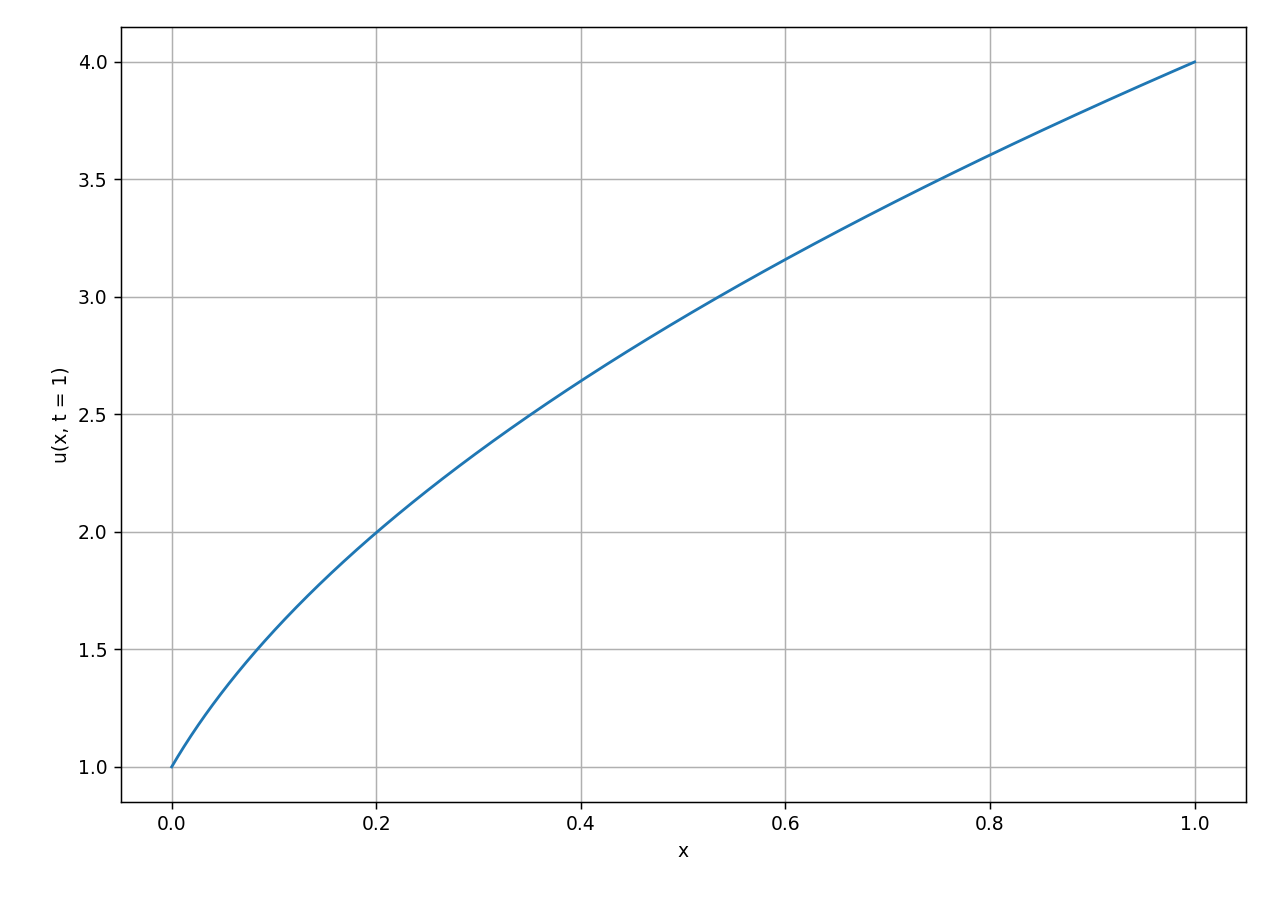

In [12]:
x = np.linspace(0, 1, Nx + 1)

plt.figure(figsize = [7, 5])
plt.plot(x, data[Nt - 1])
plt.xlabel("x")
plt.ylabel("u(x, t = 1)")
plt.tight_layout() 
plt.grid()
plt.show()

## Для h = 0.01, t = 0.01

In [13]:
h = 0.01
t = 0.01
Nt = 100
Nx = 100

In [14]:
data = np.zeros(Nt * (Nx + 1), dtype = float).reshape(Nt, Nx + 1)
ux_prev = np.arange(Nx + 1, dtype = float)
ux_prev = ux0(ux_prev * h)
err = eps + 1.0

for i in range(Nt):
    print("Layer", i)
    it_count = 1
    while(err > eps):
        A = np.zeros((Nx - 1) ** 2, dtype = float).reshape(Nx - 1, Nx - 1)
        f = np.zeros(Nx - 1, dtype = float)
        for j in range(Nx - 1):
            A[j][j] = 1 / t + (ux_prev[j] + 2 * ux_prev[j + 1] + ux_prev[j + 2]) / (2 * h ** 2)
            f[j] = ux_prev[j + 1] / t
        for j in range(1, Nx - 1):
            A[j][j - 1] = -(ux_prev[j] + ux_prev[j + 1]) / (2 * h ** 2)
        for j in range(Nx - 2):
            A[j][j + 1] = -(ux_prev[j + 1] + ux_prev[j + 2]) / (2 * h ** 2)
        f[0] += ux0((i + 1) * t) * (ux_prev[0] + ux_prev[1]) / (2 * h ** 2)
        f[Nx - 2] += ux1((i + 1) * t) * (ux_prev[Nx - 1] + ux_prev[Nx]) / (2 * h ** 2)

        d = pr_solve(A, f)
        ux_cur = np.zeros(Nx + 1, dtype = float)
        ux_cur[0] = ux0((i + 1) * t)
        for j in range(1, Nx):
            ux_cur[j] = d[j - 1]
        ux_cur[Nx] = ux1((i + 1) * t)
        err = 0.0
        for j in range (1, Nx):
            er = abs(ux_cur[j] - ux_prev[j])
            if(er > err):
                err = er
        ux_prev = np.copy(ux_cur)
        
        some_points = np.zeros(11, dtype = float)
        for j in range(11):
            some_points[j] = ux_cur[j * 10]
        print("It", it_count, "; err =", err, ";", some_points)
        it_count += 1
            
    data[i] = np.copy(ux_cur)
    err = eps + 1.0
    print(" ")


Layer 0
It 1 ; err = 0.355245880232846 ; [0.14409222 0.15697452 0.17342191 0.19389695 0.22008182 0.25492888
 0.30368696 0.37478343 0.47507848 0.58182833 0.57636888]
It 2 ; err = 0.03576261240573031 ; [0.14409222 0.15771037 0.17450576 0.19565822 0.22319132 0.26074016
 0.31408394 0.38863289 0.47837954 0.55271104 0.57636888]
It 3 ; err = 0.013632361404809834 ; [0.14409222 0.15843081 0.17567597 0.19763169 0.2267644  0.26720152
 0.32398592 0.39778889 0.47670547 0.53925093 0.57636888]
It 4 ; err = 0.00867076206813755 ; [0.14409222 0.15914246 0.17694518 0.1998491  0.23077534 0.27393662
 0.33265621 0.40373    0.47488491 0.53296715 0.57636888]
It 5 ; err = 0.007471023722289749 ; [0.14409222 0.15986128 0.17832773 0.20232479 0.23513604 0.28059603
 0.33998429 0.40791349 0.47390222 0.5299779  0.57636888]
It 6 ; err = 0.006624013905099924 ; [0.14409222 0.16060375 0.179837   0.205052   0.23972593 0.28694999
 0.34617252 0.4112146  0.47370943 0.52860813 0.57636888]
It 7 ; err = 0.0059975051126920365 ; 

 0.44186736 0.47810257 0.51254094 0.54527677 0.57636888]
It 63 ; err = 0.0006878954225162381 ; [0.14409222 0.21701433 0.27251237 0.32037899 0.36383191 0.40427009
 0.44237224 0.47848525 0.51279309 0.5453991  0.57636888]
It 64 ; err = 0.0006624102086463801 ; [0.14409222 0.21742101 0.27310301 0.32103752 0.3644803  0.40485501
 0.44285921 0.47885457 0.51303655 0.54551727 0.57636888]
It 65 ; err = 0.0006378460382721607 ; [0.14409222 0.21781253 0.2736715  0.32167154 0.36510488 0.40541879
 0.44332887 0.47921097 0.5132716  0.5456314  0.57636888]
It 66 ; err = 0.0006141717901407828 ; [0.14409222 0.21818944 0.27421866 0.32228194 0.3657065  0.40596217
 0.4437818  0.47955485 0.51349851 0.54574161 0.57636888]
It 67 ; err = 0.0005913571707426013 ; [0.14409222 0.21855227 0.27474528 0.3228696  0.36628598 0.40648586
 0.44421857 0.47988663 0.51371753 0.54584803 0.57636888]
It 68 ; err = 0.0005693758840749075 ; [0.14409222 0.21890154 0.27525212 0.32343533 0.36684412 0.40699053
 0.4446397  0.48020671 0.513

It 13 ; err = 0.00016472334214368 ; [0.14534884 0.22752921 0.28729392 0.33689835 0.38040862 0.41977618
 0.4561069  0.49007959 0.52212206 0.55250352 0.58139535]
It 14 ; err = 0.00015727359407563535 ; [0.14534884 0.22759124 0.28739101 0.33702169 0.38055235 0.41993201
 0.45626167 0.4902161  0.52222286 0.55255598 0.58139535]
It 15 ; err = 0.00015060999185734225 ; [0.14534884 0.22765297 0.28748783 0.33714412 0.38069332 0.42008222
 0.45640808 0.49034304 0.52231537 0.55260374 0.58139535]
It 16 ; err = 0.0001445457753975199 ; [0.14534884 0.22771441 0.28758415 0.33726519 0.38083106 0.42022675
 0.45654667 0.49046147 0.52240074 0.55264752 0.58139535]
It 17 ; err = 0.00013894027668065467 ; [0.14534884 0.22777553 0.28767973 0.3373845  0.38096528 0.42036563
 0.45667799 0.49057231 0.52247988 0.55268788 0.58139535]
It 18 ; err = 0.00013368241829403438 ; [0.14534884 0.22783625 0.28777434 0.33750173 0.38109576 0.42049899
 0.45680254 0.49067632 0.52255356 0.55272528 0.58139535]
It 19 ; err = 0.0001287380

It 16 ; err = 0.00015007971736674675 ; [0.14792899 0.23175682 0.29268822 0.34324977 0.38758819 0.42768331
 0.46464876 0.4991666  0.53167361 0.56245771 0.59171598]
It 17 ; err = 0.00014412238512989672 ; [0.14792899 0.23181979 0.29278702 0.34337341 0.38772743 0.42782736
 0.46478482 0.49928127 0.53175539 0.56249938 0.59171598]
It 18 ; err = 0.00013853634127697356 ; [0.14792899 0.23188242 0.29288484 0.34349484 0.38786268 0.42796554
 0.46491374 0.4993888  0.53183148 0.56253797 0.59171598]
It 19 ; err = 0.0001333020001876295 ; [0.14792899 0.23194457 0.29298144 0.3436138  0.38799381 0.42809802
 0.46503603 0.49948987 0.53190251 0.56257386 0.59171598]
It 20 ; err = 0.0001283336319419237 ; [0.14792899 0.23200611 0.29307658 0.34373006 0.38812077 0.428225
 0.46515215 0.49958508 0.53196905 0.56260735 0.59171598]
It 21 ; err = 0.0001235993435359517 ; [0.14792899 0.2320669  0.29317008 0.34384346 0.38824354 0.42834671
 0.46526252 0.49967496 0.53203154 0.56263871 0.59171598]
It 22 ; err = 0.00011907267

It 17 ; err = 0.00014820572698820422 ; [0.15060241 0.23602351 0.29810015 0.34960544 0.39476353 0.43558841
 0.47321162 0.50832693 0.54138134 0.57267311 0.60240964]
It 18 ; err = 0.00014239046701319813 ; [0.15060241 0.23608816 0.2982011  0.34973064 0.39490274 0.43573035
 0.47334376 0.50843694 0.54145907 0.5727125  0.60240964]
It 19 ; err = 0.00013692015041832928 ; [0.15060241 0.2361523  0.29830073 0.34985318 0.39503759 0.43586631
 0.47346902 0.50854028 0.5415316  0.57274911 0.60240964]
It 20 ; err = 0.00013173059809862275 ; [0.15060241 0.23621577 0.29839879 0.34997284 0.39516803 0.43599653
 0.47358787 0.50863757 0.54159951 0.57278327 0.60240964]
It 21 ; err = 0.00012678978135294283 ; [0.15060241 0.23627843 0.29849507 0.35008946 0.39529407 0.43612123
 0.47370076 0.50872936 0.54166325 0.57281524 0.60240964]
It 22 ; err = 0.00012206927950131341 ; [0.15060241 0.23634015 0.2985894  0.35020293 0.39541573 0.43624066
 0.4738081  0.50881611 0.54172323 0.57284524 0.60240964]
It 23 ; err = 0.000117

It 3 ; err = 0.0006634856255021138 ; [0.15479876 0.24158447 0.30499496 0.35763714 0.40372153 0.4453017
 0.48359738 0.51947808 0.55369139 0.58687883 0.61919505]
It 4 ; err = 0.00048340906626220814 ; [0.15479876 0.24169956 0.30510616 0.35774367 0.40383866 0.44545481
 0.48382968 0.51983865 0.55416748 0.5872756  0.61919505]
It 5 ; err = 0.0003875373292479001 ; [0.15479876 0.24179778 0.30521475 0.35785536 0.40396794 0.44562762
 0.48407933 0.5201823  0.55455389 0.58754911 0.61919505]
It 6 ; err = 0.0003279419061623656 ; [0.15479876 0.24188465 0.30532102 0.3579724  0.40410877 0.44581471
 0.48433338 0.52049816 0.55487025 0.58775193 0.61919505]
It 7 ; err = 0.00028753891947497223 ; [0.15479876 0.24196394 0.30542581 0.35809466 0.40425933 0.44601045
 0.48458334 0.52078424 0.55513377 0.58791045 0.61919505]
It 8 ; err = 0.00025833103235728405 ; [0.15479876 0.24203824 0.30553004 0.35822167 0.40441723 0.44620994
 0.48482431 0.52104235 0.55535731 0.58803922 0.61919505]
It 9 ; err = 0.00023624216539486

It 7 ; err = 0.00029632092215281514 ; [0.15772871 0.24657902 0.31125615 0.36492606 0.41196315 0.4545004
 0.49379813 0.53067774 0.56566831 0.59905273 0.63091483]
It 8 ; err = 0.00026588127500226655 ; [0.15772871 0.24665416 0.311362   0.36505587 0.41212553 0.45470626
 0.49404672 0.5309433  0.56589755 0.59918445 0.63091483]
It 9 ; err = 0.00024287419395363496 ; [0.15772871 0.24672621 0.31146818 0.36518998 0.41229297 0.45491185
 0.49428306 0.53118274 0.56609494 0.59929447 0.63091483]
It 10 ; err = 0.000224819377818819 ; [0.15772871 0.24679647 0.31157511 0.36532739 0.41246304 0.45511435
 0.4945063  0.53139947 0.56626741 0.59938843 0.63091483]
It 11 ; err = 0.00021018359521918217 ; [0.15772871 0.2468658  0.31168292 0.36546702 0.41263373 0.45531188
 0.49471647 0.53159659 0.56641997 0.59947011 0.63091483]
It 12 ; err = 0.0001980235539883468 ; [0.15772871 0.24693477 0.31179153 0.36560785 0.4128034  0.45550325
 0.49491406 0.53177676 0.56655634 0.59954213 0.63091483]
It 13 ; err = 0.0001875866207

It 15 ; err = 0.00017558900455094673 ; [0.1607717  0.25192314 0.31816195 0.37311588 0.42129745 0.46486266
 0.50502505 0.542528   0.5778472  0.6112956  0.64308682]
It 16 ; err = 0.0001678080655849179 ; [0.1607717  0.2519945  0.31827462 0.37325796 0.42145864 0.46503047
 0.50518432 0.54266272 0.5779435  0.61134473 0.64308682]
It 17 ; err = 0.0001606430915805368 ; [0.1607717  0.25206563 0.31838631 0.37339745 0.42161488 0.46519083
 0.50533447 0.54278825 0.57803247 0.61138988 0.64308682]
It 18 ; err = 0.0001539412342362878 ; [0.1607717  0.25213633 0.31849666 0.37353396 0.42176599 0.46534399
 0.50547619 0.54290557 0.578115   0.61143159 0.64308682]
It 19 ; err = 0.00014766007552946547 ; [0.1607717  0.25220639 0.31860532 0.37366719 0.42191189 0.46549024
 0.50561012 0.54301549 0.57819185 0.61147028 0.64308682]
It 20 ; err = 0.0001417165933315645 ; [0.1607717  0.25227561 0.31871202 0.3737969  0.42205258 0.46562988
 0.50573686 0.54311873 0.57826363 0.61150631 0.64308682]
It 21 ; err = 0.0001360630

It 20 ; err = 0.00014640879342797675 ; [0.16393443 0.25724828 0.32499764 0.38117041 0.43037796 0.47481312
 0.51570751 0.55382111 0.58965207 0.62354241 0.6557377 ]
It 21 ; err = 0.00014046679618634483 ; [0.16393443 0.25731915 0.32510607 0.38130093 0.43051795 0.47495053
 0.51583097 0.55392085 0.589721   0.62357688 0.6557377 ]
It 22 ; err = 0.0001347984362922161 ; [0.16393443 0.25738871 0.32521189 0.3814274  0.43065254 0.47508164
 0.51594797 0.55401485 0.58978571 0.62360917 0.6557377 ]
It 23 ; err = 0.00012937271088248048 ; [0.16393443 0.2574568  0.32531493 0.38154975 0.43078184 0.47520676
 0.51605896 0.55410359 0.58984658 0.62363948 0.6557377 ]
It 24 ; err = 0.0001241628277240947 ; [0.16393443 0.25752329 0.32541508 0.38166796 0.43090601 0.47532618
 0.51616433 0.55418747 0.58990394 0.62366799 0.6557377 ]
It 25 ; err = 0.0001191693083707479 ; [0.16393443 0.25758807 0.32551225 0.38178206 0.43102518 0.47544019
 0.51626445 0.55426688 0.5899581  0.62369486 0.6557377 ]
It 26 ; err = 0.000114367

It 26 ; err = 0.00011589254626870327 ; [0.16722408 0.26286234 0.33220077 0.38962496 0.43986211 0.48515831
 0.52677871 0.56551087 0.60187921 0.6362513  0.66889632]
It 27 ; err = 0.00011110155003329902 ; [0.16722408 0.26292448 0.33229318 0.38973238 0.43997311 0.48526344
 0.52687022 0.56558294 0.60192811 0.63627549 0.66889632]
It 28 ; err = 0.00010651622414742379 ; [0.16722408 0.26298465 0.3323824  0.38983569 0.44007946 0.48536378
 0.52695729 0.56565133 0.60197444 0.63629839 0.66889632]
It 29 ; err = 0.00010209034145985951 ; [0.16722408 0.26304284 0.33246843 0.38993498 0.44018131 0.48545958
 0.52704018 0.56571629 0.60201836 0.63632008 0.66889632]
It 30 ; err = 9.783733930979199e-05 ; [0.16722408 0.26309904 0.33255131 0.39003035 0.44027885 0.48555105
 0.52711913 0.56577803 0.60206005 0.63634065 0.66889632]
 
Layer 17
It 1 ; err = 0.0060079059012466685 ; [0.16891892 0.26333241 0.33265846 0.39012744 0.4403757  0.48564895
 0.52723552 0.56599278 0.60266738 0.6383531  0.67567568]
It 2 ; err = 0

It 31 ; err = 9.598407094141281e-05 ; [0.17064846 0.26856342 0.33947427 0.39814719 0.44942737 0.49561818
 0.53802032 0.57744747 0.6144453  0.64939932 0.68259386]
 
Layer 19
It 1 ; err = 0.006265351830742838 ; [0.17241379 0.26880774 0.3395826  0.39824325 0.44952269 0.49571515
 0.53813868 0.57767336 0.61509014 0.65152007 0.68965517]
It 2 ; err = 0.0013835888744696545 ; [0.17241379 0.26901593 0.3397062  0.3983454  0.44962514 0.49583664
 0.5383295  0.57806107 0.6159128  0.65288167 0.68965517]
It 3 ; err = 0.0008189170347703278 ; [0.17241379 0.26917847 0.33983299 0.39845519 0.44974194 0.49599256
 0.53858724 0.57852165 0.61664464 0.65364813 0.68965517]
It 4 ; err = 0.0005937947797537424 ; [0.17241379 0.26930879 0.33995766 0.3985735  0.44987732 0.49618263
 0.53888781 0.57898465 0.6172345  0.65412013 0.68965517]
It 5 ; err = 0.00047327071987346425 ; [0.17241379 0.26941821 0.34007937 0.39870082 0.4500319  0.49639988
 0.53920679 0.57941601 0.61770353 0.65444178 0.68965517]
It 6 ; err = 0.0003983

 0.54944375 0.58980056 0.62800532 0.66522694 0.70422535]
It 2 ; err = 0.0014421444926657756 ; [0.17605634 0.27469119 0.34686794 0.40673796 0.45909042 0.50626591
 0.54964573 0.59021302 0.62887456 0.6666496  0.70422535]
It 3 ; err = 0.0008538122282666372 ; [0.17605634 0.27485927 0.34699897 0.40685101 0.45921142 0.50642976
 0.54991901 0.59070032 0.62964229 0.66744549 0.70422535]
It 4 ; err = 0.0006185577024919731 ; [0.17605634 0.27499348 0.3471277  0.4069735  0.45935284 0.50663029
 0.55023689 0.59118755 0.63025782 0.667934   0.70422535]
It 5 ; err = 0.0004928189863872001 ; [0.17605634 0.27510597 0.34725344 0.40710592 0.45951505 0.50685954
 0.55057307 0.59163945 0.6307455  0.6682663  0.70422535]
It 6 ; err = 0.0004147084385390798 ; [0.17605634 0.2752048  0.34737745 0.40724821 0.45969546 0.50710739
 0.55090898 0.59204564 0.63113782 0.66851043 0.70422535]
It 7 ; err = 0.00036149914173244646 ; [0.17605634 0.27529529 0.34750129 0.4073996  0.45988996 0.50736462
 0.55123376 0.59240698 0.63146033

It 3 ; err = 0.000891204079261132 ; [0.17985612 0.28076847 0.35444966 0.41558123 0.46906131 0.51729115
 0.56171745 0.60338745 0.64318967 0.68183302 0.71942446]
It 4 ; err = 0.0006457484241096934 ; [0.17985612 0.28090748 0.35458374 0.41570941 0.46921049 0.51750417
 0.56205499 0.60390134 0.64383295 0.68233919 0.71942446]
It 5 ; err = 0.0005142694254095526 ; [0.17985612 0.28102388 0.3547148  0.41584849 0.46938215 0.51774746
 0.56241056 0.60437583 0.6443408  0.68268292 0.71942446]
It 6 ; err = 0.0004326282394528924 ; [0.17985612 0.28112623 0.35484426 0.41599831 0.46957319 0.51800993
 0.56276455 0.60480083 0.64474837 0.68293519 0.71942446]
It 7 ; err = 0.00037705558446854415 ; [0.17985612 0.28122014 0.35497384 0.41615794 0.469779   0.51828162
 0.56310573 0.60517789 0.64508284 0.68313081 0.71942446]
It 8 ; err = 0.0003369872903628002 ; [0.17985612 0.28130932 0.35510487 0.41632587 0.46999468 0.51855488
 0.56342867 0.60551243 0.64536326 0.68328866 0.71942446]
It 9 ; err = 0.0003066439581225211

It 8 ; err = 0.00034914917549000446 ; [0.18382353 0.28754623 0.36298181 0.42555708 0.48040983 0.53003984
 0.57590096 0.61890797 0.65962857 0.69837692 0.73529412]
It 9 ; err = 0.00031734357186796736 ; [0.18382353 0.28763489 0.36311872 0.42573757 0.48063962 0.53031987
 0.57621472 0.61921577 0.65987505 0.69851162 0.73529412]
It 10 ; err = 0.00029234761500485096 ; [0.18382353 0.28772307 0.36325836 0.42592276 0.48087097 0.53059185
 0.57650685 0.61949114 0.66008865 0.69862607 0.73529412]
It 11 ; err = 0.00027201261528042586 ; [0.18382353 0.28781162 0.36340037 0.42611057 0.48110087 0.53085368
 0.57677842 0.61973908 0.66027627 0.69872507 0.73529412]
It 12 ; err = 0.00025500492278629494 ; [0.18382353 0.28790092 0.36354413 0.42629918 0.48132707 0.53110428
 0.57703091 0.61996371 0.66044292 0.69881197 0.73529412]
It 13 ; err = 0.0002403343827600546 ; [0.18382353 0.28799098 0.36368887 0.42648701 0.481548   0.53134321
 0.57726587 0.62016836 0.66059236 0.69888915 0.73529412]
It 14 ; err = 0.000227447

It 7 ; err = 0.00040877900242330956 ; [0.18796992 0.29392074 0.37100152 0.43494061 0.49097682 0.54166883
 0.58852154 0.63249898 0.67420581 0.71396263 0.7518797 ]
It 8 ; err = 0.0003647449434467376 ; [0.18796992 0.29401538 0.37114275 0.4351243  0.4912144  0.54196918
 0.58887361 0.63285995 0.67450554 0.71413026 0.7518797 ]
It 9 ; err = 0.00033144764499026813 ; [0.18796992 0.29410821 0.371287   0.43531519 0.49145731 0.54226402
 0.58920208 0.63318035 0.6747609  0.71426939 0.7518797 ]
It 10 ; err = 0.00030528656122374986 ; [0.18796992 0.2942008  0.37143427 0.43551087 0.49170137 0.54254972
 0.58950731 0.63346658 0.67498201 0.71438755 0.7518797 ]
It 11 ; err = 0.0002840013492915183 ; [0.18796992 0.29429398 0.37158408 0.43570908 0.49194341 0.54282418
 0.58979057 0.63372399 0.67517608 0.71448973 0.7518797 ]
It 12 ; err = 0.0002661035932535194 ; [0.18796992 0.29438805 0.3717357  0.43590784 0.4921811  0.54308638
 0.59005352 0.63395695 0.67534836 0.71457938 0.7518797 ]
It 13 ; err = 0.000250711995

It 9 ; err = 0.00034441840175569727 ; [0.19230769 0.30091421 0.37988167 0.44539082 0.50283064 0.55481156
 0.60283329 0.64782382 0.69035679 0.73076572 0.76923077]
It 10 ; err = 0.00031692891025469905 ; [0.19230769 0.30100997 0.38003481 0.44559509 0.50308558 0.55510932
 0.60315022 0.64811983 0.69058468 0.73088723 0.76923077]
It 11 ; err = 0.00029454937187201047 ; [0.19230769 0.3011066  0.38019078 0.44580189 0.50333798 0.5553948
 0.60344378 0.64838563 0.69078448 0.73099222 0.76923077]
It 12 ; err = 0.0002757925358792823 ; [0.19230769 0.30120434 0.3803487  0.44600908 0.50358543 0.55566701
 0.60371583 0.64862585 0.69096165 0.73108427 0.76923077]
It 13 ; err = 0.00025958208434229135 ; [0.19230769 0.30130308 0.38050757 0.44621487 0.50382628 0.55592566
 0.60396828 0.64884423 0.69112028 0.73116594 0.76923077]
It 14 ; err = 0.000245277971710145 ; [0.19230769 0.30140247 0.38066638 0.44641783 0.50405942 0.55617092
 0.60420292 0.64904382 0.69126345 0.73123911 0.76923077]
It 15 ; err = 0.00023243122

It 10 ; err = 0.0003313354680086755 ; [0.19685039 0.30811136 0.38899906 0.45610791 0.51496004 0.56821884
 0.61740105 0.66343726 0.70690577 0.74815727 0.78740157]
It 11 ; err = 0.0003078068658496358 ; [0.19685039 0.30821318 0.38916378 0.45632633 0.51522592 0.56851825
 0.6177074  0.66371336 0.70711257 0.7482657  0.78740157]
It 12 ; err = 0.00028801013862489455 ; [0.19685039 0.30831628 0.3893305  0.45654482 0.51548606 0.56880317
 0.61799086 0.66396261 0.70729581 0.74836072 0.78740157]
It 13 ; err = 0.00027093898083396795 ; [0.19685039 0.30842045 0.38949808 0.45676149 0.51573877 0.56907344
 0.61825351 0.66418897 0.70745977 0.74844498 0.78740157]
It 14 ; err = 0.00025584943045142694 ; [0.19685039 0.30852528 0.3896654  0.4569748  0.51598297 0.56932929
 0.61849732 0.66439566 0.70760766 0.74852044 0.78740157]
It 15 ; err = 0.00024225271591604702 ; [0.19685039 0.30863022 0.38983142 0.4571836  0.51621801 0.56957122
 0.6187241  0.66458527 0.70774197 0.74858857 0.78740157]
It 16 ; err = 0.00022981

 0.63294807 0.68003498 0.72441604 0.76647102 0.80645161]
It 13 ; err = 0.0002836341473826387 ; [0.2016129  0.31587527 0.39891374 0.46780758 0.5282171  0.58284789
 0.63322203 0.68027015 0.72458587 0.76655814 0.80645161]
It 14 ; err = 0.00026764795249989426 ; [0.2016129  0.31598636 0.39909078 0.46803261 0.52847369 0.58311554
 0.63347602 0.68048469 0.72473896 0.76663613 0.80645161]
It 15 ; err = 0.00025324561456652184 ; [0.2016129  0.31609745 0.39926616 0.46825247 0.5287202  0.58336824
 0.63371197 0.68068134 0.72487792 0.76670651 0.80645161]
It 16 ; err = 0.0002400615308454368 ; [0.2016129  0.31620789 0.3994389  0.46846623 0.52895636 0.58360671
 0.63393162 0.68086234 0.72500479 0.76677046 0.80645161]
It 17 ; err = 0.00022784277929399632 ; [0.2016129  0.3163171  0.39960817 0.46867326 0.5291821  0.58383173
 0.63413648 0.68102957 0.72512119 0.76682891 0.80645161]
It 18 ; err = 0.00021644268543963285 ; [0.2016129  0.31642453 0.39977331 0.4688731  0.52939752 0.58404407
 0.63432789 0.68118456 0

It 9 ; err = 0.0003935922327196195 ; [0.20661157 0.32327998 0.40811165 0.47849163 0.5402125  0.5960773
 0.64769084 0.69604132 0.74173846 0.78514022 0.82644628]
It 10 ; err = 0.0003616397549145445 ; [0.20661157 0.32339084 0.40829121 0.47873239 0.54051148 0.5964222
 0.64805231 0.69637394 0.74199151 0.78527413 0.82644628]
It 11 ; err = 0.00033552197378794446 ; [0.20661157 0.32350344 0.40847422 0.47897515 0.54080558 0.59675065
 0.64838524 0.69667137 0.74221276 0.78538965 0.82644628]
It 12 ; err = 0.0003135359728650977 ; [0.20661157 0.32361772 0.40865931 0.47921724 0.54109214 0.59706197
 0.64869224 0.69693921 0.74240848 0.78549075 0.82644628]
It 13 ; err = 0.00029447075170541126 ; [0.20661157 0.32373325 0.40884504 0.4794565  0.54136943 0.59735617
 0.64897585 0.6971819  0.74258331 0.7855803  0.82644628]
It 14 ; err = 0.0002776151542993599 ; [0.20661157 0.32384941 0.40903004 0.47969127 0.5416364  0.59763374
 0.64923839 0.69740303 0.74274076 0.78566041 0.82644628]
It 15 ; err = 0.0002623901351

It 7 ; err = 0.0005126050384721692 ; [0.21186441 0.33124125 0.41808326 0.49012212 0.55327469 0.61043073
 0.66328081 0.71289401 0.75993047 0.80474068 0.84745763]
It 8 ; err = 0.00045633022580926497 ; [0.21186441 0.33135743 0.41826403 0.49036478 0.55359067 0.61082395
 0.66372907 0.71333987 0.76029116 0.80493897 0.84745763]
It 9 ; err = 0.00041363960677320843 ; [0.21186441 0.33147377 0.41845058 0.49061644 0.55391031 0.6112047
 0.664142   0.71373179 0.76059656 0.80510297 0.84745763]
It 10 ; err = 0.00037996861747702226 ; [0.21186441 0.33159167 0.41864206 0.49087315 0.55422797 0.61156909
 0.66452155 0.71407909 0.76085964 0.80524181 0.84745763]
It 11 ; err = 0.00035244007536894273 ; [0.21186441 0.33171158 0.41883711 0.49113145 0.55453964 0.6119153
 0.66487049 0.71438927 0.76108948 0.80536153 0.84745763]
It 12 ; err = 0.0003291643330449734 ; [0.21186441 0.33183331 0.41903415 0.49138851 0.55484261 0.61224274
 0.66519173 0.71466826 0.76129267 0.80546627 0.84745763]
It 13 ; err = 0.0003089840034

It 34 ; err = 9.942230278925379e-05 ; [0.21459227 0.33826568 0.42768856 0.50158032 0.56607548 0.62409449
 0.6772923  0.72670989 0.77305005 0.81681283 0.8583691 ]
 
Layer 39
It 1 ; err = 0.010063873067670093 ; [0.2173913  0.3387033  0.42784326 0.50169179 0.56618283 0.62421808
 0.67748993 0.72716924 0.77434558 0.82063595 0.86956522]
It 2 ; err = 0.0022029803495011713 ; [0.2173913  0.3390264  0.42802429 0.50182435 0.56632016 0.62441526
 0.6778589  0.72793652 0.77584416 0.82283548 0.86956522]
It 3 ; err = 0.0012978569396395745 ; [0.2173913  0.33925939 0.42820735 0.50198052 0.56650246 0.62469763
 0.67835639 0.72878879 0.77707459 0.8239926  0.86956522]
It 4 ; err = 0.0009366592271089491 ; [0.2173913  0.33943859 0.42838699 0.5021615  0.56673338 0.62505069
 0.67891487 0.72959452 0.77801125 0.82468038 0.86956522]
It 5 ; err = 0.0007424618896212376 ; [0.2173913  0.33958749 0.42856551 0.502367   0.56700721 0.6254497
 0.67948241 0.73030902 0.77872753 0.82514003 0.86956522]
It 6 ; err = 0.000621632

 0.69470031 0.74553568 0.7932268  0.83827671 0.88105727]
It 29 ; err = 0.00013416195081761284 ; [0.22026432 0.34690809 0.43855911 0.51434662 0.58054362 0.64013405
 0.69480576 0.74561748 0.79328171 0.8383037  0.88105727]
It 30 ; err = 0.0001267247203905475 ; [0.22026432 0.34698351 0.438669   0.51447132 0.58066934 0.64025038
 0.69490499 0.74569437 0.79333327 0.83832904 0.88105727]
It 31 ; err = 0.00011967587393402201 ; [0.22026432 0.34705499 0.43877302 0.51458919 0.58078799 0.64036002
 0.69499841 0.74576668 0.79338173 0.83835284 0.88105727]
It 32 ; err = 0.0001130046065124235 ; [0.22026432 0.3471227  0.43887144 0.51470057 0.58089997 0.64046337
 0.69508637 0.74583471 0.7934273  0.83837522 0.88105727]
It 33 ; err = 0.00010669673843255456 ; [0.22026432 0.3471868  0.43896451 0.51480578 0.58100564 0.64056079
 0.69516922 0.74589874 0.79347017 0.83839626 0.88105727]
It 34 ; err = 0.00010072665322546914 ; [0.22026432 0.34724743 0.4390525  0.51490516 0.58110535 0.64065264
 0.69524726 0.74595902 0

 0.71279479 0.76517897 0.8143598  0.86083703 0.90497738]
It 23 ; err = 0.0001951487253737394 ; [0.22624434 0.35579946 0.44969362 0.52742867 0.59540931 0.65667893
 0.71295343 0.76530332 0.81444388 0.86087854 0.90497738]
It 24 ; err = 0.00018429347601045531 ; [0.22624434 0.35590546 0.44984984 0.52760837 0.59559303 0.65685115
 0.713102   0.76541946 0.81452227 0.8609172  0.90497738]
It 25 ; err = 0.00017400385574717347 ; [0.22624434 0.35600643 0.44999823 0.52777847 0.5957663  0.65701304
 0.71324126 0.76552808 0.81459546 0.86095326 0.90497738]
It 26 ; err = 0.00016422644534053177 ; [0.22624434 0.35610247 0.45013901 0.52793935 0.59592968 0.65716526
 0.71337188 0.76562976 0.81466388 0.86098694 0.90497738]
It 27 ; err = 0.00015498131088231837 ; [0.22624434 0.35619368 0.45027241 0.52809142 0.59608372 0.65730842
 0.71349446 0.76572502 0.81472791 0.86101844 0.90497738]
It 28 ; err = 0.00014621923019220162 ; [0.22624434 0.35628019 0.45039871 0.52823508 0.59622892 0.65744309
 0.71360957 0.76581435 

 0.72944868 0.7838657  0.83521609 0.88391741 0.93023256]
It 11 ; err = 0.00042027056059079637 ; [0.23255814 0.36407519 0.45970428 0.53907248 0.60869961 0.67170929
 0.72986073 0.78422575 0.83547942 0.88405348 0.93023256]
It 12 ; err = 0.0003915331718775672 ; [0.23255814 0.3642277  0.4599502  0.53939006 0.60906816 0.67210047
 0.73023774 0.78454819 0.83571156 0.88417231 0.93023256]
It 13 ; err = 0.000366497102526786 ; [0.23255814 0.36438128 0.46019505 0.53970077 0.60942114 0.67246684
 0.73058358 0.78483891 0.83591822 0.88427732 0.93023256]
It 14 ; err = 0.0003441234336549748 ; [0.23255814 0.36453467 0.46043677 0.5400026  0.60975769 0.67280965
 0.73090168 0.78510256 0.83610374 0.88437103 0.93023256]
It 15 ; err = 0.0003237958432740218 ; [0.23255814 0.3646867  0.46067367 0.54029412 0.61007755 0.67313032
 0.731195   0.78534287 0.83627142 0.88445532 0.93023256]
It 16 ; err = 0.00030510613974032985 ; [0.23255814 0.36483628 0.46090438 0.5405744  0.61038083 0.67343028
 0.73146614 0.78556287 0.83

It 9 ; err = 0.000523886231346804 ; [0.23923445 0.3741834  0.47234875 0.55382968 0.62532685 0.69007312
 0.74990555 0.80594524 0.85888282 0.90913218 0.9569378 ]
It 10 ; err = 0.0004803655958290909 ; [0.23923445 0.37434207 0.47260849 0.55417616 0.62574783 0.69054354
 0.75038201 0.80637037 0.85919864 0.90929687 0.9569378 ]
It 11 ; err = 0.0004444027992893673 ; [0.23923445 0.37450403 0.47287182 0.55452115 0.62615577 0.6909854
 0.7508161  0.80674768 0.85947351 0.90943856 0.9569378 ]
It 12 ; err = 0.00041379252008266754 ; [0.23923445 0.37466819 0.47313592 0.55486079 0.62654779 0.69139906
 0.75121257 0.80708518 0.85971564 0.90956224 0.9569378 ]
It 13 ; err = 0.0003869317517577464 ; [0.23923445 0.3748332  0.47339821 0.55519218 0.62692228 0.69178565
 0.75157566 0.80738913 0.85993105 0.9096715  0.9569378 ]
It 14 ; err = 0.0003629323026516085 ; [0.23923445 0.37499763 0.47365647 0.55551324 0.62727848 0.69214666
 0.75190913 0.80766448 0.86012427 0.90976894 0.9569378 ]
It 15 ; err = 0.00034112837336

It 4 ; err = 0.001198970164820512 ; [0.24630542 0.38440857 0.48505702 0.56853883 0.64162973 0.70768707
 0.76876745 0.82630528 0.88130819 0.93430206 0.98522167]
It 5 ; err = 0.0009485269023561393 ; [0.24630542 0.3845882  0.48528585 0.56881948 0.64201666 0.70824744
 0.76953919 0.82723634 0.88220326 0.9348583  0.98522167]
It 6 ; err = 0.0007927523857076402 ; [0.24630542 0.38475246 0.48552359 0.56913367 0.64244554 0.70882739
 0.77026605 0.82802909 0.8828968  0.93525997 0.98522167]
It 7 ; err = 0.0006870930538758202 ; [0.24630542 0.38491224 0.48577297 0.56947359 0.64289774 0.70940239
 0.77093455 0.8287056  0.88345178 0.93556773 0.98522167]
It 8 ; err = 0.0006106030906433135 ; [0.24630542 0.38507333 0.48603397 0.56983088 0.64335823 0.70995777
 0.77154301 0.82928784 0.88390823 0.93581366 0.98522167]
It 9 ; err = 0.0005523950731749494 ; [0.24630542 0.38523828 0.4863047  0.57019773 0.64381598 0.7104858
 0.77209497 0.82979404 0.88429216 0.93601637 0.98522167]
It 10 ; err = 0.0005060481203754685 

It 32 ; err = 0.00012432201454970482 ; [0.25       0.39417436 0.4983962  0.58449918 0.65963743 0.72721768
 0.78917146 0.84671464 0.90066884 0.9516192  1.        ]
It 33 ; err = 0.00011644155807410961 ; [0.25       0.39424484 0.49849826 0.58461419 0.65975258 0.72732353
 0.78926125 0.84678389 0.90071514 0.9516419  1.        ]
It 34 ; err = 0.00010904910851239347 ; [0.25       0.39431095 0.49859392 0.58472193 0.65986038 0.72742258
 0.78934522 0.84684863 0.90075841 0.95166312 1.        ]
It 35 ; err = 0.00010211682803984434 ; [0.25       0.39437293 0.49868357 0.58482285 0.65996131 0.72751526
 0.78942377 0.84690917 0.90079886 0.95168296 1.        ]
It 36 ; err = 9.561795650858684e-05 ; [0.25       0.39443102 0.49876757 0.58491736 0.66005579 0.727602
 0.78949725 0.8469658  0.90083669 0.9517015  1.        ]
 
Layer 50
It 1 ; err = 0.013796675492813493 ; [0.25380711 0.39508175 0.49897486 0.58504422 0.6601766  0.72776253
 0.7898037  0.84772126 0.90288534 0.95732621 1.01522843]
It 2 ; err = 0.00

It 27 ; err = 0.00017768572903176238 ; [0.25773196 0.40596979 0.51323713 0.60192918 0.67938932 0.74911101
 0.81307086 0.87250943 0.92826216 0.98092198 1.03092784]
It 28 ; err = 0.0001662013635725934 ; [0.25773196 0.40606946 0.51338192 0.602093   0.679554   0.74926298
 0.81320019 0.87260944 0.92832913 0.98095485 1.03092784]
It 29 ; err = 0.00015543900630921037 ; [0.25773196 0.40616295 0.5135176  0.60224632 0.67970792 0.74940484
 0.81332079 0.87270262 0.9283915  0.98098546 1.03092784]
It 30 ; err = 0.00014534557058043518 ; [0.25773196 0.40625059 0.51364467 0.60238975 0.67985177 0.74953729
 0.81343329 0.87278948 0.92844961 0.98101397 1.03092784]
It 31 ; err = 0.00013588552485843675 ; [0.25773196 0.4063327  0.51376364 0.60252392 0.67998619 0.74966095
 0.81353825 0.87287048 0.92850377 0.98104054 1.03092784]
It 32 ; err = 0.0001270238473581875 ; [0.25773196 0.4064096  0.51387497 0.60264938 0.6801118  0.74977643
 0.8136362  0.87294603 0.92855428 0.98106531 1.03092784]
It 33 ; err = 0.00011872

It 19 ; err = 0.00031532118131838427 ; [0.26595745 0.41787291 0.5280733  0.61937501 0.69927907 0.77134776
 0.83758554 0.89923868 0.95713605 1.0118581  1.06382979]
It 20 ; err = 0.0002950377258716941 ; [0.26595745 0.41804033 0.52832111 0.61966152 0.69957354 0.77162517
 0.83782586 0.89942715 0.95726353 1.01192103 1.06382979]
It 21 ; err = 0.0002759305942435786 ; [0.26595745 0.41819895 0.52855491 0.61993052 0.69984862 0.7718831
 0.8380484  0.89960112 0.95738093 1.01197891 1.06382979]
It 22 ; err = 0.00025798710528435187 ; [0.26595745 0.41834884 0.52877506 0.62018277 0.70010549 0.77212301
 0.8382547  0.89976197 0.95748927 1.01203227 1.06382979]
It 23 ; err = 0.00024109343155120921 ; [0.26595745 0.41849015 0.52898201 0.62041908 0.70034529 0.77234625
 0.83844612 0.89991088 0.95758941 1.01208154 1.06382979]
It 24 ; err = 0.00022527049923559694 ; [0.26595745 0.41862313 0.52917626 0.62064027 0.70056909 0.77255402
 0.83862386 0.9000489  0.95768211 1.01212712 1.06382979]
It 25 ; err = 0.000210402

It 9 ; err = 0.0006885627288587548 ; [0.27472527 0.42951148 0.54217175 0.63573831 0.71788926 0.79231641
 0.86110377 0.92551514 0.98633058 1.04402748 1.0989011 ]
It 10 ; err = 0.0006298261800807836 ; [0.27472527 0.42973972 0.54254393 0.63622687 0.71846745 0.79294269
 0.8617188  0.92604943 0.98671957 1.04422785 1.0989011 ]
It 11 ; err = 0.0005806778359055409 ; [0.27472527 0.42997162 0.54291709 0.63670619 0.71901939 0.79352336
 0.86227363 0.92652044 0.98705672 1.0443998  1.0989011 ]
It 12 ; err = 0.0005383263361770085 ; [0.27472527 0.43020452 0.54328655 0.63717128 0.71954252 0.7940607
 0.86277591 0.92693917 0.98735252 1.0445495  1.0989011 ]
It 13 ; err = 0.0005007420243250404 ; [0.27472527 0.4304358  0.54364842 0.63761874 0.72003588 0.79455756
 0.86323219 0.92731409 0.98761464 1.04468137 1.0989011 ]
It 14 ; err = 0.00046680710964386307 ; [0.27472527 0.43066311 0.5439997  0.63804637 0.72049955 0.79501697
 0.86364804 0.92765184 0.9878488  1.0447986  1.0989011 ]
It 15 ; err = 0.0004356842907

It 26 ; err = 0.00020652532931020318 ; [0.27932961 0.44000692 0.5562726  0.65240193 0.73635459 0.81191737
 0.88123305 0.94564673 1.0060645  1.06312962 1.11731844]
It 27 ; err = 0.00019210852866824446 ; [0.27932961 0.44012251 0.55644031 0.65259141 0.73654482 0.81209269
 0.88138208 0.94576188 1.00614156 1.06316744 1.11731844]
It 28 ; err = 0.00017865696517660457 ; [0.27932961 0.4402303  0.55659655 0.65276774 0.73672162 0.81225546
 0.88152032 0.94586859 1.00621294 1.06320245 1.11731844]
It 29 ; err = 0.00016611549109413204 ; [0.27932961 0.44033077 0.55674203 0.65293177 0.73688593 0.81240659
 0.88164856 0.94596754 1.0062791  1.0632349  1.11731844]
It 30 ; err = 0.0001544298037711167 ; [0.27932961 0.44042435 0.55687745 0.65308432 0.73703862 0.81254692
 0.88176758 0.94605932 1.00634043 1.06326497 1.11731844]
It 31 ; err = 0.00014354709899222495 ; [0.27932961 0.44051147 0.55700345 0.65322617 0.7371805  0.81267725
 0.88187804 0.94614446 1.00639732 1.06329286 1.11731844]
It 32 ; err = 0.0001334

It 14 ; err = 0.0005124820964985677 ; [0.28901734 0.4530803  0.57232899 0.67128574 0.75804356 0.83644664
 0.90864845 0.97597296 1.03928473 1.09917545 1.15606936]
It 15 ; err = 0.0004768536662862477 ; [0.28901734 0.45332798 0.57270538 0.67173469 0.75851998 0.83690914
 0.90905964 0.97630214 1.0395106  1.09928786 1.15606936]
It 16 ; err = 0.0004439321114378947 ; [0.28901734 0.45356594 0.57306378 0.67215764 0.75896392 0.83733565
 0.90943542 0.97660082 1.03971452 1.09938905 1.15606936]
It 17 ; err = 0.0004132476204879998 ; [0.28901734 0.4537931  0.57340336 0.67255487 0.75937707 0.83772921
 0.90977964 0.9768728  1.03989944 1.0994806  1.15606936]
It 18 ; err = 0.00038457032351479903 ; [0.28901734 0.45400883 0.57372384 0.67292701 0.75976123 0.83809259
 0.91009553 0.97712122 1.04006776 1.09956377 1.15606936]
It 19 ; err = 0.0003577735671829174 ; [0.28901734 0.45421281 0.57402529 0.67327495 0.76011818 0.8384283
 0.91038592 0.97734868 1.04022146 1.0996396  1.15606936]
It 20 ; err = 0.000332709563

 0.93668687 1.00710336 1.07379143 1.13721643 1.19760479]
It 8 ; err = 0.0009074384066023455 ; [0.2994012  0.46765714 0.59020356 0.69202479 0.78147018 0.86256638
 0.93759273 1.00792904 1.07441475 1.13754445 1.19760479]
It 9 ; err = 0.0008195456417355862 ; [0.2994012  0.46794005 0.59066749 0.69263983 0.78220762 0.86337665
 0.93839949 1.00863821 1.07493558 1.13781406 1.19760479]
It 10 ; err = 0.0007482284952580187 ; [0.2994012  0.46822922 0.59113532 0.69324541 0.78291139 0.86412417
 0.93912015 1.00925457 1.07537913 1.13804093 1.19760479]
It 11 ; err = 0.0006880984361287146 ; [0.2994012  0.46852083 0.59159984 0.69383334 0.7835767  0.86481173
 0.9397664  1.00979575 1.07576264 1.13823534 1.19760479]
It 12 ; err = 0.0006356855240654546 ; [0.2994012  0.46881095 0.59205506 0.6943981  0.78420167 0.86544336
 0.94034827 1.01027505 1.07609829 1.13840432 1.19760479]
It 13 ; err = 0.0005888803038028856 ; [0.2994012  0.46909609 0.59249634 0.69493622 0.78478617 0.8660235
 0.94087417 1.01070264 1.076394

It 37 ; err = 9.261223945611352e-05 ; [0.30487805 0.4813766  0.60877901 0.71390595 0.80553811 0.88786305
 0.96326207 1.03324007 1.09881853 1.16072794 1.2195122 ]
 
Layer 62
It 1 ; err = 0.020781899962055483 ; [0.31055901 0.482481   0.60911846 0.71408483 0.8057109  0.88813828
 0.96385704 1.03469844 1.10249856 1.16995077 1.24223602]
It 2 ; err = 0.004518480203161035 ; [0.31055901 0.48311873 0.60950237 0.71436443 0.80604724 0.88872397
 0.96499936 1.03686253 1.10612822 1.17444453 1.24223602]
It 3 ; err = 0.002655979530117536 ; [0.31055901 0.48354022 0.60988637 0.7147466  0.80656909 0.88957917
 0.96641466 1.03899341 1.10877057 1.17658797 1.24223602]
It 4 ; err = 0.001912077073930707 ; [0.31055901 0.4838654  0.61028031 0.71522602 0.8072461  0.89059335
 0.9678653  1.0408243  1.11062739 1.17780436 1.24223602]
It 5 ; err = 0.001512839790600573 ; [0.31055901 0.48415447 0.61069862 0.71578732 0.80802615 0.89166439
 0.96922793 1.0423368  1.111977   1.17859892 1.24223602]
It 6 ; err = 0.001265722332

It 19 ; err = 0.00040563279284688836 ; [0.3164557  0.49749582 0.62876404 0.73747726 0.83257579 0.91830559
 0.99705887 1.07032729 1.13910734 1.2041005  1.26582278]
It 20 ; err = 0.0003744118149201503 ; [0.3164557  0.49771557 0.62908564 0.73784433 0.83294813 0.91865208
 0.99735586 1.07055823 1.13926258 1.20417686 1.26582278]
It 21 ; err = 0.00034548482549146 ; [0.3164557  0.49792003 0.62938399 0.73818373 0.83329124 0.91897037
 0.99762793 1.07076934 1.13940428 1.20424649 1.26582278]
It 22 ; err = 0.00031862255605741296 ; [0.3164557  0.49810987 0.62966035 0.73849726 0.83360734 0.91926284
 0.9978774  1.07096257 1.13953382 1.20431011 1.26582278]
It 23 ; err = 0.0002937225954421363 ; [0.3164557  0.49828583 0.62991601 0.73878668 0.83389847 0.91953167
 0.99810628 1.07113962 1.13965239 1.20436831 1.26582278]
It 24 ; err = 0.00027071975915082813 ; [0.3164557  0.4984487  0.63015228 0.73905368 0.83416657 0.91977882
 0.99831641 1.07130197 1.13976104 1.20442161 1.26582278]
It 25 ; err = 0.00024944234

It 3 ; err = 0.0029846362365040235 ; [0.32894737 0.51187484 0.64552755 0.75648314 0.85368411 0.94161126
 1.02306577 1.10007572 1.17415504 1.24614486 1.31578947]
It 4 ; err = 0.002149129013994777 ; [0.32894737 0.51224115 0.6459884  0.75705941 0.85449988 0.94281542
 1.02475204 1.10215715 1.17622279 1.24747743 1.31578947]
It 5 ; err = 0.0017014512563797712 ; [0.32894737 0.51257336 0.64648255 0.75773148 0.85542885 0.94406985
 1.02631583 1.10385861 1.17771511 1.2483454  1.31578947]
It 6 ; err = 0.0014242871961900327 ; [0.32894737 0.51290396 0.64701483 0.75847012 0.85640885 0.94529647
 1.02771479 1.10525089 1.17884366 1.24896649 1.31578947]
It 7 ; err = 0.0012352674869424707 ; [0.32894737 0.51324609 0.64757995 0.75924589 0.85739374 0.9464549
 1.02895005 1.10640498 1.179732   1.24943947 1.31578947]
It 8 ; err = 0.001096809136211574 ; [0.32894737 0.51360213 0.64816719 0.76003354 0.85835344 0.94752858
 1.0300382  1.10737641 1.18045379 1.2498156  1.31578947]
It 9 ; err = 0.0009888153427458635 ; 

It 21 ; err = 0.0003702387207762392 ; [0.33557047 0.52811696 0.66757931 0.78297714 0.88383307 0.9746735
 1.05805476 1.13557717 1.20831526 1.27702955 1.34228188]
It 22 ; err = 0.0003396866649724162 ; [0.33557047 0.52832066 0.66787515 0.78331191 0.88416972 0.97498425
 1.05831926 1.13578171 1.20845222 1.27709676 1.34228188]
It 23 ; err = 0.00031158745136439236 ; [0.33557047 0.52850833 0.66814726 0.78361927 0.88447823 0.97526854
 1.0585609  1.13596835 1.20857709 1.27715801 1.34228188]
It 24 ; err = 0.000285714135091375 ; [0.33557047 0.52868103 0.66839734 0.78390132 0.88476091 0.97552869
 1.05878174 1.13613877 1.20869103 1.27721388 1.34228188]
It 25 ; err = 0.0002619165675442625 ; [0.33557047 0.5288398  0.66862699 0.78416003 0.8850199  0.97576676
 1.05898366 1.13629448 1.20879509 1.27726489 1.34228188]
It 26 ; err = 0.00024004736813398875 ; [0.33557047 0.52898563 0.66883775 0.78439726 0.88525716 0.97598467
 1.05916834 1.13643681 1.20889016 1.27731149 1.34228188]
It 27 ; err = 0.000219964335

It 13 ; err = 0.0007832999783156103 ; [0.34965035 0.5478844  0.69206232 0.81176447 0.91675208 1.01165601
 1.09906693 1.18057688 1.25722652 1.32973008 1.3986014 ]
It 14 ; err = 0.0007188509472167981 ; [0.34965035 0.54827264 0.69264575 0.81245121 0.91747093 1.01234485
 1.09967243 1.18105716 1.25755387 1.32989231 1.3986014 ]
It 15 ; err = 0.0006595357027919801 ; [0.34965035 0.54863892 0.69319154 0.81308732 0.91813007 1.01297051
 1.10021789 1.18148701 1.2578455  1.33003647 1.3986014 ]
It 16 ; err = 0.0006048458000834644 ; [0.34965035 0.54898213 0.69369947 0.81367464 0.91873375 1.01353922
 1.1007105  1.18187322 1.25810658 1.33016527 1.3986014 ]
It 17 ; err = 0.0005543469655153732 ; [0.34965035 0.54930201 0.69417026 0.81421556 0.91928617 1.01405652
 1.10115627 1.18222129 1.25834121 1.33028083 1.3986014 ]
It 18 ; err = 0.0005077221071767557 ; [0.34965035 0.54959883 0.6946052  0.81471279 0.91979136 1.01452735
 1.10156033 1.18253577 1.25855272 1.33038487 1.3986014 ]
It 19 ; err = 0.000464793544

It 10 ; err = 0.0011111010029072332 ; [0.3649635  0.57051279 0.72028727 0.84481609 0.95423072 1.05335088
 1.14486468 1.23040076 1.31099297 1.38732128 1.45985401]
It 11 ; err = 0.0010123414627185578 ; [0.3649635  0.5709978  0.7210399  0.84573675 0.95523414 1.05435014
 1.14577318 1.23114108 1.31150726 1.3875789  1.45985401]
It 12 ; err = 0.0009246795653733431 ; [0.3649635  0.57146694 0.72175741 0.84659909 0.95615656 1.05525233
 1.14658047 1.23179056 1.31195434 1.3878017  1.45985401]
It 13 ; err = 0.0008454320481541266 ; [0.3649635  0.571915   0.72243447 0.84740122 0.95700183 1.05606743
 1.14730086 1.23236441 1.31234662 1.38799642 1.45985401]
It 14 ; err = 0.0007729983188271561 ; [0.3649635  0.57233857 0.72306824 0.84814345 0.95777474 1.05680447
 1.14794598 1.23287438 1.31269334 1.388168   1.45985401]
It 15 ; err = 0.0007065314326799577 ; [0.3649635  0.57273571 0.72365776 0.84882752 0.95848041 1.05747149
 1.14852539 1.23332966 1.31300158 1.38832018 1.45985401]
It 16 ; err = 0.000645339813

It 1 ; err = 0.031531861119658444 ; [0.38167939 0.59130126 0.74605018 0.87445895 0.98660948 1.08757019
 1.18045478 1.26763819 1.35157708 1.43581179 1.52671756]
It 2 ; err = 0.0068512919137886374 ; [0.38167939 0.59225862 0.74670708 0.87499659 0.98730541 1.08877257
 1.18266289 1.27149519 1.35750322 1.44252627 1.52671756]
It 3 ; err = 0.004036250992531576 ; [0.38167939 0.59288921 0.74737386 0.87574982 0.98836846 1.09043799
 1.18521743 1.27503176 1.36153948 1.44556313 1.52671756]
It 4 ; err = 0.0029136868924983794 ; [0.38167939 0.5934054  0.74808602 0.87668976 0.9896895  1.09230413
 1.18768873 1.27791526 1.36426136 1.4472489  1.52671756]
It 5 ; err = 0.002313041226236656 ; [0.38167939 0.59389956 0.74886311 0.87776589 0.99114271 1.09417869
 1.18990705 1.28021189 1.36619281 1.44833999 1.52671756]
It 6 ; err = 0.001940462693492906 ; [0.38167939 0.59440851 0.74970065 0.87892117 0.99262802 1.09595707
 1.19184256 1.28205771 1.36763869 1.44911828 1.52671756]
It 7 ; err = 0.0016842738674474056 ; [

 1.23340529 1.32324392 1.40746478 1.48698871 1.5625    ]
It 27 ; err = 0.00023622451321625437 ; [0.390625   0.61628185 0.77930693 0.91391876 1.03132642 1.13687125
 1.23358586 1.32338283 1.40755744 1.48703408 1.5625    ]
It 28 ; err = 0.0002133695358853549 ; [0.390625   0.61641263 0.77949524 0.91412997 1.03153697 1.13706407
 1.23374886 1.3235082  1.40764106 1.48707503 1.5625    ]
It 29 ; err = 0.00019271143668164736 ; [0.390625   0.61653082 0.77966537 0.91432075 1.03172712 1.13723817
 1.23389602 1.32362137 1.40771654 1.48711198 1.5625    ]
It 30 ; err = 0.0001740430857709585 ; [0.390625   0.61663761 0.77981905 0.91449306 1.03189884 1.13739537
 1.23402888 1.32372354 1.40778468 1.48714535 1.5625    ]
It 31 ; err = 0.0001571766972211508 ; [0.390625   0.61673407 0.77995787 0.91464868 1.0320539  1.13753731
 1.23414884 1.32381578 1.4078462  1.48717547 1.5625    ]
It 32 ; err = 0.0001419397227304664 ; [0.390625   0.61682121 0.78008325 0.91478922 1.03219393 1.13766548
 1.23425715 1.32389906 1.4

It 6 ; err = 0.0022493474326141794 ; [0.40983607 0.63790054 0.8045     0.94321661 1.06535898 1.17641445
 1.27950044 1.37648749 1.46846491 1.55600017 1.63934426]
It 7 ; err = 0.0019519211330916164 ; [0.40983607 0.6385572  0.8055796  0.94465389 1.06709309 1.17833538
 1.28143084 1.3781997  1.46973118 1.55665778 1.63934426]
It 8 ; err = 0.0017279229615507763 ; [0.40983607 0.63923182 0.80666936 0.94606038 1.06872263 1.18006201
 1.28309274 1.37961958 1.47075191 1.55717908 1.63934426]
It 9 ; err = 0.0015473006289716817 ; [0.40983607 0.6399089  0.80774123 0.94740521 1.07023002 1.18160558
 1.28453196 1.3808168  1.47159587 1.55760525 1.63934426]
It 10 ; err = 0.0013943550024753115 ; [0.40983607 0.64057359 0.80877389 0.94867019 1.07161092 1.18298306
 1.28578623 1.38184007 1.47230719 1.55796159 1.63934426]
It 11 ; err = 0.0012602919699604698 ; [0.40983607 0.64121393 0.80975286 0.94984618 1.07286824 1.18421229
 1.28688571 1.38272425 1.47291554 1.55826459 1.63934426]
It 12 ; err = 0.0011403121671962

It 33 ; err = 0.00012434443043107812 ; [0.42016807 0.66368347 0.83938666 0.98431784 1.11060095 1.22402063
 1.3278692  1.42422968 1.5145177  1.5997468  1.68067227]
It 34 ; err = 0.00011144793382333873 ; [0.42016807 0.66375201 0.83948519 0.98442822 1.11071087 1.2241212
 1.32795416 1.42429499 1.51456125 1.59976812 1.68067227]
It 35 ; err = 9.988743167843595e-05 ; [0.42016807 0.66381344 0.83957349 0.98452714 1.11080938 1.22421134
 1.32803031 1.42435353 1.51460028 1.59978723 1.68067227]
 
Layer 77
It 1 ; err = 0.04028721933968149 ; [0.43103448 0.6664288  0.84045937 0.984993   1.11129749 1.2250786
 1.32989099 1.42850359 1.52382142 1.61997594 1.72413793]
It 2 ; err = 0.008764303317619904 ; [0.43103448 0.66764699 0.84137579 0.9858065  1.11238165 1.22691039
 1.33311502 1.43387158 1.53167527 1.62845269 1.72413793]
It 3 ; err = 0.005172426777849681 ; [0.43103448 0.66846427 0.84232183 0.98694443 1.11399348 1.22935142
 1.33669159 1.4385933  1.53682351 1.63217174 1.72413793]
It 4 ; err = 0.003742729

It 28 ; err = 0.00021470184202088127 ; [0.44247788 0.69853553 0.88339915 1.03595936 1.16895073 1.28844572
 1.39789662 1.49948451 1.59468933 1.68456911 1.7699115 ]
It 29 ; err = 0.0001913831620561357 ; [0.44247788 0.69865328 0.88356838 1.03614891 1.16913946 1.28861839
 1.39804248 1.49959662 1.59476406 1.68460569 1.7699115 ]
It 30 ; err = 0.00017059008707298595 ; [0.44247788 0.69875826 0.88371923 1.03631786 1.16930769 1.28877228
 1.39817247 1.49969653 1.59483067 1.68463829 1.7699115 ]
It 31 ; err = 0.0001520511912060929 ; [0.44247788 0.69885184 0.8838537  1.03646846 1.16945763 1.28890945
 1.39828832 1.49978558 1.59489003 1.68466734 1.7699115 ]
It 32 ; err = 0.00013552356556423284 ; [0.44247788 0.69893526 0.88397356 1.03660269 1.16959127 1.28903171
 1.39839158 1.49986494 1.59494294 1.68469324 1.7699115 ]
It 33 ; err = 0.00012079002797693583 ; [0.44247788 0.69900961 0.88408039 1.03672232 1.16971039 1.28914067
 1.39848362 1.49993568 1.5949901  1.68471632 1.7699115 ]
It 34 ; err = 0.00010765

 1.47540003 1.58288907 1.68365888 1.77880966 1.86915888]
It 24 ; err = 0.00034460476069675394 ; [0.46728972 0.73720265 0.93221364 1.0932427  1.23369551 1.35996001
 1.47566284 1.58309108 1.68379355 1.77887556 1.86915888]
It 25 ; err = 0.00030534880025379074 ; [0.46728972 0.7373905  0.9324836  1.09354511 1.23399665 1.36023554
 1.47589558 1.58326996 1.68391279 1.77893391 1.86915888]
It 26 ; err = 0.00027053926093323355 ; [0.46728972 0.73755703 0.93272286 1.09381305 1.23426344 1.36047959
 1.47610171 1.58342837 1.68401838 1.77898558 1.86915888]
It 27 ; err = 0.00023968065535595606 ; [0.46728972 0.73770462 0.93293487 1.09405045 1.23449978 1.36069577
 1.47628428 1.58356868 1.6841119  1.77903135 1.86915888]
It 28 ; err = 0.0002123300527709926 ; [0.46728972 0.7378354  0.93312271 1.09426077 1.23470914 1.36088726
 1.47644599 1.58369294 1.68419472 1.77907188 1.86915888]
It 29 ; err = 0.00018809239392192367 ; [0.46728972 0.73795127 0.93328913 1.09444708 1.2348946  1.36105688
 1.47658923 1.58380302 

It 18 ; err = 0.0007464002202988151 ; [0.4950495  0.77937019 0.9852543  1.15556667 1.30437199 1.43835779
 1.56130435 1.67558178 1.78278473 1.88404438 1.98019802]
It 19 ; err = 0.0006575893481013395 ; [0.4950495  0.77977222 0.98583346 1.15621711 1.30502138 1.4389533
 1.56180833 1.67596965 1.78304349 1.88417104 1.98019802]
It 20 ; err = 0.0005791240192363212 ; [0.4950495  0.78012719 0.98634432 1.15679024 1.305593   1.43947702
 1.5622512  1.6763103  1.78327065 1.88428221 1.98019802]
It 21 ; err = 0.0005098751138097324 ; [0.4950495  0.78044031 0.9867946  1.15729502 1.30609609 1.43993764
 1.5626405  1.67660962 1.78347021 1.88437986 1.98019802]
It 22 ; err = 0.0004488259856465504 ; [0.4950495  0.78071632 0.98719128 1.15773946 1.30653881 1.4403428
 1.56298281 1.67687273 1.78364559 1.88446567 1.98019802]
It 23 ; err = 0.0003950226367896992 ; [0.4950495  0.78095947 0.98754059 1.15813069 1.30692838 1.4406992
 1.56328384 1.67710407 1.78379977 1.88454111 1.98019802]
It 24 ; err = 0.000347622269922

It 14 ; err = 0.0013304503398985368 ; [0.52631579 0.8265173  1.04448409 1.22517504 1.3833742  1.52609424
 1.65727758 1.77937639 1.89402513 2.00237255 2.10526316]
It 15 ; err = 0.0011659354749251616 ; [0.52631579 0.82721878 1.0455008  1.22632447 1.38452935 1.52715991
 1.65818399 1.78007668 1.89449348 2.00260207 2.10526316]
It 16 ; err = 0.0010209438653596692 ; [0.52631579 0.82783764 1.04639519 1.22733251 1.38553933 1.52808909
 1.65897246 1.78068473 1.89489964 2.00280098 2.10526316]
It 17 ; err = 0.0008932420595892943 ; [0.52631579 0.82838205 1.04718031 1.22821544 1.38642204 1.52889956
 1.65965905 1.78121353 1.89525255 2.00297374 2.10526316]
It 18 ; err = 0.0007810397026071225 ; [0.52631579 0.82885995 1.04786846 1.22898807 1.38719327 1.52960669
 1.66025738 1.78167394 1.89555964 2.00312402 2.10526316]
It 19 ; err = 0.0006826269058388679 ; [0.52631579 0.82927883 1.04847094 1.22966372 1.38786696 1.53022376
 1.66077908 1.78207512 1.89582711 2.00325489 2.10526316]
It 20 ; err = 0.000596428347

It 10 ; err = 0.0024944757660854133 ; [0.56179775 0.87835678 1.10922079 1.30128025 1.47003737 1.62282502
 1.76372397 1.89522648 2.0189523  2.13600859 2.24719101]
It 11 ; err = 0.0021788685477286407 ; [0.56179775 0.87959488 1.11105157 1.30339642 1.47221193 1.62487277
 1.76549644 1.8966146  2.01988927 2.13646994 2.24719101]
It 12 ; err = 0.0018999967294250908 ; [0.56179775 0.88070226 1.11267495 1.30525496 1.47410337 1.626638
 1.76701265 1.89779488 2.02068264 2.13685972 2.24719101]
It 13 ; err = 0.0016541978371795718 ; [0.56179775 0.88168361 1.11410451 1.30688029 1.47574605 1.62816131
 1.76831396 1.89880359 2.02135871 2.13719135 2.24719101]
It 14 ; err = 0.0014379832977775564 ; [0.56179775 0.88254749 1.11535715 1.3082974  1.47717124 1.62947697
 1.76943358 1.89966886 2.02193747 2.13747495 2.24719101]
It 15 ; err = 0.0012488654810491884 ; [0.56179775 0.8833043  1.11645086 1.30953032 1.47840685 1.63061398
 1.77039855 1.90041307 2.02243454 2.13771834 2.24719101]
It 16 ; err = 0.00108352516466

It 8 ; err = 0.00372912479979548 ; [0.60240964 0.93879412 1.18485178 1.3900345  1.57078582 1.73488562
 1.88663405 2.02861182 2.16244655 2.28920822 2.40963855]
It 9 ; err = 0.003231724755855536 ; [0.60240964 0.9405211  1.18745481 1.39310969 1.57401754 1.73799392
 1.88937428 2.03078903 2.16393074 2.28994276 2.40963855]
It 10 ; err = 0.0027991068988426626 ; [0.60240964 0.94208814 1.18978322 1.39581597 1.57681422 1.74064137
 1.89167609 2.03259788 2.1651544  2.29054586 2.40963855]
It 11 ; err = 0.002420586774313893 ; [0.60240964 0.94348682 1.1918396  1.3981781  1.57922631 1.74289952
 1.89362072 2.03411458 2.16617512 2.29104755 2.40963855]
It 12 ; err = 0.0020890341515442667 ; [0.60240964 0.94472049 1.19363949 1.40022831 1.58130236 1.74482804
 1.89527053 2.03539471 2.16703359 2.2914687  2.40963855]
It 13 ; err = 0.0017997332486636708 ; [0.60240964 0.94579942 1.19520494 1.40200092 1.58308676 1.74647672
 1.89667448 2.0364802  2.16775977 2.29182451 2.40963855]
It 14 ; err = 0.001548494794642918

It 9 ; err = 0.003679864144352285 ; [0.64935065 1.01403036 1.2803575  1.50214502 1.69721048 1.87397318
 2.03710558 2.18944895 2.33283979 2.46852647 2.5974026 ]
It 10 ; err = 0.0031516791519552445 ; [0.64935065 1.01583071 1.2830146  1.50521055 1.70035477 1.87692887
 2.03965967 2.19144614 2.33418603 2.46918855 2.5974026 ]
It 11 ; err = 0.002693165096648853 ; [0.64935065 1.01741163 1.28532588 1.5078497  1.70303378 1.8794231
 2.04179735 2.19310701 2.33530066 2.46973547 2.5974026 ]
It 12 ; err = 0.0022968094927557914 ; [0.64935065 1.01878472 1.28731988 1.51011021 1.70531213 1.88153046
 2.04359345 2.19449649 2.33623043 2.47019099 2.5974026 ]
It 13 ; err = 0.001955242189891404 ; [0.64935065 1.01996818 1.2890304  1.51203973 1.7072474  1.88331255
 2.04510664 2.19566374 2.33700998 2.47057254 2.5974026 ]
It 14 ; err = 0.0016621899337094792 ; [0.64935065 1.02098276 1.29049197 1.51368281 1.70888993 1.88482055
 2.04638389 2.19664709 2.33766588 2.47089336 2.5974026 ]
It 15 ; err = 0.00141152496437824

It 29 ; err = 0.00013053888064873398 ; [0.67567568 1.06790574 1.35073508 1.58391208 1.78698663 1.96929243
 2.13614812 2.29092405 2.43591458 2.57276498 2.7027027 ]
It 30 ; err = 0.00010986767953680143 ; [0.67567568 1.06797405 1.35083268 1.58402101 1.78709482 1.9693912
 2.13623141 2.29098796 2.43595712 2.57278577 2.7027027 ]
It 31 ; err = 9.246929695527761e-05 ; [0.67567568 1.06803154 1.35091482 1.58411269 1.78718587 1.96947433
 2.1363015  2.29104175 2.43599293 2.57280327 2.7027027 ]
 
Layer 92
It 1 ; err = 0.10758894986987633 ; [0.70422535 1.07720928 1.35491039 1.58675579 1.79025815 1.9745872
 2.14581866 2.3090488  2.46977802 2.63534345 2.81690141]
It 2 ; err = 0.023700952401491726 ; [0.70422535 1.08055801 1.35867228 1.59116945 1.79635561 1.98370161
 2.15936411 2.3279637  2.49303911 2.6565231  2.81690141]
It 3 ; err = 0.014187281961473897 ; [0.70422535 1.08333742 1.36288981 1.59691078 1.80410897 1.99391657
 2.17203086 2.34209911 2.50618604 2.66478761 2.81690141]
It 4 ; err = 0.010405797

It 23 ; err = 0.00034183954547750695 ; [0.73529412 1.16156396 1.4691069  1.72276568 1.94376586 2.14223632
 2.32394339 2.4925366  2.65049717 2.79960221 2.94117647]
It 24 ; err = 0.0002836423474237293 ; [0.73529412 1.16174075 1.46935918 1.723047   1.94404505 2.14249104
 2.32415803 2.49270122 2.6506067  2.79965572 2.94117647]
It 25 ; err = 0.0002353475558543039 ; [0.73529412 1.16188745 1.46956851 1.72328042 1.94427671 2.1427024
 2.32433615 2.49283783 2.65069759 2.79970012 2.94117647]
It 26 ; err = 0.00019527245618022882 ; [0.73529412 1.16200916 1.46974219 1.72347408 1.94446892 2.14287778
 2.32448394 2.49295119 2.65077301 2.79973697 2.94117647]
It 27 ; err = 0.0001620193704074957 ; [0.73529412 1.16211015 1.46988629 1.72363477 1.9446284  2.1430233
 2.32460658 2.49304526 2.6508356  2.79976755 2.94117647]
It 28 ; err = 0.0001344277551389439 ; [0.73529412 1.16219393 1.47000585 1.7237681  1.94476072 2.14314404
 2.32470834 2.49312332 2.65088754 2.79979292 2.94117647]
It 29 ; err = 0.000111534187

It 4 ; err = 0.015326487331341454 ; [0.84745763 1.30409206 1.64155804 1.92502188 2.1768647  2.40794839
 2.62433204 2.82947113 3.02513465 3.21193896 3.38983051]
It 5 ; err = 0.01218629730461851 ; [0.84745763 1.30909993 1.64955837 1.93519296 2.18848406 2.42013468
 2.63599581 2.83941381 3.03226997 3.21556649 3.38983051]
It 6 ; err = 0.009965202039602605 ; [0.84745763 1.31390041 1.65699331 1.94426514 2.19836063 2.42997531
 2.64495463 2.84671999 3.03733904 3.21809483 3.38983051]
It 7 ; err = 0.008202217457428773 ; [0.84745763 1.3182631  1.6635767  1.95205451 2.20656187 2.43787854
 2.6519327  2.8522681  3.04111913 3.21996213 3.38983051]
It 8 ; err = 0.006740529682195184 ; [0.84745763 1.32207592 1.66922059 1.95859027 2.21329178 2.44422734
 2.65743414 2.85657719 3.04402489 3.22138992 3.38983051]
It 9 ; err = 0.005517451017068797 ; [0.84745763 1.32531942 1.67395774 1.9639976  2.21877993 2.44933565
 2.66180991 2.85997393 3.04630156 3.22250518 3.38983051]
It 10 ; err = 0.0045001210580757345 ; [0.

It 7 ; err = 0.009821382728219863 ; [0.94339623 1.46823308 1.85312115 2.1745774  2.45806137 2.71556802
 2.95370155 3.17642848 3.3862733  3.58492605 3.77358491]
It 8 ; err = 0.007893571677043631 ; [0.94339623 1.47281987 1.85984668 2.18228884 2.46592357 2.72291631
 2.96001733 3.18134278 3.38957119 3.58654173 3.77358491]
It 9 ; err = 0.006313131315638376 ; [0.94339623 1.47660617 1.86533362 2.18850402 2.4721848  2.72870437
 2.96494603 3.18515048 3.3921144  3.58778484 3.77358491]
It 10 ; err = 0.005029591664152733 ; [0.94339623 1.47968083 1.86975549 2.19347483 2.47715601 2.73326984
 2.96881248 3.18812524 3.39409597 3.58875224 3.77358491]
It 11 ; err = 0.0039951259458019805 ; [0.94339623 1.48215171 1.87329191 2.19743181 2.48109603 2.73687431
 2.97185542 3.1904609  3.39564951 3.58951018 3.77358491]
It 12 ; err = 0.0031677860257639523 ; [0.94339623 1.48412445 1.87610684 2.20057269 2.4842154  2.73972164
 2.97425485 3.19230022 3.39687192 3.59010639 3.77358491]
It 13 ; err = 0.0025084498288112655

<IPython.core.display.Javascript object>


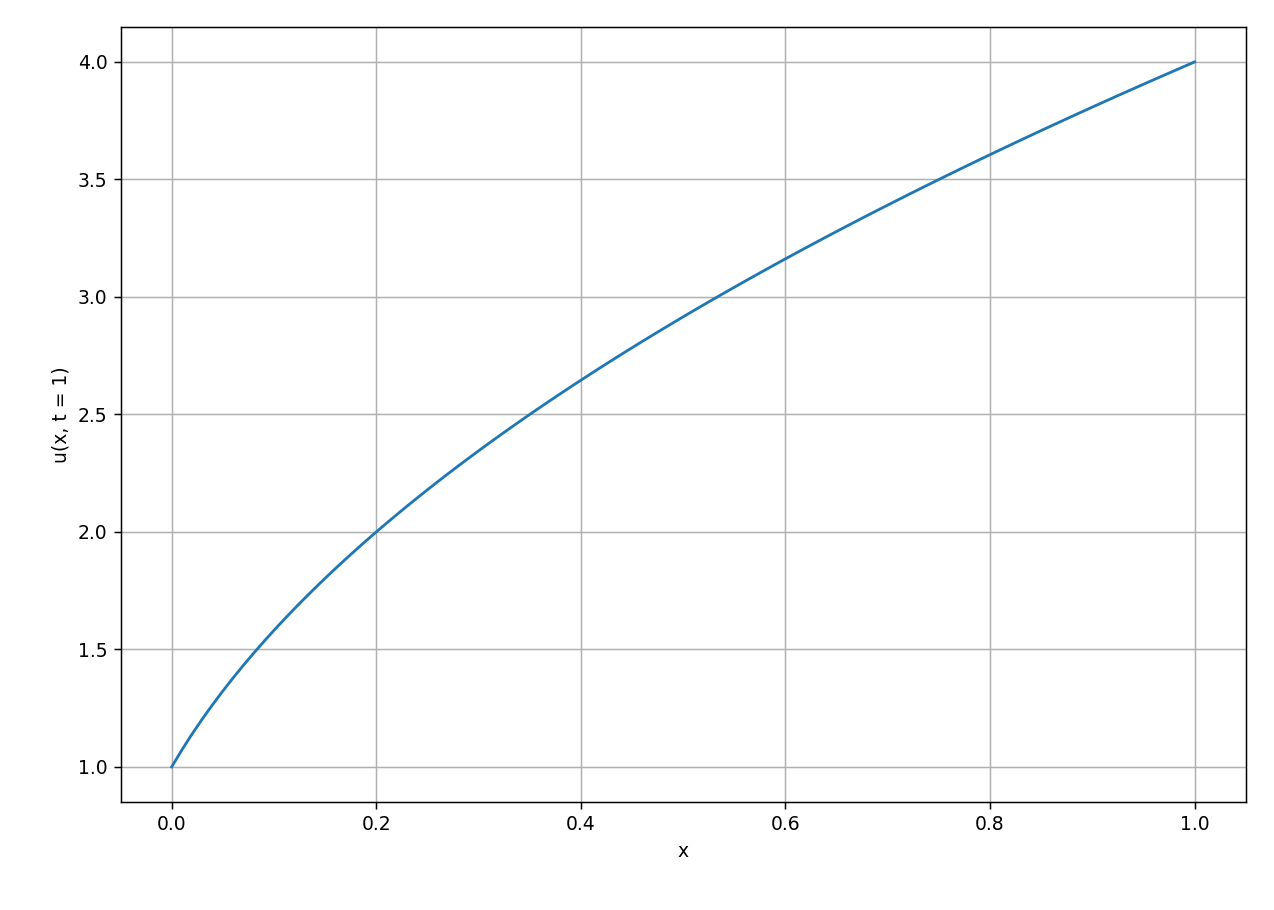

In [15]:
x = np.linspace(0, 1, Nx + 1)

plt.figure(figsize = [7, 5])
plt.plot(x, data[Nt - 1])
plt.xlabel("x")
plt.ylabel("u(x, t = 1)")
plt.tight_layout() 
plt.grid()
plt.show()